In [1]:
%load_ext autoreload
%autoreload 1
%aimport stellar_data
%run stellar_data.py

In [2]:
import pandas as pd

In [20]:
api_token        = '6WxhYzBFea'
tomorrow         = (pd.Timestamp.today() + pd.to_timedelta(1, unit='d')).strftime('%Y-%m-%d')
locale           = 'tz_cooking_pilot' # 'tz_cooking_pilot' #'tz_cooking_pilot' #'tz_cooking_pilot' # 'tz_cooking_pilot'
account_id       = None #'049' #'311' # 513 - atmosfair, 456 - burn, 512 - nepal/peeda
start_time       = '2020-03-01'
end_time         = tomorrow
server_name      = 'prod'
folder           = 'result'

rename_columns   = 'yes'
delete_spikes    = 'yes'
time_resolution  = 5
power_capacity   = 1.0 # kW at maximum power
min_active_load  = 0.15 # 15% load i.e. an average of 150 kW is considered an active meter (this is calculated from the energy count, kWh)

max_cooking_duration = 180 #min
power_mean_min = 0.1 #kW
TZS_per_kWh = 100 

In [17]:
csv_list = stellar_data.fetch_data(api_token, locale, account_id, start_time, end_time, server_name, folder)

Start time: 2020-03-01 00:00:00
End time: 2020-04-15
No. of meters: 100
Start time: 2020-04-15 00:00:00
End time: 2020-05-30
No. of meters: 100
Start time: 2020-05-30 00:00:00
End time: 2020-07-14
No. of meters: 100
Start time: 2020-07-14 00:00:00
End time: 2020-08-28
No. of meters: 100
Start time: 2020-08-28 00:00:00
End time: 2020-10-12
No. of meters: 100
Start time: 2020-10-12 00:00:00
End time: 2020-11-26
No. of meters: 100
Start time: 2020-11-26 00:00:00
End time: 2020-12-24
No. of meters: 100


In [1929]:
server  = 'beta' # beta is the server where we have the 1-minute resolution for now
action  = 'fetch_list' # write fetchList to fetch the meter list from Stellar
changes = {"000":['trash',None,None,None,0,None,None,None,None,None,None,'']}
stellar_list_name = stellar_data.meter_list(api_token,server,action,changes,folder)
master_list = stellar_data.master_list(stellar_list_name, folder)

write region to change region settings
https://beta.stellar.newsunroad.com/api/v0/sites
Server: nginx/1.14.0 (Ubuntu)
X-Powered-By: Sails <sailsjs.org>
Content type: application/json; charset=utf-8
Status code: 200
Categories:
status
meta
data
Pcs. of SM on Stellar: 397
<class 'dict'>
uid
contactName
phoneNumber1
phoneNumber2
meterId
connectionDate
application
latitude
longitude
siteType
regionId
market
address
{'uid': '048', 'contactName': '', 'phoneNumber1': '+2348037044419', 'phoneNumber2': None, 'meterId': 541858, 'connectionDate': '2019-05-03', 'application': 'generator', 'latitude': None, 'longitude': None, 'siteType': 'soft drinks', 'regionId': 'nigeria', 'market': 'wuse', 'address': 'drinks opp papa, block a8 shop 87'}
Rows in list: 397


In [1994]:
master_list.regionId.unique()

array(['nigeria', 'tz_cooking_pilot', 'sosai', 'azuri', 'nxtgrid',
       'tanzania', 'burn', 'tz_cooking_pilot_2', 'berlin', 'nepal',
       'ovoke', 'zittau', 'trash'], dtype=object)

In [21]:
csv_file = stellar_data.format_csv(csv_list, rename_columns, delete_spikes, start_time, end_time,
                 locale, account_id, time_resolution, power_capacity, min_active_load, folder)

number of time gaps: 7792 (7.362473307254758%)
number of energy gaps: 944 (0.8919628852731636%)
number of measurements whilst load on: 32433 (30.64516129032258%)
percentage of energy gaps per load measurement: 2.910615730891376%
energy produced during energy gaps vs. total load on: 792.86 (33.32450687413049%)
number of time gaps during cooking sessions: 5972 (18.413344433139088%)


In [36]:
csv_file.tail(60)

id  meter_number timezone            region  \
timestamp                                                           
2020-11-10 05:40:00  223        546375      UTC  TZ cooking pilot   
2020-11-10 05:45:00  223        546375      UTC  TZ cooking pilot   
2020-11-10 05:50:00  223        546375      UTC  TZ cooking pilot   
2020-11-10 05:55:00  223        546375      UTC  TZ cooking pilot   
2020-11-10 16:15:00  223        546375      UTC  TZ cooking pilot   
2020-11-10 16:20:00  223        546375      UTC  TZ cooking pilot   
2020-11-10 16:25:00  223        546375      UTC  TZ cooking pilot   
2020-11-10 17:20:00  223        546375      UTC  TZ cooking pilot   
2020-11-10 17:25:00  223        546375      UTC  TZ cooking pilot   
2020-11-11 16:55:00  223        546375      UTC  TZ cooking pilot   
2020-11-11 17:00:00  223        546375      UTC  TZ cooking pilot   
2020-11-11 17:05:00  223        546375      UTC  TZ cooking pilot   
2020-11-11 17:25:00  223        546375      UTC  TZ cooking pilot   
2020-11-11 17:30:00  223        546375      UTC  TZ cooking pilot   
2020-11-11 17:35:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 04:30:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 16:00:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 16:05:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 16:10:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 16:15:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 16:20:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 16:25:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 16:30:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 16:35:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 16:40:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 16:45:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 16:50:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 16:55:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 17:00:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 17:05:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 17:10:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 17:15:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 17:20:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 17:25:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 17:30:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 17:35:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 17:40:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 17:45:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 17:50:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 17:55:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 18:00:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 18:05:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 18:10:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 18:15:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 18:20:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 18:25:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 18:45:00  223        546375      UTC  TZ cooking pilot   
2020-11-12 18:50:00  223        546375      UTC  TZ cooking pilot   
2020-11-13 05:50:00  223        546375      UTC  TZ cooking pilot   
2020-11-13 05:55:00  223        546375      UTC  TZ cooking pilot   
2020-11-13 06:00:00  223        546375      UTC  TZ cooking pilot   
2020-11-13 06:05:00  223        546375      UTC  TZ cooking pilot   
2020-11-14 09:35:00  223        546375      UTC  TZ cooking pilot   
2020-11-14 09:40:00  223        546375      UTC  TZ cooking pilot   
2020-11-14 09:45:00  223        546375      UTC  TZ cooking pilot   
2020-12-10 21:10:00  223        546375      UTC  TZ cooking pilot   
2020-12-12 14:35:00 

<AxesSubplot:xlabel='timestamp'>

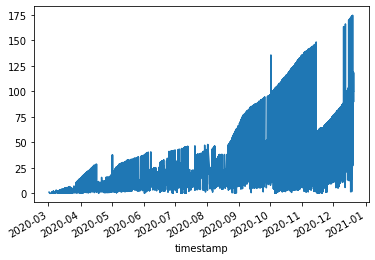

In [7]:
csv_file.energy.plot()

In [26]:
import matplotlib                                      
import datetime as dt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)  ##
import matplotlib.pyplot as plt                         ##
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU ##
import matplotlib.dates as mdates                       ##
import matplotlib.ticker as ticker                      ##
import matplotlib.patches as mpatches                   ##
import pylab                                            ##
from pylab import rcParams                              ##

plt.rcParams['figure.figsize'] = [10, 5]

plt.rc('xtick', labelsize=14.5)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

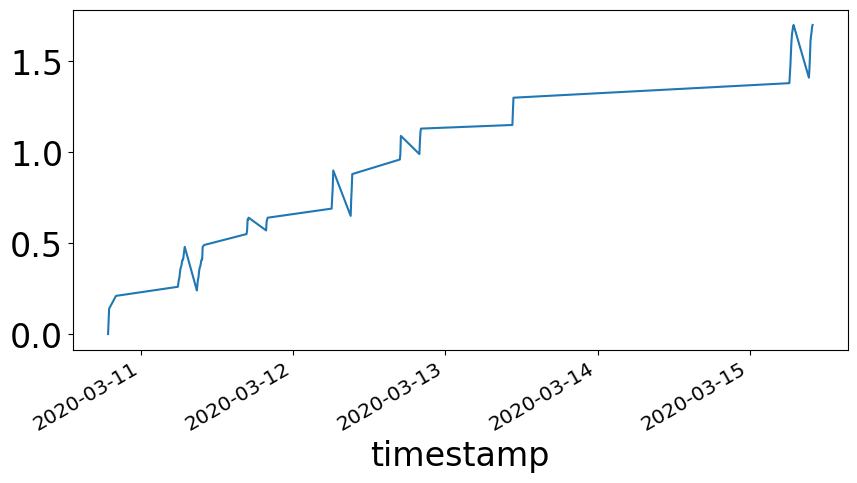

In [27]:
csv_file.drop(csv_file[(((csv_file.index < pd.to_datetime('2020-03-01 00:00:00'))) == True)].index, inplace = True)
csv_file.drop(csv_file[(((csv_file.index >= pd.to_datetime('2020-03-17 00:00:00'))) == True)].index, inplace = True)
csv_file.energy.plot()
plt.savefig('visuals/account_id_311.png', dpi=200)

In [24]:
csv_file.head(2)

id  meter_number timezone            region  \
timestamp                                                           
2020-03-10 18:50:00  311        546281      UTC  TZ cooking pilot   
2020-03-10 18:55:00  311        546281      UTC  TZ cooking pilot   

                     fetch_index  energy  voltage  current     power  \
timestamp                                                              
2020-03-10 18:50:00            0    0.00    229.9    0.000  0.000000   
2020-03-10 18:55:00            0    0.07    228.2    4.301  0.981488   

                     power_factor  frequency time_gap  energy_gap  load_on  \
timestamp                                                                    
2020-03-10 18:50:00         1.000      50.00      NaT         NaN      NaN   
2020-03-10 18:55:00         0.999      50.01      NaT         NaN     0.07   

                        timeload_on time_gap_load_on  
timestamp                                             
2020-03-10 18:50:00             NaT              NaT  
2020-03-10 18:55:00 0 days 00:05:00              NaT

In [ ]:
csv_file.drop(csv_file[(((csv_file.index < pd.to_datetime('2020-03-01 00:00:00'))) == True)].index, inplace = True)
csv_file.drop(csv_file[(((csv_file.index >= pd.to_datetime('2020-03-17 00:00:00'))) == True)].index, inplace = True)
csv_file.loc[csv_file['meter_number']==86000123]

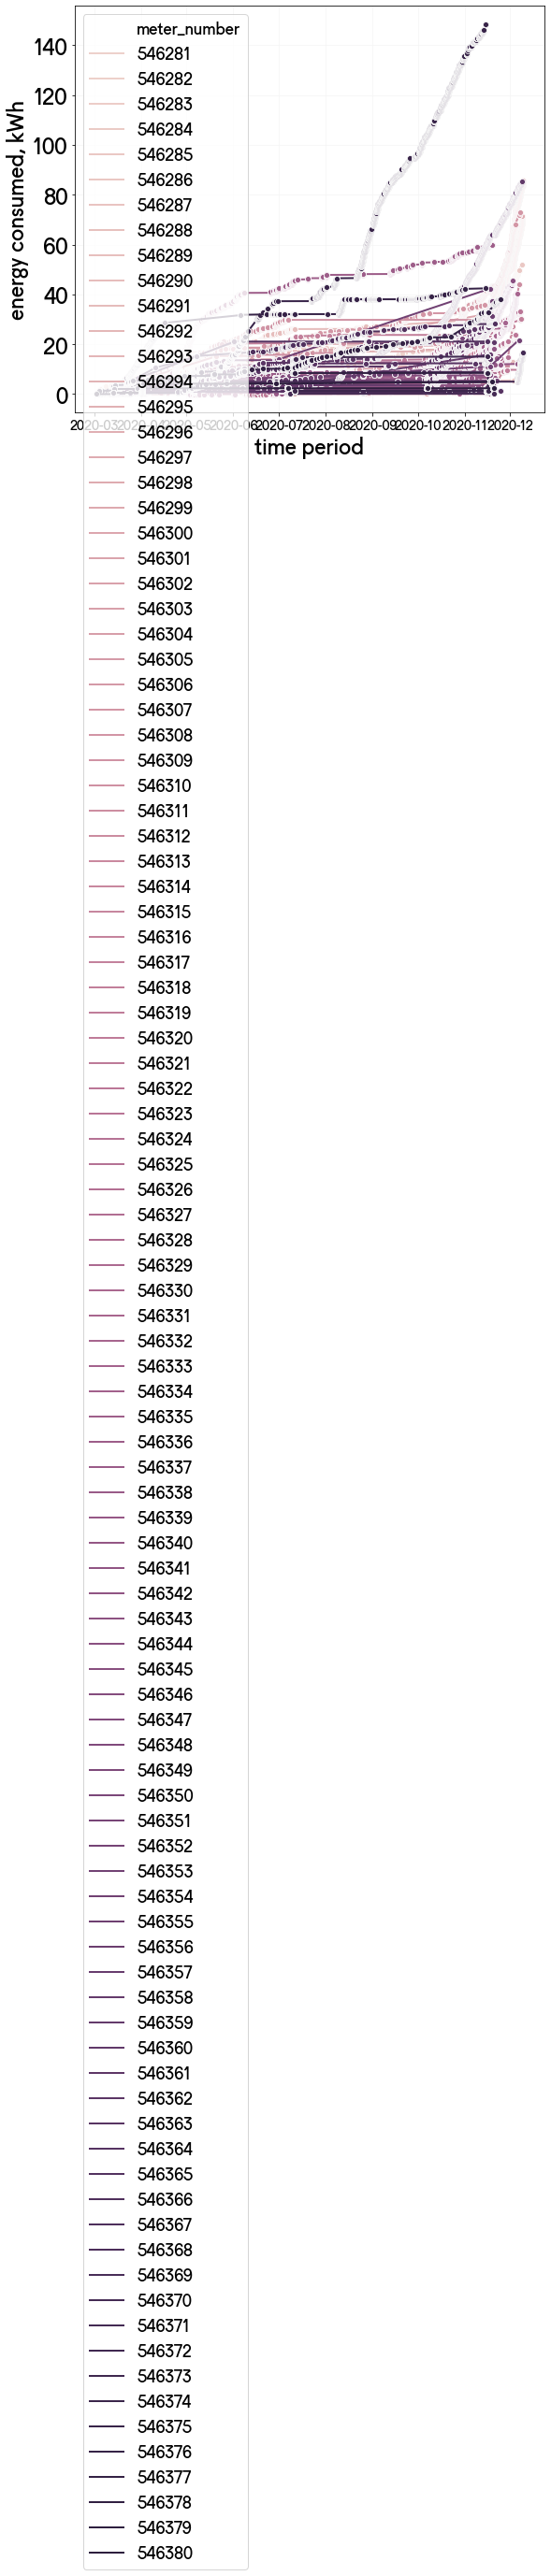

In [1997]:
import seaborn as sns
df_plot = csv_file.copy()
df_plot.reset_index(inplace=True)
g = sns.lineplot(x='timestamp', y='energy', data=df_plot, hue='meter_number', marker="o", legend='full')
plt.ylabel('energy consumed, kWh', fontstyle='normal', fontweight='bold')
plt.xlabel('time period', fontstyle='normal', fontweight='bold')
plt.grid(True, which='both', color='whitesmoke')
plt.savefig('visuals/all_meters.png', dpi=200)

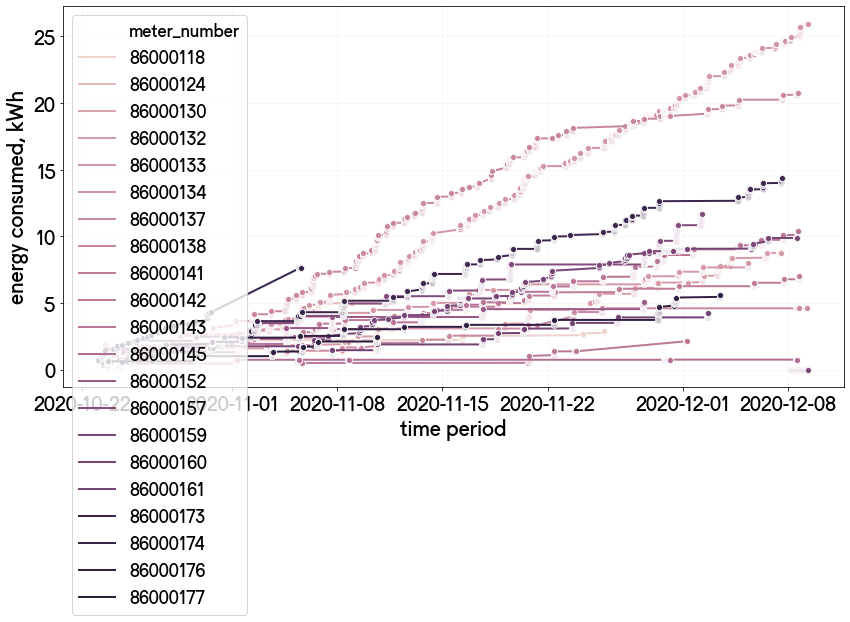

In [1935]:
import seaborn as sns
df_plot = csv_file.copy()
df_plot.reset_index(inplace=True)
g = sns.lineplot(x='timestamp', y='energy', data=df_plot, hue='meter_number', marker="o", legend='full')
plt.ylabel('energy consumed, kWh', fontstyle='normal', fontweight='bold')
plt.xlabel('time period', fontstyle='normal', fontweight='bold')
plt.grid(True, which='both', color='whitesmoke')
plt.savefig('visuals/all_meters_on_grid.png', dpi=200)

In [22]:
import numpy as np
df_gaps = csv_file.copy()
df_gaps.reset_index(inplace=True)
df_gaps['hour_gap'] = df_gaps['time_gap']/np.timedelta64(1, 'h')
df_gaps['count'] = df_gaps['meter_number']
df_gaps['count_active_count'] = df_gaps['load_on']
df_gaps['mean_power_while_on'] = df_gaps['load_on']
df_gaps['count_energy_gap'] = df_gaps['energy_gap']
df_gaps['timestamp'] = df_gaps['timestamp'].astype(str)
print('total time of time gaps: '+str(df_gaps['time_gap'].sum()))
print('total energy of energy gaps: '+str(df_gaps['energy_gap'].sum()))
print('energy of largest energy gap: '+str(df_gaps['energy_gap'].max()))
print('Amount of energy gaps: '+str(df_gaps['energy_gap'].count()))
df_gaps = df_gaps.groupby(pd.cut(df_gaps['hour_gap'], [0,2/60,3/60,4/60,5/60,10/60,20/60,1,5,12,24,168,500,750,1000])).agg({'energy_gap':'sum', 'time_gap':'sum', 'timeload_on' : 'sum', 'mean_power_while_on' : 'mean','count': 'count', 'count_active_count' : 'count', 'load_on' : 'sum', 'count_energy_gap': 'count', 'id' : 'unique', 'energy' : 'unique', 'timestamp' : 'unique', 'meter_number' :'nunique'})
df_gaps

total time of time gaps: 24176 days 15:10:00
total energy of energy gaps: 792.86
energy of largest energy gap: 38.66000000000001
Amount of energy gaps: 944


energy_gap           time_gap        timeload_on  \
hour_gap                                                             
(0.0, 0.0333]           0.00                NaT                NaT   
(0.0333, 0.05]          0.00                NaT                NaT   
(0.05, 0.0667]          0.00                NaT                NaT   
(0.0667, 0.0833]        0.00                NaT                NaT   
(0.0833, 0.167]        13.02    7 days 18:00:00    4 days 16:40:00   
(0.167, 0.333]         47.82    8 days 03:35:00    6 days 07:05:00   
(0.333, 1.0]           16.69   18 days 23:30:00   13 days 18:10:00   
(1.0, 5.0]             56.85  124 days 09:05:00   95 days 09:35:00   
(5.0, 12.0]            41.84  307 days 19:00:00  253 days 00:45:00   
(12.0, 24.0]           47.22  934 days 23:20:00  794 days 07:35:00   
(24.0, 168.0]         256.08 3505 days 04:25:00 2956 days 23:25:00   
(168.0, 500.0]        164.76 4134 days 11:20:00 3270 days 19:00:00   
(500.0, 750.0]         48.30 1996 days 03:20:00 1608 days 19:25:00   
(750.0, 1000.0]         1.70 1446 days 20:55:00  983 days 23:30:00   

                  mean_power_while_on  count  count_active_count  load_on  \
hour_gap                                                                    
(0.0, 0.0333]                     NaN      0                   0     0.00   
(0.0333, 0.05]                    NaN      0                   0     0.00   
(0.05, 0.0667]                    NaN      0                   0     0.00   
(0.0667, 0.0833]                  NaN      0                   0     0.00   
(0.0833, 0.167]              0.045518   1116                 676    30.77   
(0.167, 0.333]               0.117458    695                 535    62.84   
(0.333, 1.0]                 0.049039    749                 541    26.53   
(1.0, 5.0]                   0.021272   1136                 857    18.23   
(5.0, 12.0]                  0.081881    907                 755    61.82   
(12.0, 24.0]                 0.061662   1290                1089    67.15   
(24.0, 168.0]                0.253729   1290                1078   273.52   
(168.0, 500.0]               0.524685    358                 286   150.06   
(500.0, 750.0]               0.787460     78                  63    49.61   
(750.0, 1000.0]              0.091071     41                  28     2.55   

                  count_energy_gap  \
hour_gap                             
(0.0, 0.0333]                    0   
(0.0333, 0.05]                   0   
(0.05, 0.0667]                   0   
(0.0667, 0.0833]                 0   
(0.0833, 0.167]                110   
(0.167, 0.333]                  56   
(0.333, 1.0]                    58   
(1.0, 5.0]                     116   
(5.0, 12.0]                    131   
(12.0, 24.0]                   166   
(24.0, 168.0]                  197   
(168.0, 500.0]                  68   
(500.0, 750.0]                  18   
(750.0, 1000.0]                  3   

                                                                 id  \
hour_gap                                                              
(0.0, 0.0333]                                                    []   
(0.0333, 0.05]                                                   []   
(0.05, 0.0667]                                                   []   
(0.0667, 0.0833]                                                 []   
(0.0833, 0.167]   [311, 299, 296, 303, 305, 308, 310, 298, 297, ...   
(0.167, 0.333]    [311, 299, 296, 303, 305, 308, 297, 313, 301, ...   
(0.333, 1.0]      [311, 299, 296, 303, 305, 308, 310, 297, 313, ...   
(1.0, 5.0]        [311, 299, 296, 303, 305, 308, 310, 297, 313, ...   
(5.0, 12.0]       [311, 299, 305, 310, 297, 313, 301, 302, 300, ...   
(12.0, 24.0]      [311, 299, 296, 303, 305, 308, 310, 298, 313, ...   
(24.0, 168.0]     [311, 299, 296, 303, 305, 308, 310, 298, 297, ...   
(168.0, 500.0]    [311, 299, 296, 303, 305, 308, 310, 297, 301, ...   
(500.0, 750.0]    [311, 299, 296, 305, 301, 309, 302, 300, 23

In [14]:
stellar_data.a2ei_help()



    1. Function name: Fetch Data
    1.1. Syntax: fetch_data(api_token, locale, account_id, start_time, end_time, server_name, folder)
    1.2. Return value: csv_list
    2. Function name: Meter List
    2.1. Syntax: meter_list(api_token,server,action,changes,folder)
    2.2. Return value: stellar_list_name
    3. Function name: Master List
    3.1. Syntax: master_list(stellar_list_name, folder)
    3.2. Return value: master_list
    4. Function name: Format csv file
    4.1. Syntax: format_csv(csv_list, rename_columns, delete_spikes, start_time, end_time,
                 locale, account_id, time_resolution, power_capacity, min_active_load, folder)
    4.2. Return value: csv_file
    


In [30]:
df_epc100 = stellar_data.group_meters_by_use(csv_file, 0.40,0.80,'yes',15.01,min_active_load, power_capacity, time_resolution)

In [24]:
df_epc100.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102071 entries, 2020-03-10 21:50:00 to 2020-11-19 08:50:00
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   id                102071 non-null  int64          
 1   meter_number      102071 non-null  int64          
 2   timezone          102071 non-null  object         
 3   region            102071 non-null  object         
 4   fetch_index       102071 non-null  int64          
 5   energy            102071 non-null  float64        
 6   voltage           102071 non-null  float64        
 7   current           102071 non-null  float64        
 8   power             102071 non-null  float64        
 9   power_factor      102061 non-null  float64        
 10  frequency         102066 non-null  float64        
 11  time_gap          7500 non-null    timedelta64[ns]
 12  energy_gap        925 non-null     float64        
 13  load_on   

In [2228]:
df_ongrid_grouped = stellar_data.df_epc100_grouped(df_epc100, max_cooking_duration, power_mean_min, TZS_per_kWh)

In [25]:
df_epc100_grouped = stellar_data.df_epc100_grouped(df_epc100, max_cooking_duration, power_mean_min, TZS_per_kWh)

In [26]:
df_ongrid_grouped.energy_gen.sum()

NameError: name 'df_ongrid_grouped' is not defined

In [31]:
df_epc100['cooking_event_id'] = df_epc100.cooking_session.map(df_epc100_grouped.set_index('cooking_session')['session_index'].to_dict())

In [32]:
df_epc100_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4704 entries, 0 to 5724
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   meter_number      4704 non-null   int64         
 1   cooking_session   4704 non-null   float64       
 2   location          4704 non-null   object        
 3   energy            4704 non-null   float64       
 4   energy_start      4704 non-null   float64       
 5   energy_gen        4704 non-null   float64       
 6   power             4704 non-null   float64       
 7   cooking_time      4704 non-null   float64       
 8   timestamp         4704 non-null   datetime64[ns]
 9   cooking_time_end  4704 non-null   datetime64[ns]
 10  current           4704 non-null   float64       
 11  group             4704 non-null   float64       
 12  usage_rank        4704 non-null   int64         
 13  latest_energy     4704 non-null   float64       
 14  no_recordings     4704 n

In [29]:
df_epc100_grouped

meter_number  cooking_session location  energy  energy_start  \
0           546281              1.0   [Bezi]    0.14          0.00   
1           546281              3.0   [Bezi]    0.48          0.26   
2           546281              5.0   [Bezi]    0.64          0.55   
3           546281              7.0   [Bezi]    0.90          0.69   
4           546281              9.0   [Bezi]    1.09          0.96   
...            ...              ...      ...     ...           ...   
5718        546379           6602.0  [Nemba]    1.68          1.40   
5719        546379           6603.0  [Nemba]    2.04          1.70   
5722        546380           6606.0   [Bezi]    0.53          0.49   
5723        546380           6607.0   [Bezi]    0.92          0.58   
5724        546380           6608.0   [Bezi]    1.49          0.95   

      energy_gen     power  cooking_time           timestamp  \
0           0.14  0.654359          10.0 2020-03-10 21:50:00   
1           0.22  0.404363          65.0 2020-03-11 08:50:00   
2           0.09  0.388817          20.0 2020-03-11 19:40:00   
3           0.21  0.853257          15.0 2020-03-12 09:05:00   
4           0.13  0.981175          10.0 2020-03-12 19:50:00   
...          ...       ...           ...                 ...   
5718        0.28  0.681277          30.0 2020-03-14 08:40:00   
5719        0.34  0.280446          80.0 2020-03-14 09:40:00   
5722        0.04  0.323970          10.0 2020-03-13 13:55:00   
5723        0.34  0.162565         155.0 2020-04-01 11:45:00   
5724        0.54  0.531858          50.0 2020-04-01 14:25:00   

        cooking_time_end   current  group  usage_rank  latest_energy  \
0    2020-03-10 22:00:00  2.870000    1.0          72          28.40   
1    2020-03-11 09:55:00  1.767778    1.0          72          28.40   
2    2020-03-11 20:00:00  1.710400    1.0          72          28.40   
3    2020-03-12 09:20:00  3.757417    1.0          72          28.40   
4    2020-03-12 20:00:00  4.310333    1.0          72          28.40   
...                  ...       ...    ...         ...            ...   
5718 2020-03-14 09:10:00  3.026286    3.0          18           2.35   
5719 2020-03-14 11:00:00  1.244118    3.0          18           2.35   
5722 2020-03-13 14:05:00  1.430333    2.0          29           5.00   
5723 2020-04-01 14:20:00  0.716400    2.0          29           5.00   
5724 2020-04-01 15:15:00  2.344364    2.0          29           5.00   

      no_recordings   id  power_mean  cooking_cost  session_index  
0                 3  311    0.840000          14.0              1  
1                12  311    0.203077          22.0              2  
2                 5  311    0.270000           9.0              3  
3                 4  311    0.840000          21.0              4  
4                 3  311    0.780000          13.0              5  
...             ...  ...         ...           ...            ...  
5718              7  216    0.560000          28.0           4700  
5719             17  216    0.255000          34.0           4701  
5722              3  219    0.240000           4.0           4702  
5723             30  219    0.131613          34.0           4703  
5724             11  219    0.648000          54.0           4704  

[4704 rows x 19 columns]

In [2210]:
df_epc100.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95215 entries, 2020-03-10 21:50:00 to 2020-11-19 08:50:00
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   id                95215 non-null  int64          
 1   meter_number      95215 non-null  int64          
 2   timezone          95215 non-null  object         
 3   region            95215 non-null  object         
 4   fetch_index       95215 non-null  int64          
 5   energy            95215 non-null  float64        
 6   voltage           95215 non-null  float64        
 7   current           95215 non-null  float64        
 8   power             95215 non-null  float64        
 9   power_factor      95205 non-null  float64        
 10  frequency         95210 non-null  float64        
 11  time_gap          6515 non-null   timedelta64[ns]
 12  energy_gap        800 non-null    float64        
 13  load_on           26827 no

In [2221]:
all_meter_bar_chart('whole','time',0,0)

timestamp  energy_gen  cooking_session  cooking_cost  cooking_time  \
0    2020-03-09        2.27                7        4540.0         515.0   
1    2020-03-10        2.28               11        4560.0         435.0   
2    2020-03-11        3.39               20        6780.0         745.0   
3    2020-03-12        5.37               31       10740.0         950.0   
4    2020-03-13        4.58               24        9160.0         730.0   
..          ...         ...              ...           ...           ...   
245  2020-11-10       14.75               40       29500.0        1826.0   
246  2020-11-11       14.65               49       29300.0        2022.0   
247  2020-11-12       12.60               38       25200.0        1890.0   
248  2020-11-13       14.42               41       28840.0        1892.0   
249  2020-11-14       17.11               46       34220.0        2823.0   

     meter_number  
0               5  
1              10  
2              13  
3              16  
4              15  
..            ...  
245            19  
246            23  
247            20  
248            16  
249            24  

[250 rows x 6 columns]

In [ ]:
df_epc100_grouped

In [2763]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
#rebel
meter_check = df_whole_grouped.loc[df_whole_grouped['meter_number']==546341]

In [2764]:
meter_check.energy.max() - meter_check.energy.min()

14.429999999999998

In [2765]:
meter_check.energy_gen.sum()

10.009999999999987

In [2766]:
meter_check.session_index.nunique()

57

In [2732]:
meter_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1516 to 1552
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   meter_number      35 non-null     int64         
 1   cooking_session   35 non-null     float64       
 2   location          35 non-null     object        
 3   energy            35 non-null     float64       
 4   energy_start      35 non-null     float64       
 5   energy_gen        35 non-null     float64       
 6   power             35 non-null     float64       
 7   cooking_time      35 non-null     float64       
 8   timestamp         35 non-null     datetime64[ns]
 9   cooking_time_end  35 non-null     datetime64[ns]
 10  current           35 non-null     float64       
 11  group             35 non-null     float64       
 12  usage_rank        35 non-null     int64         
 13  latest_energy     35 non-null     float64       
 14  no_recordings     35 no

In [2572]:
def all_meter_bar_chart(dataframe, choice, meter_number, site):
    
    if choice == 'time':
        if dataframe == 'honeymoon':
            df_honeymoon_test = df_epc100.copy()
            df_honeymoon_test.drop(df_honeymoon_test[(((df_honeymoon_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
            df_honeymoon_test.drop(df_honeymoon_test[(((df_honeymoon_test.index >= pd.to_datetime('2020-06-01 00:00:00'))) == True)].index, inplace = True)
            df_honeymoon_grouped = stellar_data.df_epc100_grouped(df_honeymoon_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
            df_epc100_grouped_statistics = df_honeymoon_grouped.copy()
        if dataframe == 'steady':
            df_steady_test = df_epc100.copy()
            df_steady_test.drop(df_steady_test[(((df_steady_test.index < pd.to_datetime('2020-06-01 00:00:00'))) == True)].index, inplace = True)
            df_steady_test.drop(df_steady_test[(((df_steady_test.index >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
            df_steady_grouped = stellar_data.df_epc100_grouped(df_steady_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
            df_epc100_grouped_statistics = df_steady_grouped.copy()
        if dataframe == 'tariff':
            df_tariff_test = df_epc100.copy()
            df_tariff_test.drop(df_tariff_test[(((df_tariff_test.index < pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
            df_tariff_test.drop(df_tariff_test[(((df_tariff_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
            df_tariff_grouped = stellar_data.df_epc100_grouped(df_tariff_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
            df_epc100_grouped_statistics = df_tariff_grouped.copy()
        if dataframe == 'whole':
            df_whole_test = df_epc100.copy()
            df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
            df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
            df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
            df_epc100_grouped_statistics = df_whole_grouped.copy()
        if dataframe == 'all':
            df_all = df_epc100.copy()
            df_all = stellar_data.df_epc100_grouped(df_all, max_cooking_duration, power_mean_min, TZS_per_kWh)
            df_epc100_grouped_statistics = df_all.copy()
        df_epc100_grouped_statistics['site'] = df_epc100_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
        if site != 0:
            df_epc100_grouped_statistics = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['site']==site]
        df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby([df_epc100_grouped_statistics['timestamp'].dt.date]).\
        agg({'energy_gen':'sum','cooking_session' : 'nunique', 'cooking_cost' : 'sum', 'cooking_time' : 'sum', 'meter_number':'nunique'})
        df_epc100_grouped_statistics.sort_values(['timestamp'], ascending=[True], inplace=True)
    
    if choice == 'month':
        df_whole_test = df_epc100.copy()
        df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
        df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
        df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
        df_epc100_grouped_statistics = df_whole_grouped.copy()
        df_epc100_grouped_statistics['site'] = df_epc100_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
        if site != 0:
            df_epc100_grouped_statistics = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['site']==site]
        df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby([df_epc100_grouped_statistics['timestamp'].dt.month, 'site']).\
        agg({'energy':'max','energy_gen':'sum','cooking_session' : 'nunique', 'cooking_cost' : 'sum', 'cooking_time' : 'sum', 'meter_number':'nunique'})
        df_epc100_grouped_statistics.sort_values(['timestamp'], ascending=[True], inplace=True)
        
    if choice == 'user':
        df_epc100_grouped_statistics = df_epc100_grouped.copy()
        df_epc100_grouped_statistics = df_epc100_grouped_statistics.loc [ df_epc100_grouped_statistics [ 'meter_number' ] == meter_number ]
        df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby([df_epc100_grouped_statistics['timestamp'].dt.date]).\
        agg({'energy_gen':'sum','cooking_session' : 'nunique', 'cooking_cost' : 'sum', 'cooking_time' : 'sum', 'meter_number':'nunique'})
        df_epc100_grouped_statistics.sort_values(['timestamp'], ascending=[True], inplace=True)
    
    if choice == 'hour':
        df_epc100_grouped_statistics = df_epc100_grouped.groupby([df_epc100_grouped['timestamp'].dt.hour, df_epc100_grouped.group]).\
        agg({'energy_gen':'sum','cooking_session' : 'nunique', 'cooking_cost' : 'sum', 'cooking_time' : 'sum', 'power_mean' : 'sum'})
        df_epc100_grouped_statistics.sort_values(['timestamp'], ascending=[True], inplace=True)
    
    if choice == 'hour_hh':
        df_epc100_grouped['energy_gen_std'] = df_epc100_grouped['energy_gen']
        df_epc100_grouped_statistics = df_epc100_grouped.groupby([df_epc100_grouped['timestamp'].dt.hour, df_epc100_grouped.group, df_epc100_grouped.usage_rank]).\
        agg({'energy_gen':'mean','cooking_session' : 'nunique', 'cooking_cost' : 'sum', 'cooking_time' : 'sum', 'energy_gen' : 'std', 'power_mean' : 'sum'})
        df_epc100_grouped_statistics.sort_values(['timestamp'], ascending=[True], inplace=True)

    if choice == 'hour_hh_all':
        df_epc100_grouped['energy_gen_std'] = df_epc100_grouped['energy_gen']
        df_epc100_grouped_statistics = df_epc100_grouped.groupby([df_epc100_grouped['timestamp'].dt.hour, df_epc100_grouped.usage_rank]).\
        agg({'energy_gen':'mean','cooking_session' : 'nunique', 'cooking_cost' : 'sum', 'cooking_time' : 'sum', 'energy_gen_std' : 'std', 'power_mean' : 'sum'})
        df_epc100_grouped_statistics.sort_values(['timestamp'], ascending=[True], inplace=True)

    if choice == 'datehour':
        df_epc100_grouped_statistics = df_epc100_grouped.copy()
        if meter_number != 0:
            df_epc100_grouped_statistics = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['meter_number']==meter_number]
        #df_epc100_grouped_statistics['timestamp_exact'] = df_epc100_grouped_statistics['timestamp']
        df_epc100_grouped_statistics['timestamp_day'] = df_epc100_grouped_statistics['timestamp']
        df_epc100_grouped_statistics['am_pm'] = df_epc100_grouped_statistics['timestamp']
        df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby([df_epc100_grouped_statistics['timestamp_day'].dt.date,\
                                                                             df_epc100_grouped_statistics['timestamp'].dt.hour,\
                                                                            df_epc100_grouped_statistics['meter_number']] ).\
        agg({'energy_gen':'sum','cooking_session' : 'nunique', 'cooking_cost' : 'sum', 'cooking_time' : 'sum', 'power_mean' : 'sum', 'am_pm':'min'})
        df_epc100_grouped_statistics['am_pm'] = df_epc100_grouped_statistics['am_pm'].dt.strftime("%I:00 %p")

    
    if choice == 'meters':
        df_epc100_grouped_statistics = df_epc100_grouped.groupby([df_epc100_grouped['usage_rank']]).\
        agg({'energy_gen':'sum','session_index' : 'nunique', 'cooking_cost' : 'sum', 'cooking_time' : 'sum', 'group' : 'mean'})
    df_epc100_grouped_statistics.reset_index(inplace=True)
    return df_epc100_grouped_statistics

In [2222]:

df_epc100.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95215 entries, 2020-03-10 21:50:00 to 2020-11-19 08:50:00
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   id                95215 non-null  int64          
 1   meter_number      95215 non-null  int64          
 2   timezone          95215 non-null  object         
 3   region            95215 non-null  object         
 4   fetch_index       95215 non-null  int64          
 5   energy            95215 non-null  float64        
 6   voltage           95215 non-null  float64        
 7   current           95215 non-null  float64        
 8   power             95215 non-null  float64        
 9   power_factor      95205 non-null  float64        
 10  frequency         95210 non-null  float64        
 11  time_gap          6515 non-null   timedelta64[ns]
 12  energy_gap        800 non-null    float64        
 13  load_on           26827 no

In [2223]:
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98907 entries, 2020-03-10 18:50:00 to 2020-11-19 05:50:00
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   id                98907 non-null  int64          
 1   meter_number      98907 non-null  int64          
 2   timezone          98907 non-null  object         
 3   region            98907 non-null  object         
 4   fetch_index       98907 non-null  int64          
 5   energy            98907 non-null  float64        
 6   voltage           98907 non-null  float64        
 7   current           98907 non-null  float64        
 8   power             98907 non-null  float64        
 9   power_factor      98897 non-null  float64        
 10  frequency         98902 non-null  float64        
 11  time_gap          6795 non-null   timedelta64[ns]
 12  energy_gap        821 non-null    float64        
 13  load_on           27805 no

In [ ]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-20 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['month'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_month_statistics = df_whole_test.groupby(['meter_number',df_whole_test['month'].dt.month]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['month'] = df_whole_grouped.timestamp
df_month_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['month'].dt.month]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_month_statistics_full_backup = pd.concat([df_month_statistics, df_month_statistics_2], axis=1)

df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['month'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_month_statistics = df_whole_test.groupby(['meter_number',df_whole_test['month'].dt.month]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['month'] = df_whole_grouped.timestamp
df_month_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['month'].dt.month]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_month_statistics_full = pd.concat([df_month_statistics, df_month_statistics_2], axis=1)

df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.cooking_session.isna() == True)))].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['month'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_month_statistics = df_whole_test.groupby(['meter_number',df_whole_test['month'].dt.month]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['month'] = df_whole_grouped.timestamp
df_month_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['month'].dt.month]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_month_statistics_full_only_cooking_sessions = pd.concat([df_month_statistics, df_month_statistics_2], axis=1)

df_month_statistics_full.reset_index(inplace=True)
df_month_statistics_full.loc[((df_month_statistics_full.meter_number.shift() == df_month_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_month_statistics_full.energy - df_month_statistics_full.energy.shift()
df_month_statistics_full['lost'] = df_month_statistics_full.change_meter_count - df_month_statistics_full.energy_gen
df_month_statistics_full.loc[((df_month_statistics_full.month == 3)\
                             ), 'change_meter_count'] = df_month_statistics_full.energy
df_month_statistics_full.to_csv('result/month_compensation.csv', index=False)

df_month_statistics_full_backup.reset_index(inplace=True)
df_month_statistics_full_backup.loc[((df_month_statistics_full_backup.meter_number.shift() == df_month_statistics_full_backup.meter_number)\
                             ), 'change_meter_count'] = df_month_statistics_full_backup.energy - df_month_statistics_full_backup.energy.shift()
df_month_statistics_full_backup['lost'] = df_month_statistics_full_backup.change_meter_count - df_month_statistics_full_backup.energy_gen
df_month_statistics_full_backup.loc[((df_month_statistics_full_backup.month == 3)\
                             ), 'change_meter_count'] = df_month_statistics_full_backup.energy

df_month_statistics_full_backup.to_csv('result/month_compensation_backup.csv', index=False)

df_month_statistics_full_only_cooking_sessions.reset_index(inplace=True)
df_month_statistics_full_only_cooking_sessions.loc[((df_month_statistics_full_only_cooking_sessions.meter_number.shift() == df_month_statistics_full_only_cooking_sessions.meter_number)\
                             ), 'change_meter_count'] = df_month_statistics_full_only_cooking_sessions.energy - df_month_statistics_full_only_cooking_sessions.energy.shift()
df_month_statistics_full_only_cooking_sessions['lost'] = df_month_statistics_full_only_cooking_sessions.change_meter_count - df_month_statistics_full_only_cooking_sessions.energy_gen
df_month_statistics_full_only_cooking_sessions.loc[((df_month_statistics_full_only_cooking_sessions.month == 3)\
                             ), 'change_meter_count'] = df_month_statistics_full_only_cooking_sessions.energy
df_month_statistics_full_only_cooking_sessions.to_csv('result/month_compensation_only_cooking_sessions.csv', index=False)




In [2439]:
df_day_statistics_plot

energy_gen  cooking_session  change_meter_count  meter_number  \
day                                                                         
2020-03-09        2.25             10.0                0.00             8   
2020-03-10        3.74             19.0                0.73            20   
2020-03-11        5.89             30.0                5.46            25   
2020-03-12        9.79             53.0                7.18            29   
2020-03-13        8.73             48.0                9.38            26   
...                ...              ...                 ...           ...   
2020-11-10       14.75             40.0               17.75            22   
2020-11-11       14.62             49.0               18.08            23   
2020-11-12       12.60             38.0               15.96            21   
2020-11-13       14.35             41.0               17.62            20   
2020-11-14       17.08             46.0               22.71            26   

            lost_session  total_session  
day                                      
2020-03-09        -10.00           0.00  
2020-03-10        -17.54           1.46  
2020-03-11        -19.08          10.92  
2020-03-12        -38.64          14.36  
2020-03-13        -29.24          18.76  
...                  ...            ...  
2020-11-10         -4.50          35.50  
2020-11-11        -12.84          36.16  
2020-11-12         -6.08          31.92  
2020-11-13         -5.76          35.24  
2020-11-14         -0.58          45.42  

[250 rows x 6 columns]

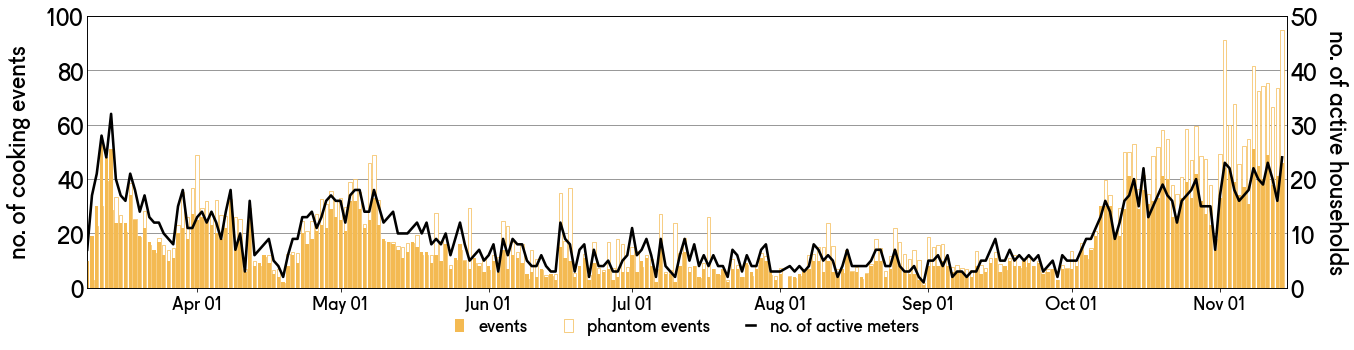

In [2569]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [21.5, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,100)
ax2.set_ylim(-0.0,50)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 11, 15)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='center',width=0.7)
ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='white', label='phantom events', zorder=2.51, linewidth=0.7, edgecolor='#F4BA52', align='center',width=0.7,alpha=1)

#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='#DE1995', alpha = 0.7, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.4)
#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.4)


df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)
ax2.plot(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['meter_number'], color='black', linewidth=2.58, label='no. of active meters', zorder=2.53)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('no. of active households', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(20))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)

plt.savefig('visuals/TZcooking_with_tariff_days.png', dpi=200)
plt.show()

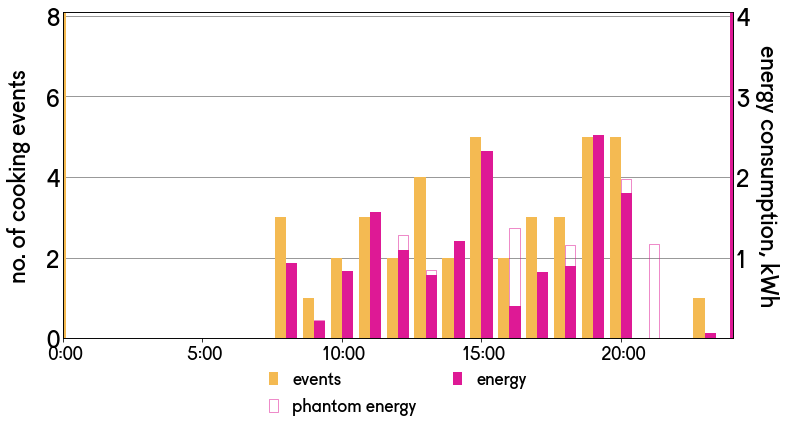

In [2815]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-11-10 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-11 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['hour'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_hour_statistics = df_whole_test.groupby(['meter_number',df_whole_test['hour'].dt.hour]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['hour'] = df_whole_grouped.timestamp
df_hour_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['hour'].dt.hour]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_hour_statistics_full = pd.concat([df_hour_statistics, df_hour_statistics_2], axis=1)

df_hour_statistics_full.reset_index(inplace=True)
df_hour_statistics_full.loc[((df_hour_statistics_full.meter_number.shift() == df_hour_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_hour_statistics_full.energy - df_hour_statistics_full.energy.shift()
df_hour_statistics_full['lost'] = df_hour_statistics_full.change_meter_count - df_hour_statistics_full.energy_gen
#df_hour_statistics_full.loc[((df_hour_statistics_full.hour == 3)\
#                             ), 'change_meter_count'] = df_hour_statistics_full.energy
df_hour_statistics_full.to_csv('result/hour_compensation.csv', index=False)

df_lost_overview = df_hour_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_hour_statistics_plot = df_hour_statistics_full.groupby('hour').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_hour_statistics_plot['lost_session']=df_hour_statistics_plot['change_meter_count']/\
(df_hour_statistics_plot.energy_gen.sum()/df_hour_statistics_plot.cooking_session.sum()) - df_hour_statistics_plot.cooking_session
df_hour_statistics_plot['total_session'] = df_hour_statistics_plot['lost_session'] + df_hour_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [12, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_hour_statistics_plot.drop(7, axis=0,inplace=True)
#df_hour_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_ylim(-0.0001,8.1)
ax2.set_ylim(0.0001,4.05)
ax1.set_xlim([0, 24])
#ax1.set_xlim([dt.date(1970, 1, 1), dt.date(1970, 2, 2)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(0, 8.1, color='#F4BA52', alpha = 1.0, label=None, width = 0.23)
ax1.bar(24, 8.1, color='#DF1995', alpha = 1.0, label=None, width = 0.15, zorder=8)


#RRR

ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.4)
#ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['change_meter_count'], color='none', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.5, edgecolor='#DE1995',width=0.365)
ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.4)

#ax2.plot(df_hour_statistics_plot.index, df_hour_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

#formatter = mdates.DateFormatter("%f:2 %p") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/highday_tariff_24h.png', dpi=200)
plt.show()

In [2816]:
print(df_hour_statistics_plot.cooking_session.sum())
print(df_hour_statistics_plot.total_session.sum())
print(df_hour_statistics_plot.change_meter_count.sum())
print(df_hour_statistics_plot.energy_gen.sum())
df_hour_statistics_plot.info()

41.0
29.634715025906658
11.159999999999988
15.440000000000023
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 8 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_gen          16 non-null     float64
 1   cooking_session     16 non-null     float64
 2   change_meter_count  16 non-null     float64
 3   meter_number        16 non-null     int64  
 4   lost_session        16 non-null     float64
 5   total_session       16 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 896.0 bytes


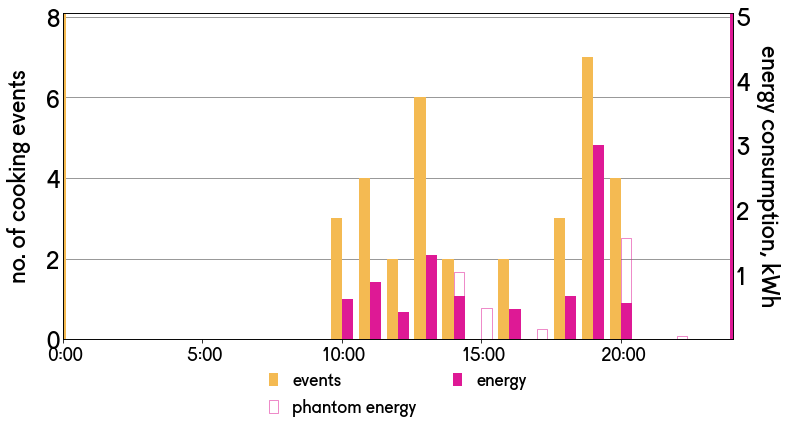

In [2813]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-10-26 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-10-27 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['hour'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_hour_statistics = df_whole_test.groupby(['meter_number',df_whole_test['hour'].dt.hour]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['hour'] = df_whole_grouped.timestamp
df_hour_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['hour'].dt.hour]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_hour_statistics_full = pd.concat([df_hour_statistics, df_hour_statistics_2], axis=1)

df_hour_statistics_full.reset_index(inplace=True)
df_hour_statistics_full.loc[((df_hour_statistics_full.meter_number.shift() == df_hour_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_hour_statistics_full.energy - df_hour_statistics_full.energy.shift()
df_hour_statistics_full['lost'] = df_hour_statistics_full.change_meter_count - df_hour_statistics_full.energy_gen
#df_hour_statistics_full.loc[((df_hour_statistics_full.hour == 3)\
#                             ), 'change_meter_count'] = df_hour_statistics_full.energy
df_hour_statistics_full.to_csv('result/hour_compensation.csv', index=False)

df_lost_overview = df_hour_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_hour_statistics_plot = df_hour_statistics_full.groupby('hour').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_hour_statistics_plot['lost_session']=df_hour_statistics_plot['change_meter_count']/\
(df_hour_statistics_plot.energy_gen.sum()/df_hour_statistics_plot.cooking_session.sum()) - df_hour_statistics_plot.cooking_session
df_hour_statistics_plot['total_session'] = df_hour_statistics_plot['lost_session'] + df_hour_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [12, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_hour_statistics_plot.drop(7, axis=0,inplace=True)
#df_hour_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0001,8.1)
ax2.set_ylim(0.0001,5.05)
ax1.set_xlim([0, 24])
#ax1.set_xlim([dt.date(1970, 1, 1), dt.date(1970, 2, 2)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(0, 8.1, color='#F4BA52', alpha = 1.0, label=None, width = 0.23)
ax1.bar(24, 8.1, color='#DF1995', alpha = 1.0, label=None, width = 0.15, zorder=8)

#RRR

ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.4)
#ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['change_meter_count'], color='none', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.5, edgecolor='#DE1995',width=0.365)
ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.4)

#ax2.plot(df_hour_statistics_plot.index, df_hour_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

#formatter = mdates.DateFormatter("%f:2 %p") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/mediumday_tariff_24h.png', dpi=200)
plt.show()

In [2814]:
print(df_hour_statistics_plot.cooking_session.sum())
print(df_hour_statistics_plot.total_session.sum())
print(df_hour_statistics_plot.change_meter_count.sum())
print(df_hour_statistics_plot.energy_gen.sum())
df_hour_statistics_plot.info()

33.0
27.807692307692367
7.230000000000021
8.580000000000005
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 10 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_gen          14 non-null     float64
 1   cooking_session     14 non-null     float64
 2   change_meter_count  14 non-null     float64
 3   meter_number        14 non-null     int64  
 4   lost_session        14 non-null     float64
 5   total_session       14 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 784.0 bytes


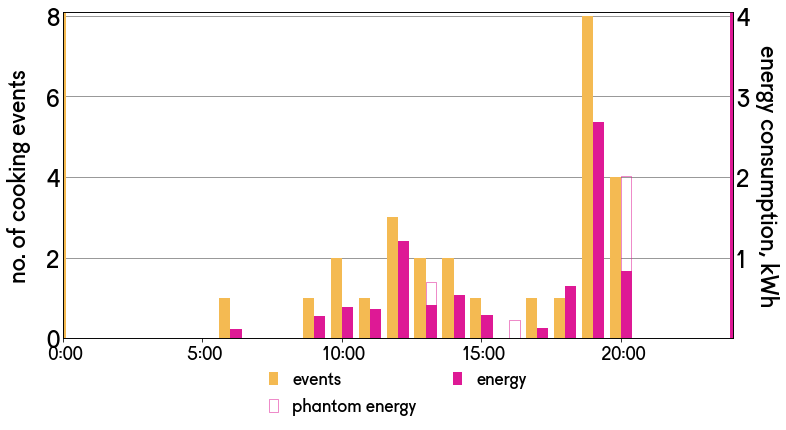

In [2808]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-10-22 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-10-23 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['hour'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_hour_statistics = df_whole_test.groupby(['meter_number',df_whole_test['hour'].dt.hour]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['hour'] = df_whole_grouped.timestamp
df_hour_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['hour'].dt.hour]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_hour_statistics_full = pd.concat([df_hour_statistics, df_hour_statistics_2], axis=1)

df_hour_statistics_full.reset_index(inplace=True)
df_hour_statistics_full.loc[((df_hour_statistics_full.meter_number.shift() == df_hour_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_hour_statistics_full.energy - df_hour_statistics_full.energy.shift()
df_hour_statistics_full['lost'] = df_hour_statistics_full.change_meter_count - df_hour_statistics_full.energy_gen
#df_hour_statistics_full.loc[((df_hour_statistics_full.hour == 3)\
#                             ), 'change_meter_count'] = df_hour_statistics_full.energy
df_hour_statistics_full.to_csv('result/hour_compensation.csv', index=False)

df_lost_overview = df_hour_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_hour_statistics_plot = df_hour_statistics_full.groupby('hour').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_hour_statistics_plot['lost_session']=df_hour_statistics_plot['change_meter_count']/\
(df_hour_statistics_plot.energy_gen.sum()/df_hour_statistics_plot.cooking_session.sum()) - df_hour_statistics_plot.cooking_session
df_hour_statistics_plot['total_session'] = df_hour_statistics_plot['lost_session'] + df_hour_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [12, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_hour_statistics_plot.drop(7, axis=0,inplace=True)
#df_hour_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0001,8.1)
ax2.set_ylim(0.0001,4.05)
ax1.set_xlim([0, 24])
#ax1.set_xlim([dt.date(1970, 1, 1), dt.date(1970, 2, 2)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(0, 8.1, color='#F4BA52', alpha = 1.0, label=None, width = 0.23)
ax1.bar(24, 8.1, color='#DF1995', alpha = 1.0, label=None, width = 0.15, zorder=8)

#RRR

ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.4)
#ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['change_meter_count'], color='none', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.5, edgecolor='#DE1995',width=0.365)
ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.4)

#ax2.plot(df_hour_statistics_plot.index, df_hour_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

#formatter = mdates.DateFormatter("%f:2 %p") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/lowday_tariff_24h.png', dpi=200)
plt.show()

In [2812]:
print(df_hour_statistics_plot.cooking_session.sum())
print(df_hour_statistics_plot.total_session.sum())
print(df_hour_statistics_plot.change_meter_count.sum())
print(df_hour_statistics_plot.energy_gen.sum())
df_hour_statistics_plot.info()

27.0
18.08005082592126
5.270000000000012
7.870000000000003
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 6 to 21
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_gen          14 non-null     float64
 1   cooking_session     14 non-null     float64
 2   change_meter_count  14 non-null     float64
 3   meter_number        14 non-null     int64  
 4   lost_session        14 non-null     float64
 5   total_session       14 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 784.0 bytes


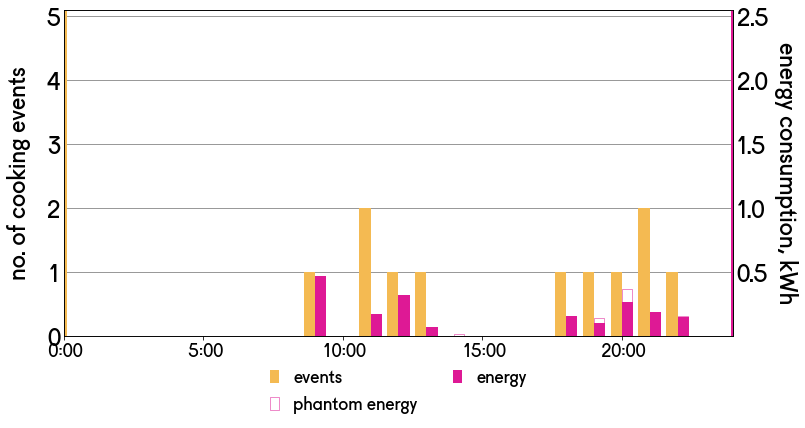

In [2817]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-06-23 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-06-24 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['hour'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_hour_statistics = df_whole_test.groupby(['meter_number',df_whole_test['hour'].dt.hour]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['hour'] = df_whole_grouped.timestamp
df_hour_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['hour'].dt.hour]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_hour_statistics_full = pd.concat([df_hour_statistics, df_hour_statistics_2], axis=1)

df_hour_statistics_full.reset_index(inplace=True)
df_hour_statistics_full.loc[((df_hour_statistics_full.meter_number.shift() == df_hour_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_hour_statistics_full.energy - df_hour_statistics_full.energy.shift()
df_hour_statistics_full['lost'] = df_hour_statistics_full.change_meter_count - df_hour_statistics_full.energy_gen
#df_hour_statistics_full.loc[((df_hour_statistics_full.hour == 3)\
#                             ), 'change_meter_count'] = df_hour_statistics_full.energy
df_hour_statistics_full.to_csv('result/hour_compensation.csv', index=False)

df_lost_overview = df_hour_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_hour_statistics_plot = df_hour_statistics_full.groupby('hour').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_hour_statistics_plot['lost_session']=df_hour_statistics_plot['change_meter_count']/\
(df_hour_statistics_plot.energy_gen.sum()/df_hour_statistics_plot.cooking_session.sum()) - df_hour_statistics_plot.cooking_session
df_hour_statistics_plot['total_session'] = df_hour_statistics_plot['lost_session'] + df_hour_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [12, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_hour_statistics_plot.drop(7, axis=0,inplace=True)
#df_hour_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0001,5.1)
ax2.set_ylim(0.0001,2.55)
ax1.set_xlim([0, 24])
#ax1.set_xlim([dt.date(1970, 1, 1), dt.date(1970, 2, 2)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(0, 5.1, color='#F4BA52', alpha = 1.0, label=None, width = 0.23)
ax1.bar(24, 5.1, color='#DF1995', alpha = 1.0, label=None, width = 0.15, zorder=8)


#RRR

ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.4)
#ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['change_meter_count'], color='none', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.5, edgecolor='#DE1995',width=0.365)
ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.4)

#ax2.plot(df_hour_statistics_plot.index, df_hour_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

#formatter = mdates.DateFormatter("%f:2 %p") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax1.grid(b=True, which='minor', color='gray', linestyle='-')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/highday_steady_24h_rescaled.png', dpi=200)
plt.show()

In [2818]:
print(df_hour_statistics_plot.cooking_session.sum())
print(df_hour_statistics_plot.total_session.sum())
print(df_hour_statistics_plot.change_meter_count.sum())
print(df_hour_statistics_plot.energy_gen.sum())
df_hour_statistics_plot.info()

11.0
4.400000000000023
0.7600000000000016
1.8999999999999941
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 22
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_gen          15 non-null     float64
 1   cooking_session     15 non-null     float64
 2   change_meter_count  15 non-null     float64
 3   meter_number        15 non-null     int64  
 4   lost_session        15 non-null     float64
 5   total_session       15 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 840.0 bytes


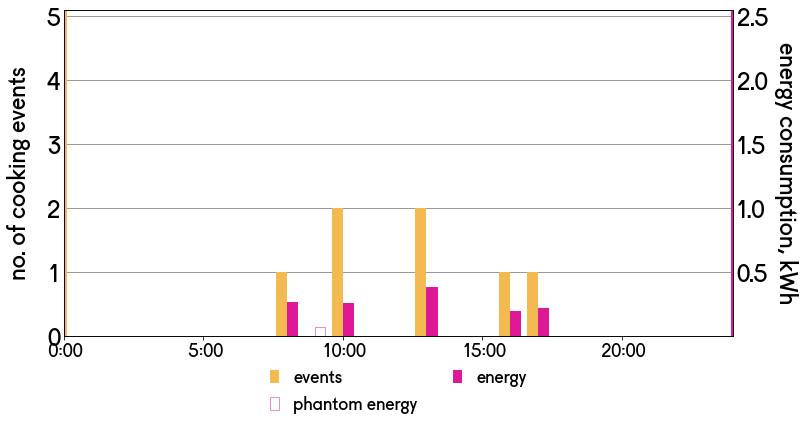

In [2819]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-06-12 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-06-13 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['hour'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_hour_statistics = df_whole_test.groupby(['meter_number',df_whole_test['hour'].dt.hour]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['hour'] = df_whole_grouped.timestamp
df_hour_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['hour'].dt.hour]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_hour_statistics_full = pd.concat([df_hour_statistics, df_hour_statistics_2], axis=1)

df_hour_statistics_full.reset_index(inplace=True)
df_hour_statistics_full.loc[((df_hour_statistics_full.meter_number.shift() == df_hour_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_hour_statistics_full.energy - df_hour_statistics_full.energy.shift()
df_hour_statistics_full['lost'] = df_hour_statistics_full.change_meter_count - df_hour_statistics_full.energy_gen
#df_hour_statistics_full.loc[((df_hour_statistics_full.hour == 3)\
#                             ), 'change_meter_count'] = df_hour_statistics_full.energy
df_hour_statistics_full.to_csv('result/hour_compensation.csv', index=False)

df_lost_overview = df_hour_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_hour_statistics_plot = df_hour_statistics_full.groupby('hour').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_hour_statistics_plot['lost_session']=df_hour_statistics_plot['change_meter_count']/\
(df_hour_statistics_plot.energy_gen.sum()/df_hour_statistics_plot.cooking_session.sum()) - df_hour_statistics_plot.cooking_session
df_hour_statistics_plot['total_session'] = df_hour_statistics_plot['lost_session'] + df_hour_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [12, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_hour_statistics_plot.drop(7, axis=0,inplace=True)
#df_hour_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_ylim(-0.0001,5.1)
ax2.set_ylim(0.0001,2.55)
ax1.set_xlim([0, 24])
#ax1.set_xlim([dt.date(1970, 1, 1), dt.date(1970, 2, 2)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(0, 5.1, color='#F4BA52', alpha = 1.0, label=None, width = 0.23)
ax1.bar(24, 5.1, color='#DF1995', alpha = 1.0, label=None, width = 0.15, zorder=8)


#RRR

ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.4)
#ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['change_meter_count'], color='none', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.5, edgecolor='#DE1995',width=0.365)
ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.4)

#ax2.plot(df_hour_statistics_plot.index, df_hour_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

#formatter = mdates.DateFormatter("%f:2 %p") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/mediumday_steady_24h.png', dpi=200)
plt.show()

In [2820]:
print(df_hour_statistics_plot.cooking_session.sum())
print(df_hour_statistics_plot.total_session.sum())
print(df_hour_statistics_plot.change_meter_count.sum())
print(df_hour_statistics_plot.energy_gen.sum())
df_hour_statistics_plot.info()

7.0
0.3684210526315814
0.07000000000000028
1.3299999999999965
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 8 to 21
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_gen          12 non-null     float64
 1   cooking_session     12 non-null     float64
 2   change_meter_count  12 non-null     float64
 3   meter_number        12 non-null     int64  
 4   lost_session        12 non-null     float64
 5   total_session       12 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 672.0 bytes


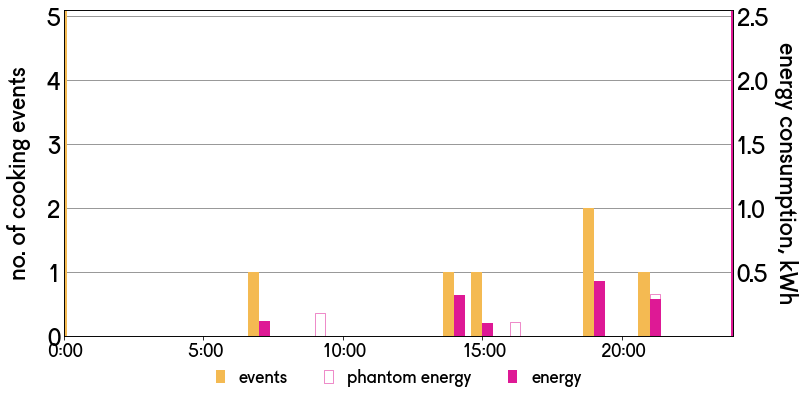

In [2821]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-08-13 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-08-14 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['hour'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_hour_statistics = df_whole_test.groupby(['meter_number',df_whole_test['hour'].dt.hour]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['hour'] = df_whole_grouped.timestamp
df_hour_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['hour'].dt.hour]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_hour_statistics_full = pd.concat([df_hour_statistics, df_hour_statistics_2], axis=1)

df_hour_statistics_full.reset_index(inplace=True)
df_hour_statistics_full.loc[((df_hour_statistics_full.meter_number.shift() == df_hour_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_hour_statistics_full.energy - df_hour_statistics_full.energy.shift()
df_hour_statistics_full['lost'] = df_hour_statistics_full.change_meter_count - df_hour_statistics_full.energy_gen
#df_hour_statistics_full.loc[((df_hour_statistics_full.hour == 3)\
#                             ), 'change_meter_count'] = df_hour_statistics_full.energy
df_hour_statistics_full.to_csv('result/hour_compensation.csv', index=False)

df_lost_overview = df_hour_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_hour_statistics_plot = df_hour_statistics_full.groupby('hour').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_hour_statistics_plot['lost_session']=df_hour_statistics_plot['change_meter_count']/\
(df_hour_statistics_plot.energy_gen.sum()/df_hour_statistics_plot.cooking_session.sum()) - df_hour_statistics_plot.cooking_session
df_hour_statistics_plot['total_session'] = df_hour_statistics_plot['lost_session'] + df_hour_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [12, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_hour_statistics_plot.drop(7, axis=0,inplace=True)
#df_hour_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_ylim(-0.0001,5.1)
ax2.set_ylim(0.0001,2.55)
ax1.set_xlim([0, 24])
#ax1.set_xlim([dt.date(1970, 1, 1), dt.date(1970, 2, 2)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(0, 5.1, color='#F4BA52', alpha = 1.0, label=None, width = 0.23)
ax1.bar(24, 5.1, color='#DF1995', alpha = 1.0, label=None, width = 0.15, zorder=8)


#RRR

ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.4)
#ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['change_meter_count'], color='none', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.5, edgecolor='#DE1995',width=0.365)
ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.4)

#ax2.plot(df_hour_statistics_plot.index, df_hour_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

#formatter = mdates.DateFormatter("%f:2 %p") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)

plt.savefig('visuals/lowday_steady_24h.png', dpi=200)
plt.show()

In [2822]:
print(df_hour_statistics_plot.cooking_session.sum())
print(df_hour_statistics_plot.total_session.sum())
print(df_hour_statistics_plot.change_meter_count.sum())
print(df_hour_statistics_plot.energy_gen.sum())
df_hour_statistics_plot.info()

6.0
3.8095238095238035
0.7999999999999998
1.2600000000000016
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 21
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_gen          16 non-null     float64
 1   cooking_session     16 non-null     float64
 2   change_meter_count  16 non-null     float64
 3   meter_number        16 non-null     int64  
 4   lost_session        16 non-null     float64
 5   total_session       16 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 896.0 bytes


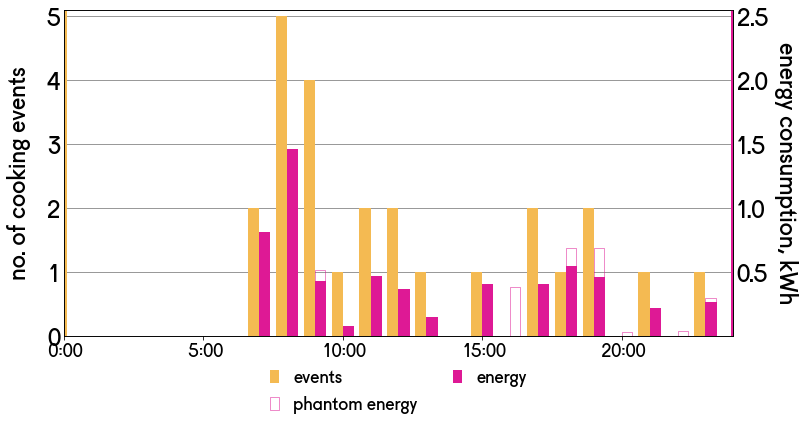

In [2845]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-05-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-05-10 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['hour'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_hour_statistics = df_whole_test.groupby(['meter_number',df_whole_test['hour'].dt.hour]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['hour'] = df_whole_grouped.timestamp
df_hour_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['hour'].dt.hour]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_hour_statistics_full = pd.concat([df_hour_statistics, df_hour_statistics_2], axis=1)

df_hour_statistics_full.reset_index(inplace=True)
df_hour_statistics_full.loc[((df_hour_statistics_full.meter_number.shift() == df_hour_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_hour_statistics_full.energy - df_hour_statistics_full.energy.shift()
df_hour_statistics_full['lost'] = df_hour_statistics_full.change_meter_count - df_hour_statistics_full.energy_gen
#df_hour_statistics_full.loc[((df_hour_statistics_full.hour == 3)\
#                             ), 'change_meter_count'] = df_hour_statistics_full.energy
df_hour_statistics_full.to_csv('result/hour_compensation.csv', index=False)

df_lost_overview = df_hour_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_hour_statistics_plot = df_hour_statistics_full.groupby('hour').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_hour_statistics_plot['lost_session']=df_hour_statistics_plot['change_meter_count']/\
(df_hour_statistics_plot.energy_gen.sum()/df_hour_statistics_plot.cooking_session.sum()) - df_hour_statistics_plot.cooking_session
df_hour_statistics_plot['total_session'] = df_hour_statistics_plot['lost_session'] + df_hour_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [12, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_hour_statistics_plot.drop(7, axis=0,inplace=True)
#df_hour_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_ylim(-0.0001,5.1)
ax2.set_ylim(0.0001,2.55)
ax1.set_xlim([0, 24])
#ax1.set_xlim([dt.date(1970, 1, 1), dt.date(1970, 2, 2)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(0, 5.1, color='#F4BA52', alpha = 1.0, label=None, width = 0.23)
ax1.bar(24, 5.1, color='#DF1995', alpha = 1.0, label=None, width = 0.15, zorder=8)


#RRR

ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.4)
#ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['change_meter_count'], color='none', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.5, edgecolor='#DE1995',width=0.365)
ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.4)

#ax2.plot(df_hour_statistics_plot.index, df_hour_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

#formatter = mdates.DateFormatter("%f:2 %p") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/highday_honeymoon_24h.png', dpi=200)
plt.show()

In [2846]:
print(df_hour_statistics_plot.cooking_session.sum())
print(df_hour_statistics_plot.total_session.sum())
print(df_hour_statistics_plot.change_meter_count.sum())
print(df_hour_statistics_plot.energy_gen.sum())
df_hour_statistics_plot.info()

25.0
17.733990147783242
4.320000000000002
6.090000000000004
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 7 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_gen          17 non-null     float64
 1   cooking_session     17 non-null     float64
 2   change_meter_count  17 non-null     float64
 3   meter_number        17 non-null     int64  
 4   lost_session        17 non-null     float64
 5   total_session       17 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 952.0 bytes


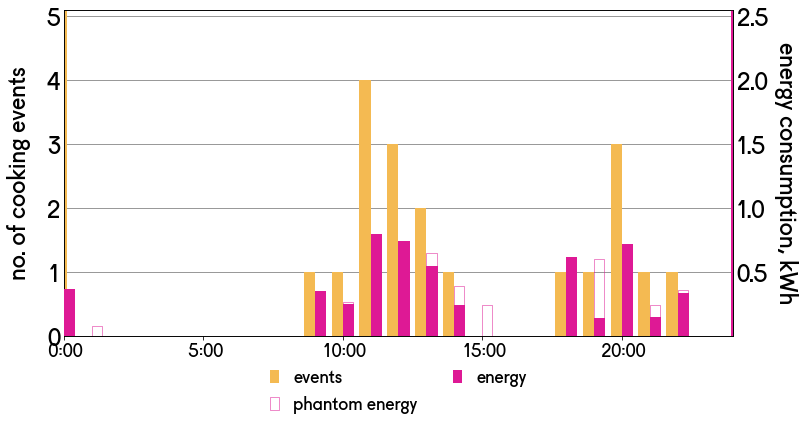

In [2847]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-30 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-03-31 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['hour'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_hour_statistics = df_whole_test.groupby(['meter_number',df_whole_test['hour'].dt.hour]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['hour'] = df_whole_grouped.timestamp
df_hour_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['hour'].dt.hour]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_hour_statistics_full = pd.concat([df_hour_statistics, df_hour_statistics_2], axis=1)

df_hour_statistics_full.reset_index(inplace=True)
df_hour_statistics_full.loc[((df_hour_statistics_full.meter_number.shift() == df_hour_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_hour_statistics_full.energy - df_hour_statistics_full.energy.shift()
df_hour_statistics_full['lost'] = df_hour_statistics_full.change_meter_count - df_hour_statistics_full.energy_gen
#df_hour_statistics_full.loc[((df_hour_statistics_full.hour == 3)\
#                             ), 'change_meter_count'] = df_hour_statistics_full.energy
df_hour_statistics_full.to_csv('result/hour_compensation.csv', index=False)

df_lost_overview = df_hour_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_hour_statistics_plot = df_hour_statistics_full.groupby('hour').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_hour_statistics_plot['lost_session']=df_hour_statistics_plot['change_meter_count']/\
(df_hour_statistics_plot.energy_gen.sum()/df_hour_statistics_plot.cooking_session.sum()) - df_hour_statistics_plot.cooking_session
df_hour_statistics_plot['total_session'] = df_hour_statistics_plot['lost_session'] + df_hour_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [12, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_hour_statistics_plot.drop(7, axis=0,inplace=True)
#df_hour_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_ylim(-0.0001,5.1)
ax2.set_ylim(0.0001,2.55)
ax1.set_xlim([0, 24])
#ax1.set_xlim([dt.date(1970, 1, 1), dt.date(1970, 2, 2)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(0, 5.1, color='#F4BA52', alpha = 1.0, label=None, width = 0.23)
ax1.bar(24, 5.1, color='#DF1995', alpha = 1.0, label=None, width = 0.15, zorder=8)


#RRR

ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.4)
#ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['change_meter_count'], color='none', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.5, edgecolor='#DE1995',width=0.365)
ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.4)

#ax2.plot(df_hour_statistics_plot.index, df_hour_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

#formatter = mdates.DateFormatter("%f:2 %p") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/mediumday_honeymoon_24h.png', dpi=200)
plt.show()

In [2848]:
print(df_hour_statistics_plot.cooking_session.sum())
print(df_hour_statistics_plot.total_session.sum())
print(df_hour_statistics_plot.change_meter_count.sum())
print(df_hour_statistics_plot.energy_gen.sum())
df_hour_statistics_plot.info()

20.0
15.142314990512347
3.99
5.269999999999996
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 22
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_gen          16 non-null     float64
 1   cooking_session     16 non-null     float64
 2   change_meter_count  16 non-null     float64
 3   meter_number        16 non-null     int64  
 4   lost_session        16 non-null     float64
 5   total_session       16 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 896.0 bytes


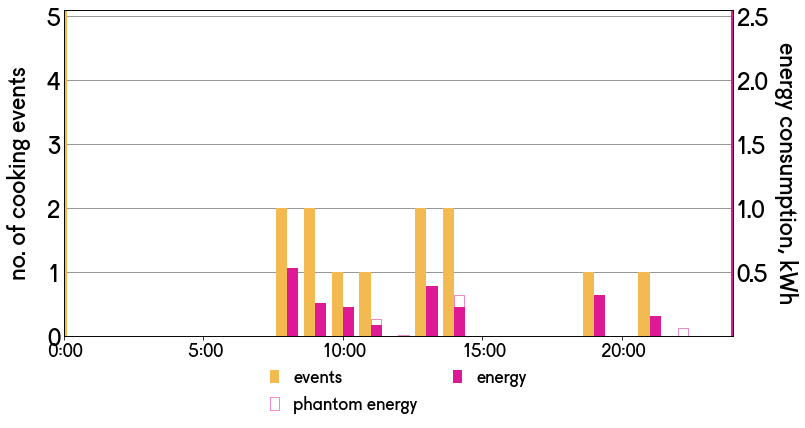

In [2849]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-04-21 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-04-22 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['hour'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_hour_statistics = df_whole_test.groupby(['meter_number',df_whole_test['hour'].dt.hour]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['hour'] = df_whole_grouped.timestamp
df_hour_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['hour'].dt.hour]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_hour_statistics_full = pd.concat([df_hour_statistics, df_hour_statistics_2], axis=1)

df_hour_statistics_full.reset_index(inplace=True)
df_hour_statistics_full.loc[((df_hour_statistics_full.meter_number.shift() == df_hour_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_hour_statistics_full.energy - df_hour_statistics_full.energy.shift()
df_hour_statistics_full['lost'] = df_hour_statistics_full.change_meter_count - df_hour_statistics_full.energy_gen
#df_hour_statistics_full.loc[((df_hour_statistics_full.hour == 3)\
#                             ), 'change_meter_count'] = df_hour_statistics_full.energy
df_hour_statistics_full.to_csv('result/hour_compensation.csv', index=False)

df_lost_overview = df_hour_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_hour_statistics_plot = df_hour_statistics_full.groupby('hour').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_hour_statistics_plot['lost_session']=df_hour_statistics_plot['change_meter_count']/\
(df_hour_statistics_plot.energy_gen.sum()/df_hour_statistics_plot.cooking_session.sum()) - df_hour_statistics_plot.cooking_session
df_hour_statistics_plot['total_session'] = df_hour_statistics_plot['lost_session'] + df_hour_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [12, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_hour_statistics_plot.drop(7, axis=0,inplace=True)
#df_hour_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_ylim(-0.0001,5.1)
ax2.set_ylim(0.0001,2.55)
ax1.set_xlim([0, 24])
#ax1.set_xlim([dt.date(1970, 1, 1), dt.date(1970, 2, 2)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(0, 5.1, color='#F4BA52', alpha = 1.0, label=None, width = 0.23)
ax1.bar(24, 5.1, color='#DF1995', alpha = 1.0, label=None, width = 0.15, zorder=8)


#RRR

ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.4)
#ax1.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['change_meter_count'], color='none', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.5, edgecolor='#DE1995',width=0.365)
ax2.bar(df_hour_statistics_plot.index, df_hour_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.4)

#ax2.plot(df_hour_statistics_plot.index, df_hour_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

#formatter = mdates.DateFormatter("%f:2 %p") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/lowday_honeymoon_24h.png', dpi=200)
plt.show()

In [2850]:
print(df_hour_statistics_plot.cooking_session.sum())
print(df_hour_statistics_plot.total_session.sum())
print(df_hour_statistics_plot.change_meter_count.sum())
print(df_hour_statistics_plot.energy_gen.sum())
df_hour_statistics_plot.info()

12.0
5.484162895927596
1.0099999999999998
2.2100000000000017
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 8 to 22
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_gen          10 non-null     float64
 1   cooking_session     10 non-null     float64
 2   change_meter_count  10 non-null     float64
 3   meter_number        10 non-null     int64  
 4   lost_session        10 non-null     float64
 5   total_session       10 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 560.0 bytes


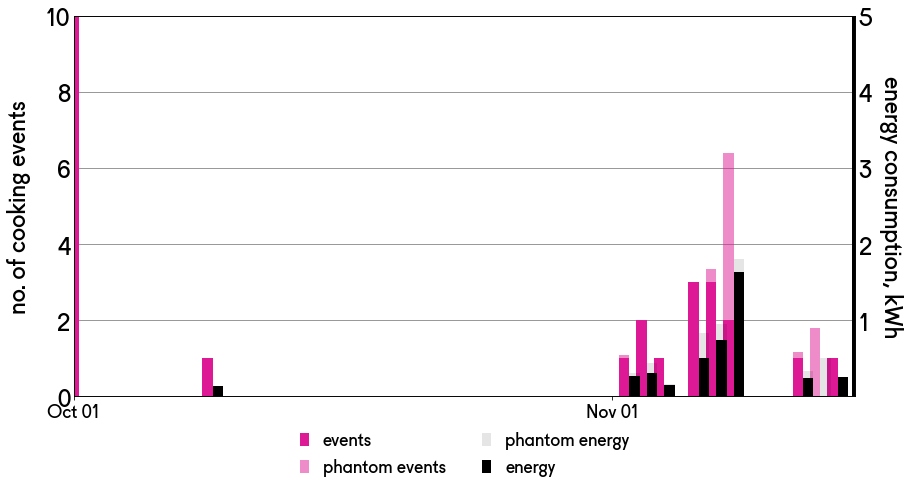

In [2452]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546308)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [14, 7]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,10)
ax2.set_ylim(0.0001,5)
ax1.set_xlim([dt.date(2020, 10, 1), dt.date(2020, 11, 15)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(dt.date(2020, 10, 1), 10, color='#DF1995', alpha = 1.0, label=None, width = 0.6)
ax1.bar(dt.date(2020, 11, 15), 10, color='black', alpha = 1.0, label=None, width = 0.4, hatch="//", zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#DE1995', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.6)
ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='black', alpha = 0.1, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.6)
ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='black', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/546308_tariff_days.png', dpi=200)
plt.show()

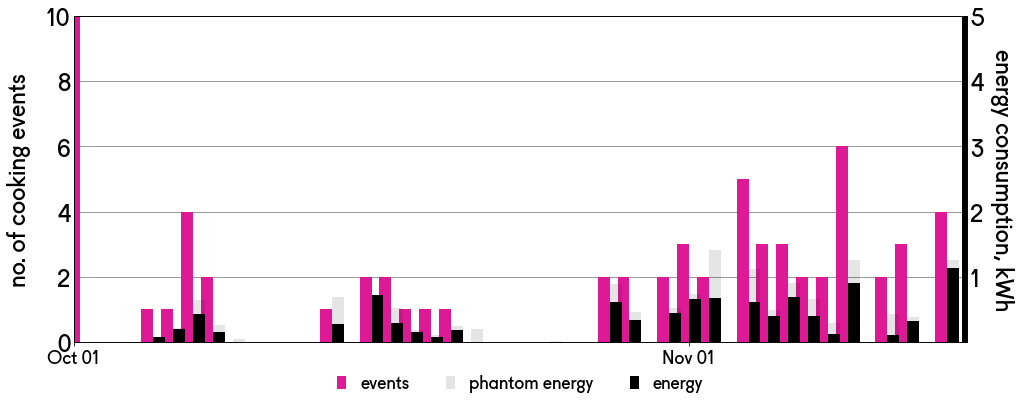

In [2519]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546341)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [16, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,10)
ax2.set_ylim(0.0001,5)
ax1.set_xlim([dt.date(2020, 10, 1), dt.date(2020, 11, 15)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(dt.date(2020, 10, 1), 10, color='#DF1995', alpha = 1.0, label=None, width = 0.6)
ax1.bar(dt.date(2020, 11, 15), 10, color='black', alpha = 1.0, label=None, width = 0.5, hatch="//", zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#DE1995', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.6)
#ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='black', alpha = 0.1, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.6)
ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='black', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)

plt.savefig('visuals/546341_tariff_days.png', dpi=200)
plt.show()

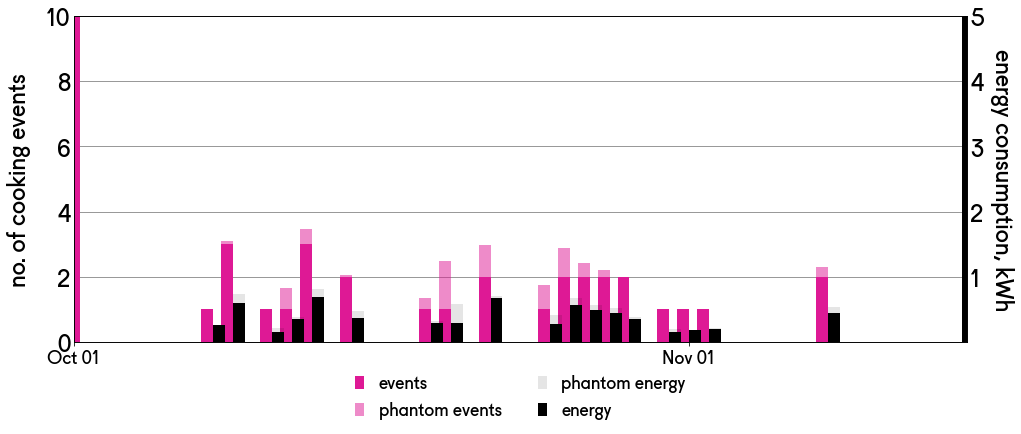

In [2726]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546361)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [16, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,10)
ax2.set_ylim(0.0001,5)
ax1.set_xlim([dt.date(2020, 10, 1), dt.date(2020, 11, 15)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(dt.date(2020, 10, 1), 10, color='#DF1995', alpha = 1.0, label=None, width = 0.6)
ax1.bar(dt.date(2020, 11, 15), 10, color='black', alpha = 1.0, label=None, width = 0.5, hatch="//", zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#DE1995', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.6)
ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='black', alpha = 0.1, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.6)
ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='black', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/546361_tariff_days.png', dpi=200)
plt.show()

In [2727]:
df_day_statistics_plot

energy_gen  cooking_session  change_meter_count  meter_number  \
day                                                                         
2020-10-08        0.26              1.0                0.00             1   
2020-10-09        0.60              3.0                0.73             1   
2020-10-11        0.15              1.0                0.22             1   
2020-10-12        0.36              1.0                0.39             1   
2020-10-13        0.69              3.0                0.81             1   
2020-10-15        0.37              2.0                0.48             1   
2020-10-19        0.29              1.0                0.32             1   
2020-10-20        0.29              1.0                0.58             1   
2020-10-22        0.68              2.0                0.70             1   
2020-10-25        0.28              1.0                0.41             1   
2020-10-26        0.57              2.0                0.68             1   
2020-10-27        0.49              2.0                0.57             1   
2020-10-28        0.44              2.0                0.52             1   
2020-10-29        0.35              2.0                0.38             1   
2020-10-31        0.15              1.0                0.20             1   
2020-11-01        0.18              1.0                0.19             1   
2020-11-02        0.20              1.0                0.22             1   
2020-11-08        0.45              2.0                0.54             1   

            lost_session  total_session  
day                                      
2020-10-08     -1.000000       0.000000  
2020-10-09      0.113235       3.113235  
2020-10-11     -0.061765       0.938235  
2020-10-12      0.663235       1.663235  
2020-10-13      0.454412       3.454412  
2020-10-15      0.047059       2.047059  
2020-10-19      0.364706       1.364706  
2020-10-20      1.473529       2.473529  
2020-10-22      0.985294       2.985294  
2020-10-25      0.748529       1.748529  
2020-10-26      0.900000       2.900000  
2020-10-27      0.430882       2.430882  
2020-10-28      0.217647       2.217647  
2020-10-29     -0.379412       1.620588  
2020-10-31     -0.147059       0.852941  
2020-11-01     -0.189706       0.810294  
2020-11-02     -0.061765       0.938235  
2020-11-08      0.302941       2.302941

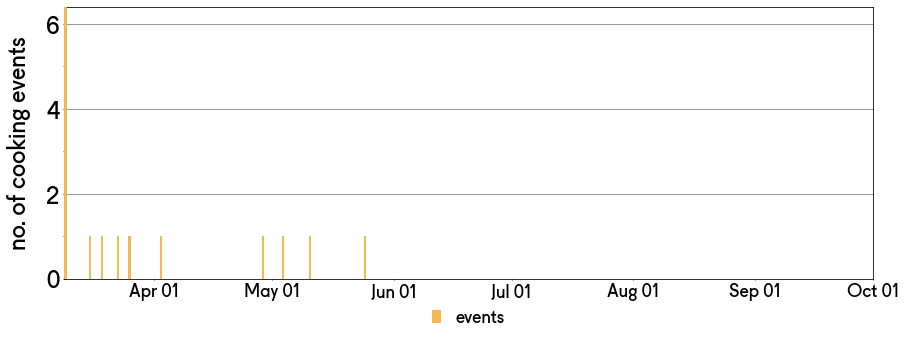

In [2636]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546341)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [14.5, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.set_ylim(-0.0,6.4)
#ax2.set_ylim(0.00001,1.6)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(True, axis='y', color='gray')

ax1.bar(dt.date(2020, 3, 9), 6.39, color='#F4BA52', alpha = 1.0, label=None, width = 1.5, zorder=8)
#ax2.bar(dt.date(2020, 10, 1), 2.15, color='#DF1995', alpha = 1.0, label=None, width = 1, zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.50, align='edge',width=-0.6)
#ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='white', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.6, edgecolor='#DE1995',width=0.6)
#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0.6, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
#ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(which ='both',length=1)
ax1.tick_params(which='minor', length=1)
#ax2.tick_params(axis='y',length=0)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
#ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)

plt.savefig('visuals/546341_without_tariff_days.png', dpi=200)
plt.show()

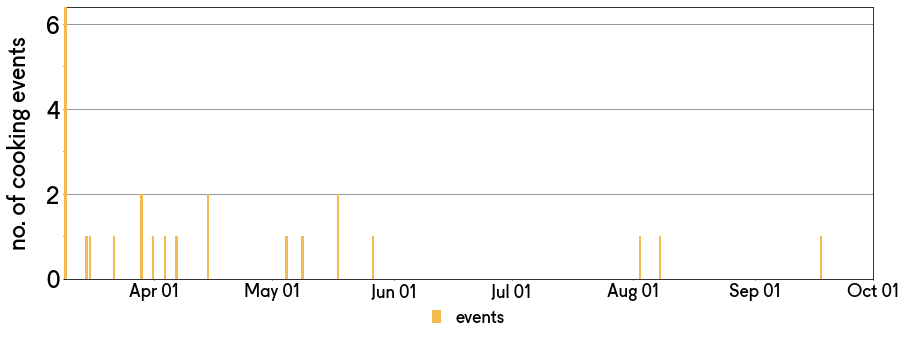

In [2637]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546322)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [14.5, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.set_ylim(-0.0,6.4)
#ax2.set_ylim(0.00001,1.6)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(True, axis='y', color='gray')

ax1.bar(dt.date(2020, 3, 9), 6.39, color='#F4BA52', alpha = 1.0, label=None, width = 1.5, zorder=8)
#ax2.bar(dt.date(2020, 10, 1), 2.15, color='#DF1995', alpha = 1.0, label=None, width = 1, zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.50, align='edge',width=-0.6)
#ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='white', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.6, edgecolor='#DE1995',width=0.6)
#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0.6, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
#ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(which ='both',length=1)
ax1.tick_params(which='minor', length=1)
ax2.tick_params(axis='y',length=0)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
#ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)

plt.savefig('visuals/546322_without_tariff_days.png', dpi=200)
plt.show()

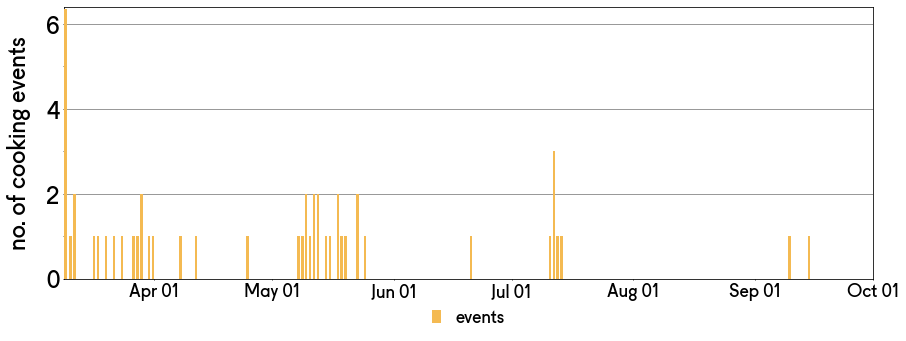

In [2634]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546361)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [14.5, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.set_ylim(-0.0,6.4)
#ax2.set_ylim(0.00001,1.6)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(True, axis='y', color='gray')
#ax2.grid(True, axis='y', color='gray')

ax1.bar(dt.date(2020, 3, 9), 6.35, color='#F4BA52', alpha = 1.0, label=None, width = 1.5, zorder=8)
#ax2.bar(dt.date(2020, 10, 1), 2.15, color='#DF1995', alpha = 1.0, label=None, width = 1, zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.50, align='edge',width=-0.6)
#ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='white', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.6, edgecolor='#DE1995',width=0.6)
#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0.6, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
#ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(which ='both',length=1)
ax1.tick_params(which='minor', length=1)
#ax2.tick_params(axis='y',length=0)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
#ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)

plt.savefig('visuals/546361_without_tariff_days.png', dpi=200)
plt.show()

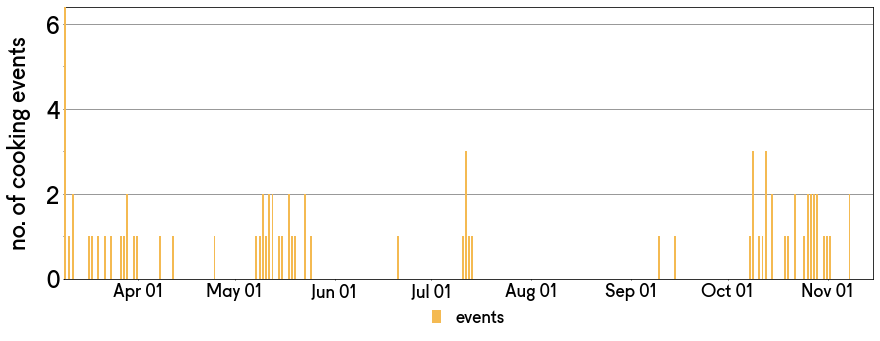

In [2633]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546361)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [14.5, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.set_ylim(-0.0,6.4)
#ax2.set_ylim(0.00001,1.6)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 11, 15)])

ax1.grid(True, axis='y', color='gray')
#ax2.grid(True, axis='y', color='gray')

ax1.bar(dt.date(2020, 3, 9), 6.39, color='#F4BA52', alpha = 1.0, label=None, width = 1.5, zorder=8)
#ax2.bar(dt.date(2020, 11, 15), 2.15, color='#DF1995', alpha = 1.0, label=None, width = 1, zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.50, align='edge',width=-0.6)
#ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='white', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.6, edgecolor='#DE1995',width=0.6)
#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0.6, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
#ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(which ='both',length=1)
ax1.tick_params(which='minor', length=1)
#ax2.tick_params(axis='y',length=0)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
#ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)

plt.savefig('visuals/546361_before_tariff_days.png', dpi=200)
plt.show()

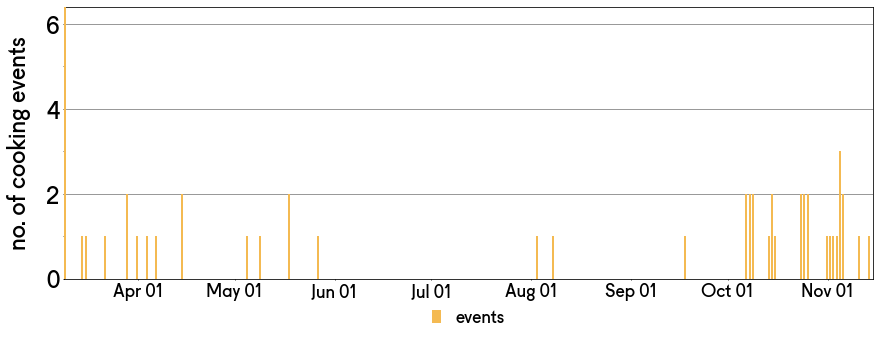

In [2632]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546322)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [14.5, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.set_ylim(-0.0,6.4)
#ax2.set_ylim(0.00001,1.6)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 11, 15)])

ax1.grid(True, axis='y', color='gray')
#ax2.grid(True, axis='y', color='gray')

ax1.bar(dt.date(2020, 3, 9), 6.39, color='#F4BA52', alpha = 1.0, label=None, width = 1.5, zorder=8)
#ax2.bar(dt.date(2020, 11, 15), 2.15, color='#DF1995', alpha = 1.0, label=None, width = 1, zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.50, align='edge',width=-0.6)
#ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='white', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.6, edgecolor='#DE1995',width=0.6)
#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0.6, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
#ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(which ='both',length=1)
ax1.tick_params(which='minor', length=1)
#ax2.tick_params(axis='y',length=0)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
#ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)

plt.savefig('visuals/546322_before_tariff_days.png', dpi=200)
plt.show()

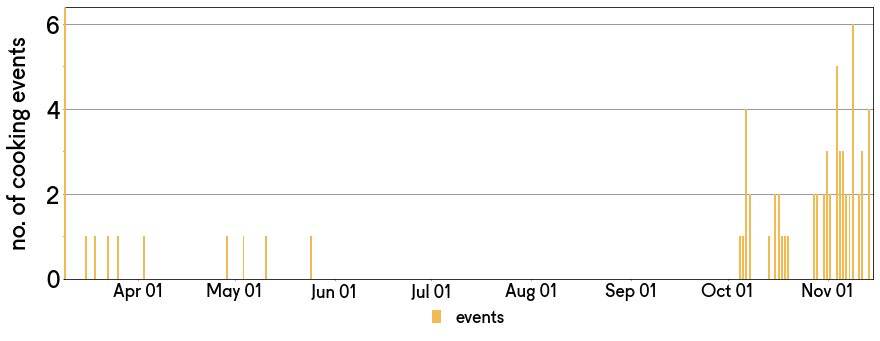

In [2639]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546341)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [14.5, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.set_ylim(-0.0,6.4)
#ax2.set_ylim(0.00001,1.6)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 11, 15)])

ax1.grid(True, axis='y', color='gray')
#ax2.grid(True, axis='y', color='gray')

ax1.bar(dt.date(2020, 3, 9), 6.39, color='#F4BA52', alpha = 1.0, label=None, width = 1.5, zorder=8)
#ax2.bar(dt.date(2020, 11, 15), 2.15, color='#DF1995', alpha = 1.0, label=None, width = 1, zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.50, align='edge',width=-0.6)
#ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='white', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.6, edgecolor='#DE1995',width=0.6)
#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0.6, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
#ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(which ='both',length=1)
ax1.tick_params(which='minor', length=1)
#ax2.tick_params(axis='y',length=0)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
#ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)

plt.savefig('visuals/546341_before_tariff_days.png', dpi=200)
plt.show()

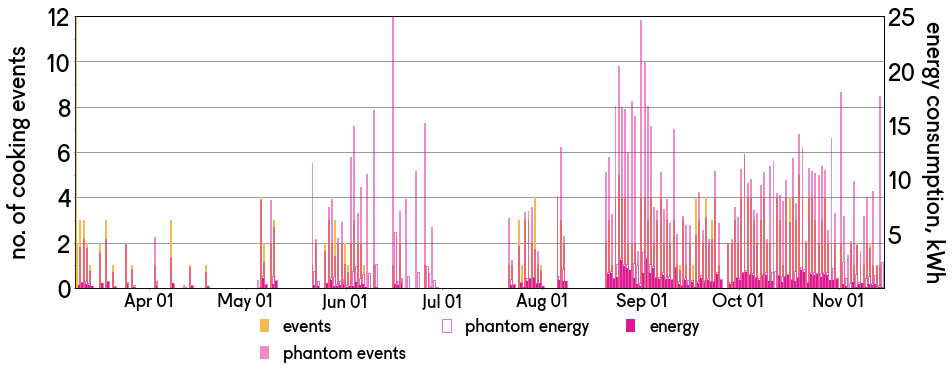

In [2699]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546375)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [14.5, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,12)
ax2.set_ylim(0.00001,25)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 11, 15)])

ax1.grid(True, axis='y', color='gray')
#ax2.grid(True, axis='y', color='gray')

ax1.bar(dt.date(2020, 3, 9), 12.074, color='#F4BA52', alpha = 1.0, label=None, width = 1.5, zorder=8)
#ax2.bar(dt.date(2020, 11, 15), 2.15, color='#DF1995', alpha = 1.0, label=None, width = 1, zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#F4BA52', label='events', zorder=2.50, align='edge',width=-0.6)
ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='white', alpha = 1, label='phantom energy', zorder=2.52, align='edge', linewidth=0.6, edgecolor='#DE1995',width=0.6)
ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='#DE1995', label='energy', zorder=2.53, linewidth=0.6, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(which ='both',length=1)
ax1.tick_params(which='minor', length=1)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(5))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)

plt.savefig('visuals/546375_before_tariff_days.png', dpi=200)
plt.show()

In [2703]:
#Dates
df_latest_energy.info()
#Days
#Share Dates [%]
#Active meters
#Total number cooking events
#Share cooking events of total
#Average total events per day
#Average events per hh per day
#Average total events per month
#Average events per hh per month
#Average events per active meter per day
#Average events per active meter per month
#Total Energy [kWh]
#Share Total Energy [%]

NameError: name 'df_latest_energy' is not defined

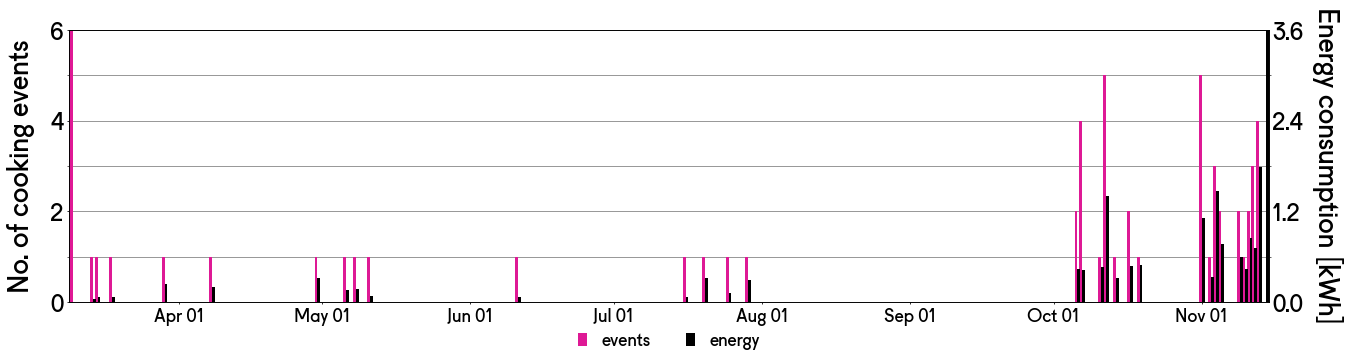

In [2658]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546333)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [21.5, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=28)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,6)
ax2.set_ylim(0.000,3.6)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 11, 15)])

ax1.grid(True, axis='y', color='gray')

ax1.bar(dt.date(2020, 3, 9), 6, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 11, 15), 6, color='black', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#DE1995', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.6)
#ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

#ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='black', alpha = 0.1, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.6)
ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='black', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('Energy consumption [kWh]', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35)
ax1.set_ylabel('No. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='both', length=2)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1.2))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.6))
ax1.grid(b=True, which='minor', color='gray', linestyle='-')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/546333_before_tariff_days.png', dpi=200)
plt.show()

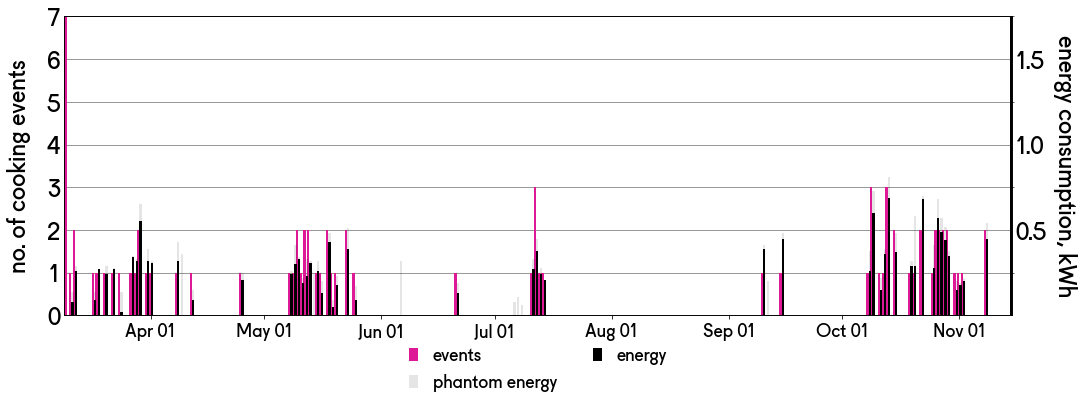

In [2536]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546361)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [17, 5.5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,7)
ax2.set_ylim(0.0001,1.75)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 11, 15)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 10, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 11, 15), 10, color='black', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#DE1995', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.6)
#ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='black', alpha = 0.1, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.6)
ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='black', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/546361_before_tariff_days.png', dpi=200)
plt.show()

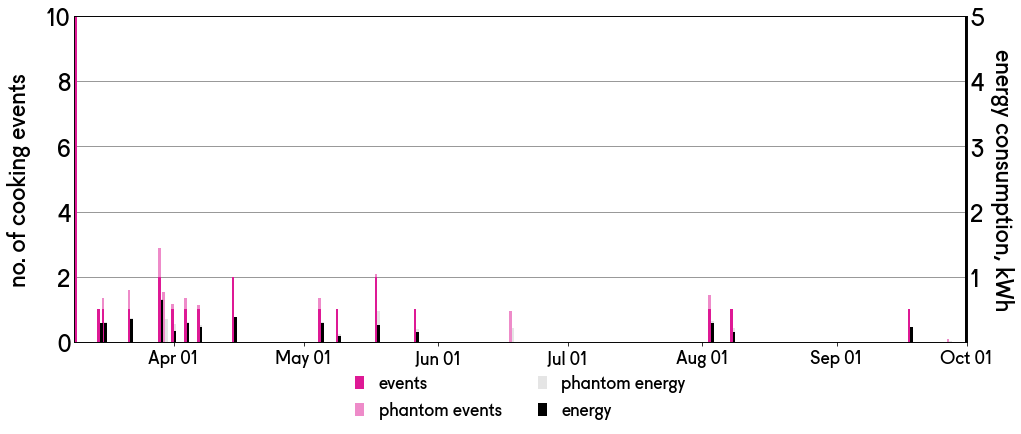

In [2522]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546322)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [16, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,10)
ax2.set_ylim(0.0001,5)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 10, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 10, 1), 10, color='black', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#DE1995', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.6)
ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='black', alpha = 0.1, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.6)
ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='black', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/546322_before_tariff_days.png', dpi=200)
plt.show()

In [2713]:
#EEEEE
print(df_honeymoon.meter_number.nunique())
print(df_steady.meter_number.nunique())
print(df_tariff.meter_number.nunique())
print(df_whole.meter_number.nunique())

df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)

df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-06-01 00:00:00'))) == True)].index, inplace = True)
df_honeymoon_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)

df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-06-01 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_steady_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)

df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_tariff_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)


print('no. of cooking events:')
print(df_honeymoon_grouped.cooking_session.nunique())
print(df_steady_grouped.cooking_session.nunique())
print(df_tariff_grouped.cooking_session.nunique())
print(df_whole_grouped.cooking_session.nunique())

83
64
56
100
no. of cooking events:
1592
858
1419
3848


3848

In [2716]:
df_whole_grouped.groupby(['meter_number']).agg({'energy':'max'}).sum()

energy    1397.56
dtype: float64

In [2721]:

df_whole_grouped.groupby(['meter_number']).agg({'energy_gen':'sum'}).sum()/df_whole_grouped.cooking_session.nunique()

energy_gen    0.239623
dtype: float64

In [2722]:
print('energy gen sum:')
print(df_honeymoon_grouped.groupby(['meter_number']).agg({'energy_gen':'sum'}).sum())
print(df_steady_grouped.groupby(['meter_number']).agg({'energy_gen':'sum'}).sum())
print(df_tariff_grouped.groupby(['meter_number']).agg({'energy_gen':'sum'}).sum())
print(df_whole_grouped.groupby(['meter_number']).agg({'energy_gen':'sum'}).sum())

energy gen sum:
energy_gen    341.68
dtype: float64
energy_gen    187.02
dtype: float64
energy_gen    398.47
dtype: float64
energy_gen    922.07
dtype: float64


In [2719]:
average_cooking_event

0.23962318087318085

In [2718]:
print('energy max:')
print(df_honeymoon_grouped.groupby(['meter_number']).agg({'energy':'max'}).sum())
print(df_steady_grouped.groupby(['meter_number']).agg({'energy':'max'}).sum())
print(df_tariff_grouped.groupby(['meter_number']).agg({'energy':'max'}).sum())
print(df_whole_grouped.groupby(['meter_number']).agg({'energy':'max'}).sum())

energy max:
energy    535.74
dtype: float64
energy    819.37
dtype: float64
energy    1164.71
dtype: float64
energy    1397.56
dtype: float64


In [ ]:
print('no. of cooking events:')
print(df_honeymoon_grouped.cooking_session.nunique())
print(df_steady_grouped.cooking_session.nunique())
print(df_tariff_grouped.cooking_session.nunique())
print(df_whole_grouped.cooking_session.nunique())

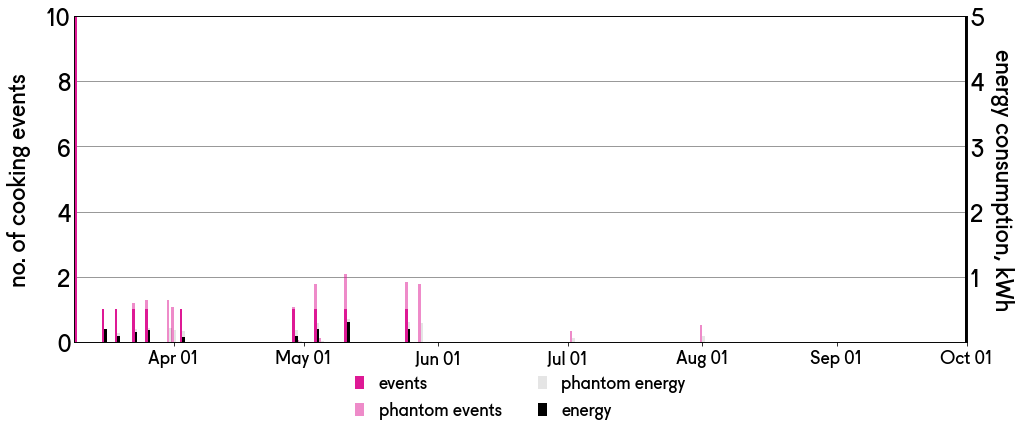

In [2510]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546341)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [16, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,10)
ax2.set_ylim(0.0001,5)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 10, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 10, 1), 10, color='black', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#DE1995', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.6)
ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='black', alpha = 0.1, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.6)
ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='black', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/546341_before_tariff_days.png', dpi=200)
plt.show()

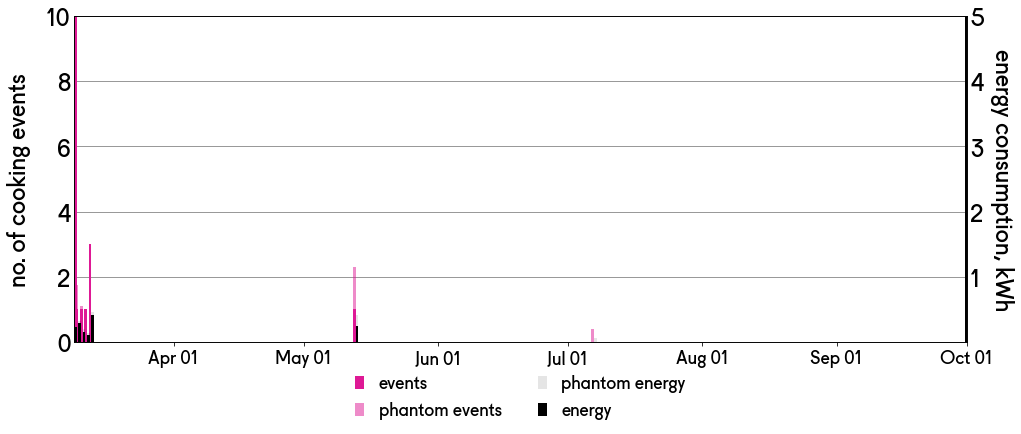

In [2447]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546308)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [16, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,10)
ax2.set_ylim(0.0001,5)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 10, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 10, 1), 10, color='black', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#DE1995', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.6)
ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='black', alpha = 0.1, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.6)
ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='black', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/546308_tariff_days.png', dpi=200)
plt.show()

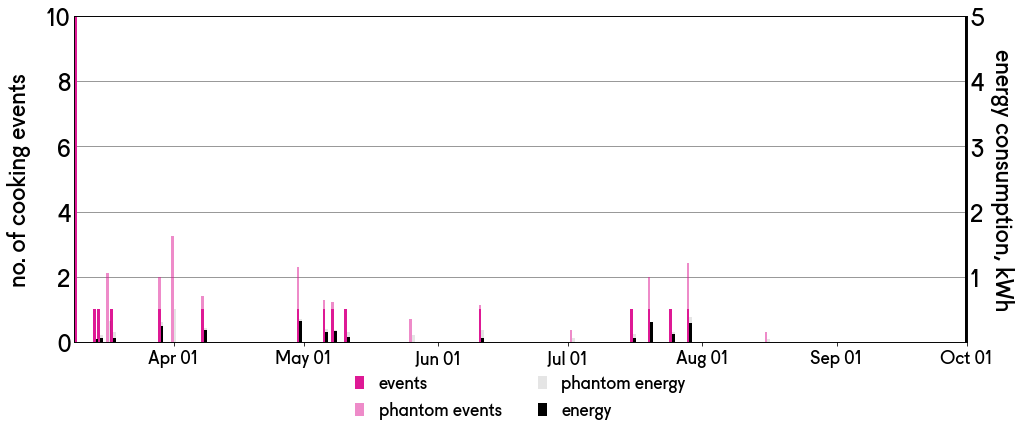

In [2446]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546333)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [16, 6]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,10)
ax2.set_ylim(0.0001,5)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 10, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 10, 1), 10, color='black', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#DE1995', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.6)
ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='black', alpha = 0.1, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.6)
ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='black', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/546333_tariff_days.png', dpi=200)
plt.show()

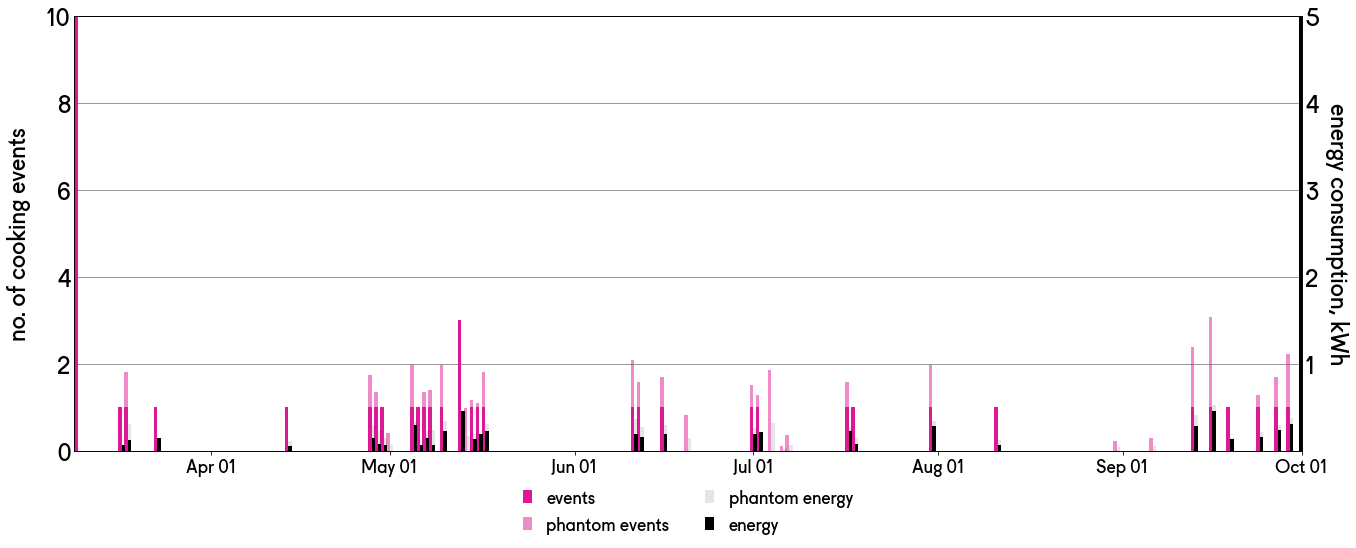

In [2435]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546316)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [22, 8]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,10)
ax2.set_ylim(0.0001,5)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 10, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 10, 1), 10, color='black', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#DE1995', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.6)
ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='black', alpha = 0.1, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.6)
ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='black', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/546316_tariff_days.png', dpi=200)
plt.show()

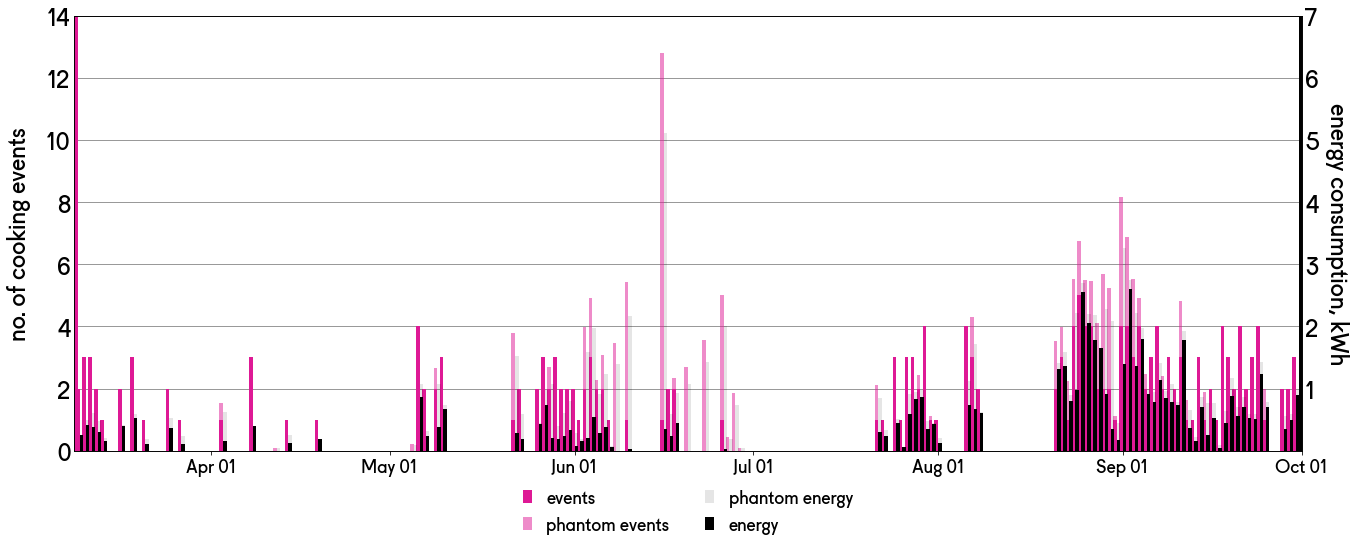

In [2443]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546375)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(0.4) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [22, 8]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,14)
ax2.set_ylim(0.0001,7)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 14, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 10, 1), 14, color='black', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#DE1995', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.6)
ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='black', alpha = 0.1, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.6)
ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='black', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/546375_tariff_days_400WAverage.png', dpi=200)
plt.show()

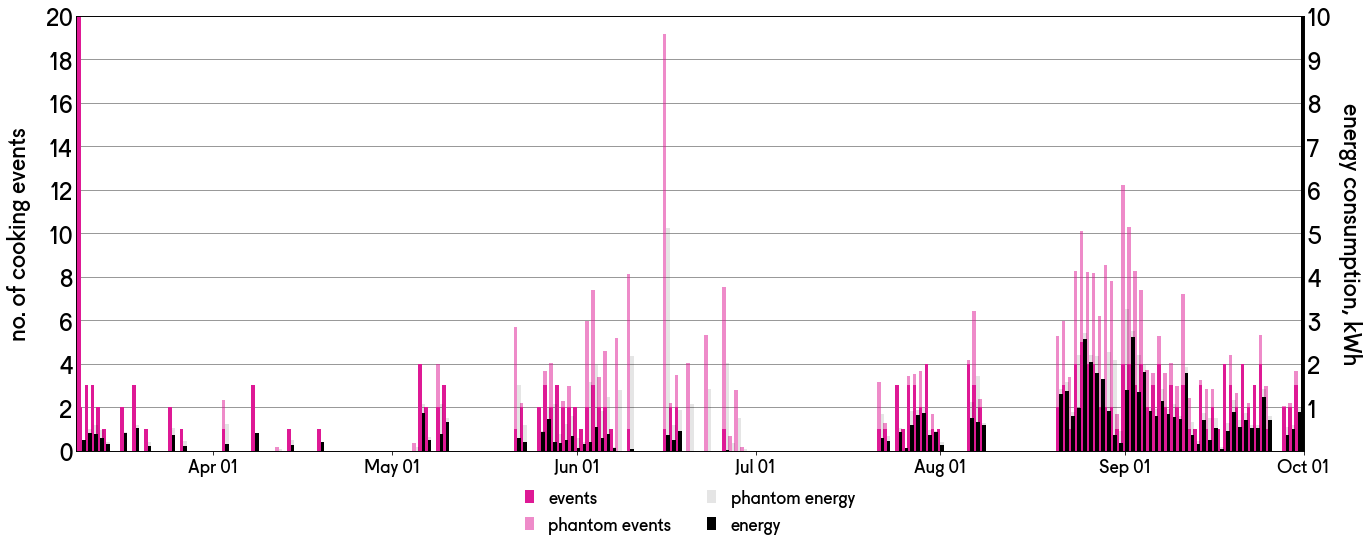

In [2798]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_whole_test['day'] = df_whole_test.index
df_whole_test['min_energy'] = df_whole_test.energy
df_whole_test.reset_index(inplace=True)
df_day_statistics = df_whole_test.groupby(['meter_number',df_whole_test['day'].dt.date]).agg({'energy':'max','min_energy':'min','timestamp':'min'})
df_whole_grouped['day'] = df_whole_grouped.timestamp
df_day_statistics_2 = df_whole_grouped.groupby(['meter_number',df_whole_grouped['day'].dt.date]).agg({'energy_gen':'sum','cooking_session':'nunique'})
df_day_statistics_full = pd.concat([df_day_statistics, df_day_statistics_2], axis=1)

df_day_statistics_full.reset_index(inplace=True)
df_day_statistics_full.loc[((df_day_statistics_full.meter_number.shift() == df_day_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_day_statistics_full.energy - df_day_statistics_full.energy.shift()
df_day_statistics_full['lost'] = df_day_statistics_full.change_meter_count - df_day_statistics_full.energy_gen
#df_day_statistics_full.loc[((df_day_statistics_full.day == 3)\
#                             ), 'change_meter_count'] = df_day_statistics_full.energy
df_day_statistics_full.drop(df_day_statistics_full[(((df_day_statistics_full.meter_number != 546375)) == True)].index, inplace = True)
df_day_statistics_full.to_csv('result/day_compensation.csv', index=False)

df_lost_overview = df_day_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_day_statistics_plot = df_day_statistics_full.groupby('day').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

df_day_statistics_plot['lost_session']=df_day_statistics_plot['change_meter_count']/\
(df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum()) - df_day_statistics_plot.cooking_session
df_day_statistics_plot['total_session'] = df_day_statistics_plot['lost_session'] + df_day_statistics_plot.cooking_session



plt.rcParams['figure.figsize'] = [22, 8]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
#df_day_statistics_plot.drop(7, axis=0,inplace=True)
#df_day_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,20)
ax2.set_ylim(0.0001,10)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 20, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 10, 1), 20, color='black', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['cooking_session'], color='#DE1995', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.6)
ax1.bar(df_day_statistics_plot.index, df_day_statistics_plot['total_session'], color='#DE1995', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.6,alpha=0.5)

ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['change_meter_count'], color='black', alpha = 0.1, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.6)
ax2.bar(df_day_statistics_plot.index, df_day_statistics_plot['energy_gen'], color='black', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.6)

#ax2.plot(df_day_statistics_plot.index, df_day_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/546375_tariff_days.png', dpi=200)
plt.show()

In [2799]:
df_month_statistics_full.reset_index(inplace=True)
df_month_statistics_full.loc[((df_month_statistics_full.meter_number.shift() == df_month_statistics_full.meter_number)\
                             ), 'change_meter_count'] = df_month_statistics_full.energy - df_month_statistics_full.energy.shift()
df_month_statistics_full['lost'] = df_month_statistics_full.change_meter_count - df_month_statistics_full.energy_gen
df_month_statistics_full.loc[((df_month_statistics_full.month == 3)\
                             ), 'change_meter_count'] = df_month_statistics_full.energy
df_month_statistics_full.to_csv('result/month_compensation.csv', index=False)

df_month_statistics_full_backup.reset_index(inplace=True)
df_month_statistics_full_backup.loc[((df_month_statistics_full_backup.meter_number.shift() == df_month_statistics_full_backup.meter_number)\
                             ), 'change_meter_count'] = df_month_statistics_full_backup.energy - df_month_statistics_full_backup.energy.shift()
df_month_statistics_full_backup['lost'] = df_month_statistics_full_backup.change_meter_count - df_month_statistics_full_backup.energy_gen
df_month_statistics_full_backup.loc[((df_month_statistics_full_backup.month == 3)\
                             ), 'change_meter_count'] = df_month_statistics_full_backup.energy

df_month_statistics_full_backup.to_csv('result/month_compensation_backup.csv', index=False)

df_month_statistics_full_only_cooking_sessions.reset_index(inplace=True)
df_month_statistics_full_only_cooking_sessions.loc[((df_month_statistics_full_only_cooking_sessions.meter_number.shift() == df_month_statistics_full_only_cooking_sessions.meter_number)\
                             ), 'change_meter_count'] = df_month_statistics_full_only_cooking_sessions.energy - df_month_statistics_full_only_cooking_sessions.energy.shift()
df_month_statistics_full_only_cooking_sessions['lost'] = df_month_statistics_full_only_cooking_sessions.change_meter_count - df_month_statistics_full_only_cooking_sessions.energy_gen
df_month_statistics_full_only_cooking_sessions.loc[((df_month_statistics_full_only_cooking_sessions.month == 3)\
                             ), 'change_meter_count'] = df_month_statistics_full_only_cooking_sessions.energy
df_month_statistics_full_only_cooking_sessions.to_csv('result/month_compensation_only_cooking_sessions.csv', index=False)

ValueError: cannot insert level_0, already exists

In [2800]:
df_lost_overview = df_month_statistics_full.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview.to_csv('result/lost_complete_basis.csv', index=True)

df_lost_overview_backup = df_month_statistics_full_backup.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview_backup.to_csv('result/lost_complete_basis_backup.csv', index=True)

df_lost_overview_full_only_cooking_sessions = df_month_statistics_full_only_cooking_sessions.groupby('meter_number')\
.agg({'energy':'max','min_energy':'min','energy_gen':'sum','lost':'sum','timestamp':'min','cooking_session':'sum'})
df_lost_overview_full_only_cooking_sessions.to_csv('result/lost_complete_basis_full_only_cooking_sessions.csv', index=True)

In [2801]:
df_month_statistics_plot = df_month_statistics_full.groupby('month').\
agg({'energy_gen':'sum','cooking_session':'sum', 'change_meter_count':'sum', 'meter_number':'nunique'})\

In [2802]:
df_month_statistics_plot.reset_index(inplace=True)
months = {3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
norm_month_time = {3:0.7096774193548387,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:0.5,12:1}
df_month_statistics_plot['months'] = df_month_statistics_plot.month.map(months)
df_month_statistics_plot.reset_index(inplace=True)
df_month_statistics_plot

index  month  energy_gen  cooking_session  change_meter_count  \
0      0      3      113.58            551.0              189.44   
1      1      4      115.97            509.0              159.37   
2      2      5      107.34            512.0              157.28   
3      3      6       42.40            219.0               84.39   
4      4      7       44.63            219.0               74.87   
5      5      8       49.05            201.0               75.57   
6      6      9       50.63            218.0               68.93   
7      7     10      225.76            848.0              275.05   
8      8     11      172.71            571.0              229.70   

   meter_number months  
0            81    Mar  
1            75    Apr  
2            62    May  
3            67    Jun  
4            83    Jul  
5            42    Aug  
6            29    Sep  
7            53    Oct  
8            48    Nov

In [2803]:
df_month_statistics_plot['lost_session']=df_month_statistics_plot['change_meter_count']/\
(df_month_statistics_plot.energy_gen.sum()/df_month_statistics_plot.cooking_session.sum()) - df_month_statistics_plot.cooking_session
df_month_statistics_plot['total_session'] = df_month_statistics_plot['lost_session'] + df_month_statistics_plot.cooking_session

In [2804]:
df_month_statistics_plot

index  month  energy_gen  cooking_session  change_meter_count  \
0      0      3      113.58            551.0              189.44   
1      1      4      115.97            509.0              159.37   
2      2      5      107.34            512.0              157.28   
3      3      6       42.40            219.0               84.39   
4      4      7       44.63            219.0               74.87   
5      5      8       49.05            201.0               75.57   
6      6      9       50.63            218.0               68.93   
7      7     10      225.76            848.0              275.05   
8      8     11      172.71            571.0              229.70   

   meter_number months  lost_session  total_session  
0            81    Mar    239.574598     790.574598  
1            75    Apr    156.085905     665.085905  
2            62    May    144.363877     656.363877  
3            67    Jun    133.177947     352.177947  
4            83    Jul     93.448903     312.448903  
5            42    Aug    114.370156     315.370156  
6            29    Sep     69.659982     287.659982  
7            53    Oct    299.843873    1147.843873  
8            48    Nov    387.588394     958.588394

In [2382]:
df_month_statistics_plot

index  month  energy_gen  cooking_session  change_meter_count  \
0      0      3      113.58            551.0              189.44   
1      1      4      115.97            509.0              159.37   
2      2      5      107.34            512.0              157.28   
3      3      6       42.40            219.0               84.39   
4      4      7       44.63            219.0               74.87   
5      5      8       49.05            201.0               75.57   
6      6      9       50.63            218.0               68.93   
7      7     10      225.76            848.0              275.05   
8      8     11      172.71            571.0              229.70   

   meter_number months  lost_session  total_session  
0            81    Mar    239.574598     790.574598  
1            75    Apr    156.085905     665.085905  
2            62    May    144.363877     656.363877  
3            67    Jun    133.177947     352.177947  
4            83    Jul     93.448903     312.448903  
5            42    Aug    114.370156     315.370156  
6            29    Sep     69.659982     287.659982  
7            53    Oct    299.843873    1147.843873  
8            48    Nov    387.588394     958.588394

In [2360]:
df_month_statistics_plot.energy_gen.sum()/df_month_statistics_plot.cooking_session.sum()

0.2396231808731808

In [2361]:
import statistics

In [2362]:
df_whole_grouped.cooking_time.mean()

37.245618624117185

In [2363]:
statistics.mode(df_whole_grouped.energy_gen)

0.25

In [2364]:
statistics.mode(df_whole_grouped.cooking_time)

10.0

In [2365]:
statistics.variance(df_whole_grouped.cooking_time)

1066.8227012328502

In [2366]:
statistics.variance(df_whole_grouped.energy_gen)

0.027663362859379467

In [2367]:
statistics.stdev(df_whole_grouped.cooking_time)

32.66225193143991

In [2368]:
statistics.stdev(df_whole_grouped.energy_gen)

0.1663230677307855

In [2369]:
statistics.pstdev(df_whole_grouped.cooking_time)

32.65797984301258

In [2370]:
statistics.pstdev(df_whole_grouped.cooking_time)

32.65797984301258

In [2371]:
df_whole_grouped.energy_gen.mean()

0.23894846978812476

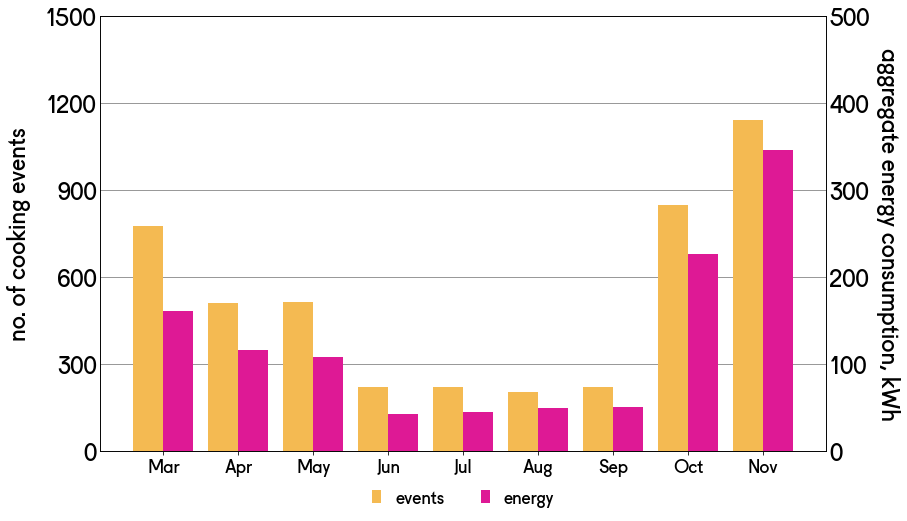

In [2805]:
plt.rcParams['figure.figsize'] = [13, 8]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
months = {3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
norm_month_time = {3:0.7096774193548387,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:0.5,12:1}
df_month_statistics_plot['months'] = df_month_statistics_plot.month.map(months)
df_month_statistics_plot['norm_month_time'] = df_month_statistics_plot.month.map(norm_month_time)
df_month_statistics_plot['norm_cooking_session'] = df_month_statistics_plot['cooking_session']/df_month_statistics_plot['norm_month_time']
df_month_statistics_plot['norm_energy'] = df_month_statistics_plot['energy_gen']/df_month_statistics_plot['norm_month_time']
df_month_statistics_plot['norm_not_captured_energy'] = df_month_statistics_plot['change_meter_count']/df_month_statistics_plot['norm_month_time']
df_month_statistics_plot['norm_total_session'] = df_month_statistics_plot['total_session']/df_month_statistics_plot['norm_month_time']

#df_month_statistics_plot.drop(7, axis=0,inplace=True)
#df_month_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,1500)
ax2.set_ylim(-0.0,500)
#ax1.set_xlim([dt.date(2020, 3, 3), dt.date(2020, 12, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.4)
#ax1.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_total_session'], color='#F4BA52', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.4,alpha=0.7)

#ax2.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_not_captured_energy'], color='#DE1995', alpha = 0.7, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.4)
ax2.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_energy'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.4)

#ax2.plot(df_month_statistics_plot['months'], df_month_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('aggregate energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(300))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(300))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(100))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/TZcooking_with_tariff.png', dpi=200)
plt.show()

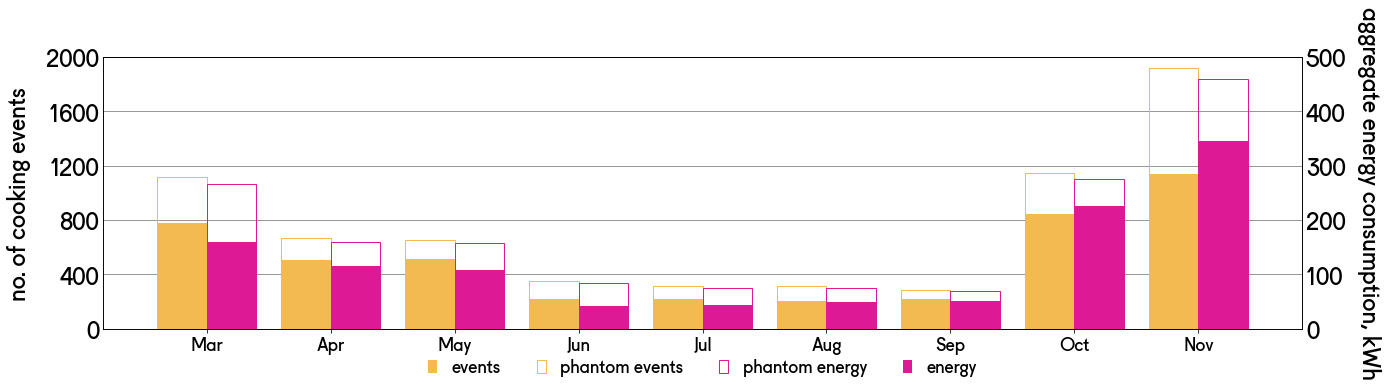

In [2806]:
plt.rcParams['figure.figsize'] = [21.5, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
months = {3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
norm_month_time = {3:0.7096774193548387,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:0.5,12:1}
df_month_statistics_plot['months'] = df_month_statistics_plot.month.map(months)
df_month_statistics_plot['norm_month_time'] = df_month_statistics_plot.month.map(norm_month_time)
df_month_statistics_plot['norm_cooking_session'] = df_month_statistics_plot['cooking_session']/df_month_statistics_plot['norm_month_time']
df_month_statistics_plot['norm_energy'] = df_month_statistics_plot['energy_gen']/df_month_statistics_plot['norm_month_time']
df_month_statistics_plot['norm_not_captured_energy'] = df_month_statistics_plot['change_meter_count']/df_month_statistics_plot['norm_month_time']
df_month_statistics_plot['norm_total_session'] = df_month_statistics_plot['total_session']/df_month_statistics_plot['norm_month_time']

#df_month_statistics_plot.drop(7, axis=0,inplace=True)
#df_month_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,2000)
ax2.set_ylim(-0.0,500)
#ax1.set_xlim([dt.date(2020, 3, 3), dt.date(2020, 12, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.4)
ax1.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_total_session'], color='none', label='phantom events', zorder=2.51, linewidth=1, edgecolor='#F4BA52', align='edge',width=-0.4,alpha=1)

ax2.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_not_captured_energy'], color='none', label='phantom energy', zorder=2.52, linewidth=1, edgecolor='#DE1995', align='edge',width=0.4,alpha=1)
ax2.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_energy'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none',align='edge',width=0.4)

#ax2.plot(df_month_statistics_plot['months'], df_month_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('aggregate energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(400))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(400))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(100))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4, frameon=False)

plt.savefig('visuals/phantom_TZcooking.png', dpi=200)
plt.show()

In [2807]:
df_month_statistics_plot

index  month  energy_gen  cooking_session  change_meter_count  \
0      0      3      113.58            551.0              189.44   
1      1      4      115.97            509.0              159.37   
2      2      5      107.34            512.0              157.28   
3      3      6       42.40            219.0               84.39   
4      4      7       44.63            219.0               74.87   
5      5      8       49.05            201.0               75.57   
6      6      9       50.63            218.0               68.93   
7      7     10      225.76            848.0              275.05   
8      8     11      172.71            571.0              229.70   

   meter_number months  lost_session  total_session  norm_month_time  \
0            81    Mar    239.574598     790.574598         0.709677   
1            75    Apr    156.085905     665.085905         1.000000   
2            62    May    144.363877     656.363877         1.000000   
3            67    Jun    133.177947     352.177947         1.000000   
4            83    Jul     93.448903     312.448903         1.000000   
5            42    Aug    114.370156     315.370156         1.000000   
6            29    Sep     69.659982     287.659982         1.000000   
7            53    Oct    299.843873    1147.843873         1.000000   
8            48    Nov    387.588394     958.588394         0.500000   

   norm_cooking_session  norm_energy  norm_not_captured_energy  \
0            776.409091   160.044545                266.938182   
1            509.000000   115.970000                159.370000   
2            512.000000   107.340000                157.280000   
3            219.000000    42.400000                 84.390000   
4            219.000000    44.630000                 74.870000   
5            201.000000    49.050000                 75.570000   
6            218.000000    50.630000                 68.930000   
7            848.000000   225.760000                275.050000   
8           1142.000000   345.420000                459.400000   

   norm_total_session  
0         1113.991480  
1          665.085905  
2          656.363877  
3          352.177947  
4          312.448903  
5          315.370156  
6          287.659982  
7         1147.843873  
8         1917.176787

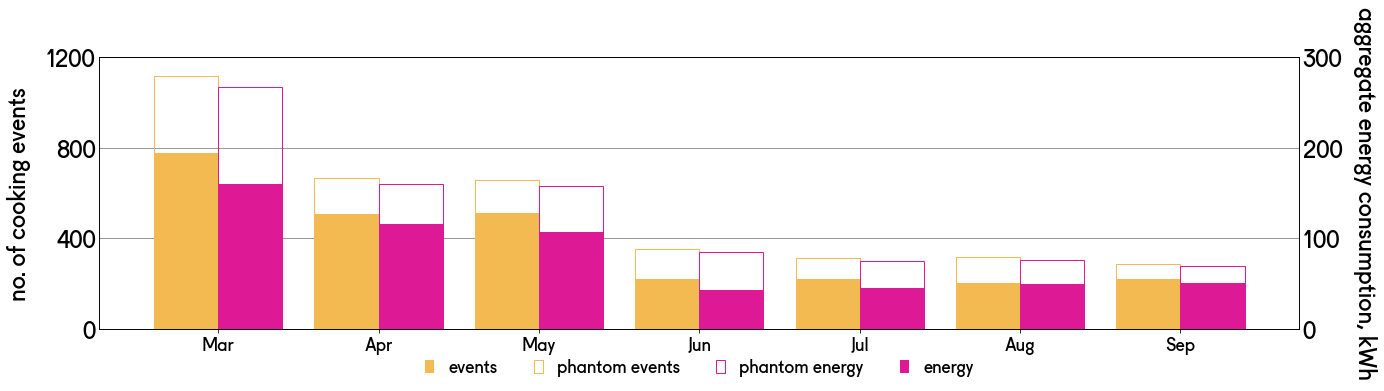

In [2689]:
plt.rcParams['figure.figsize'] = [21.5, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
months = {3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
norm_month_time = {3:0.7096774193548387,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:0.5,12:1}
df_month_statistics_plot['months'] = df_month_statistics_plot.month.map(months)
df_month_statistics_plot['norm_month_time'] = df_month_statistics_plot.month.map(norm_month_time)
df_month_statistics_plot['norm_cooking_session'] = df_month_statistics_plot['cooking_session']/df_month_statistics_plot['norm_month_time']
df_month_statistics_plot['norm_energy'] = df_month_statistics_plot['energy_gen']/df_month_statistics_plot['norm_month_time']
df_month_statistics_plot['norm_not_captured_energy'] = df_month_statistics_plot['change_meter_count']/df_month_statistics_plot['norm_month_time']
df_month_statistics_plot['norm_total_session'] = df_month_statistics_plot['total_session']/df_month_statistics_plot['norm_month_time']

#df_month_statistics_plot.drop(7, axis=0,inplace=True)
#df_month_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,1200)
ax2.set_ylim(-0.0,300)
#ax1.set_xlim([dt.date(2020, 3, 3), dt.date(2020, 12, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.4)
ax1.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_total_session'], color='none', label='phantom events', zorder=2.51, linewidth=1, edgecolor='#F4BA52', align='edge',width=-0.4,alpha=1)

ax2.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_not_captured_energy'], color='none', label='phantom energy', zorder=2.52, linewidth=1, edgecolor='#DE1995', align='edge',width=0.4,alpha=1)
ax2.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_energy'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none',align='edge',width=0.4)

#ax2.plot(df_month_statistics_plot['months'], df_month_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('aggregate energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(400))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(400))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(100))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4, frameon=False)

plt.savefig('visuals/phantom_TZcooking_wo_tariff.png', dpi=200)
plt.show()

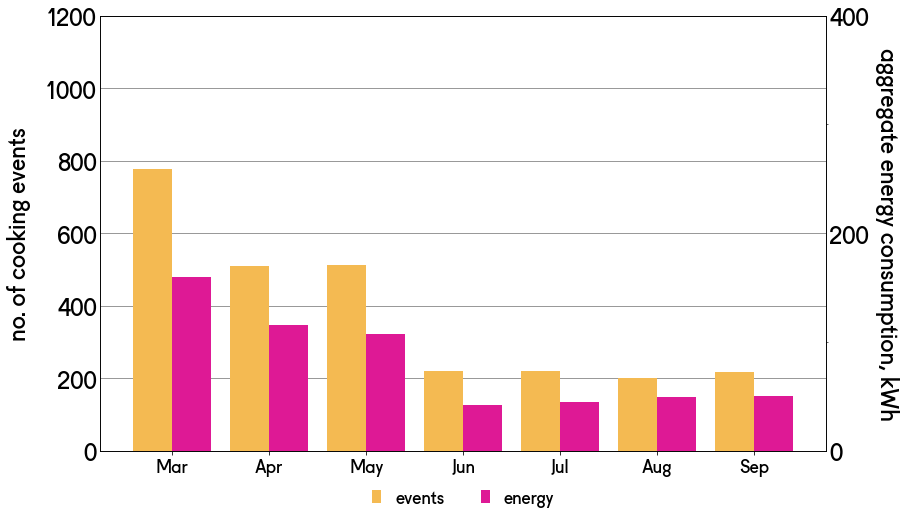

In [2373]:
plt.rcParams['figure.figsize'] = [13, 8]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
months = {3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
norm_month_time = {3:0.7096774193548387,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:0.5,12:1}
df_month_statistics_plot['months'] = df_month_statistics_plot.month.map(months)
df_month_statistics_plot['norm_month_time'] = df_month_statistics_plot.month.map(norm_month_time)
df_month_statistics_plot['norm_cooking_session'] = df_month_statistics_plot['cooking_session']/df_month_statistics_plot['norm_month_time']
df_month_statistics_plot['norm_energy'] = df_month_statistics_plot['energy_gen']/df_month_statistics_plot['norm_month_time']
df_month_statistics_plot['norm_not_captured_energy'] = df_month_statistics_plot['change_meter_count']/df_month_statistics_plot['norm_month_time']
df_month_statistics_plot['norm_total_session'] = df_month_statistics_plot['total_session']/df_month_statistics_plot['norm_month_time']

df_month_statistics_plot.drop(7, axis=0,inplace=True)
df_month_statistics_plot.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,1200)
ax2.set_ylim(-0.0,400)
#ax1.set_xlim([dt.date(2020, 3, 3), dt.date(2020, 12, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_cooking_session'], color='#F4BA52', label='events', zorder=2.52, linewidth=0, edgecolor='none', align='edge',width=-0.4)
#ax1.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_total_session'], color='#F4BA52', label='phantom events', zorder=2.51, linewidth=0, edgecolor='none', align='edge',width=-0.4,alpha=0.7)

#ax2.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_not_captured_energy'], color='#DE1995', alpha = 0.7, label='phantom energy', zorder=2.52, align='edge', linewidth=0, edgecolor='none',width=0.4)
ax2.bar(df_month_statistics_plot['months'], df_month_statistics_plot['norm_energy'], color='#DE1995', label='energy', zorder=2.53, linewidth=0, edgecolor='none', align='edge',width=0.4)

#ax2.plot(df_month_statistics_plot['months'], df_month_statistics_plot['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.54)
ax2.set_ylabel('aggregate energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1000))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(100))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/TZcooking_before_tariff.png', dpi=200)
plt.show()

In [2040]:
df_month_statistics_full.meter_number.nunique()

99

In [2026]:
df_month_statistics_2

energy_gen
meter_number month            
546281       3            2.22
             4            1.59
             5            1.35
             6            0.56
             7            2.58
...                        ...
546377       10           1.76
             11           5.03
546379       3            0.62
546380       3            0.46
             4            2.69

[391 rows x 1 columns]

In [2027]:
df_test = df_month_statistics.copy()
df_test.reset_index(inplace=True)
df_test.meter_number.nunique()

99

In [2014]:
df_month = all_meter_bar_chart('all', 'month', 0, 0)

In [2015]:
df_month

timestamp     site  energy_gen  cooking_session  cooking_cost  \
0           3     Bezi       26.34              138       52680.0   
1           3  Kalenge        7.67               34       15340.0   
2           3   Mavota       17.78               83       35560.0   
3           3    Nemba        7.64               38       15280.0   
4           3    Sozia        4.83               21        9660.0   
5           3     Yozu       13.89               61       27780.0   
6           4     Bezi       44.46              179       88920.0   
7           4  Kalenge        7.20               36       14400.0   
8           4   Mavota       12.67               62       25340.0   
9           4    Nemba        2.38               14        4760.0   
10          4    Sozia        2.00                7        4000.0   
11          4     Yozu       10.98               57       21960.0   
12          5     Yozu        1.65               10        3300.0   
13          5    Sozia        2.11                6        4220.0   
14          5    Nemba        1.96               12        3920.0   
15          5  Kalenge        8.73               44       17460.0   
16          5     Bezi       66.27              295      132540.0   
17          5   Mavota       15.58               84       31160.0   
18          6     Bezi       14.96               82       29920.0   
19          6  Kalenge        7.00               31       14000.0   
20          6   Mavota        8.10               43       16200.0   
21          6    Nemba        2.01               10        4020.0   
22          6    Sozia        6.35               24       12700.0   
23          6     Yozu        3.61               31        7220.0   
24          7    Sozia        5.35               20       10700.0   
25          7     Yozu        4.65               26        9300.0   
26          7    Nemba        0.30                1         600.0   
27          7   Mavota        5.51               33       11020.0   
28          7  Kalenge        2.74               14        5480.0   
29          7     Bezi       24.93              120       49860.0   
30          8     Bezi       27.43               92       54860.0   
31          8  Kalenge        4.19               25        8380.0   
32          8   Mavota        7.32               34       14640.0   
33          8    Nemba        2.58                8        5160.0   
34          8    Sozia        3.54               14        7080.0   
35          8     Yozu        7.09               29       14180.0   
36          9     Yozu        0.19                1         380.0   
37          9    Nemba        0.88                4        1760.0   
38          9    Sozia        8.08               45       16160.0   
39          9  Kalenge        3.33               13        6660.0   
40          9     Bezi       35.80              141       71600.0   
41          9   Mavota        2.40               14        4800.0   
42         10     Bezi       50.99              186      101980.0   
43         10  Kalenge       39.30              158       78600.0   
44         10   Mavota      125.96              449      251920.0   
45         10    Nemba        1.30               10        2600.0   
46         10    Sozia        4.84               20        9680.0   
47         10     Yozu        3.11               24        6220.0   
48         11    Sozia       28.24               76       56480.0   
49         11     Bezi       35.64              115       71280.0   
50         11  Kalenge       18.13               77       36260.0   
51         11   Mavota       87.79              287      175580.0   
52         11    Nemba        0.98                7        1960.0   
53         11     Yozu        1.98                9        3960.0   

    cooking_time  meter_number  
0         4255.0            26  
1         1665.0             4  
2         2490.0            16  
3         1335.0             7  
4         1155.0             3  
5         

In [2008]:
from pandas.tseries.offsets import MonthBegin

In [2010]:
pd.to_datetime('202003', format="%Y%m") + MonthBegin(1)

Timestamp('2020-04-01 00:00:00')

In [1957]:
all_meter_bar_chart('all', 'time', 0, 0)

timestamp  energy_gen  cooking_session  cooking_cost  cooking_time  \
0   2020-10-23        3.85               14        7700.0         572.0   
1   2020-10-24        2.48                8        4960.0         381.0   
2   2020-10-25        0.69                3        1380.0         153.0   
3   2020-10-26        0.31                2         620.0          15.0   
4   2020-10-27        1.51                8        3020.0         259.0   
5   2020-10-28        1.78                7        3560.0         286.0   
6   2020-10-29        0.11                1         220.0          30.0   
7   2020-10-30        1.79                9        3580.0         261.0   
8   2020-10-31        0.52                1        1040.0         113.0   
9   2020-11-01        1.17                2        2340.0         128.0   
10  2020-11-02        2.79                9        5580.0         501.0   
11  2020-11-03        0.52                2        1040.0         121.0   
12  2020-11-04        1.34                5        2680.0         263.0   
13  2020-11-05        2.66                9        5320.0         547.0   
14  2020-11-06        1.57                6        3140.0         261.0   
15  2020-11-07        1.73                6        3460.0         264.0   
16  2020-11-08        1.13                5        2260.0         181.0   
17  2020-11-09        1.84               11        3680.0         217.0   
18  2020-11-10        2.65               11        5300.0         280.0   
19  2020-11-11        1.33                5        2660.0         154.0   
20  2020-11-12        1.12                5        2240.0         175.0   
21  2020-11-13        1.96                7        3920.0         304.0   
22  2020-11-14        2.52                8        5040.0         503.0   
23  2020-11-15        1.03                3        2060.0         118.0   
24  2020-11-16        1.16                5        2320.0         234.0   
25  2020-11-17        1.65                5        3300.0         179.0   
26  2020-11-18        1.43                6        2860.0         266.0   
27  2020-11-19        3.40                9        6800.0         500.0   
28  2020-11-20        3.23               12        6460.0         734.0   
29  2020-11-21        1.41                5        2820.0         291.0   
30  2020-11-22        1.83                7        3660.0         190.0   
31  2020-11-23        1.60                6        3200.0         325.0   
32  2020-11-24        0.59                3        1180.0          60.0   
33  2020-11-25        1.40                6        2800.0         298.0   
34  2020-11-26        0.62                2        1240.0          82.0   
35  2020-11-27        2.23               10        4460.0         504.0   
36  2020-11-28        1.54                7        3080.0         312.0   
37  2020-11-29        2.10                5        4200.0         277.0   
38  2020-11-30        2.29                6        4580.0         489.0   
39  2020-12-01        0.24                1         480.0         115.0   
40  2020-12-02        3.16               11        6320.0         794.0   
41  2020-12-03        1.32                6        2640.0         226.0   
42  2020-12-04        1.94                8        3880.0         419.0   
43  2020-12-05        1.17                4        2340.0         129.0   
44  2020-12-06        0.72                3        1440.0          86.0   
45  2020-12-07        0.60                2        1200.0         119.0   
46  2020-12-08        1.17                4        2340.0         153.0   

    meter_number  
0             10  
1              5  
2              2  
3              2  
4              5  
5              4  
6              1  
7              5  
8              1  
9              2  
10             4  
11             2  
12             3  
13             7  
14             2  
15             5  
16             3  
17             4  
18             5  
19             3  
20   

In [ ]:
plt.rcParams['figure.figsize'] = [9, 8]

plt.rc('xtick', labelsize=14.5)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('all','time', 0, 0)
df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum', 'meter_number':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.1,10)
ax2.set_ylim(-0.1,20)
ax1.set_xlim([dt.date(2020, 10, 23), dt.date(2020, 12, 10)])

ax1.grid(True, which='both', color='whitesmoke')
ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['energy_gen'], color='#F4BA52', label='energy', zorder=2.52)

ax2.plot(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.53)
ax2.set_ylabel('no. of households', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25)
ax1.set_ylabel('aggregate energy consumption, kWh', fontstyle='normal', fontweight='bold')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=20)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/TZcookingpilotall_energy.png', dpi=200)
plt.show()

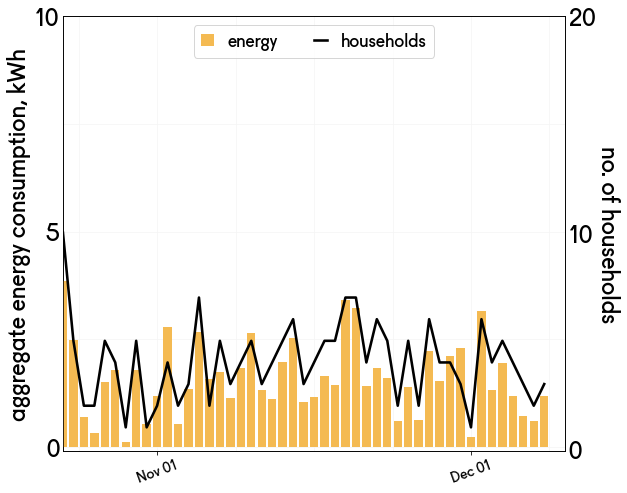

In [1965]:
plt.rcParams['figure.figsize'] = [9, 8]

plt.rc('xtick', labelsize=14.5)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('time', 0, 0)
df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum', 'meter_number':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.1,20)
ax2.set_ylim(-0.1,60)
ax1.set_xlim([dt.date(2020, 3, 3), dt.date(2020, 12, 1)])

ax1.grid(True, which='both', color='whitesmoke')
ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['energy_gen'], color='#F4BA52', label='energy', zorder=2.52)

ax2.plot(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.53)
ax2.set_ylabel('no. of households', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25)
ax1.set_ylabel('aggregate energy consumption, kWh', fontstyle='normal', fontweight='bold')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=5)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=20)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/TZcookingpilotall_energy.png', dpi=200)
plt.show()

In [1000]:
df_epc100_grouped_statistics = all_meter_bar_chart('time', 0, 0)
df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
df_epc100_grouped_statistics

timestamp    site  energy_gen  cooking_session  cooking_cost  \
0   2020-03-05   Sozia        0.79                3        1580.0   
1   2020-03-05    Yozu        3.29                9        6580.0   
2   2020-03-06   Sozia        0.31                1         620.0   
3   2020-03-06    Yozu        0.85                4        1700.0   
4   2020-03-07    Yozu        0.79                3        1580.0   
..         ...     ...         ...              ...           ...   
966 2020-12-01  Mavota        0.96                4        1920.0   
967 2020-12-01    Bezi        7.13               12       14260.0   
968 2020-12-01   Sozia        1.32                5        2640.0   
969 2020-12-02    Bezi        3.07                4        6140.0   
970 2020-12-02   Sozia        0.30                2         600.0   

     cooking_time  meter_number  
0            90.0             1  
1           485.0             4  
2            25.0             1  
3            75.0             2  
4            85.0             3  
..            ...           ...  
966         170.0             2  
967         985.0             4  
968         210.0             2  
969         265.0             3  
970          80.0             1  

[971 rows x 7 columns]

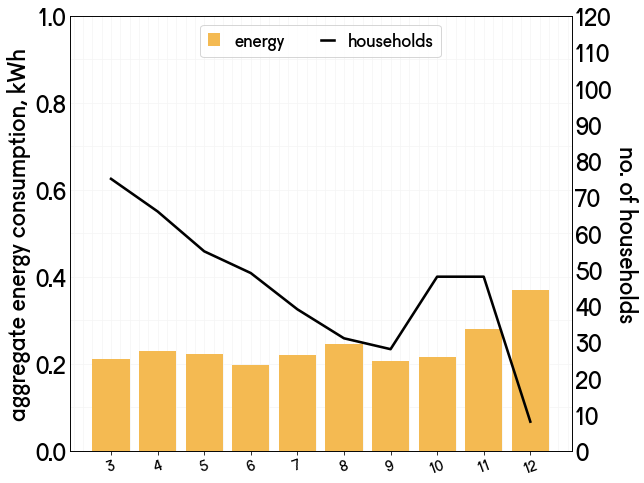

In [1009]:
plt.rcParams['figure.figsize'] = [9, 8]

plt.rc('xtick', labelsize=14.5)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('month', 0, 0)
#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'mean','cooking_session':'sum', 'meter_number':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,1)
ax2.set_ylim(-0.0,120)
#ax1.set_xlim([dt.date(2020, 3, 3), dt.date(2020, 12, 1)])

ax1.grid(True, which='both', color='whitesmoke')
ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['energy_gen'], color='#F4BA52', label='energy', zorder=2.52)

ax2.plot(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.53)
ax2.set_ylabel('no. of households', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25)
ax1.set_ylabel('aggregate energy consumption, kWh', fontstyle='normal', fontweight='bold')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=20)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/TZcookingpilotall_energy_month.png', dpi=200)
plt.show()

In [2770]:
df_epc100_grouped_statistics = all_meter_bar_chart('whole', 'month', 0, 0)

In [2790]:
months = {3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
norm_month_time = {3:0.7096774193548387,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:0.5,12:1}
df_epc100_grouped_statistics['months'] = df_epc100_grouped_statistics.timestamp.map(months)
df_epc100_grouped_statistics['norm_month_time'] = df_epc100_grouped_statistics.timestamp.map(norm_month_time)
df_epc100_grouped_statistics['norm_cooking_session'] = df_epc100_grouped_statistics['cooking_session']/df_epc100_grouped_statistics['norm_month_time']

In [2791]:
df_epc100_grouped_statistics

timestamp  energy_gen  cooking_session  meter_number  energy months  \
0          3   18.930000              551            76   14.58    Mar   
1          4   19.328333              509            66   28.58    Apr   
2          5   17.890000              512            55   36.72    May   
3          6    7.066667              219            49   42.14    Jun   
4          7    7.438333              219            39   47.15    Jul   
5          8    8.175000              201            31   66.17    Aug   
6          9    8.438333              218            28   96.71    Sep   

   norm_month_time  norm_cooking_session  norm_total_sessions  
0         0.709677            776.409091            74.448597  
1         1.000000            509.000000           103.567193  
2         1.000000            512.000000           133.064637  
3         1.000000            219.000000           152.705441  
4         1.000000            219.000000           170.860502  
5         1.000000            201.000000           239.784505  
6         1.000000            218.000000           350.454277

In [2775]:
df_epc100_grouped_statistics.drop(7, axis=0,inplace=True)
df_epc100_grouped_statistics.drop(8, axis=0,inplace=True)

KeyError: '[7] not found in axis'

In [2792]:
df_epc100_grouped_statistics

timestamp  energy_gen  cooking_session  meter_number  energy months  \
0          3   18.930000              551            76   14.58    Mar   
1          4   19.328333              509            66   28.58    Apr   
2          5   17.890000              512            55   36.72    May   
3          6    7.066667              219            49   42.14    Jun   
4          7    7.438333              219            39   47.15    Jul   
5          8    8.175000              201            31   66.17    Aug   
6          9    8.438333              218            28   96.71    Sep   

   norm_month_time  norm_cooking_session  norm_total_sessions  
0         0.709677            776.409091            74.448597  
1         1.000000            509.000000           103.567193  
2         1.000000            512.000000           133.064637  
3         1.000000            219.000000           152.705441  
4         1.000000            219.000000           170.860502  
5         1.000000            201.000000           239.784505  
6         1.000000            218.000000           350.454277

In [2772]:
df_epc100_grouped_statistics.groupby('timestamp').agg({'cooking_session':'sum','norm_cooking_session':'sum','energy_gen':'sum','meter_number':'sum'})

cooking_session  norm_cooking_session  energy_gen  meter_number
timestamp                                                                 
3                      551            776.409091      113.58            76
4                      509            509.000000      115.97            66
5                      512            512.000000      107.34            55
6                      219            219.000000       42.40            49
7                      219            219.000000       44.63            39
8                      201            201.000000       49.05            31
9                      218            218.000000       50.63            28
10                     848            848.000000      225.76            48
11                     571           1142.000000      172.71            47

In [1780]:
1.579328*2

3.158656

In [1797]:
113.58/((31-9)/31)

160.04454545454544

In [1798]:
172.71*2

345.42

In [1647]:
(31-9)/31

0.7096774193548387

In [1648]:
(30-15)/30

0.5

In [1646]:
219/((31-9)/31)

308.59090909090907

In [ ]:
df_epc100_grouped_statistics

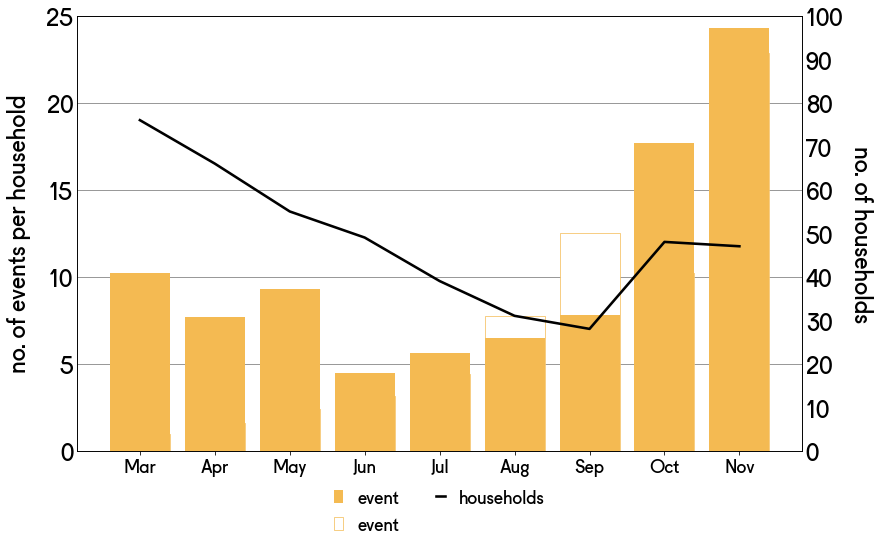

In [2793]:
#YYY
plt.rcParams['figure.figsize'] = [13, 8]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart(df_whole_grouped, 'month', 0, 0)
#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'mean','cooking_session':'sum', 'meter_number':'sum','energy':'max'})
df_epc100_grouped_statistics.reset_index(inplace=True)
months = {3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
norm_month_time = {3:0.7096774193548387,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:0.5,12:1}
df_epc100_grouped_statistics['months'] = df_epc100_grouped_statistics.timestamp.map(months)
df_epc100_grouped_statistics['norm_month_time'] = df_epc100_grouped_statistics.timestamp.map(norm_month_time)
df_epc100_grouped_statistics['norm_cooking_session'] = df_epc100_grouped_statistics['cooking_session']/df_epc100_grouped_statistics['norm_month_time']
df_epc100_grouped_statistics['norm_total_sessions'] = (df_epc100_grouped_statistics['energy']/average_cooking_event)/df_epc100_grouped_statistics['norm_month_time']

#df_epc100_grouped_statistics.drop(7, axis=0,inplace=True)
#df_epc100_grouped_statistics.drop(8, axis=0,inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,25)
ax2.set_ylim(-0.0,100)
#ax1.set_xlim([dt.date(2020, 3, 3), dt.date(2020, 12, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['months'], df_epc100_grouped_statistics['norm_cooking_session']/df_epc100_grouped_statistics['meter_number'], color='#F4BA52', label='event', zorder=2.52)
ax1.bar(df_epc100_grouped_statistics['months'], df_epc100_grouped_statistics['norm_total_sessions']/df_epc100_grouped_statistics['meter_number'], linewidth=0.7, edgecolor='#F4BA52', color='white',label='event', zorder=2.51)

ax2.plot(df_epc100_grouped_statistics['months'], df_epc100_grouped_statistics['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.53)
ax2.set_ylabel('no. of households', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of events per household', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/TZcookingpilotall_energy_month_before_tariff.png', dpi=200)
plt.show()

In [2794]:
df_epc100_grouped_statistics

timestamp  energy_gen  cooking_session  meter_number  energy months  \
0          3   18.930000              551            76   14.58    Mar   
1          4   19.328333              509            66   28.58    Apr   
2          5   17.890000              512            55   36.72    May   
3          6    7.066667              219            49   42.14    Jun   
4          7    7.438333              219            39   47.15    Jul   
5          8    8.175000              201            31   66.17    Aug   
6          9    8.438333              218            28   96.71    Sep   
7         10   37.626667              848            48  135.62    Oct   
8         11   28.785000              571            47  148.35    Nov   

   norm_month_time  norm_cooking_session  norm_total_sessions  
0         0.709677            776.409091            74.448597  
1         1.000000            509.000000           103.567193  
2         1.000000            512.000000           133.064637  
3         1.000000            219.000000           152.705441  
4         1.000000            219.000000           170.860502  
5         1.000000            201.000000           239.784505  
6         1.000000            218.000000           350.454277  
7         1.000000            848.000000           491.454959  
8         0.500000           1142.000000          1075.170964

In [2213]:
df_epc100_grouped_statistics = df_whole_grouped

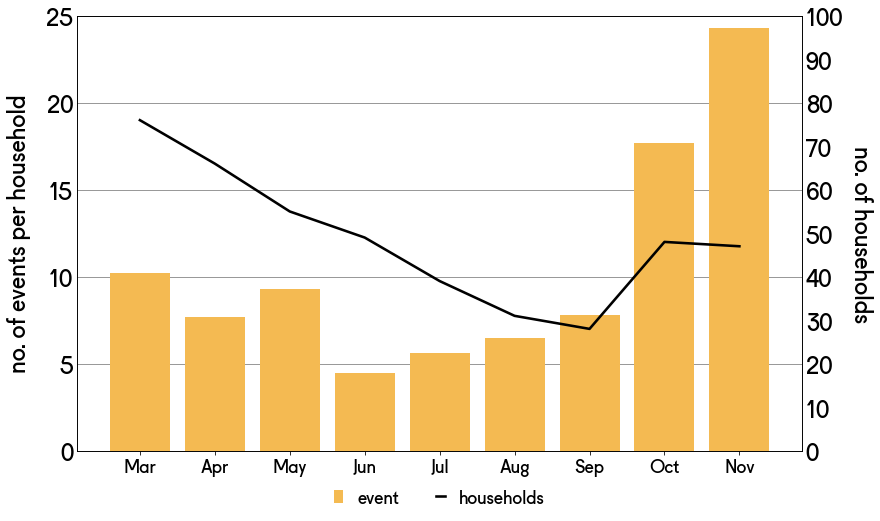

In [1661]:
plt.rcParams['figure.figsize'] = [13, 8]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart(df_whole_grouped, 'month', 0, 0)
#df_epc100_grouped_statistics['timestamp'] = pd.to_datetime(df_epc100_grouped_statistics['timestamp'], errors='coerce')
df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'mean','cooking_session':'sum', 'meter_number':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)
months = {3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
norm_month_time = {3:0.7096774193548387,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:0.5,12:1}
df_epc100_grouped_statistics['months'] = df_epc100_grouped_statistics.timestamp.map(months)
df_epc100_grouped_statistics['norm_month_time'] = df_epc100_grouped_statistics.timestamp.map(norm_month_time)
df_epc100_grouped_statistics['norm_cooking_session'] = df_epc100_grouped_statistics['cooking_session']/df_epc100_grouped_statistics['norm_month_time']


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.0,25)
ax2.set_ylim(-0.0,100)
#ax1.set_xlim([dt.date(2020, 3, 3), dt.date(2020, 12, 1)])

ax1.grid(True, axis='y', color='gray')
ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['months'], df_epc100_grouped_statistics['norm_cooking_session']/df_epc100_grouped_statistics['meter_number'], color='#F4BA52', label='event', zorder=2.52)

ax2.plot(df_epc100_grouped_statistics['months'], df_epc100_grouped_statistics['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.53)
ax2.set_ylabel('no. of households', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=30)
ax1.set_ylabel('no. of events per household', fontstyle='normal', fontweight='bold', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

plt.savefig('visuals/TZcookingpilotall_energy_month.png', dpi=200)
plt.show()

In [2214]:
df_epc100_grouped.session_index.nunique()

4016

In [2215]:
df_epc100_grouped_statistics = all_meter_bar_chart('whole','time', 0,0)
df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum', 'meter_number':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)
df_epc100_grouped_statistics

timestamp  energy_gen  cooking_session  meter_number
0    2020-03-09        2.27                7             5
1    2020-03-10        2.28               11            10
2    2020-03-11        3.39               20            13
3    2020-03-12        5.37               31            16
4    2020-03-13        4.58               24            15
..          ...         ...              ...           ...
245  2020-11-10       14.75               40            19
246  2020-11-11       14.65               49            23
247  2020-11-12       12.60               38            20
248  2020-11-13       14.42               41            16
249  2020-11-14       17.11               46            24

[250 rows x 4 columns]

In [2216]:
df_epc100

id  meter_number timezone            region  \
timestamp                                                           
2020-03-10 21:50:00  311        546281      UTC  TZ cooking pilot   
2020-03-10 21:55:00  311        546281      UTC  TZ cooking pilot   
2020-03-10 22:00:00  311        546281      UTC  TZ cooking pilot   
2020-03-10 23:05:00  311        546281      UTC  TZ cooking pilot   
2020-03-11 08:50:00  311        546281      UTC  TZ cooking pilot   
...                  ...           ...      ...               ...   
2020-11-19 08:30:00  219        546380      UTC  TZ cooking pilot   
2020-11-19 08:35:00  219        546380      UTC  TZ cooking pilot   
2020-11-19 08:40:00  219        546380      UTC  TZ cooking pilot   
2020-11-19 08:45:00  219        546380      UTC  TZ cooking pilot   
2020-11-19 08:50:00  219        546380      UTC  TZ cooking pilot   

                     fetch_index  energy  voltage  current     power  \
timestamp                                                              
2020-03-10 21:50:00           97    0.00   229.90   0.0000  0.000000   
2020-03-10 21:55:00           97    0.07   228.20   4.3010  0.981488   
2020-03-10 22:00:00           97    0.14   227.80   4.3090  0.981590   
2020-03-10 23:05:00           97    0.21   229.90   0.0000  0.000000   
2020-03-11 08:50:00           97    0.26   228.85   2.1535  0.492828   
...                          ...     ...      ...      ...       ...   
2020-11-19 08:30:00            5    5.00   229.90   0.0280  0.006437   
2020-11-19 08:35:00            5    5.00   221.10   0.0280  0.006191   
2020-11-19 08:40:00            5    5.00   220.10   0.0310  0.006823   
2020-11-19 08:45:00            5    5.00   220.20   0.0280  0.006166   
2020-11-19 08:50:00            5    5.00   220.20   0.0290  0.006386   

                     power_factor  ...  load_added_count     time_load_added  \
timestamp                          ...                                         
2020-03-10 21:50:00        1.0000  ...                 0 2020-03-10 21:50:00   
2020-03-10 21:55:00        0.9990  ...                 1 2020-03-10 21:55:00   
2020-03-10 22:00:00        0.9980  ...                 2 2020-03-10 22:00:00   
2020-03-10 23:05:00        1.0000  ...                 3 2020-03-10 23:05:00   
2020-03-11 08:50:00        0.9995  ...                 4 2020-03-11 08:50:00   
...                           ...  ...               ...                 ...   
2020-11-19 08:30:00        0.8280  ...             27805 2020-11-18 19:30:00   
2020-11-19 08:35:00        0.8260  ...             27805 2020-11-18 19:30:00   
2020-11-19 08:40:00        0.8380  ...             27805 2020-11-18 19:30:00   
2020-11-19 08:45:00        0.8570  ...             27805 2020-11-18 19:30:00   
2020-11-19 08:50:00        0.8250  ...             27805 2020-11-18 19:30:00   

                     cooking_session          time_start            time_end  \
timestamp                                                                      
2020-03-10 21:50:00              1.0 2020-03-10 21:50:00 2020-03-10 22:00:00   
2020-03-10 21:55:00              1.0 2020-03-10 21:50:00 2020-03-10 22:00:00   
2020-03-10 22:00:00              1.0 2020-03-10 21:50:00 2020-03-10 22:00:00   
2020-03-10 23:05:00              NaN 2020-03-10 23:05:00 2020-03-10 23:05:00   
2020-03-11 08:50:00              3.0 2020-03-11 08:50:00 2020-03-11 09:55:00   
...                              ...                 ...                 ...   
2020-11-19 08:30:00           5641.0 2020-11-18 19:30:00 2020-11-19 08:50:00   
2020-11-19 08:35:00           5641.0 2020-11-18 19:30:00 2020-11-19 08:50:00   
2020-11-19 08:40:00           5641.0 2020-11-18 19:30:00 2020-11-19 08:50:00   
2020-11-19 08:45:00           5641.0 2020-11-18 19:30:00 2020-11-19 08:50:00   
2020-11-19 08:50:00           5641.0 2020-11-18 19:30:00 2020-11-19 08:50:00   

                    cooking_time seq_time  missing_data timestamp_issue  \
timestamp                     

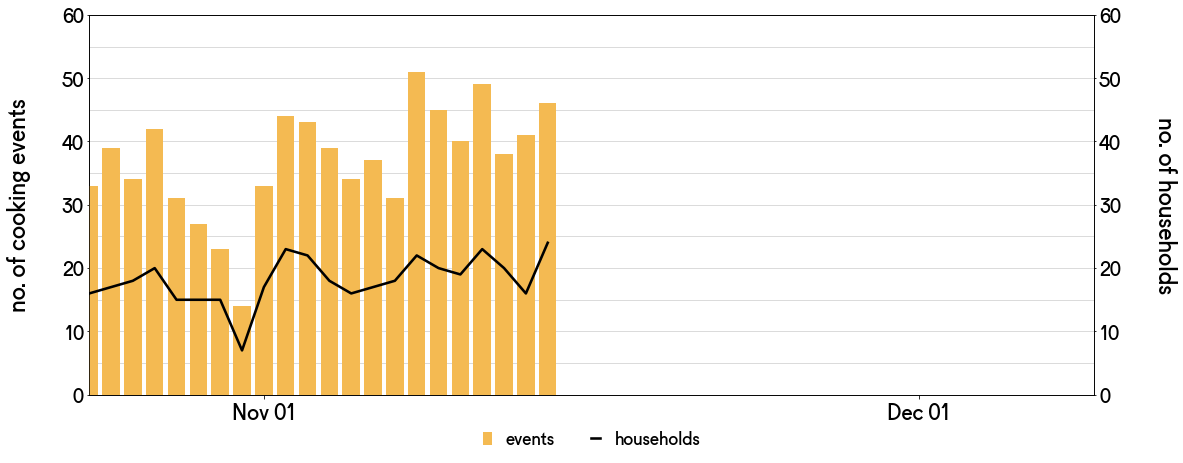

In [2057]:
plt.rcParams['figure.figsize'] = [18, 7]

plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('whole', 'time', 0,0)
df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum', 'meter_number':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)
#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.1,60)
ax2.set_ylim(-0.1,60)
ax1.set_xlim([dt.date(2020, 10, 24), dt.date(2020, 12, 9)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['cooking_session'], color='#F4BA52', label='events', zorder=2.52)

ax2.plot(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['meter_number'], color='black', linewidth=2.58, label='households', zorder=2.53)
ax2.set_ylabel('no. of households', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=55)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=30)

ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=2)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/TZcookingpilotall.png', dpi=200)
plt.show()

In [1714]:
df_epc100_grouped_statistics = all_meter_bar_chart(df_honeymoon, 'time', 0,0)
df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum', 'meter_number':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)
df_epc100_grouped_statistics.sort_values(by='cooking_session', inplace=True)
df_epc100_grouped_statistics.reset_index(inplace=True)
df_epc100_grouped_statistics.reset_index(inplace=True)
df_epc100_grouped_statistics['quantiles'] = pd.qcut(df_epc100_grouped_statistics.cooking_session, 4, labels=None)

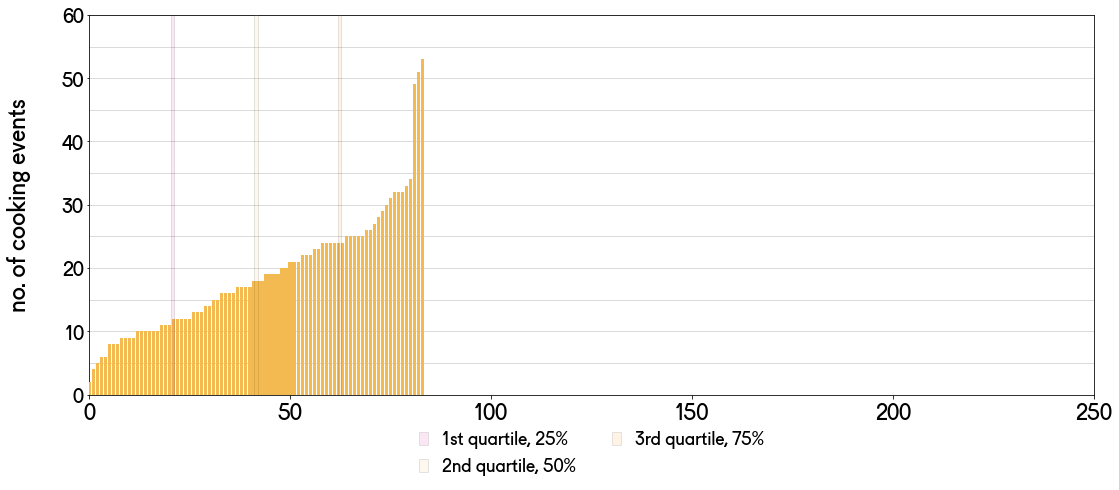

In [1800]:
plt.rcParams['figure.figsize'] = [18, 7]

plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('honeymoon', 'time', 0,0)
df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum', 'meter_number':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)
df_epc100_grouped_statistics.sort_values(by='cooking_session', inplace=True)
df_epc100_grouped_statistics.reset_index(inplace=True)
df_epc100_grouped_statistics.reset_index(inplace=True)
df_epc100_grouped_statistics['quantiles'] = pd.qcut(df_epc100_grouped_statistics.cooking_session, 4, labels=None)
#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.set_ylim(-0.1,60)
#ax2.set_ylim(-0.1,60)
ax1.set_xlim(0, 250)

ax1.grid(axis='y', which='both', color='lightgray')
#ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['level_0'], df_epc100_grouped_statistics['cooking_session'], color='#F4BA52', label=None, zorder=2.52)

ax1.bar(df_epc100_grouped_statistics.level_0.quantile(.25), 225, color='#DE1995', alpha = 0.1, label='1st quartile, 25%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_epc100_grouped_statistics.level_0.quantile(.50), 225, color='#F4BA52', alpha = 0.1, label='2nd quartile, 50%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_epc100_grouped_statistics.level_0.quantile(.75), 225, color='darkorange', alpha = 0.1, label='3rd quartile, 75%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')


ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=30)

ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
#ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=2)
ax1.tick_params(which='minor', length=0)
#ax2.tick_params(axis='y',length=2)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_per_day_honeymoon.png', dpi=200)
plt.show()

In [1815]:
df_epc100_grouped_statistics['n_quantiles'] = pd.qcut(df_epc100_grouped_statistics.cooking_session, 4, labels=False)
df_epc100_grouped_statistics_3 = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['n_quantiles']==3]

In [1806]:
df_epc100_grouped_statistics_0.cooking_session.sum()

176

In [1812]:
df_epc100_grouped_statistics_1.cooking_session.sum()

343

In [1811]:
df_epc100_grouped_statistics_2.cooking_session.sum()

435

In [1816]:
df_epc100_grouped_statistics_3.cooking_session.sum()

638

In [1813]:
df_epc100_grouped_statistics.tail(60)

level_0  index   timestamp  energy_gen  cooking_session  meter_number  \
24       24     81  2020-05-29        1.47               12             6   
25       25     16  2020-03-25        2.27               12            10   
26       26     71  2020-05-19        2.11               13            12   
27       27     70  2020-05-18        2.07               13            10   
28       28     67  2020-05-15        2.33               13            10   
29       29     14  2020-03-23        2.52               14            12   
30       30     65  2020-05-13        3.11               14            10   
31       31     69  2020-05-17        3.63               15            12   
32       32     31  2020-04-09        4.22               15             7   
33       33     75  2020-05-23        2.78               16            10   
34       34     64  2020-05-12        3.24               16            14   
35       35     78  2020-05-26        2.47               16            12   
36       36     46  2020-04-24        3.40               16            13   
37       37     63  2020-05-11        3.00               17            13   
38       38     15  2020-03-24        2.95               17            12   
39       39     68  2020-05-16        3.23               17            11   
40       40     13  2020-03-22        3.26               17            13   
41       41     32  2020-04-10        4.06               18            10   
42       42     47  2020-04-25        4.55               18            14   
43       43     21  2020-03-30        4.68               18            11   
44       44      1  2020-03-10        3.74               19            17   
45       45     11  2020-03-20        3.84               19            14   
46       46     28  2020-04-06        4.35               19            10   
47       47     62  2020-05-10        3.30               19            12   
48       48     45  2020-04-23        4.83               20            13   
49       49     19  2020-03-28        4.35               20            15   
50       50     27  2020-04-05        4.89               21            12   
51       51     48  2020-04-26        5.16               21            11   
52       52     54  2020-05-02        5.42               21            12   
53       53     58  2020-05-06        4.20               22            14   
54       54     50  2020-04-28        6.32               22            16   
55       55     29  2020-04-07        4.18               22            14   
56       56     12  2020-03-21        5.46               23            17   
57       57     49  2020-04-27        7.22               23            13   
58       58     20  2020-03-29        5.16               24            19   
59       59     25  2020-04-03        4.86               24            12   
60       60      6  2020-03-15        5.07               24            20   
61       61     61  2020-05-09        6.07               24            16   
62       62     26  2020-04-04        4.89               24            14   
63       63      7  2020-03-16        4.77               24            17   
64       64     23  2020-04-01        7.19               25            13   
65       65     10  2020-03-19        4.86               25            18   
66       66     53  2020-05-01        5.76               25            16   
67       67      8  2020-03-17        4.09               25            17   
68       68     59  2020-05-07        5.49               25            14   
69       69     24  2020-04-02        4.87               26            14   
70       70     52  2020-04-30        6.18               26            16   
71       71     22  2020-03-31        6.56               27            11   
72       72     34  2020-04-12        5.61               28            16   
73       73     51  2020-04-29        7.19               29            17   
74       74     57  2020-05-05        6.49               30            18   


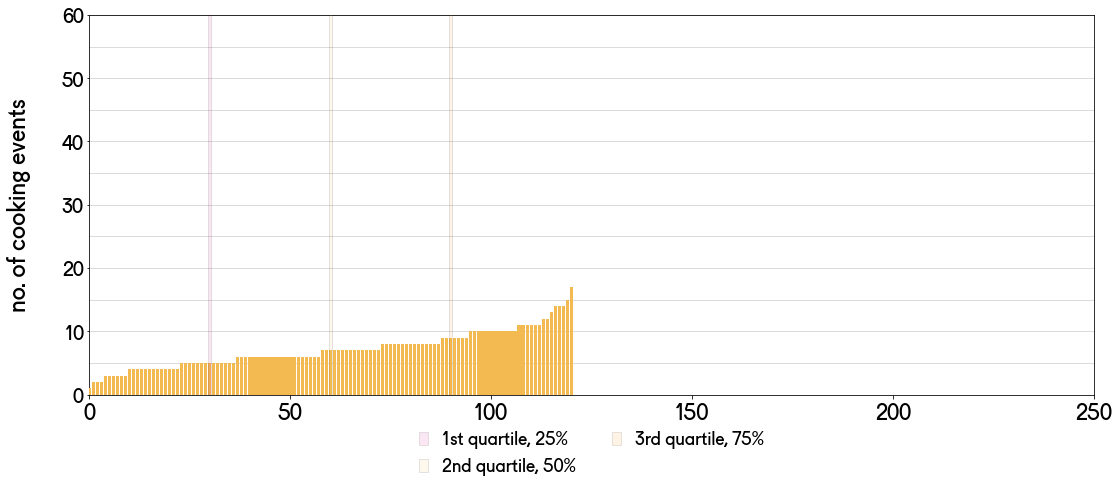

In [1817]:
plt.rcParams['figure.figsize'] = [18, 7]

plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('steady', 'time', 0,0)
df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum', 'meter_number':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)
df_epc100_grouped_statistics.sort_values(by='cooking_session', inplace=True)
df_epc100_grouped_statistics.reset_index(inplace=True)
df_epc100_grouped_statistics.reset_index(inplace=True)
df_epc100_grouped_statistics['quantiles'] = pd.qcut(df_epc100_grouped_statistics.cooking_session, 4, labels=None)
#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.set_ylim(-0.1,60)
#ax2.set_ylim(-0.1,60)
ax1.set_xlim(0, 250)

ax1.grid(axis='y', which='both', color='lightgray')
#ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['level_0'], df_epc100_grouped_statistics['cooking_session'], color='#F4BA52', label=None, zorder=2.52)

ax1.bar(df_epc100_grouped_statistics.level_0.quantile(.25), 225, color='#DE1995', alpha = 0.1, label='1st quartile, 25%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_epc100_grouped_statistics.level_0.quantile(.50), 225, color='#F4BA52', alpha = 0.1, label='2nd quartile, 50%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_epc100_grouped_statistics.level_0.quantile(.75), 225, color='darkorange', alpha = 0.1, label='3rd quartile, 75%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')


ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=30)

ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
#ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=2)
ax1.tick_params(which='minor', length=0)
#ax2.tick_params(axis='y',length=2)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_per_day_steady.png', dpi=200)
plt.show()

In [1818]:
df_epc100_grouped_statistics['n_quantiles'] = pd.qcut(df_epc100_grouped_statistics.cooking_session, 4, labels=False)
df_epc100_grouped_statistics_0 = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['n_quantiles']==0]
df_epc100_grouped_statistics_1 = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['n_quantiles']==1]
df_epc100_grouped_statistics_2 = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['n_quantiles']==2]
df_epc100_grouped_statistics_3 = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['n_quantiles']==3]

In [1871]:
df_epc100_grouped_statistics['n_quantiles'] = pd.qcut(df_epc100_grouped_statistics.cooking_session, 4, labels=False)
df_epc100_grouped_statistics_0 = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['n_quantiles']==0]
df_epc100_grouped_statistics_1 = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['n_quantiles']==1]
df_epc100_grouped_statistics_2 = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['n_quantiles']==2]
df_epc100_grouped_statistics_3 = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['n_quantiles']==3]
print(df_epc100_grouped_statistics_0.cooking_session.sum())
print(df_epc100_grouped_statistics_0.energy_gen.sum())
print(df_epc100_grouped_statistics_0.meter_number.sum())
print()
print(df_epc100_grouped_statistics_1.cooking_session.sum())
print(df_epc100_grouped_statistics_1.energy_gen.sum())
print(df_epc100_grouped_statistics_1.meter_number.sum())
print()
print(df_epc100_grouped_statistics_2.cooking_session.sum())
print(df_epc100_grouped_statistics_2.energy_gen.sum())
print(df_epc100_grouped_statistics_2.meter_number.sum())
print()
print(df_epc100_grouped_statistics_3.cooking_session.sum())
print(df_epc100_grouped_statistics_3.energy_gen.sum())
print(df_epc100_grouped_statistics_3.meter_number.sum())
df_epc100_grouped_statistics_0.head(1)

147
32.65000000000005
118

231
47.97999999999993
164

183
42.979999999999954
129

297
63.40999999999997
205


level_0  index   timestamp  energy_gen  cooking_session  meter_number  \
0        0     90  2020-08-31        0.17                1             1   

      quantiles  n_quantiles  
0  (0.999, 5.0]            0

In [1826]:
df_epc100_grouped_statistics_1.head(1)

level_0  index   timestamp  energy_gen  cooking_session  meter_number  \
37       37     96  2020-09-06        1.49                6             2   

     quantiles  n_quantiles  
37  (5.0, 7.0]            1

In [1827]:
df_epc100_grouped_statistics_2.head(1)

level_0  index   timestamp  energy_gen  cooking_session  meter_number  \
73       73     92  2020-09-02        3.14                8             5   

     quantiles  n_quantiles  
73  (7.0, 9.0]            2

In [1828]:
df_epc100_grouped_statistics_3.head(1)

level_0  index   timestamp  energy_gen  cooking_session  meter_number  \
95       95    111  2020-09-21        1.24               10             5   

      quantiles  n_quantiles  
95  (9.0, 17.0]            3

In [1762]:
df_epc100_grouped_statistics.tail(60)

level_0  index   timestamp  energy_gen  cooking_session  meter_number  \
61        61     73  2020-08-14        1.15                7             4   
62        62    120  2020-09-30        1.63                7             5   
63        63     49  2020-07-20        1.34                7             4   
64        64      4  2020-06-05        1.08                7             6   
65        65     56  2020-07-27        1.37                7             4   
66        66    119  2020-09-29        1.61                7             6   
67        67     52  2020-07-23        1.56                7             6   
68        68     11  2020-06-12        1.33                7             6   
69        69     51  2020-07-22        1.64                7             7   
70        70     25  2020-06-26        0.94                7             5   
71        71     47  2020-07-18        1.27                7             6   
72        72     45  2020-07-16        1.60                7             6   
73        73     92  2020-09-02        3.14                8             5   
74        74     93  2020-09-03        2.50                8             6   
75        75     95  2020-09-05        2.07                8             6   
76        76     91  2020-09-01        2.29                8             5   
77        77    101  2020-09-11        2.61                8             3   
78        78    107  2020-09-17        1.13                8             5   
79        79    110  2020-09-20        1.23                8             6   
80        80    113  2020-09-23        1.58                8             5   
81        81     19  2020-06-20        1.44                8             7   
82        82     85  2020-08-26        3.15                8             4   
83        83      0  2020-06-01        1.20                8             6   
84        84     79  2020-08-20        1.85                8             5   
85        85     43  2020-07-14        1.27                8             8   
86        86     40  2020-07-11        1.91                8             6   
87        87     34  2020-07-05        1.59                8             6   
88        88    112  2020-09-22        2.24                9             6   
89        89     22  2020-06-23        1.68                9             7   
90        90      7  2020-06-08        2.09                9             8   
91        91    114  2020-09-24        1.91                9             6   
92        92    109  2020-09-19        2.33                9             6   
93        93    104  2020-09-14        2.16                9             7   
94        94     54  2020-07-25        1.61                9             6   
95        95    111  2020-09-21        1.24               10             5   
96        96     67  2020-08-08        2.27               10             8   
97        97    108  2020-09-18        1.84               10             7   
98        98     68  2020-08-09        2.64               10             7   
99        99      1  2020-06-02        2.09               10             8   
100      100     70  2020-08-11        2.17               10             6   
101      101     58  2020-07-29        2.40               10             8   
102      102     81  2020-08-22        2.63               10             7   
103      103     17  2020-06-18        2.04               10             8   
104      104     94  2020-09-04        2.45               10             4   
105      105     80  2020-08-21        3.62               10             7   
106      106     32  2020-07-03        1.46               10             7   
107      107     16  2020-06-17        1.92               11             9   
108      108    105  2020-09-15        2.12               11             9   
109      109      6  2020-06-07        1.98               11             8   
110      110     20  2020-06-21        1.83               11             8   
111      111     33  2020-0

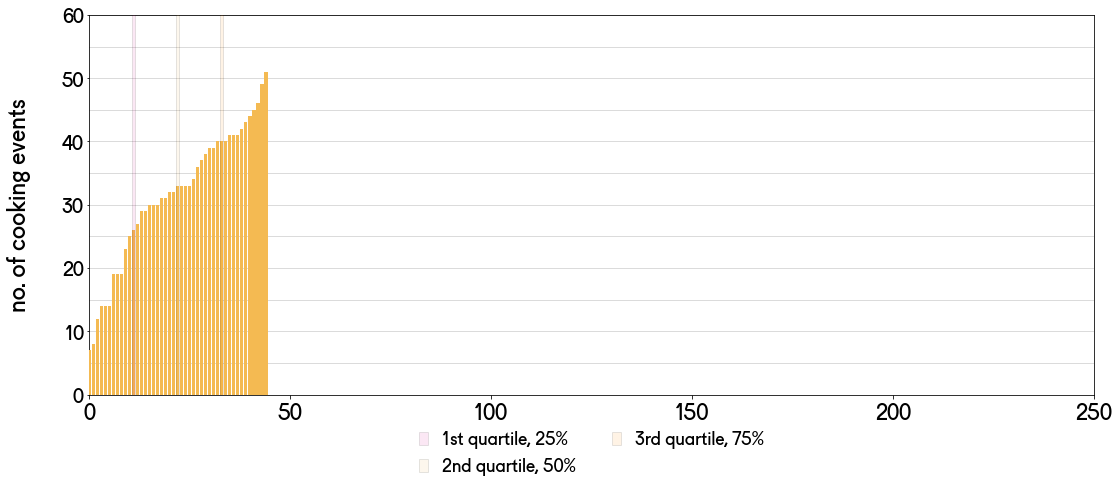

In [1872]:
plt.rcParams['figure.figsize'] = [18, 7]

plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('tariff', 'time', 0,0)
df_epc100_grouped_statistics = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum', 'meter_number':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)
df_epc100_grouped_statistics.sort_values(by='cooking_session', inplace=True)
df_epc100_grouped_statistics.reset_index(inplace=True)
df_epc100_grouped_statistics.reset_index(inplace=True)
df_epc100_grouped_statistics['quantiles'] = pd.qcut(df_epc100_grouped_statistics.cooking_session, 4, labels=None)
#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.set_ylim(-0.1,60)
#ax2.set_ylim(-0.1,60)
ax1.set_xlim(0, 250)

ax1.grid(axis='y', which='both', color='lightgray')
#ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['level_0'], df_epc100_grouped_statistics['cooking_session'], color='#F4BA52', label=None, zorder=2.52)

ax1.bar(df_epc100_grouped_statistics.level_0.quantile(.25), 225, color='#DE1995', alpha = 0.1, label='1st quartile, 25%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_epc100_grouped_statistics.level_0.quantile(.50), 225, color='#F4BA52', alpha = 0.1, label='2nd quartile, 50%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_epc100_grouped_statistics.level_0.quantile(.75), 225, color='darkorange', alpha = 0.1, label='3rd quartile, 75%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')


ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad=30)

ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
#ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=0)
ax1.tick_params(axis='y',length=2)
ax1.tick_params(which='minor', length=0)
#ax2.tick_params(axis='y',length=2)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.5, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_per_day_tariff.png', dpi=200)
plt.show()

In [1873]:
df_epc100_grouped_statistics['n_quantiles'] = pd.qcut(df_epc100_grouped_statistics.cooking_session, 4, labels=False)
df_epc100_grouped_statistics_0 = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['n_quantiles']==0]
df_epc100_grouped_statistics_1 = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['n_quantiles']==1]
df_epc100_grouped_statistics_2 = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['n_quantiles']==2]
df_epc100_grouped_statistics_3 = df_epc100_grouped_statistics.loc[df_epc100_grouped_statistics['n_quantiles']==3]
print(df_epc100_grouped_statistics_0.cooking_session.sum())
print(df_epc100_grouped_statistics_0.energy_gen.sum())
print(df_epc100_grouped_statistics_0.meter_number.sum())
print()
print(df_epc100_grouped_statistics_1.cooking_session.sum())
print(df_epc100_grouped_statistics_1.energy_gen.sum())
print(df_epc100_grouped_statistics_1.meter_number.sum())
print()
print(df_epc100_grouped_statistics_2.cooking_session.sum())
print(df_epc100_grouped_statistics_2.energy_gen.sum())
print(df_epc100_grouped_statistics_2.meter_number.sum())
print()
print(df_epc100_grouped_statistics_3.cooking_session.sum())
print(df_epc100_grouped_statistics_3.energy_gen.sum())
print(df_epc100_grouped_statistics_3.meter_number.sum())
df_epc100_grouped_statistics_0.head(1)

200
51.889999999999986
117

433
112.4699999999999
218

343
101.74000000000001
166

443
132.37
206


level_0  index   timestamp  energy_gen  cooking_session  meter_number  \
0        0      0  2020-10-01        2.67                7             5   

       quantiles  n_quantiles  
0  (6.999, 26.0]            0

level_0  index   timestamp  energy_gen  cooking_session  meter_number  \
0         0      0  2020-10-01        2.67                7             5   
1         1      1  2020-10-02        2.10                8             5   
2         2      3  2020-10-04        2.18               12             9   
3         3      2  2020-10-03        3.48               14             7   
4         4      4  2020-10-05        2.71               14             9   
5         5     30  2020-10-31        3.55               14             7   
6         6      5  2020-10-06        4.41               19            11   
7         7     10  2020-10-11        5.05               19            12   
8         8      9  2020-10-10        4.12               19             9   
9         9     29  2020-10-30        6.54               23            15   
10       10     22  2020-10-23        7.30               25            12   
11       11     21  2020-10-22        7.78               26            16   

        quantiles  n_quantiles  
0   (6.999, 26.0]            0  
1   (6.999, 26.0]            0  
2   (6.999, 26.0]            0  
3   (6.999, 26.0]            0  
4   (6.999, 26.0]            0  
5   (6.999, 26.0]            0  
6   (6.999, 26.0]            0  
7   (6.999, 26.0]            0  
8   (6.999, 26.0]            0  
9   (6.999, 26.0]            0  
10  (6.999, 26.0]            0  
11  (6.999, 26.0]            0

In [1874]:
df_epc100_grouped_statistics_1.head(1)

level_0  index   timestamp  energy_gen  cooking_session  meter_number  \
12       12     28  2020-10-29        9.28               27            15   

       quantiles  n_quantiles  
12  (26.0, 33.0]            1

In [1875]:
df_epc100_grouped_statistics_3.head(1)

level_0  index   timestamp  energy_gen  cooking_session  meter_number  \
35       35     43  2020-11-13       14.35               41            16   

       quantiles  n_quantiles  
35  (40.0, 51.0]            3

In [1738]:
df_epc100_grouped_statistics.head(60)

level_0  index   timestamp  energy_gen  cooking_session  meter_number  \
0         0      0  2020-10-01        2.67                7             5   
1         1      1  2020-10-02        2.10                8             5   
2         2      3  2020-10-04        2.18               12             9   
3         3      2  2020-10-03        3.48               14             7   
4         4      4  2020-10-05        2.71               14             9   
5         5     30  2020-10-31        3.55               14             7   
6         6      5  2020-10-06        4.41               19            11   
7         7     10  2020-10-11        5.05               19            12   
8         8      9  2020-10-10        4.12               19             9   
9         9     29  2020-10-30        6.54               23            15   
10       10     22  2020-10-23        7.30               25            12   
11       11     21  2020-10-22        7.78               26            16   
12       12     28  2020-10-29        9.28               27            15   
13       13     11  2020-10-12        7.99               29            16   
14       14     14  2020-10-15        7.38               29            15   
15       15      6  2020-10-07        6.14               30            13   
16       16      7  2020-10-08        7.39               30            16   
17       17      8  2020-10-09        6.13               30            14   
18       18     37  2020-11-07        8.35               31            18   
19       19     16  2020-10-17        6.84               31            13   
20       20     27  2020-10-28        8.42               32            15   
21       21     17  2020-10-18        9.24               32            15   
22       22     23  2020-10-24        8.35               33            16   
23       23     25  2020-10-26        8.58               33            18   
24       24     18  2020-10-19       10.90               33            17   
25       25     31  2020-11-01        7.48               33            17   
26       26     35  2020-11-05        8.87               34            16   
27       27     15  2020-10-16        8.78               36            22   
28       28     36  2020-11-06        9.10               37            17   
29       29     42  2020-11-12       12.60               38            20   
30       30     24  2020-10-25       12.10               39            17   
31       31     34  2020-11-04       13.79               39            18   
32       32     13  2020-10-14       11.03               40            20   
33       33     40  2020-11-10       14.75               40            19   
34       34     20  2020-10-21       10.72               40            17   
35       35     43  2020-11-13       14.35               41            16   
36       36     12  2020-10-13       10.15               41            17   
37       37     19  2020-10-20       11.97               41            19   
38       38     26  2020-10-27       12.48               42            20   
39       39     33  2020-11-03       11.13               43            22   
40       40     32  2020-11-02       11.76               44            23   
41       41     39  2020-11-09       13.12               45            20   
42       42     44  2020-11-14       17.08               46            24   
43       43     41  2020-11-11       14.62               49            23   
44       44     38  2020-11-08       15.71               51            22   

        quantiles  
0   (6.999, 26.0]  
1   (6.999, 26.0]  
2   (6.999, 26.0]  
3   (6.999, 26.0]  
4   (6.999, 26.0]  
5   (6.999, 26.0]  
6   (6.999, 26.0]  
7   (6.999, 26.0]  
8   (6.999, 26.0]  
9   (6.999, 26.0]  
10  (6.999, 26.0]  
11  (6.999, 26.0]  
12   (26.0, 33.0]  
13   (26.0, 33.0]  
14   (26.0, 33.0]  
15   (26.0, 33.0]  
16   (26.0, 33.0]  
17   (26.0, 33.0]  
18   (26.0, 33.0]  
19   (26.0, 33.0]  
20   (26.0, 33.0]  
21   (26.0, 33.0]  
2

In [ ]:


df_tariff_statistics['quantiles'] = pd.qcut(df_tariff_statistics.cooking_session, 4, labels=None)

In [877]:
df_epc100_grouped_statistics = all_meter_bar_chart('time', 0, 'Mavota')
#def all_meter_bar_chart(choice, meter_number, site)

In [878]:
df_epc100_grouped_statistics

timestamp    site  energy_gen  cooking_session  cooking_cost  \
0    2020-03-10  Mavota        0.37                1         740.0   
1    2020-03-14  Mavota        4.29               16        8580.0   
2    2020-03-15  Mavota        1.48                9        2960.0   
3    2020-03-16  Mavota        1.78                8        3560.0   
4    2020-03-17  Mavota        1.25                9        2500.0   
..          ...     ...         ...              ...           ...   
190  2020-11-27  Mavota        4.40               13        8800.0   
191  2020-11-28  Mavota        3.56                9        7120.0   
192  2020-11-29  Mavota        3.41               12        6820.0   
193  2020-11-30  Mavota        1.14                6        2280.0   
194  2020-12-01  Mavota        0.96                4        1920.0   

     cooking_time  meter_number  
0            85.0             1  
1           660.0            11  
2           215.0             7  
3           295.0             6  
4           170.0             5  
..            ...           ...  
190         905.0             5  
191         675.0             5  
192         680.0             6  
193         180.0             3  
194         170.0             2  

[195 rows x 7 columns]

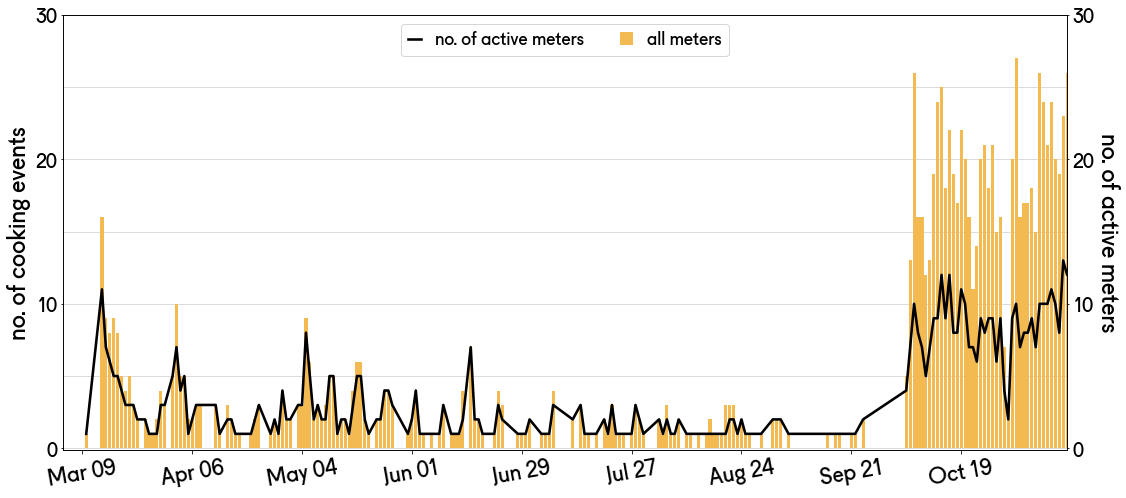

In [974]:
plt.rcParams['figure.figsize'] = [18, 8]

plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('time', 0, 'Mavota')
#df_epc100_grouped_statistics = df_epc100_grouped_statistics.loc [df_epc100_grouped_statistics['location'] =='Mavota'] # <- look at info of specific meter
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.1,30)
ax2.set_ylim(-0.1,30)
ax1.set_xlim([dt.date(2020, 3, 4), dt.date(2020, 11, 15)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['cooking_session'], color='#F4BA52', label='all meters', zorder=2.52)

ax2.plot(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['meter_number'], color='black', linewidth=2.58, label='no. of active meters', zorder=2.53)
ax2.set_ylabel('no. of active meters', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=4)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=10)
ax1.tick_params(axis='y',length=2)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/Mavota_TZcookingpilotall.png', dpi=200)
plt.show()






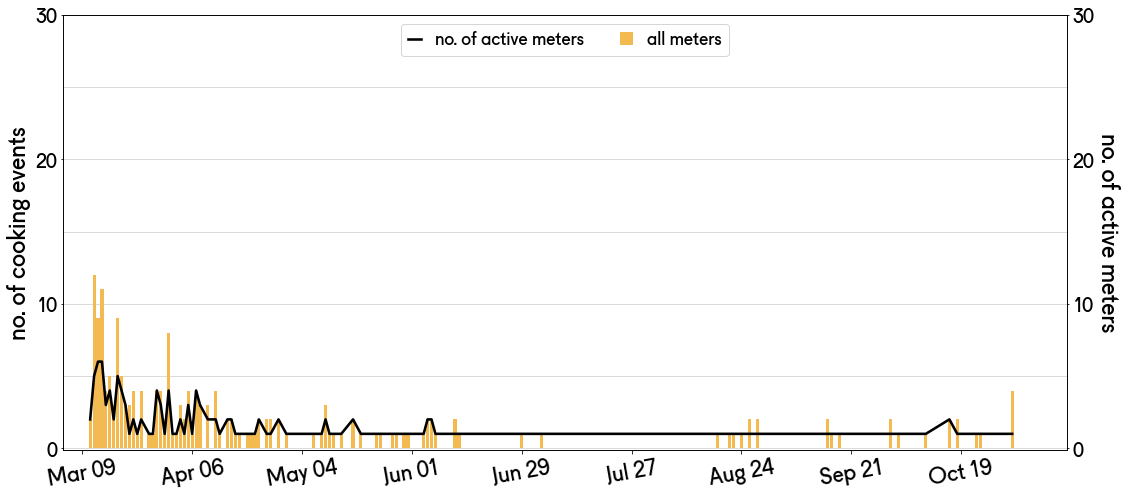

In [973]:
plt.rcParams['figure.figsize'] = [18, 8]

plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('time', 0, 'Nemba')
#df_epc100_grouped_statistics = df_epc100_grouped_statistics.loc [df_epc100_grouped_statistics['location'] =='Mavota'] # <- look at info of specific meter
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.1,30)
ax2.set_ylim(-0.1,30)
ax1.set_xlim([dt.date(2020, 3, 4), dt.date(2020, 11, 15)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['cooking_session'], color='#F4BA52', label='all meters', zorder=2.52)

ax2.plot(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['meter_number'], color='black', linewidth=2.58, label='no. of active meters', zorder=2.53)
ax2.set_ylabel('no. of active meters', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=4)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=10)
ax1.tick_params(axis='y',length=2)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/Nemba_TZcookingpilotall.png', dpi=200)
plt.show()






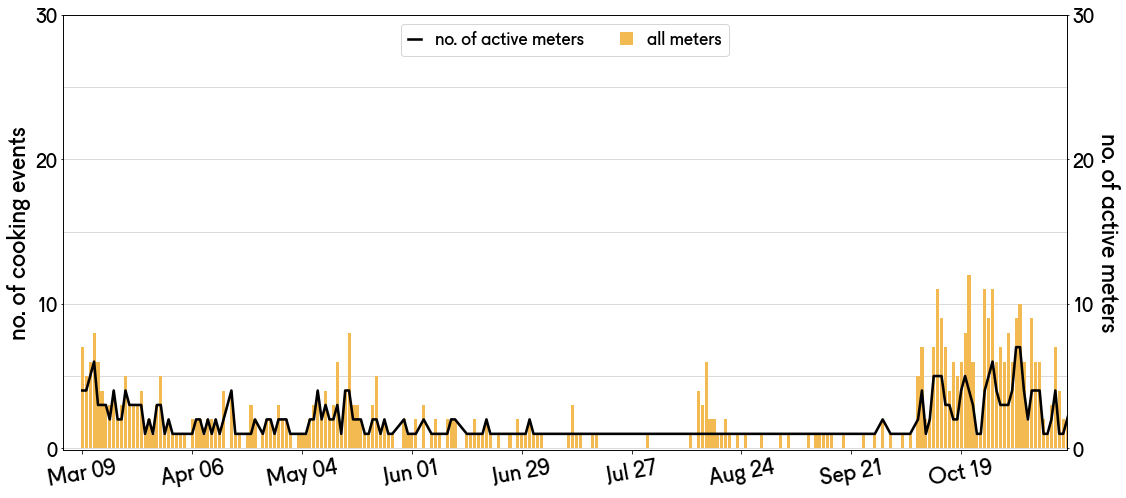

In [972]:
plt.rcParams['figure.figsize'] = [18, 8]

plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('time', 0, 'Kalenge')
#df_epc100_grouped_statistics = df_epc100_grouped_statistics.loc [df_epc100_grouped_statistics['location'] =='Mavota'] # <- look at info of specific meter
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.1,30)
ax2.set_ylim(-0.1,30)
ax1.set_xlim([dt.date(2020, 3, 4), dt.date(2020, 11, 15)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['cooking_session'], color='#F4BA52', label='all meters', zorder=2.52)

ax2.plot(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['meter_number'], color='black', linewidth=2.58, label='no. of active meters', zorder=2.53)
ax2.set_ylabel('no. of active meters', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=4)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=10)
ax1.tick_params(axis='y',length=2)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/Kalenge_TZcookingpilotall.png', dpi=200)
plt.show()






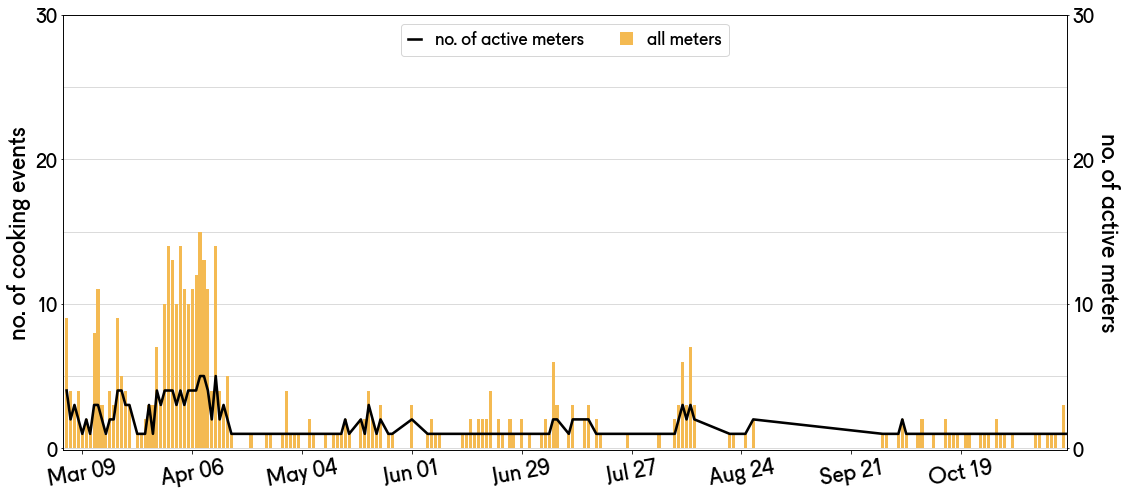

In [971]:
plt.rcParams['figure.figsize'] = [18, 8]

plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('time', 0, 'Yozu')
#df_epc100_grouped_statistics = df_epc100_grouped_statistics.loc [df_epc100_grouped_statistics['location'] =='Mavota'] # <- look at info of specific meter
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.1,30)
ax2.set_ylim(-0.1,30)
ax1.set_xlim([dt.date(2020, 3, 4), dt.date(2020, 11, 15)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['cooking_session'], color='#F4BA52', label='all meters', zorder=2.52)

ax2.plot(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['meter_number'], color='black', linewidth=2.58, label='no. of active meters', zorder=2.53)
ax2.set_ylabel('no. of active meters', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=4)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=10)
ax1.tick_params(axis='y',length=2)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/Yozu_TZcookingpilotall.png', dpi=200)
plt.show()






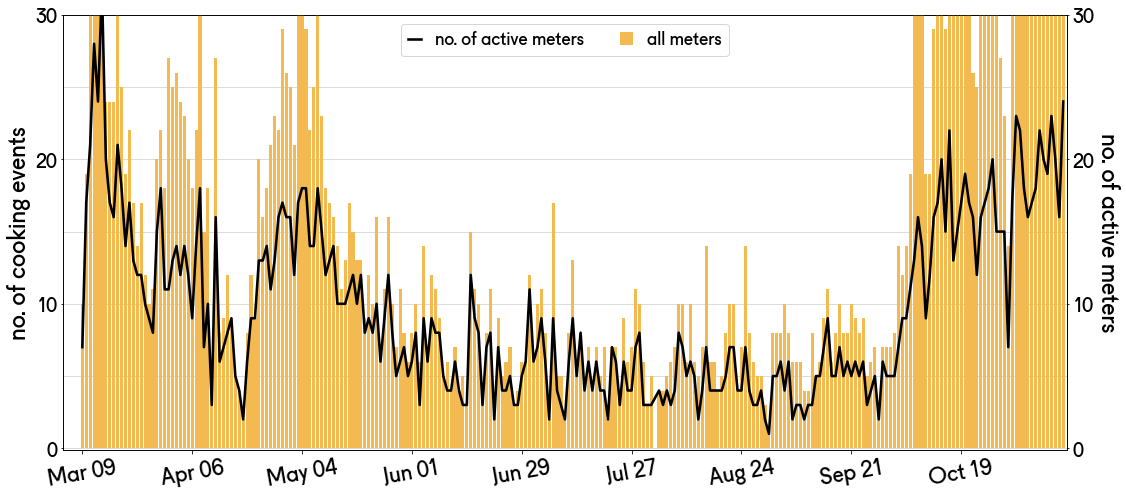

In [2482]:
plt.rcParams['figure.figsize'] = [18, 8]

plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('whole','time', 0, 'Bezi')
#df_epc100_grouped_statistics = df_epc100_grouped_statistics.loc [df_epc100_grouped_statistics['location'] =='Mavota'] # <- look at info of specific meter
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.1,30)
ax2.set_ylim(-0.1,30)
ax1.set_xlim([dt.date(2020, 3, 4), dt.date(2020, 11, 15)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['cooking_session'], color='#F4BA52', label='all meters', zorder=2.52)

ax2.plot(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['meter_number'], color='black', linewidth=2.58, label='no. of active meters', zorder=2.53)
ax2.set_ylabel('no. of active meters', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25)
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=4)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=10)
ax1.tick_params(axis='y',length=2)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/Bezi_TZcookingpilotall.png', dpi=200)
plt.show()






In [1983]:
df_epc100_only_cooking_events.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6466 entries, 2020-10-23 09:10:00 to 2020-11-10 17:54:00
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   id                6466 non-null   int64          
 1   meter_number      6466 non-null   int64          
 2   timezone          6466 non-null   object         
 3   region            6466 non-null   object         
 4   fetch_index       6466 non-null   int64          
 5   energy            6466 non-null   float64        
 6   voltage           6466 non-null   float64        
 7   current           6466 non-null   float64        
 8   power             6466 non-null   float64        
 9   power_factor      6466 non-null   float64        
 10  frequency         6466 non-null   float64        
 11  time_gap          165 non-null    timedelta64[ns]
 12  energy_gap        29 non-null     float64        
 13  load_on           2865 non-

In [1986]:
df_epc100_max = df_epc100.groupby([df_epc100['usage_rank']]).\
agg({'latest_energy':'max','max_time' : 'max', 'min_time' : 'max', 'group' : 'max'})
df_epc100_only_cooking_events = df_epc100.copy()
df_epc100_only_cooking_events.dropna(subset = ["cooking_event_id"], inplace=True)
df_epc100_max_only_sessions = df_epc100_only_cooking_events.groupby([df_epc100_only_cooking_events['usage_rank']]).\
agg({'latest_energy':'max','max_time' : 'max', 'min_time' : 'max', 'group' : 'max', 'meter_number':'mean', 'cooking_event_id':'nunique', 'first_energy':'min'})
df_epc100_max.sort_values(['latest_energy'], ascending=True, inplace=True)
df_epc100_max_only_sessions.sort_values(['latest_energy'], ascending=True, inplace=True)
df_epc100_max.reset_index(inplace=True)
df_epc100_max_only_sessions.reset_index(inplace=True)

In [1988]:
df_epc100_max_only_sessions['used_energy']=df_epc100_max_only_sessions['latest_energy']-df_epc100_max_only_sessions['first_energy']

In [1989]:
df_epc100_max_only_sessions.to_csv('result/on_grid_pilot.csv', index=True)
df_epc100_max_only_sessions

usage_rank  latest_energy            max_time            min_time  group  \
0            2           0.75 2020-12-08 17:56:00 2020-10-23 18:45:00    3.0   
1            3           1.87 2020-10-23 15:55:00 2020-10-23 14:40:00    3.0   
2            5           2.48 2020-11-10 17:54:00 2020-10-23 19:10:00    3.0   
3            6           2.93 2020-11-25 20:45:00 2020-10-23 09:10:00    2.0   
4            7           4.25 2020-12-02 19:22:00 2020-11-07 18:30:00    2.0   
5            8           4.60 2020-12-09 09:50:00 2020-11-04 17:40:00    2.0   
6            9           4.98 2020-11-11 10:30:00 2020-11-02 14:30:00    2.0   
7           10           5.09 2020-11-28 12:31:00 2020-10-24 19:15:00    2.0   
8           11           5.57 2020-12-03 15:11:00 2020-10-24 17:07:00    2.0   
9           12           7.05 2020-12-08 21:02:00 2020-10-23 19:20:00    2.0   
10          13           7.60 2020-11-05 17:37:00 2020-10-23 04:55:00    2.0   
11          14           7.99 2020-12-05 11:58:00 2020-10-24 13:05:00    1.0   
12          15           8.76 2020-12-07 15:45:00 2020-10-23 18:35:00    1.0   
13          16           9.88 2020-12-08 17:57:00 2020-10-23 13:25:00    1.0   
14          17          10.38 2020-12-08 19:29:00 2020-10-23 17:42:00    1.0   
15          18          11.70 2020-12-02 09:15:00 2020-10-23 17:08:00    1.0   
16          19          14.37 2020-12-07 17:18:00 2020-10-24 11:19:00    1.0   
17          20          20.79 2020-12-08 18:25:00 2020-10-23 13:45:00    1.0   
18          21          25.96 2020-12-09 10:55:00 2020-10-24 10:19:00    1.0   

    meter_number  cooking_event_id  first_energy  used_energy  
0       86000145                 2          0.13         0.62  
1       86000130                 1          1.43         0.44  
2       86000177                 3          0.28         2.20  
3       86000118                 8          0.71         2.22  
4       86000161                 5          1.15         3.10  
5       86000137                 4          1.21         3.39  
6       86000124                 3          3.07         1.91  
7       86000152                 5          0.78         4.31  
8       86000176                10          0.11         5.46  
9       86000141                 6          0.70         6.35  
10      86000174                13          0.69         6.91  
11      86000133                 7          0.78         7.21  
12      86000132                24          0.79         7.97  
13      86000160                27          0.34         9.54  
14      86000143                14          0.09        10.29  
15      86000157                12          0.39        11.31  
16      86000173                37          0.15        14.22  
17      86000138                55          0.21        20.58  
18      86000134                44          0.61        25.35

In [1973]:
df_epc100.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17455 entries, 2020-10-23 09:10:00 to 2020-11-10 17:54:00
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   id                17455 non-null  int64          
 1   meter_number      17455 non-null  int64          
 2   timezone          17455 non-null  object         
 3   region            17455 non-null  object         
 4   fetch_index       17455 non-null  int64          
 5   energy            17455 non-null  float64        
 6   voltage           17455 non-null  float64        
 7   current           17455 non-null  float64        
 8   power             17455 non-null  float64        
 9   power_factor      17455 non-null  float64        
 10  frequency         17455 non-null  float64        
 11  time_gap          543 non-null    timedelta64[ns]
 12  energy_gap        53 non-null     float64        
 13  load_on           4824 non

In [1970]:
df_epc100_max.latest_energy.sum()/0.4

397.82500000000005

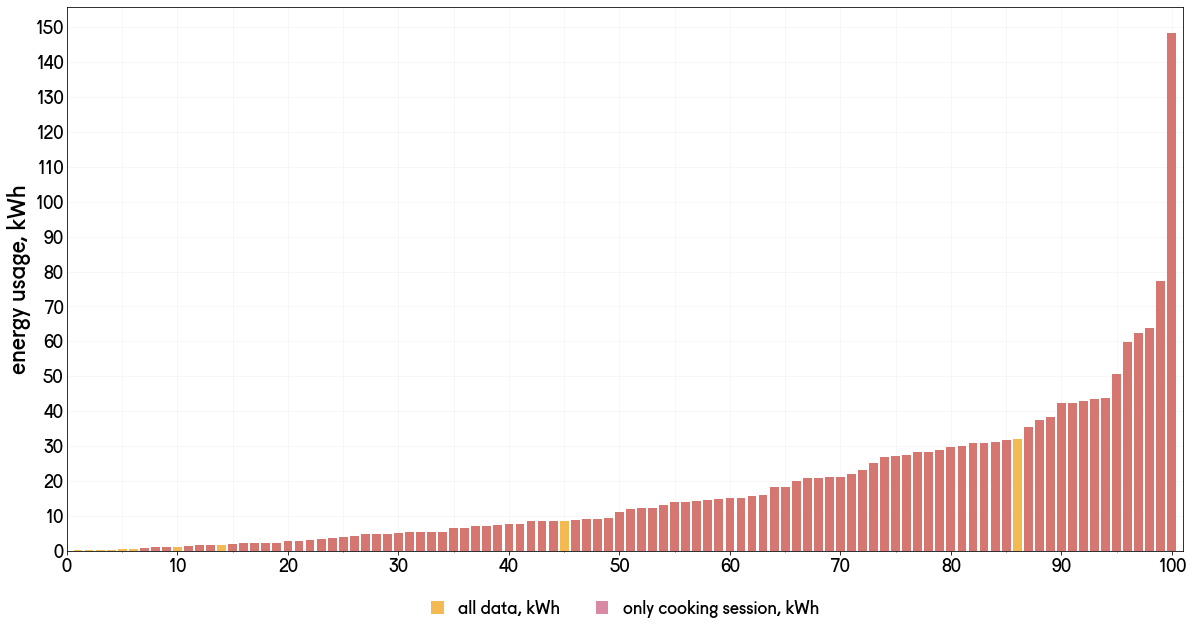

In [424]:
plt.rcParams['figure.figsize'] = [20, 10]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

#ax1.set_ylim(-0.1,180)
#ax2.set_ylim(-0.1,60)
ax1.set_xlim([0, 101])

ax1.grid(True, which='both', color='whitesmoke')
#ax2.grid(False)

ax1.bar(df_epc100_max.usage_rank, df_epc100_max.latest_energy, color='#F4BA52', label='all data, kWh', zorder=2.52)
ax1.bar(df_epc100_max_only_sessions.usage_rank, df_epc100_max_only_sessions.latest_energy, color='#CA597D', alpha = 0.7, label='only cooking session, kWh', zorder=2.53)

ax1.set_ylabel('energy usage, kWh', fontstyle='normal', fontweight='bold')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(5)) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(10))
#ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=90)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=1)
#ax2.tick_params(axis='y',length=0)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.06), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/latest_meter_count.png', dpi=200)
plt.show()

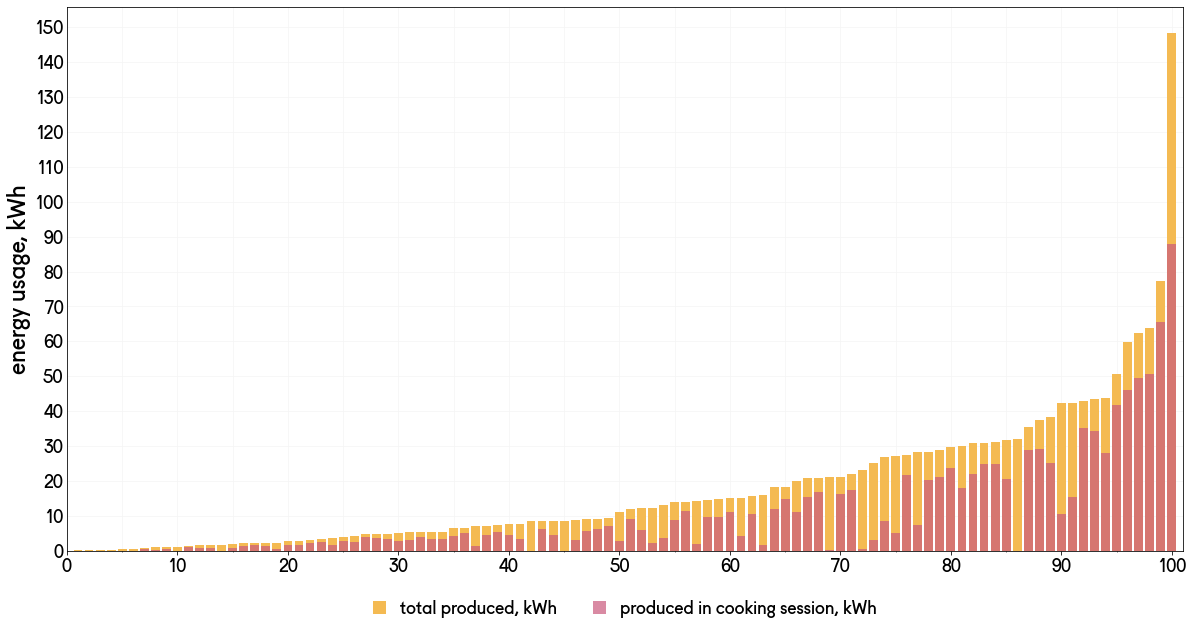

In [426]:
df_cs_grouped_statistics = all_meter_bar_chart('meters', 0)
df_cs_grouped_statistics.reset_index(inplace=True)

plt.rcParams['figure.figsize'] = [20, 10]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

#ax1.set_ylim(-0.1,180)
#ax2.set_ylim(-0.1,60)
ax1.set_xlim([0, 101])

ax1.grid(True, which='both', color='whitesmoke')
#ax2.grid(False)

ax1.bar(df_epc100_max.usage_rank, df_epc100_max.latest_energy, color='#F4BA52', label='total produced, kWh', zorder=2.52)
ax1.bar(df_cs_grouped_statistics.usage_rank, df_cs_grouped_statistics.energy_gen, color='#CA597D', alpha = 0.7, label='produced in cooking session, kWh', zorder=2.53)

ax1.set_ylabel('energy usage, kWh', fontstyle='normal', fontweight='bold')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(5)) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(10))
#ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=90)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=1)
#ax2.tick_params(axis='y',length=0)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.06), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_session_energy_vs_total_energy_bar_plot.png', dpi=200)
plt.show()

In [427]:
df_cs_grouped_statistics['meter_number'] = df_cs_grouped_statistics.usage_rank.map(df_epc100_grouped.set_index('usage_rank')['meter_number'].to_dict())

df_epc100_max['meter_number'] = df_epc100_max.usage_rank.map(df_epc100_grouped.set_index('usage_rank')['meter_number'].to_dict())
df_epc100_max['session_index'] = df_epc100_max.usage_rank.map(df_cs_grouped_statistics.set_index('usage_rank')['session_index'].to_dict())
df_epc100_max['energy_gen'] = df_epc100_max.usage_rank.map(df_cs_grouped_statistics.set_index('usage_rank')['energy_gen'].to_dict())
df_epc100_max['lost_energy'] = df_epc100_max.latest_energy - df_epc100_max.energy_gen
df_epc100_max['lost_energy_pct'] = (df_epc100_max.latest_energy - df_epc100_max.energy_gen)/df_epc100_max.latest_energy

average_kWh_per_cooking_event = 0.5 #df_epc100_max.energy_gen.sum()/df_epc100_max.session_index.sum()
df_epc100_max['lost_cooking_events'] = df_epc100_max['lost_energy']/average_kWh_per_cooking_event

df_epc100_max.loc[((df_epc100_max.lost_energy.isnull() == True)| (df_epc100_max.lost_energy < 0)), 'lost_energy_pct'] = 1
df_epc100_max.loc[((df_epc100_max.lost_cooking_events.isnull() == True) | (df_epc100_max.lost_cooking_events < 0)), 'lost_cooking_events'] = df_epc100_max.latest_energy/average_kWh_per_cooking_event
df_epc100_max.loc[((df_epc100_max.session_index.isnull() != True)), 'total_cooking_events'] = df_epc100_max.session_index + df_epc100_max.lost_cooking_events
df_epc100_max.loc[((df_epc100_max.session_index.isnull() == True)), 'total_cooking_events'] = df_epc100_max.lost_cooking_events
#df_epc100_max['total_cooking_events'] = df_epc100_max.session_index + df_epc100_max.lost_cooking_events

In [ ]:
0.5

In [20]:
average_kWh_per_cooking_event

0.2541976470588235

In [21]:
df_epc100_max

usage_rank  latest_energy            max_time            min_time  group  \
0            1           0.12 2020-11-17 18:15:00 2020-03-02 13:05:00    3.0   
1            2           0.13 2020-11-17 15:25:00 2020-03-07 12:05:00    3.0   
2            3           0.16 2020-11-20 01:35:00 2020-07-06 19:55:00    3.0   
3            4           0.29 2020-11-16 09:30:00 2020-07-10 15:10:00    3.0   
4            5           0.41 2020-11-20 11:50:00 2020-03-13 21:05:00    3.0   
..         ...            ...                 ...                 ...    ...   
95          96          59.76 2020-11-18 22:20:00 2020-03-07 15:05:00    1.0   
96          97          62.27 2020-12-02 09:05:00 2020-03-10 19:10:00    1.0   
97          98          63.88 2020-12-02 09:05:00 2020-03-10 22:30:00    1.0   
98          99          77.28 2020-12-01 19:15:00 2020-03-14 19:40:00    1.0   
99         100         148.35 2020-11-14 12:45:00 2020-03-05 19:30:00    1.0   

    meter_number  session_index  energy_gen  lost_energy  lost_energy_pct  \
0            NaN            NaN         NaN          NaN         1.000000   
1            NaN            NaN         NaN          NaN         1.000000   
2            NaN            NaN         NaN          NaN         1.000000   
3            NaN            NaN         NaN          NaN         1.000000   
4            NaN            NaN         NaN          NaN         1.000000   
..           ...            ...         ...          ...              ...   
95      546336.0          176.0       46.01        13.75         0.230087   
96      546307.0          180.0       49.47        12.80         0.205556   
97      546301.0          110.0       50.59        13.29         0.208046   
98      546360.0          218.0       65.46        11.82         0.152950   
99      546375.0          319.0       88.03        60.32         0.406606   

    lost_cooking_events  total_cooking_events  
0              0.472074              0.472074  
1              0.511413              0.511413  
2              0.629431              0.629431  
3              1.140845              1.140845  
4              1.612918              1.612918  
..                  ...                   ...  
95            54.091767            230.091767  
96            50.354518            230.354518  
97            52.282152            162.282152  
98            46.499250            264.499250  
99           237.295666            556.295666  

[100 rows x 12 columns]

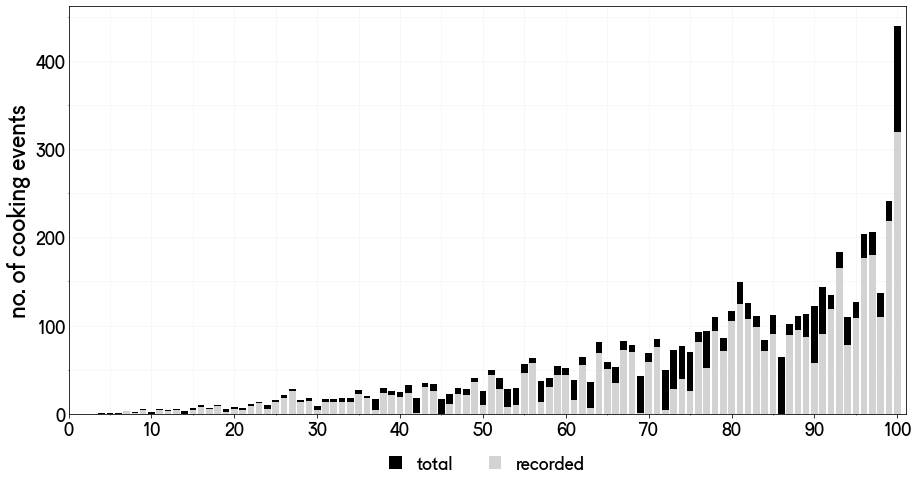

In [969]:
plt.rcParams['figure.figsize'] = [15, 7.5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

#ax1.set_ylim(-0.1,180)
#ax2.set_ylim(-0.1,60)
ax1.set_xlim([0, 101])

ax1.grid(True, which='both', color='whitesmoke')
#ax2.grid(False)

ax1.bar(df_epc100_max.usage_rank, df_epc100_max.total_cooking_events, color='black', alpha = 1.0, label='total', zorder=2.51) # darkgray
ax1.bar(df_epc100_max.usage_rank, df_epc100_max.session_index, color='lightgray', alpha = 1.0, label='recorded', zorder=2.52) # #F4BA52


ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(5)) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(50))
#ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=90)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=1)
#ax2.tick_params(axis='y',length=0)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.06), ncol=3, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/recorded_lost_and_total_cooking_sessions.png', dpi=200)
plt.show()

In [23]:
df_epc100.head(5)

id  meter_number timezone            region  \
timestamp                                                           
2020-03-10 21:50:00  311        546281      UTC  TZ cooking pilot   
2020-03-10 21:55:00  311        546281      UTC  TZ cooking pilot   
2020-03-10 22:00:00  311        546281      UTC  TZ cooking pilot   
2020-03-10 23:05:00  311        546281      UTC  TZ cooking pilot   
2020-03-11 08:50:00  311        546281      UTC  TZ cooking pilot   

                     fetch_index  energy  voltage  current     power  \
timestamp                                                              
2020-03-10 21:50:00           97    0.00   229.90   0.0000  0.000000   
2020-03-10 21:55:00           97    0.07   228.20   4.3010  0.981488   
2020-03-10 22:00:00           97    0.14   227.80   4.3090  0.981590   
2020-03-10 23:05:00           97    0.21   229.90   0.0000  0.000000   
2020-03-11 08:50:00           97    0.26   228.85   2.1535  0.492828   

                     power_factor  ...  load_added_count     time_load_added  \
timestamp                          ...                                         
2020-03-10 21:50:00        1.0000  ...                 0 2020-03-10 21:50:00   
2020-03-10 21:55:00        0.9990  ...                 1 2020-03-10 21:55:00   
2020-03-10 22:00:00        0.9980  ...                 2 2020-03-10 22:00:00   
2020-03-10 23:05:00        1.0000  ...                 3 2020-03-10 23:05:00   
2020-03-11 08:50:00        0.9995  ...                 4 2020-03-11 08:50:00   

                     cooking_session          time_start            time_end  \
timestamp                                                                      
2020-03-10 21:50:00              1.0 2020-03-10 21:50:00 2020-03-10 22:00:00   
2020-03-10 21:55:00              1.0 2020-03-10 21:50:00 2020-03-10 22:00:00   
2020-03-10 22:00:00              1.0 2020-03-10 21:50:00 2020-03-10 22:00:00   
2020-03-10 23:05:00              NaN 2020-03-10 23:05:00 2020-03-10 23:05:00   
2020-03-11 08:50:00              3.0 2020-03-11 08:50:00 2020-03-11 09:55:00   

                    cooking_time seq_time  missing_data timestamp_issue  \
timestamp                                                                 
2020-03-10 21:50:00         10.0      0.0           NaN             NaN   
2020-03-10 21:55:00         10.0      5.0           NaN             NaN   
2020-03-10 22:00:00         10.0     10.0           NaN             NaN   
2020-03-10 23:05:00          0.0      0.0           NaN             NaN   
2020-03-11 08:50:00         65.0      0.0           NaN             NaN   

                     cooking_event_id  
timestamp                              
2020-03-10 21:50:00               1.0  
2020-03-10 21:55:00               1.0  
2020-03-10 22:00:00               1.0  
2020-03-10 23:05:00               NaN  
2020-03-11 08:50:00               2.0  

[5 rows x 35 columns]

In [2236]:
df_whole = df_epc100.copy()

In [2245]:
meter_check2

NameError: name 'meter_check2' is not defined

In [2260]:
meter_check2 = df_tariff_grouped.loc[ df_tariff_grouped [ 'meter_number' ] == 546333 ] # <- look at info of specific meter
#meter_check2 = meter_check2[meter_check2.index >= pd.to_datetime('2020-03-09 00:00:00')]
#meter_check2 = meter_check2[meter_check2.index < pd.to_datetime('2020-06-01 00:00:00')]
meter_check2.energy_gen.sum()

12.030000000000001

In [2263]:
meter_check = df_whole.loc [ df_whole [ 'meter_number' ] == 546333 ] # <- look at info of specific meter
meter_check = meter_check[meter_check.index >= pd.to_datetime('2020-03-09 00:00:00')]
meter_check = meter_check[meter_check.index < pd.to_datetime('2020-11-15 00:00:00')]
print(meter_check.energy.min())
print(meter_check.energy.max())

14.22

In [2264]:
meter_check = df_whole.loc [ df_whole [ 'meter_number' ] == 546333 ] # <- look at info of specific meter
meter_check = meter_check[meter_check.index >= pd.to_datetime('2020-03-09 00:00:00')]
meter_check = meter_check[meter_check.index < pd.to_datetime('2020-11-15 00:00:00')]
print(meter_check.energy.min())
print(meter_check.energy.max())

0.0
19.04


In [2266]:
meter_check2 = df_whole_grouped.loc[ df_whole_grouped [ 'meter_number' ] == 546333 ] # <- look at info of specific meter
#meter_check2 = meter_check2[meter_check2.index >= pd.to_datetime('2020-03-09 00:00:00')]
#meter_check2 = meter_check2[meter_check2.index < pd.to_datetime('2020-06-01 00:00:00')]
meter_check.energy.max() - meter_check2.energy_gen.sum()

4.8199999999999985

19.04

In [26]:
df_fieldtripcheck = df_epc100_grouped_statistics.copy()

df_fieldtripcheck.drop(df_fieldtripcheck[(((df_fieldtripcheck.timestamp >= pd.to_datetime('2020-06-28 00:00:00')) &\
                                      (df_fieldtripcheck.timestamp < pd.to_datetime('2020-07-14 00:00:00'))) == True)].index, inplace = True)

df_fieldtripcheck.drop(df_fieldtripcheck[(((df_fieldtripcheck.timestamp >= pd.to_datetime('2020-11-15 00:00:00')) &\
                                      (df_fieldtripcheck.timestamp < pd.to_datetime('2020-11-18 00:00:00'))) == True)].index, inplace = True)

df_fieldtripcheck

timestamp  energy_gen  cooking_session  cooking_cost  cooking_time  \
0    2020-03-05        4.08               12        8160.0         575.0   
1    2020-03-06        1.16                5        2320.0         100.0   
2    2020-03-07        0.79                3        1580.0          85.0   
3    2020-03-08        1.22                4        2440.0         200.0   
4    2020-03-09        2.02                9        4040.0         460.0   
..          ...         ...              ...           ...           ...   
267  2020-11-28       13.49               28       26980.0        2040.0   
268  2020-11-29        9.70               26       19400.0        1420.0   
269  2020-11-30        8.24               20       16480.0         935.0   
270  2020-12-01        9.41               21       18820.0        1365.0   
271  2020-12-02        3.37                6        6740.0         345.0   

     meter_number  
0               5  
1               3  
2               3  
3               2  
4               6  
..            ...  
267            11  
268            12  
269             7  
270             8  
271             4  

[253 rows x 6 columns]

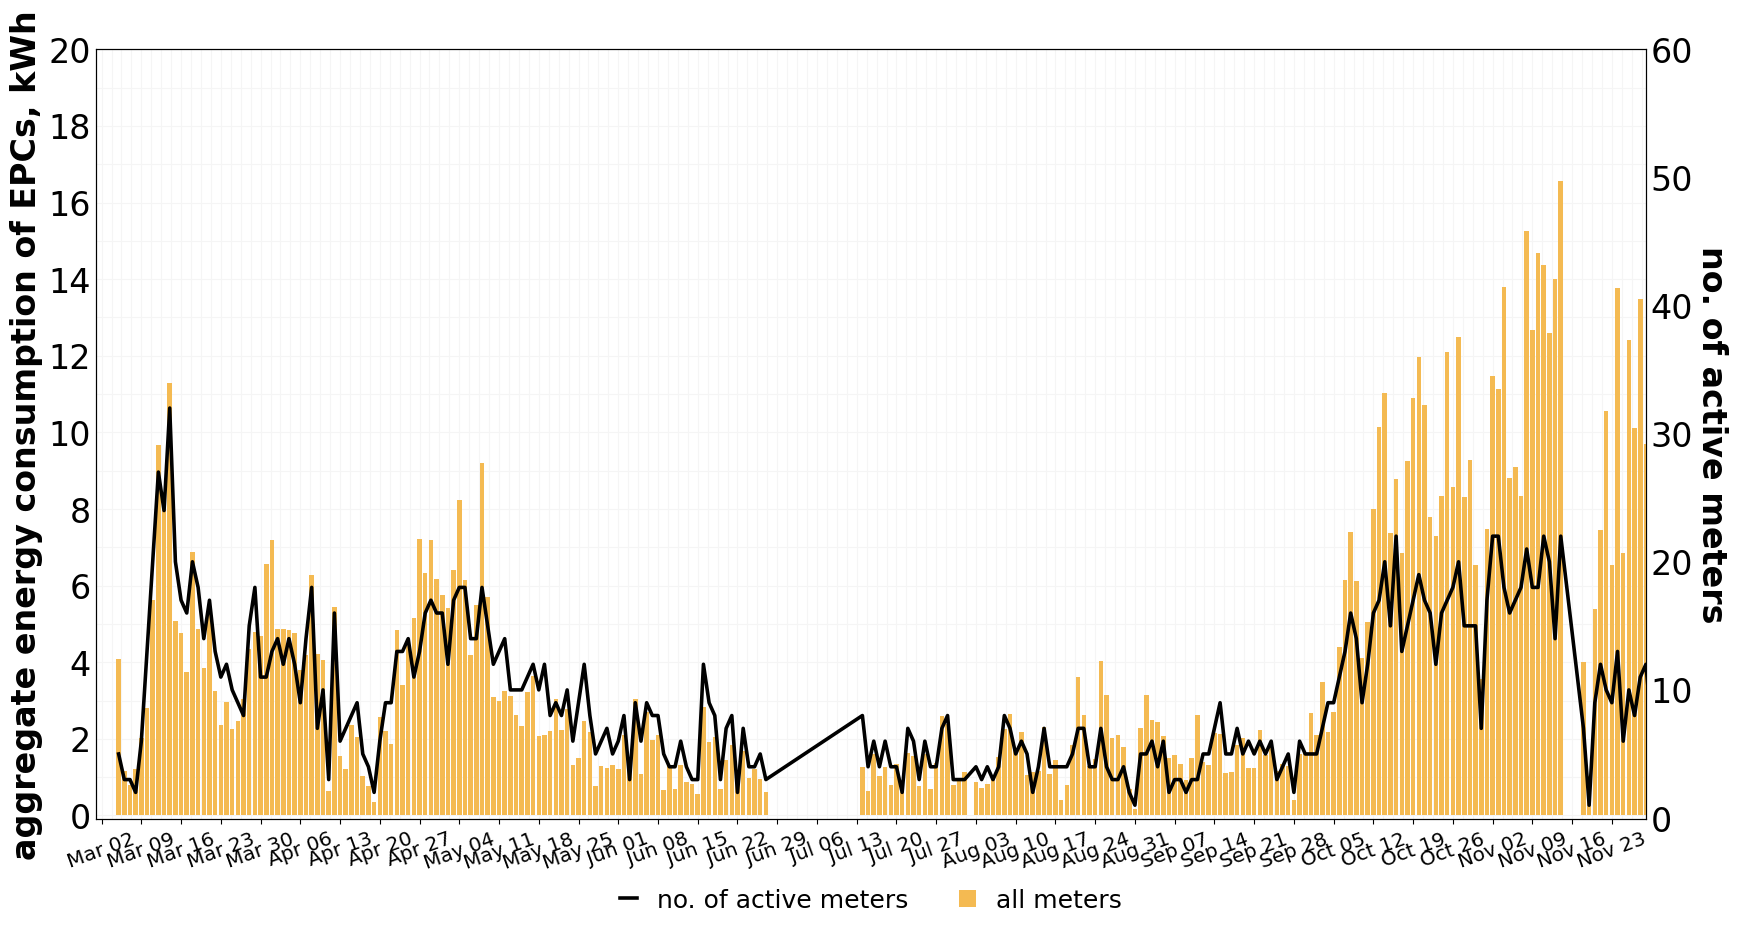

In [28]:
plt.rcParams['figure.figsize'] = [20, 10]

plt.rc('xtick', labelsize=14.5)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('time')

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_ylim(-0.1,20)
ax2.set_ylim(-0.1,60)
ax1.set_xlim([dt.date(2020, 3, 1), dt.date(2020, 11, 29)])

ax1.grid(True, which='both', color='whitesmoke')
ax2.grid(False)

ax1.bar(df_fieldtripcheck['timestamp'], df_fieldtripcheck['energy_gen'], color='#F4BA52', label='all meters', zorder=2.52)

ax2.plot(df_fieldtripcheck['timestamp'], df_fieldtripcheck['meter_number'], color='black', linewidth=2.58, label='no. of active meters', zorder=2.53)
ax2.set_ylabel('no. of active meters', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25)
ax1.set_ylabel('aggregate energy consumption of EPCs, kWh', fontstyle='normal', fontweight='bold')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=20)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.06), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/TZcookingpilotallwithoutfieldtrips.png', dpi=200)
plt.show()

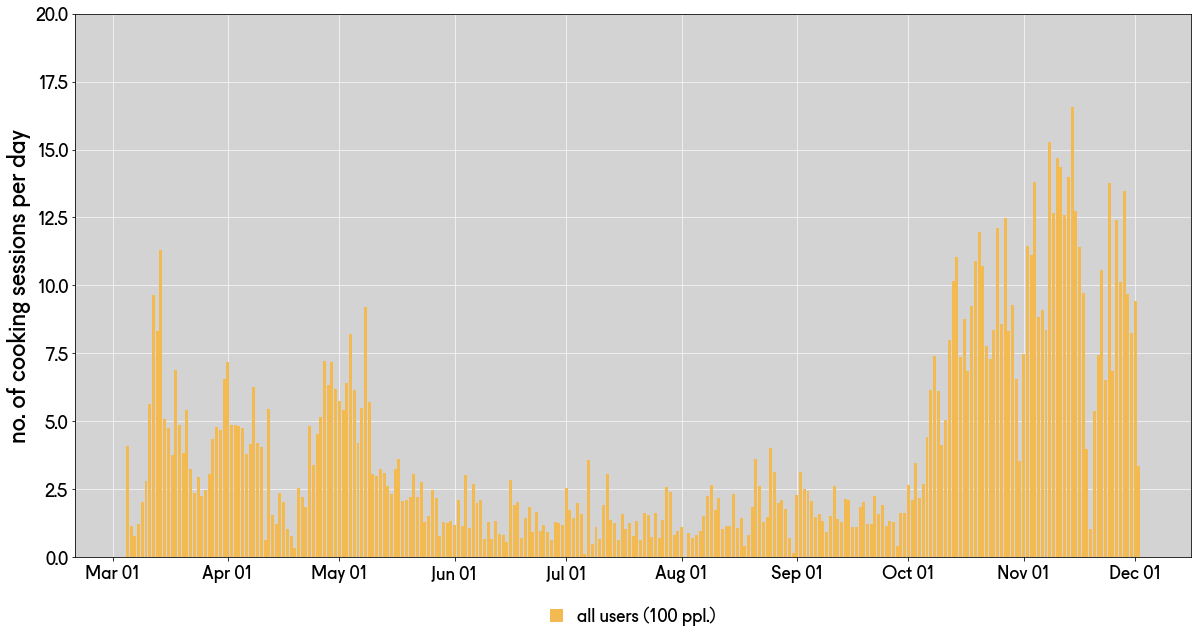

In [386]:
plt.rcParams['figure.figsize'] = [20, 10]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)

df_epc100_grouped_statistics = all_meter_bar_chart('time', 0)
#df_epc100_grouped_statistics_hu = df_epc100_grouped_statistics[df_epc100_grouped_statistics['group'] == 1]
#df_epc100_grouped_statistics_mu = df_epc100_grouped_statistics[df_epc100_grouped_statistics['group'] == 2]
#df_epc100_grouped_statistics_lu = df_epc100_grouped_statistics[df_epc100_grouped_statistics['group'] == 3]

x1 = df_epc100_grouped_statistics.timestamp
y1 = df_epc100_grouped_statistics.energy_gen
#x2 = df_epc100_grouped_statistics_mu.timestamp
#y2 = df_epc100_grouped_statistics_mu.cooking_session
#x3 = df_epc100_grouped_statistics_lu.timestamp
#y3 = df_epc100_grouped_statistics_lu.cooking_session

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().set_ylim(0,20)
plt.bar(x1,y1, color='#F4BA52', label='all users (100 ppl.)', zorder=2.52)
#plt.bar(x2,y2, color='#CA597D', label='medium-utilization users (40 ppl.)', zorder=2.53)
#plt.bar(x3,y3, color='darkgray', label='low-utilization users (20 ppl.)', zorder=2.54)

plt.gca().grid(True, which='both', color='whitesmoke')

lines, labels = plt.gca().get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.06), ncol=1, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.ylabel('no. of cooking sessions per day')

plt.savefig('visuals/cooking_sessions_time.png'); plt.show()

In [ ]:
546328

In [145]:
low_user_steady_state = df_epc100_.loc [ df_epc100 [ 'meter_number' ] == 546328 ] # <- look at info of specific meter
low_user_steady_state = low_user_steady_state[low_user_steady_state.index >= pd.to_datetime('2020-06-01 00:00:00')]
low_user_steady_state = low_user_steady_state[low_user_steady_state.index < pd.to_datetime('2020-10-01 00:00:00')]

In [147]:
low_user_steady_state

id  meter_number timezone            region  \
timestamp                                                           
2020-06-04 17:20:00  288        546328      UTC  TZ cooking pilot   
2020-06-04 17:25:00  288        546328      UTC  TZ cooking pilot   
2020-06-04 17:30:00  288        546328      UTC  TZ cooking pilot   
2020-06-04 17:35:00  288        546328      UTC  TZ cooking pilot   
2020-06-04 17:40:00  288        546328      UTC  TZ cooking pilot   
...                  ...           ...      ...               ...   
2020-07-30 07:45:00  288        546328      UTC  TZ cooking pilot   
2020-07-30 07:50:00  288        546328      UTC  TZ cooking pilot   
2020-07-30 07:55:00  288        546328      UTC  TZ cooking pilot   
2020-07-30 08:00:00  288        546328      UTC  TZ cooking pilot   
2020-07-30 08:05:00  288        546328      UTC  TZ cooking pilot   

                     fetch_index  energy  voltage  current     power  \
timestamp                                                              
2020-06-04 17:20:00           74   10.94    226.8   4.0820  0.925798   
2020-06-04 17:25:00           74   11.02    227.1   4.0735  0.925092   
2020-06-04 17:30:00           74   11.08    226.9   4.0820  0.926206   
2020-06-04 17:35:00           74   11.16    227.0   4.0810  0.926387   
2020-06-04 17:40:00           74   11.24    227.6   4.0910  0.931112   
...                          ...     ...      ...      ...       ...   
2020-07-30 07:45:00           74   12.47    224.5   4.0410  0.907205   
2020-07-30 07:50:00           74   12.54    224.0   4.0320  0.903168   
2020-07-30 07:55:00           74   12.62    223.8   4.0320  0.902362   
2020-07-30 08:00:00           74   12.69    223.9   4.0310  0.902541   
2020-07-30 08:05:00           74   12.77    223.9   4.0260  0.901421   

                     power_factor  ...  load_added_count     time_load_added  \
timestamp                          ...                                         
2020-06-04 17:20:00         0.998  ...             13333 2020-06-04 17:20:00   
2020-06-04 17:25:00         0.998  ...             13334 2020-06-04 17:25:00   
2020-06-04 17:30:00         0.998  ...             13335 2020-06-04 17:30:00   
2020-06-04 17:35:00         0.998  ...             13336 2020-06-04 17:35:00   
2020-06-04 17:40:00         0.998  ...             13337 2020-06-04 17:40:00   
...                           ...  ...               ...                 ...   
2020-07-30 07:45:00         0.998  ...             13356 2020-07-30 07:45:00   
2020-07-30 07:50:00         0.998  ...             13357 2020-07-30 07:50:00   
2020-07-30 07:55:00         0.998  ...             13358 2020-07-30 07:55:00   
2020-07-30 08:00:00         0.998  ...             13359 2020-07-30 08:00:00   
2020-07-30 08:05:00         0.997  ...             13360 2020-07-30 08:05:00   

                     cooking_session          time_start            time_end  \
timestamp                                                                      
2020-06-04 17:20:00           2885.0 2020-06-04 17:20:00 2020-06-29 09:30:00   
2020-06-04 17:25:00           2885.0 2020-06-04 17:20:00 2020-06-29 09:30:00   
2020-06-04 17:30:00           2885.0 2020-06-04 17:20:00 2020-06-29 09:30:00   
2020-06-04 17:35:00           2885.0 2020-06-04 17:20:00 2020-06-29 09:30:00   
2020-06-04 17:40:00           2885.0 2020-06-04 17:20:00 2020-06-29 09:30:00   
...                              ...                 ...                 ...   
2020-07-30 07:45:00           2888.0 2020-07-30 07:45:00 2020-07-30 08:05:00   
2020-07-30 07:50:00           2888.0 2020-07-30 07:45:00 2020-07-30 08:05:00   
2020-07-30 07:55:00           2888.0 2020-07-30 07:45:00 2020-07-30 08:05:00   
2020-07-30 08:00:00           2888.0 2020-07-30 07:45:00 2020-07-30 08:05:00   
2020-07-30 08:05:00           2888.0 2020-07-30 07:45:00 2020-07-30 08:05:00   

                    cooking_time seq_time  missing_data timestamp_issue  \
timestamp                     

In [150]:
df_epc100_grouped_statistics

timestamp  energy_gen  cooking_session  cooking_cost  cooking_time  \
0    2020-03-05        4.08               12        8160.0         575.0   
1    2020-03-06        1.16                5        2320.0         100.0   
2    2020-03-07        0.79                3        1580.0          85.0   
3    2020-03-08        1.22                4        2440.0         200.0   
4    2020-03-09        2.02                9        4040.0         460.0   
..          ...         ...              ...           ...           ...   
267  2020-11-28       13.49               28       26980.0        2040.0   
268  2020-11-29        9.70               26       19400.0        1420.0   
269  2020-11-30        8.24               20       16480.0         935.0   
270  2020-12-01        9.41               21       18820.0        1365.0   
271  2020-12-02        3.37                6        6740.0         345.0   

     meter_number  
0               5  
1               3  
2               3  
3               2  
4               6  
..            ...  
267            11  
268            12  
269             7  
270             8  
271             4  

[272 rows x 6 columns]

In [174]:
df_epc100_grouped

meter_number  cooking_session location  energy  energy_start  \
0           546281              1.0   [Bezi]    0.14          0.00   
1           546281              3.0   [Bezi]    0.48          0.26   
2           546281              5.0   [Bezi]    0.64          0.55   
3           546281              7.0   [Bezi]    0.90          0.69   
4           546281              9.0   [Bezi]    1.09          0.96   
...            ...              ...      ...     ...           ...   
5082        546379           5924.0  [Nemba]    2.04          1.70   
5085        546380           5927.0   [Bezi]    0.53          0.49   
5086        546380           5928.0   [Bezi]    0.92          0.58   
5087        546380           5929.0   [Bezi]    1.49          0.95   
5088        546380           5930.0   [Bezi]    3.39          1.58   

      energy_gen     power  cooking_time           timestamp  \
0           0.14  0.654359          10.0 2020-03-10 21:50:00   
1           0.22  0.404363          65.0 2020-03-11 08:50:00   
2           0.09  0.388817          20.0 2020-03-11 19:40:00   
3           0.21  0.853257          15.0 2020-03-12 09:05:00   
4           0.13  0.981175          10.0 2020-03-12 19:50:00   
...          ...       ...           ...                 ...   
5082        0.34  0.280446          80.0 2020-03-14 09:40:00   
5085        0.04  0.323970          10.0 2020-03-13 13:55:00   
5086        0.34  0.162565         155.0 2020-04-01 11:45:00   
5087        0.54  0.531858          50.0 2020-04-01 14:25:00   
5088        1.81  0.343748         250.0 2020-04-01 15:20:00   

        cooking_time_end   current  group  usage_rank  latest_energy  \
0    2020-03-10 22:00:00  2.870000    1.0          78          28.40   
1    2020-03-11 09:55:00  1.767778    1.0          78          28.40   
2    2020-03-11 20:00:00  1.710400    1.0          78          28.40   
3    2020-03-12 09:20:00  3.757417    1.0          78          28.40   
4    2020-03-12 20:00:00  4.310333    1.0          78          28.40   
...                  ...       ...    ...         ...            ...   
5082 2020-03-14 11:00:00  1.244118    3.0          19           2.35   
5085 2020-03-13 14:05:00  1.430333    2.0          30           5.00   
5086 2020-04-01 14:20:00  0.716400    2.0          30           5.00   
5087 2020-04-01 15:15:00  2.344364    2.0          30           5.00   
5088 2020-04-01 19:30:00  1.515824    2.0          30           5.00   

      no_recordings   id  power_mean  cooking_cost  session_index  
0                 3  311    0.840000         280.0              1  
1                12  311    0.203077         440.0              2  
2                 5  311    0.270000         180.0              3  
3                 4  311    0.840000         420.0              4  
4                 3  311    0.780000         260.0              5  
...             ...  ...         ...           ...            ...  
5082             17  216    0.255000         680.0           4246  
5085              3  219    0.240000          80.0           4247  
5086             30  219    0.131613         680.0           4248  
5087             11  219    0.648000        1080.0           4249  
5088             51  219    0.434400        3620.0           4250  

[4250 rows x 19 columns]

In [342]:
import numpy as np
import matplotlib                                       ##
matplotlib.rcParams.update(matplotlib.rcParamsDefault)  ##
from matplotlib import font_manager                     ##
import matplotlib.pyplot as plt                         ##
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU ##
import matplotlib.dates as mdates                       ##
import matplotlib.ticker as ticker                      ##
import matplotlib.patches as mpatches                   ##
import pylab                                            ##
from pylab import rcParams                              ##
import seaborn as sns                                   ##
%matplotlib inline
np.random.seed(8)
font_dirs = ['/Users/Mattias/Library/Fonts', ] # Mac
#font_dirs = ['/home/mattias/.local/share/fonts/Unknown Vendor/TrueType/Fugue', ] # Ubuntu

## WORKS ON BOTH UBUNTU & MAC ##############################################
### This script will be depreciated in the future ##########################
#font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
#font_list = font_manager.createFontList(font_files)
#font_manager.fontManager.ttflist.extend(font_list)

## WORKS ON MAC ############################################################
### New script #### ########################################################
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
 ##    ## ##           ## #                  # ##           ##         # #  

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=24) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)

rcParams['lines.linewidth'] = 2
rcParams['font.family'] = ['Fugue', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana', 'Comic Sans MS'] # 'Comic Sans MS' # 'Fugue'
rcParams['font.size'] = 20
rcParams['font.style'] = 'normal'
rcParams['font.weight'] = 'normal'
rcParams['axes.facecolor'] = 'lightgray'
rcParams['axes.titlesize'] = 'xx-small'

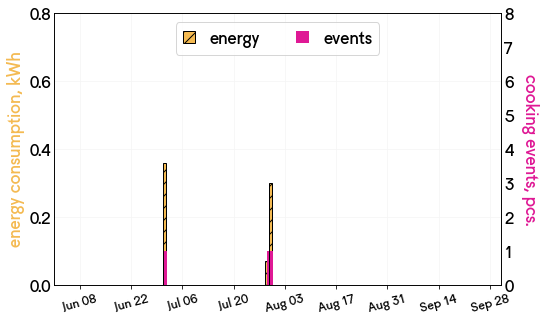

In [320]:

plt.rcParams['figure.figsize'] = [8, 5]

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user', 546328)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 6, 1), dt.date(2020, 10, 1)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=15)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/low_user_steady_events.png', dpi=200)
plt.show()

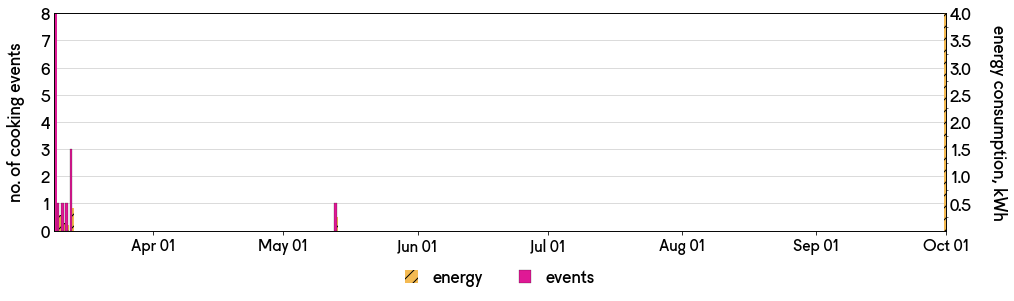

In [1685]:
plt.rcParams['figure.figsize'] = [16, 4]

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart(0,'user', 546308, 0)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,8)
ax2.set_ylim(0.001,4)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 8, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 10, 1), 8, color='#F4BA52', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['energy_gen']*2), alpha =1, color='#F4BA52', linewidth=0, label='energy', hatch="//", zorder=1, align = 'edge', width= 0.6)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['cooking_session'], alpha=1, color='#DF1995', label='events', zorder=3, linewidth=0.2, edgecolor='black', width= 0.6)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/low_user_honeysteady_events.png', dpi=200)
plt.show()

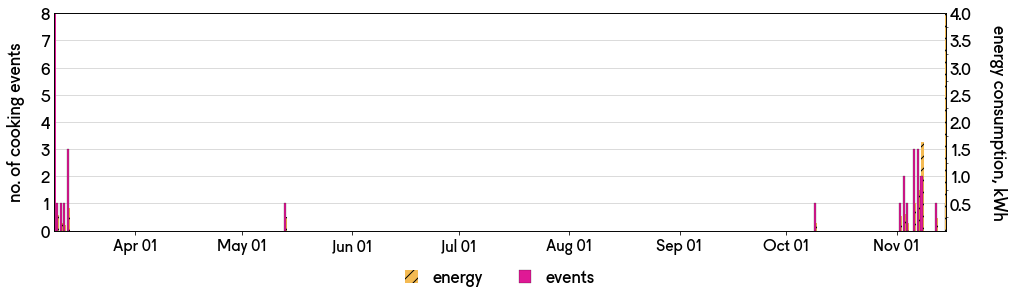

In [1683]:
plt.rcParams['figure.figsize'] = [16, 4]

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart(df_epc100_grouped, 'user', 546308, 0)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,8)
ax2.set_ylim(0.001,4)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 11, 15)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 8, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 11, 15), 8, color='#F4BA52', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['energy_gen']*2), alpha =1, color='#F4BA52', linewidth=0, label='energy', hatch="//", zorder=1, align = 'edge', width= 0.6)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['cooking_session'], alpha=1, color='#DF1995', label='events', zorder=3, linewidth=0.2, edgecolor='black', width= 0.6)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/low_user_honeysteady_events_with_tariff.png', dpi=200)
plt.show()

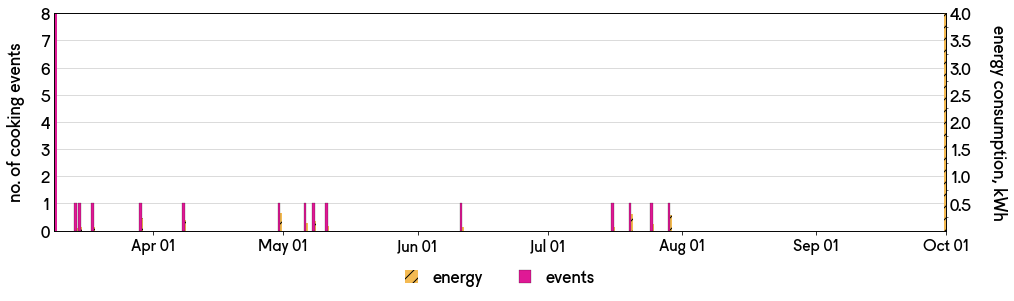

In [1687]:


plt.rcParams['figure.figsize'] = [16, 4]

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart(0,'user', 546333, 0)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,8)
ax2.set_ylim(0.001,4)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 8, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 10, 1), 8, color='#F4BA52', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['energy_gen']*2), alpha =1, color='#F4BA52', linewidth=0, label='energy', hatch="//", zorder=1, align = 'edge', width= 0.6)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['cooking_session'], alpha=1, color='#DF1995', label='events', zorder=3, linewidth=0.2, edgecolor='black', width= 0.6)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/medium_user_honeysteady_events.png', dpi=200)
plt.show()

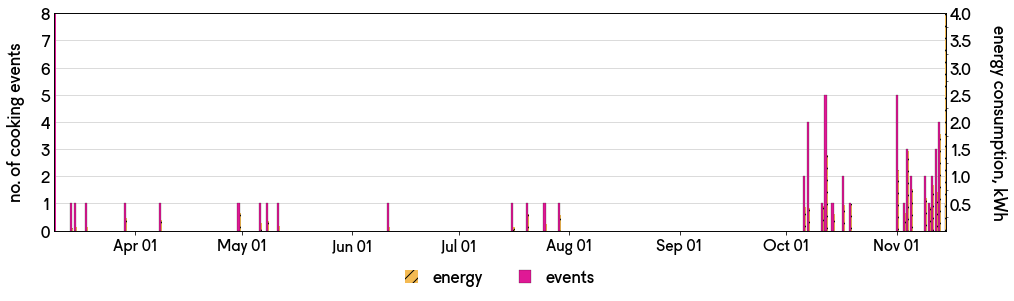

In [1682]:


plt.rcParams['figure.figsize'] = [16, 4]

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart(0,'user', 546333, 0)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,8)
ax2.set_ylim(0.001,4)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 11, 15)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 8, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 11, 15), 8, color='#F4BA52', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['energy_gen']*2), alpha =1, color='#F4BA52', linewidth=0, label='energy', hatch="//", zorder=1, align = 'edge', width= 0.6)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['cooking_session'], alpha=1, color='#DF1995', label='events', zorder=3, linewidth=0.2, edgecolor='black', width= 0.6)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/medium_user_honeysteady_events_tariff.png', dpi=200)
plt.show()

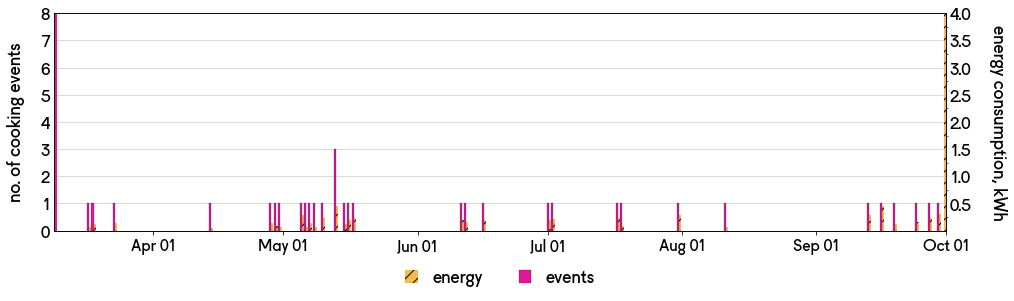

In [1686]:



plt.rcParams['figure.figsize'] = [16, 4]

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart(0,'user', 546316, 0)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,8)
ax2.set_ylim(0.001,4)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 8, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 10, 1), 8, color='#F4BA52', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['energy_gen']*2), alpha =1, color='#F4BA52', linewidth=0.4, label='energy', hatch="//", zorder=1, align = 'edge', width= 0.7)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['cooking_session'], alpha=1, color='#DF1995', label='events', zorder=3, linewidth=0.2, edgecolor='black', width= 0.5)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/high_user_honeysteady_events.png', dpi=200)
plt.show()

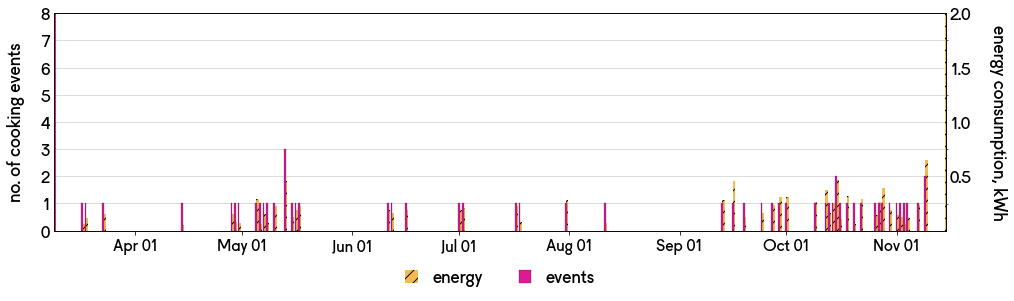

In [1869]:



plt.rcParams['figure.figsize'] = [16, 4]

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart(0,'user', 546316, 0)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,8)
ax2.set_ylim(0.001,2)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 11, 15)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 8, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 11, 15), 8, color='#F4BA52', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['energy_gen']*4), alpha =1, color='#F4BA52', linewidth=0.4, label='energy', hatch="//", zorder=1, align = 'edge', width= 0.7)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['cooking_session'], alpha=1, color='#DF1995', label='events', zorder=3, linewidth=0.2, edgecolor='black', width= 0.5)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/high_user_honeysteady_events_tariff.png', dpi=200)
plt.show()

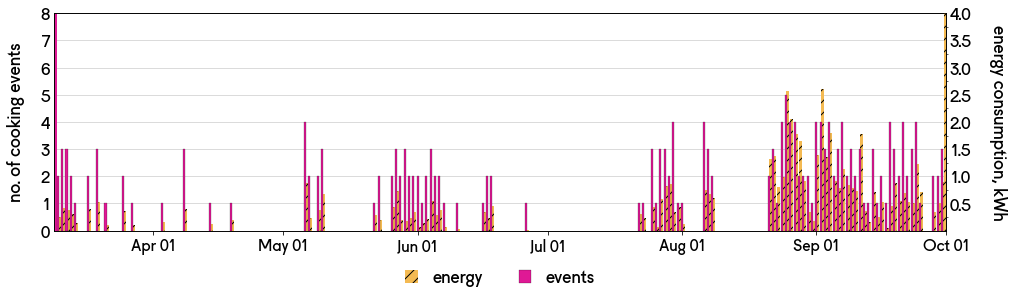

In [1677]:



plt.rcParams['figure.figsize'] = [16, 4]

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart(0,'user', 546375, 0)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,8)
ax2.set_ylim(0.001,4)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 8, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 10, 1), 8, color='#F4BA52', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['energy_gen']*2), alpha =1, color='#F4BA52', linewidth=0.4, label='energy', hatch="//", zorder=1, align = 'edge', width= 0.7)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['cooking_session'], alpha=1, color='#DF1995', label='events', zorder=3, linewidth=0.2, edgecolor='black', width= 0.5)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/top_user_honeysteady_events.png', dpi=200)
plt.show()

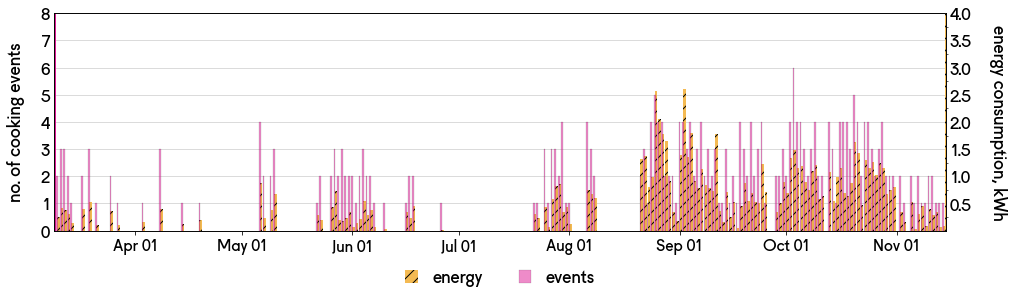

In [1868]:



plt.rcParams['figure.figsize'] = [16, 4]

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('df_epc100_grouped','user', 546375, 0)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,8)
ax2.set_ylim(0.001,4)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 11, 15)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 8, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 11, 15), 8, color='#F4BA52', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['energy_gen']*2), alpha =1, color='#F4BA52', linewidth=0.4, label='energy', hatch="//", zorder=1, align = 'edge', width= 0.7)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['cooking_session'], alpha=0.5, color='#DF1995', label='events', zorder=3, linewidth=0.2, edgecolor='black', width= 0.5)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/top_user_honeysteady_events_tariff.png', dpi=200)
plt.show()

In [1537]:
df_epc100_max

level_0  index  usage_rank  latest_energy            max_time  \
0         1      0           1           0.12 2020-11-17 18:15:00   
1         2      1           2           0.13 2020-11-17 15:25:00   
2         3      2           3           0.16 2020-11-20 01:35:00   
3         4      3           4           0.29 2020-11-16 09:30:00   
4         5      4           5           0.41 2020-11-20 11:50:00   
..      ...    ...         ...            ...                 ...   
95       96     79          80          29.81 2020-11-20 11:40:00   
96       97     96          97          62.27 2020-12-02 09:05:00   
97       98     80          81          30.08 2020-11-15 21:15:00   
98       99     95          96          59.76 2020-11-18 22:20:00   
99      100     99         100         148.35 2020-11-14 12:45:00   

              min_time  group  meter_number  session_index  energy_gen  \
0  2020-03-02 13:05:00    3.0           NaN            NaN         NaN   
1  2020-03-07 12:05:00    3.0           NaN            NaN         NaN   
2  2020-07-06 19:55:00    3.0           NaN            NaN         NaN   
3  2020-07-10 15:10:00    3.0           NaN            NaN         NaN   
4  2020-03-13 21:05:00    3.0           NaN            NaN         NaN   
..                 ...    ...           ...            ...         ...   
95 2020-03-05 16:30:00    1.0      546309.0          105.0       23.83   
96 2020-03-10 19:10:00    1.0      546307.0          180.0       49.47   
97 2020-03-02 12:05:00    1.0      546290.0          125.0       18.03   
98 2020-03-07 15:05:00    1.0      546336.0          176.0       46.01   
99 2020-03-05 19:30:00    1.0      546375.0          319.0       88.03   

    lost_energy  lost_energy_pct  lost_cooking_events  total_cooking_events  \
0           NaN         1.000000                 0.24                  0.24   
1           NaN         1.000000                 0.26                  0.26   
2           NaN         1.000000                 0.32                  0.32   
3           NaN         1.000000                 0.58                  0.58   
4           NaN         1.000000                 0.82                  0.82   
..          ...              ...                  ...                   ...   
95         5.98         0.200604                11.96                116.96   
96        12.80         0.205556                25.60                205.60   
97        12.05         0.400598                24.10                149.10   
98        13.75         0.230087                27.50                203.50   
99        60.32         0.406606               120.64                439.64   

    meter_number2  no_cooking_events      quantiles  
0          546288                0.0            NaN  
1          546304                0.0            NaN  
2          546370                0.0            NaN  
3          546293                0.0            NaN  
4          546346                0.0            NaN  
..            ...                ...            ...  
95         546309              105.0  (29.5, 206.0]  
96         546307              117.0  (29.5, 206.0]  
97         546290              121.0  (29.5, 206.0]  
98         546336              153.0  (29.5, 206.0]  
99         546375              206.0  (29.5, 206.0]  

[100 rows x 17 columns]

In [ ]:



plt.rcParams['figure.figsize'] = [16, 4]

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user', 546316, 0)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,8)
ax2.set_ylim(0.001,0.8)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 8, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 10, 1), 8, color='#F4BA52', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)


ax1.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['energy_gen']*10), alpha =1, color='#F4BA52', linewidth=0, label='energy', hatch="//", zorder=1, align = 'edge', width= 0.6)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['cooking_session'], alpha=1, color='#DF1995', label='events', zorder=3, linewidth=0.2, edgecolor='black', width= 0.6)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/high_user_honeysteady_events.png', dpi=200)
plt.show()

In [773]:
df_epc100_grouped_statistics_region

usage_rank  energy_gen  session_index  cooking_cost  cooking_time  group
0            7        0.59              3        1180.0         195.0    3.0
1            8        0.34              1         680.0          95.0    3.0
2            9        0.38              4         760.0          25.0    3.0
3           11        0.99              5        1980.0         145.0    3.0
4           12        0.71              3        1420.0          65.0    3.0
..         ...         ...            ...           ...           ...    ...
85          96       46.01            176       92020.0        7385.0    1.0
86          97       49.47            180       98940.0        6060.0    1.0
87          98       50.59            110      101180.0        5595.0    1.0
88          99       65.46            218      130920.0        7655.0    1.0
89         100       88.03            319      176060.0       11705.0    1.0

[90 rows x 6 columns]

In [887]:
df_epc100_grouped_statistics = all_meter_bar_chart('time', 0, 'Bezi')
df_epc100_grouped_statistics  = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)

In [888]:
df_epc100_grouped_statistics

timestamp  energy_gen  cooking_session
0    2020-03-09        0.34                1
1    2020-03-10        1.37                7
2    2020-03-11        3.26               20
3    2020-03-12        3.89               20
4    2020-03-13        2.42               18
..          ...         ...              ...
250  2020-11-28        5.91               11
251  2020-11-29        5.26                9
252  2020-11-30        6.57               11
253  2020-12-01        7.13               12
254  2020-12-02        3.07                4

[255 rows x 3 columns]

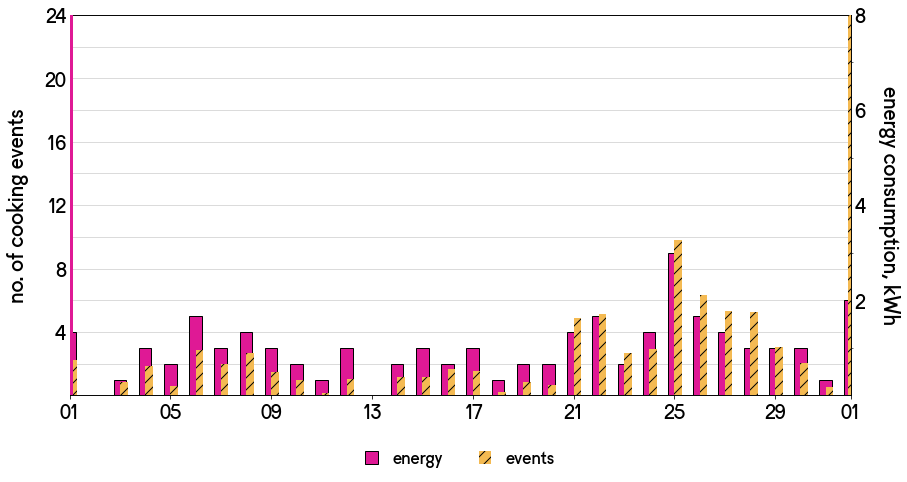

In [1109]:

plt.rcParams['figure.figsize'] = [14, 7]

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=22)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('time', 0, 'Bezi')
#df_epc100_grouped_statistics = df_epc100_grouped_statistics.loc [df_epc100_grouped_statistics['location'] =='Mavota'] # <- look at info of specific meter
df_epc100_grouped_statistics  = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_power = 8

ax2.set_ylim(0.001,max_power)
ax1.set_ylim(0.001,24)
ax1.set_xlim([dt.date(2020, 8, 1), dt.date(2020, 9, 1)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax2.bar(dt.date(2020, 8, 1), max_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=11)
ax2.bar(dt.date(2020, 9, 1), max_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//", zorder=10)

ax2.bar(df_epc100_grouped_statistics['timestamp'], (df_epc100_grouped_statistics['energy_gen']), alpha = 1, color='#F4BA52', linewidth=0, hatch="//", edgecolor='black', label='events', zorder=1, align = 'edge', width=0.3)
ax1.bar(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['cooking_session'], alpha=1, color='#DF1995', label='energy', zorder=3, linewidth=1, edgecolor='black', width=0.5)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/low_bezi_month_events.png', dpi=200)
plt.show()

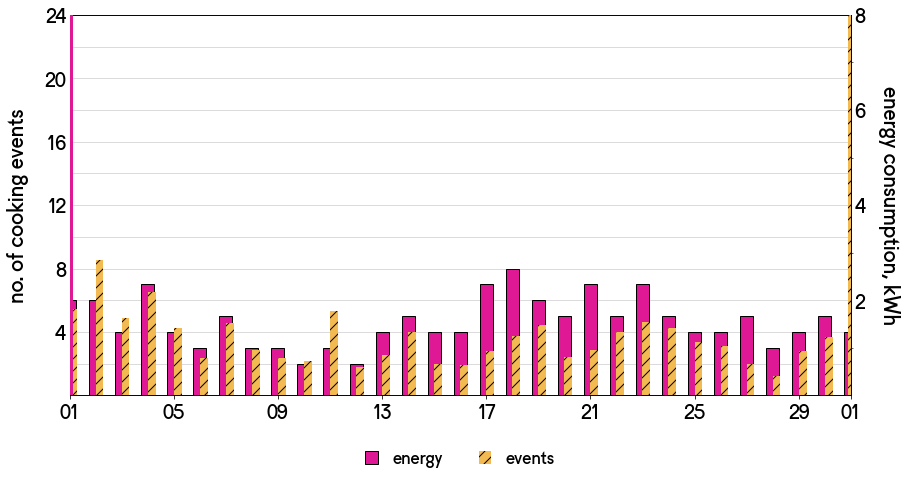

In [1110]:
#September

plt.rcParams['figure.figsize'] = [14, 7]

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=22)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('time', 0, 'Bezi')
#df_epc100_grouped_statistics = df_epc100_grouped_statistics.loc [df_epc100_grouped_statistics['location'] =='Mavota'] # <- look at info of specific meter
df_epc100_grouped_statistics  = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_power = 8

ax2.set_ylim(0.001,max_power)
ax1.set_ylim(0.001,24)
ax1.set_xlim([dt.date(2020, 9, 1), dt.date(2020, 10, 1)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax2.bar(dt.date(2020, 9, 1), max_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=11)
ax2.bar(dt.date(2020, 10, 1), max_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//", zorder=10)

ax2.bar(df_epc100_grouped_statistics['timestamp'], (df_epc100_grouped_statistics['energy_gen']), alpha = 1, color='#F4BA52', linewidth=0, hatch="//", edgecolor='black', label='events', zorder=1, align = 'edge', width=0.3)
ax1.bar(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['cooking_session'], alpha=1, color='#DF1995', label='energy', zorder=3, linewidth=1, edgecolor='black', width=0.5)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/medium_bezi_month_events.png', dpi=200)
plt.show()

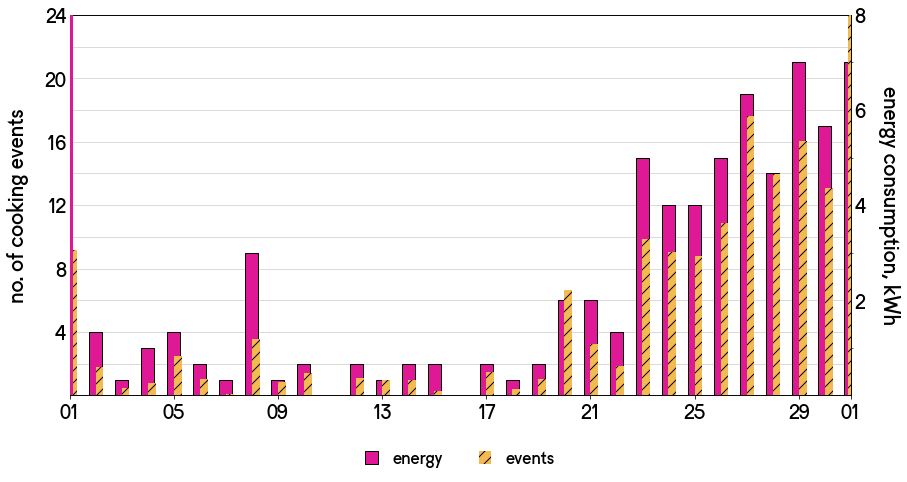

In [1111]:
#April
#September

plt.rcParams['figure.figsize'] = [14, 7]

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=22)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics = all_meter_bar_chart('time', 0, 'Bezi')
#df_epc100_grouped_statistics = df_epc100_grouped_statistics.loc [df_epc100_grouped_statistics['location'] =='Mavota'] # <- look at info of specific meter
df_epc100_grouped_statistics  = df_epc100_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_epc100_grouped_statistics.reset_index(inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_power = 8

ax2.set_ylim(0.001,max_power)
ax1.set_ylim(0.001,24)
ax1.set_xlim([dt.date(2020, 4, 1), dt.date(2020, 5, 1)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax2.bar(dt.date(2020, 4, 1), max_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=11)
ax2.bar(dt.date(2020, 5, 1), max_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//", zorder=10)

ax2.bar(df_epc100_grouped_statistics['timestamp'], (df_epc100_grouped_statistics['energy_gen']), alpha = 1, color='#F4BA52', linewidth=0, hatch="//", edgecolor='black', label='events', zorder=1, align = 'edge', width=0.3)
ax1.bar(df_epc100_grouped_statistics['timestamp'], df_epc100_grouped_statistics['cooking_session'], alpha=1, color='#DF1995', label='energy', zorder=3, linewidth=1, edgecolor='black', width=0.5)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
#ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/high_bezi_month_events.png', dpi=200)
plt.show()

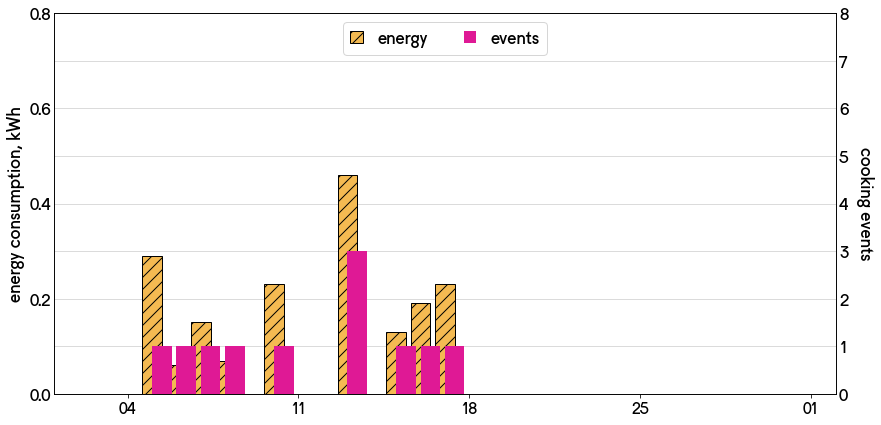

In [855]:

plt.rcParams['figure.figsize'] = [14, 7]

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_region = all_meter_bar_chart('time', 0)
df_epc100_grouped_statistics_region = df_epc100_grouped_statistics_region.loc [df_epc100_grouped_statistics_region['location'] =='Bezi'] # <- look at info of specific meter
df_epc100_grouped_statistics_region = df_epc100_grouped_statistics_region.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_epc100_grouped_statistics_region.reset_index(inplace=True)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 5, 1), dt.date(2020, 6, 2)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 1), 1, color='#F4BA52', alpha = 1.0, label=None, width = 0.5, hatch="//")
ax1.bar(dt.date(2020, 4, 2), 1, color='#DF1995', alpha = 1.0, label=None, width = 0.5)

ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = 'black')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = 'black')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/medium_bezi_month_events.png', dpi=200)
plt.show()

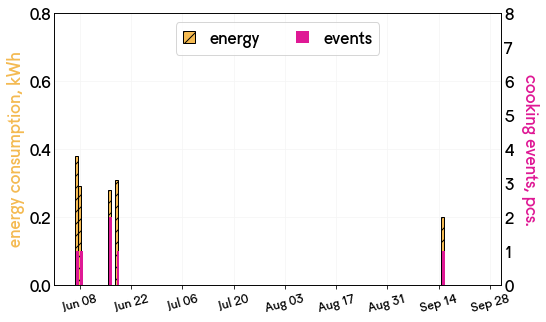

In [321]:
plt.rcParams['figure.figsize'] = [8, 5]

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user', 546297)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 6, 1), dt.date(2020, 10, 1)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=15)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/medium_user_steady_events.png', dpi=200)
plt.show()


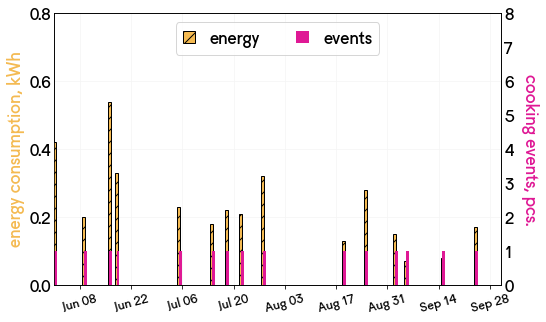

In [322]:
plt.rcParams['figure.figsize'] = [8, 5]

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user', 546355)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 6, 1), dt.date(2020, 10, 1)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=15)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/high_user_steady_events.png', dpi=200)
plt.show()


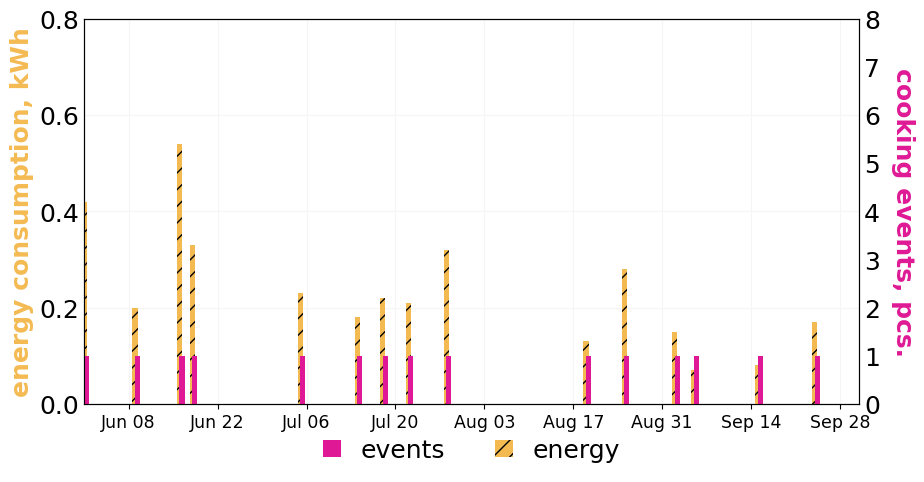

In [300]:
plt.rcParams['figure.figsize'] = [10, 5]

plt.rc('xtick', labelsize=12.5)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user', 546355)
#low_user_steady_state = df_epc100_grouped_statistics.loc [ df_epc100 [ 'meter_number' ] == 546328 ] # <- look at info of specific meter
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index >= pd.to_datetime('2020-06-01 00:00:00')]
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index < pd.to_datetime('2020-10-01 00:00:00')]


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 6, 1), dt.date(2020, 10, 1)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=2, label='events', zorder=1, align = 'edge')
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3,hatch="//")

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/high_user_steady_events.png', dpi=200)
plt.show()

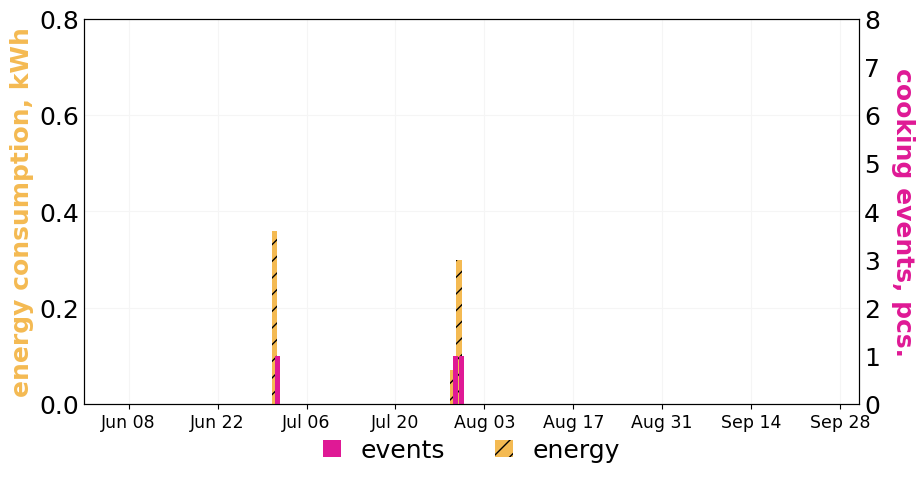

In [301]:

plt.rcParams['figure.figsize'] = [10, 5]

plt.rc('xtick', labelsize=12.5)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user', 546328)
#low_user_steady_state = df_epc100_grouped_statistics.loc [ df_epc100 [ 'meter_number' ] == 546328 ] # <- look at info of specific meter
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index >= pd.to_datetime('2020-06-01 00:00:00')]
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index < pd.to_datetime('2020-10-01 00:00:00')]


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 6, 1), dt.date(2020, 10, 1)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=2, label='events', zorder=1, align = 'edge')
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//")

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/low_user_steady_events.png', dpi=200)
plt.show()

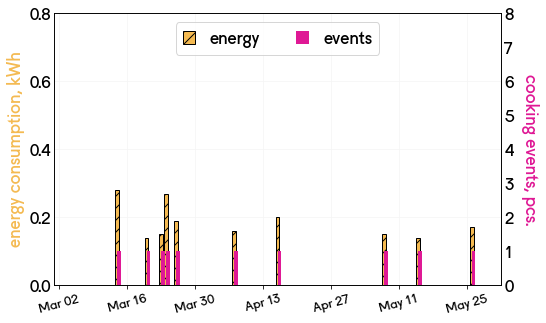

In [325]:
 

plt.rcParams['figure.figsize'] = [8, 5]

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user', 546320)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 3, 1), dt.date(2020, 6, 1)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=15)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/medium_user_honeymoon_events.png', dpi=200)
plt.show()

    

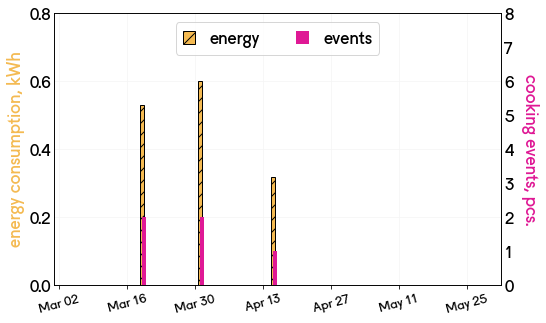

In [326]:
 
plt.rcParams['figure.figsize'] = [8, 5]

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user', 546345)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 3, 1), dt.date(2020, 6, 1)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=15)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/low_user_honeymoon_events.png', dpi=200)
plt.show()


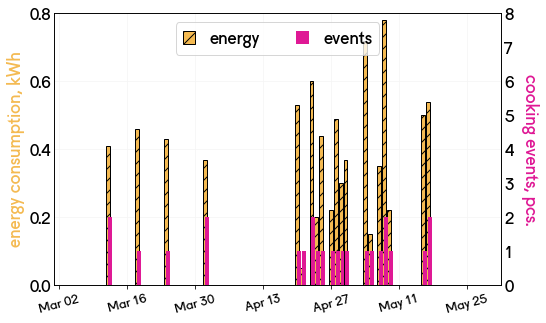

In [327]:


plt.rcParams['figure.figsize'] = [8, 5]

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user', 546328)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 3, 1), dt.date(2020, 6, 1)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=15)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/high_user_honeymoon_events.png', dpi=200)
plt.show()

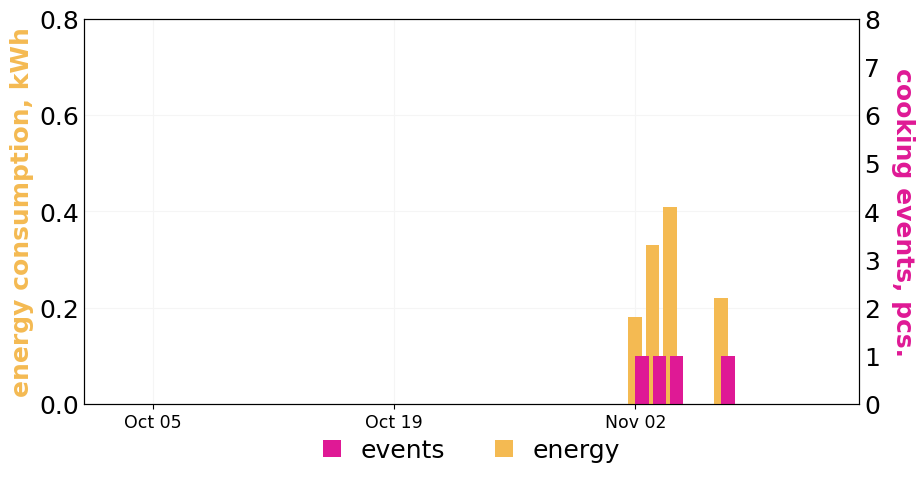

In [289]:
import matplotlib                                      
import datetime as dt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)  ##
import matplotlib.pyplot as plt                         ##
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU ##
import matplotlib.dates as mdates                       ##
import matplotlib.ticker as ticker                      ##
import matplotlib.patches as mpatches                   ##
import pylab                                            ##
from pylab import rcParams                              ##

plt.rcParams['figure.figsize'] = [10, 5]

plt.rc('xtick', labelsize=12.5)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user',  546319)
#low_user_steady_state = df_epc100_grouped_statistics.loc [ df_epc100 [ 'meter_number' ] == 546328 ] # <- look at info of specific meter
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index >= pd.to_datetime('2020-06-01 00:00:00')]
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index < pd.to_datetime('2020-10-01 00:00:00')]


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 10, 1), dt.date(2020, 11, 15)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1.0, color='#DF1995', linewidth=2, label='events', zorder=1, align = 'edge')
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3)

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/low_user_tariff_events.png', dpi=200)
plt.show()

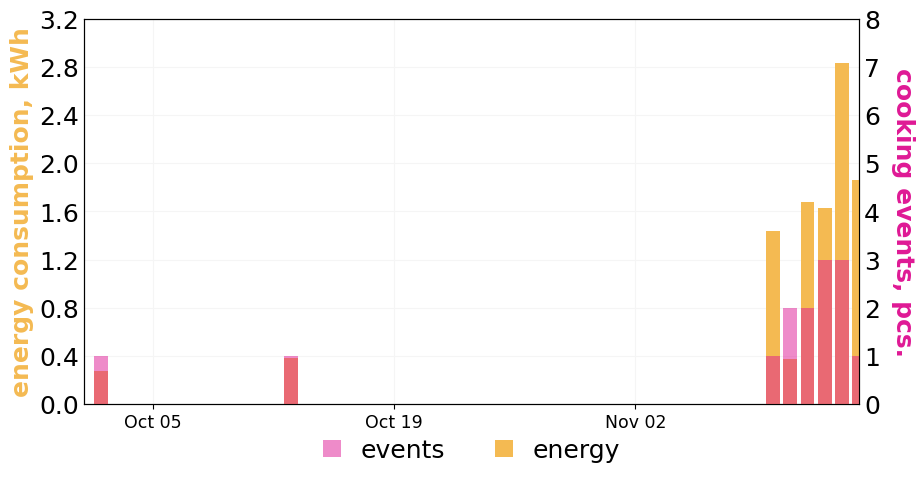

In [285]:
import matplotlib                                      
import datetime as dt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)  ##
import matplotlib.pyplot as plt                         ##
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU ##
import matplotlib.dates as mdates                       ##
import matplotlib.ticker as ticker                      ##
import matplotlib.patches as mpatches                   ##
import pylab                                            ##
from pylab import rcParams                              ##

plt.rcParams['figure.figsize'] = [10, 5]

plt.rc('xtick', labelsize=12.5)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user',  546301)
#low_user_steady_state = df_epc100_grouped_statistics.loc [ df_epc100 [ 'meter_number' ] == 546328 ] # <- look at info of specific meter
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index >= pd.to_datetime('2020-06-01 00:00:00')]
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index < pd.to_datetime('2020-10-01 00:00:00')]


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,3.2)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 10, 1), dt.date(2020, 11, 15)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 0.5, color='#DF1995', linewidth=2, label='events', zorder=1)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3)

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.4))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/medium_user_tariff_events.png', dpi=200)
plt.show()

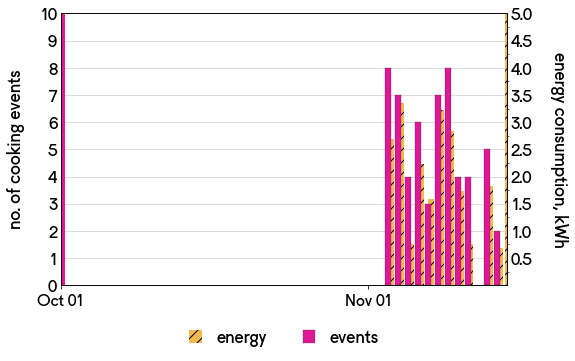

In [1119]:
#User 546297
#Redued tariff 10-01 to 11-15



plt.rcParams['figure.figsize'] = [8, 5]

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user', 546297, 0)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,10)
ax2.set_ylim(0.001,5)
ax1.set_xlim([dt.date(2020, 10, 1), dt.date(2020, 11, 15)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(dt.date(2020, 10, 1), 10, color='#DF1995', alpha = 1.0, label=None, width = 0.75)
ax1.bar(dt.date(2020, 11, 15), 10, color='#F4BA52', alpha = 1.0, label=None, width = 0.5, hatch="//", zorder=8)

ax1.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['energy_gen']*2), alpha =1, color='#F4BA52', linewidth=0, label='energy', hatch="//", zorder=1, align = 'edge', width= 0.6)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['cooking_session'], alpha=1, color='#DF1995', label='events', zorder=3, linewidth=0.2, edgecolor='black', width= 0.6)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/tariff_explosion_546297_events.png', dpi=200)
plt.show()

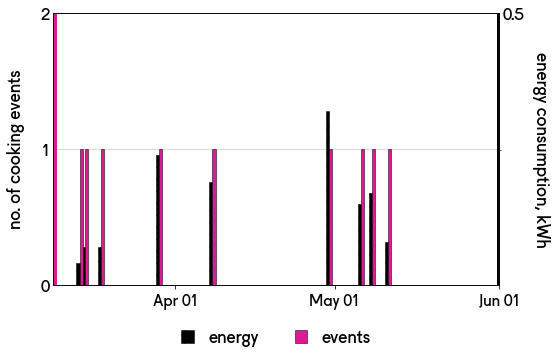

In [1867]:
#User 546297
#Redued tariff 10-01 to 11-15



plt.rcParams['figure.figsize'] = [8, 5]

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('honeymoon','user', 546333, 0)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,2.0)
ax2.set_ylim(0.001,0.5)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 6, 1)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(dt.date(2020, 3, 9), 10, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 6, 1), 10, color='black', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)

ax1.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['energy_gen']*4), alpha =1, color='black', linewidth=0.5, edgecolor='black', label='energy', hatch="//", zorder=1, align = 'edge', width= -0.6)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['cooking_session'], alpha=1, color='#DF1995', label='events', zorder=3, linewidth=0.5, align ='edge', edgecolor='black', width= +0.6)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/honeymoon_546333.png', dpi=200)
plt.show()

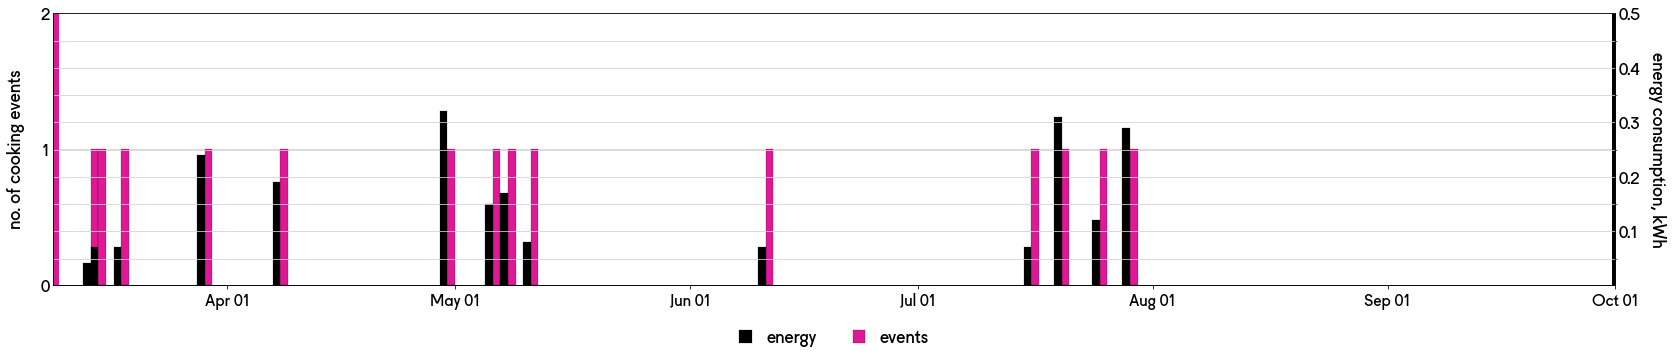

In [2296]:
#User 546297
#Redued tariff 10-01 to 11-15



plt.rcParams['figure.figsize'] = [28, 5]

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=17) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('honeymoon','user', 546333, 0)

#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,2.0)
ax2.set_ylim(0.001,0.5)
ax1.set_xlim([dt.date(2020, 3, 9), dt.date(2020, 10, 1)])

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(axis='y', which='both', color='lightgray')

ax1.bar(dt.date(2020, 3, 9), 10, color='#DF1995', alpha = 1.0, label=None, width = 1.5)
ax1.bar(dt.date(2020, 10, 1), 10, color='black', alpha = 1.0, label=None, width = 1, hatch="//", zorder=8)

ax1.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['energy_gen']*4), alpha =1, color='black', linewidth=0.2, edgecolor='black', label='energy', hatch="//", zorder=2, align = 'edge', width= -1)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['cooking_session'], alpha=1, color='#DF1995', label='events', linewidth=0.2, align ='edge', edgecolor='black', width= +1, zorder=1)

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

#plt.title('Honeymoon', size=30)
#plt.title('Honeymoon', size=12)

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/honeysteady_546333.png', dpi=200)
plt.show()

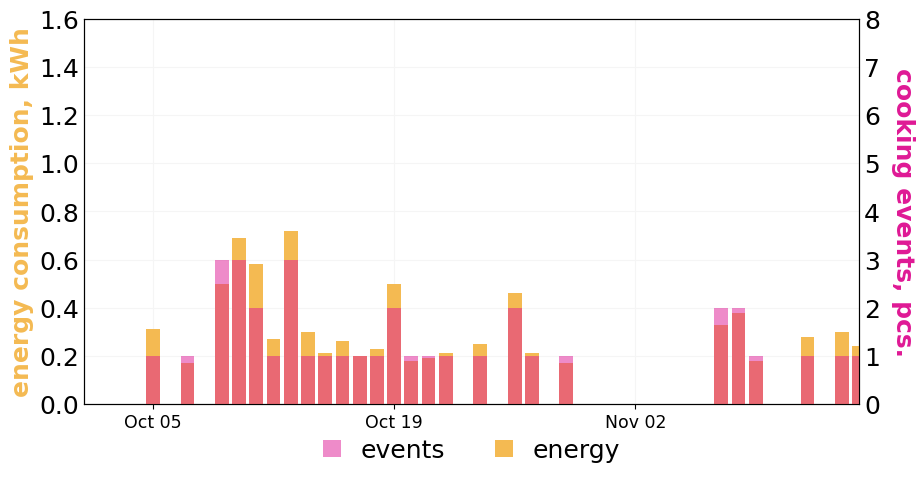

In [264]:
import matplotlib                                      
import datetime as dt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)  ##
import matplotlib.pyplot as plt                         ##
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU ##
import matplotlib.dates as mdates                       ##
import matplotlib.ticker as ticker                      ##
import matplotlib.patches as mpatches                   ##
import pylab                                            ##
from pylab import rcParams                              ##

plt.rcParams['figure.figsize'] = [10, 5]

plt.rc('xtick', labelsize=12.5)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user',  546323)
#low_user_steady_state = df_epc100_grouped_statistics.loc [ df_epc100 [ 'meter_number' ] == 546328 ] # <- look at info of specific meter
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index >= pd.to_datetime('2020-06-01 00:00:00')]
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index < pd.to_datetime('2020-10-01 00:00:00')]


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,1.6)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 10, 1), dt.date(2020, 11, 15)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 0.5, color='#DF1995', linewidth=2, label='events', zorder=1)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3)

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/high_user_tariff_events.png', dpi=200)
plt.show()

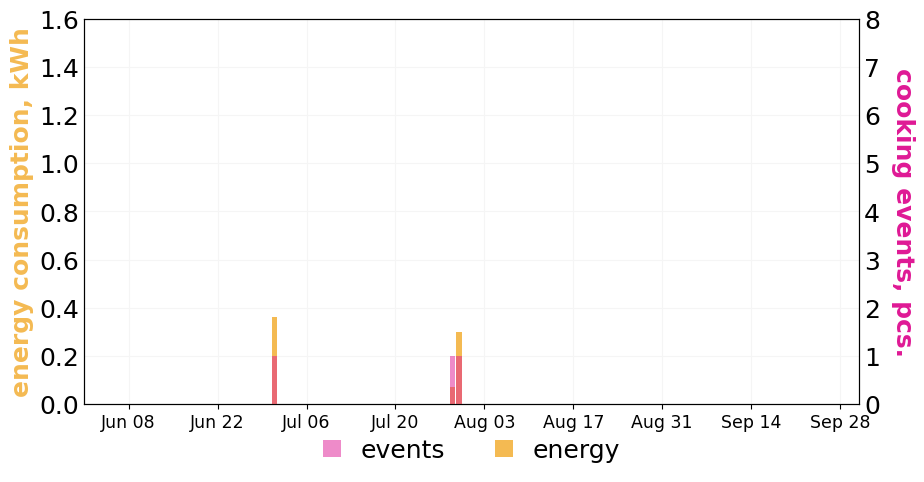

In [266]:

plt.rcParams['figure.figsize'] = [10, 5]

plt.rc('xtick', labelsize=12.5)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user',  546328)
#low_user_steady_state = df_epc100_grouped_statistics.loc [ df_epc100 [ 'meter_number' ] == 546328 ] # <- look at info of specific meter
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index >= pd.to_datetime('2020-06-01 00:00:00')]
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index < pd.to_datetime('2020-10-01 00:00:00')]


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,1.6)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 6, 1), dt.date(2020, 10, 1)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 0.5, color='#DF1995', linewidth=2, label='events', zorder=1)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3)

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/low_user_steady.png', dpi=200)
plt.show()

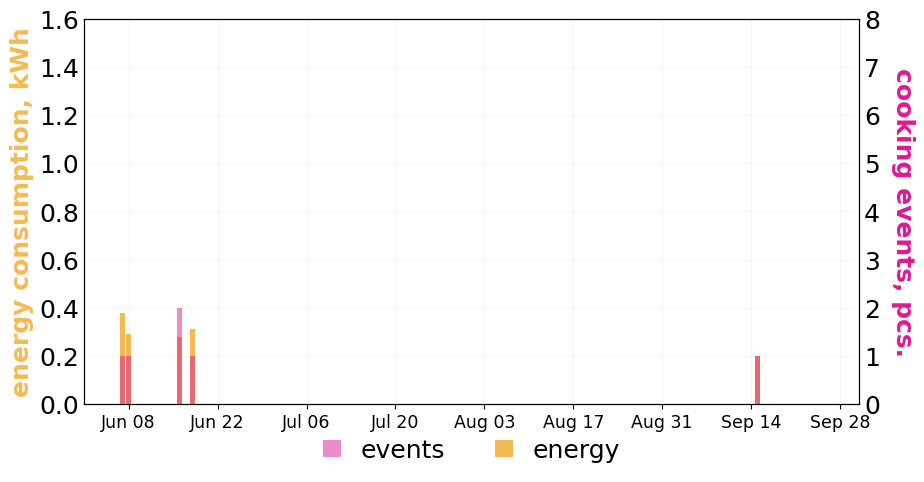

In [267]:
plt.rcParams['figure.figsize'] = [10, 5]

plt.rc('xtick', labelsize=12.5)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user',  546297)
#low_user_steady_state = df_epc100_grouped_statistics.loc [ df_epc100 [ 'meter_number' ] == 546328 ] # <- look at info of specific meter
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index >= pd.to_datetime('2020-06-01 00:00:00')]
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index < pd.to_datetime('2020-10-01 00:00:00')]


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,1.6)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 6, 1), dt.date(2020, 10, 1)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 0.5, color='#DF1995', linewidth=2, label='events', zorder=1)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3)

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/medium_user_steady.png', dpi=200)
plt.show()

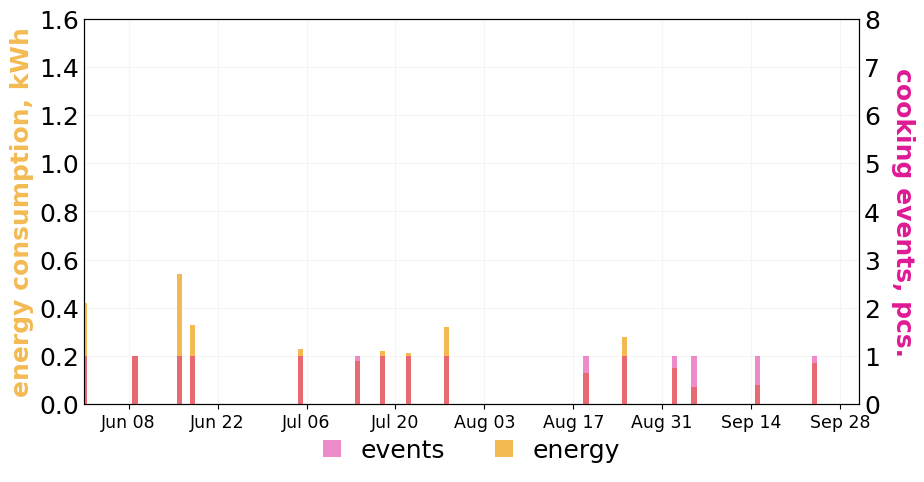

In [268]:
plt.rcParams['figure.figsize'] = [10, 5]

plt.rc('xtick', labelsize=12.5)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=18)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

df_epc100_grouped_statistics_user = all_meter_bar_chart('user',  546355)
#low_user_steady_state = df_epc100_grouped_statistics.loc [ df_epc100 [ 'meter_number' ] == 546328 ] # <- look at info of specific meter
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index >= pd.to_datetime('2020-06-01 00:00:00')]
#low_user_steady_state = low_user_steady_state[low_user_steady_state.index < pd.to_datetime('2020-10-01 00:00:00')]


#plotting

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_ylim(0,1.6)
ax2.set_ylim(0,8)
ax1.set_xlim([dt.date(2020, 6, 1), dt.date(2020, 10, 1)])

ax1.grid(True, which='major', color='whitesmoke')
ax2.grid(False)
ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 0.5, color='#DF1995', linewidth=2, label='events', zorder=1)
ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3)

ax2.set_ylabel('cooking events, pcs.', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = '#DF1995')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = '#F4BA52')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines2 + lines, labels2 + labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/high_user_steady.png', dpi=200)
plt.show()

In [685]:
df_cs_grouped_statistics

timestamp  group  energy_gen  cooking_session  cooking_cost  cooking_time  \
0           0    1.0        2.68                8        5360.0         320.0   
1           0    2.0        1.27               10        2540.0         205.0   
2           1    1.0        0.13                2         260.0          25.0   
3           2    1.0        0.37                1         740.0          25.0   
4           2    2.0        0.07                1         140.0           5.0   
..        ...    ...         ...              ...           ...           ...   
56         22    1.0       11.96               54       23920.0        1385.0   
57         22    3.0        0.21                1         420.0          15.0   
58         23    2.0        2.60               16        5200.0         310.0   
59         23    1.0        4.94               24        9880.0         695.0   
60         23    3.0        0.42                2         840.0          40.0   

    power_mean  quantiles  
0     4.638543          0  
1     4.071455          0  
2     0.660000          0  
3     0.888000          0  
4     0.840000          0  
..         ...        ...  
56   32.602776          3  
57    0.840000          3  
58   10.008095          3  
59   11.984322          3  
60    1.260000          3  

[61 rows x 8 columns]

In [1216]:
df_cs_grouped_statistics = all_meter_bar_chart('hour', 0, 0)

In [1220]:
df_cs_grouped_statistics

timestamp  group  energy_gen  cooking_session  cooking_cost  cooking_time  \
0           0    1.0        2.68                8        5360.0         320.0   
1           0    2.0        1.27               10        2540.0         205.0   
2           1    1.0        0.13                2         260.0          25.0   
3           2    1.0        0.37                1         740.0          25.0   
4           2    2.0        0.07                1         140.0           5.0   
..        ...    ...         ...              ...           ...           ...   
56         22    1.0       11.96               54       23920.0        1385.0   
57         22    3.0        0.21                1         420.0          15.0   
58         23    2.0        2.60               16        5200.0         310.0   
59         23    1.0        4.94               24        9880.0         695.0   
60         23    3.0        0.42                2         840.0          40.0   

    power_mean  
0     4.638543  
1     4.071455  
2     0.660000  
3     0.888000  
4     0.840000  
..         ...  
56   32.602776  
57    0.840000  
58   10.008095  
59   11.984322  
60    1.260000  

[61 rows x 7 columns]

In [1272]:

df_cs_grouped_statistics['cooking_pct'] = df_cs_grouped_statistics.cooking_session/df_cs_grouped_statistics.cooking_session.sum()
df_cs_grouped_statistics

timestamp  energy_gen  cooking_session  cooking_pct
0           0        3.95               18     0.004235
1           1        0.13                2     0.000471
2           2        0.44                2     0.000471
3           3        0.31                1     0.000235
4           4        0.98                5     0.001176
5           5        0.92                5     0.001176
6           6        6.39               33     0.007765
7           7       30.95               91     0.021412
8           8       79.59              292     0.068706
9           9       81.00              338     0.079529
10         10       71.75              309     0.072706
11         11       72.82              290     0.068235
12         12       88.16              317     0.074588
13         13       79.71              300     0.070588
14         14       51.85              196     0.046118
15         15       40.07              152     0.035765
16         16       36.43              150     0.035294
17         17       50.77              200     0.047059
18         18       83.67              293     0.068941
19         19      154.90              573     0.134824
20         20       93.43              418     0.098353
21         21       28.83              150     0.035294
22         22       15.33               73     0.017176
23         23        7.96               42     0.009882

energy_gen  cooking_time
session_index                          
1                    0.14          10.0
2                    0.22          65.0
3                    0.09          20.0
4                    0.21          15.0
5                    0.13          10.0
...                   ...           ...
4246                 0.34          80.0
4247                 0.04          10.0
4248                 0.34         155.0
4249                 0.54          50.0
4250                 1.81         250.0

[3824 rows x 2 columns]

In [2154]:
df_overview = df_whole.groupby(pd.cut(df_whole['energy_gen'],\
                                                         [0,0.1,0.2,0.3,0.4,0.5,0.8,1,2])).agg({'session_index':'nunique','cooking_time':'mean'})
#df_overview.sort_values(by='cooking_time',ascending=True,inplace=True)
df_overview

KeyError: 'energy_gen'

In [1457]:
df_overview = df_whole.groupby(pd.cut(df_whole['energy_gen'],50)).agg({'session_index':'nunique','cooking_time':'mean'})
#df_overview.sort_values(by='cooking_time',ascending=True,inplace=True)
df_overview

session_index  cooking_time
energy_gen                                    
(0.00784, 0.0532]            184      8.804348
(0.0532, 0.0964]             484     12.396694
(0.0964, 0.14]               364     22.541209
(0.14, 0.183]                614     26.042345
(0.183, 0.226]               419     36.789976
(0.226, 0.269]               408     40.355392
(0.269, 0.312]               419     44.737470
(0.312, 0.356]               269     48.847584
(0.356, 0.399]               176     52.812500
(0.399, 0.442]               139     66.115108
(0.442, 0.485]                83     64.518072
(0.485, 0.528]                74     72.094595
(0.528, 0.572]                58     83.965517
(0.572, 0.615]                19     86.578947
(0.615, 0.658]                19     86.578947
(0.658, 0.701]                25     82.000000
(0.701, 0.744]                12    102.916667
(0.744, 0.788]                14     83.571429
(0.788, 0.831]                 7     90.714286
(0.831, 0.874]                 6     92.500000
(0.874, 0.917]                 5     93.000000
(0.917, 0.96]                  8    158.750000
(0.96, 1.004]                  5     86.000000
(1.004, 1.047]                 1    100.000000
(1.047, 1.09]                  0           NaN
(1.09, 1.133]                  2    105.000000
(1.133, 1.176]                 1    125.000000
(1.176, 1.22]                  1    110.000000
(1.22, 1.263]                  2    110.000000
(1.263, 1.306]                 1    240.000000
(1.306, 1.349]                 0           NaN
(1.349, 1.392]                 0           NaN
(1.392, 1.436]                 1    130.000000
(1.436, 1.479]                 1     95.000000
(1.479, 1.522]                 0           NaN
(1.522, 1.565]                 0           NaN
(1.565, 1.608]                 0           NaN
(1.608, 1.652]                 0           NaN
(1.652, 1.695]                 0           NaN
(1.695, 1.738]                 0           NaN
(1.738, 1.781]                 0           NaN
(1.781, 1.824]                 1    250.000000
(1.824, 1.868]                 0           NaN
(1.868, 1.911]                 0           NaN
(1.911, 1.954]                 1    280.000000
(1.954, 1.997]                 0           NaN
(1.997, 2.04]                  0           NaN
(2.04, 2.084]                  0           NaN
(2.084, 2.127]                 0           NaN
(2.127, 2.17]                  1    180.000000

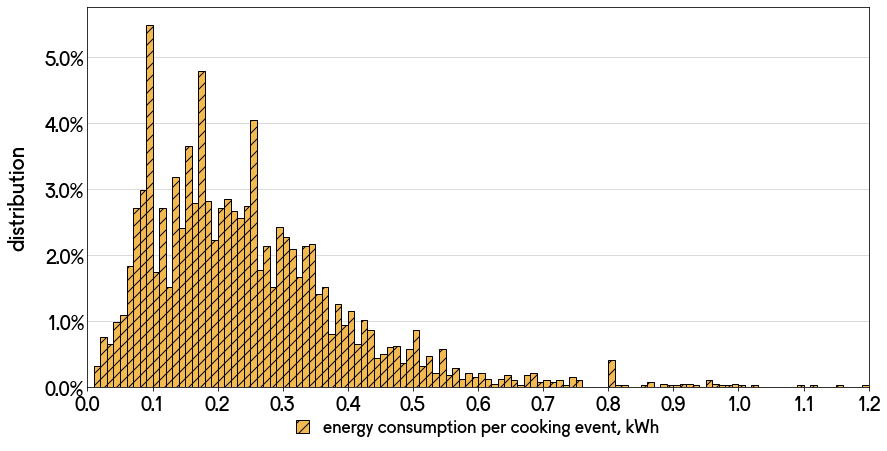

In [1890]:

plt.rcParams['figure.figsize'] = [14, 7]

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=22)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx() 

ax1.set_xlim(0.00,1.2)

#ax2.set_ylim(0.00,2)
#ax1.set_ylim(0.00,400)

ax1.grid(axis='y', which='both', color='lightgray')
#ax2.grid(False)

#ax2.bar(dt.date(2020, 4, 1), max_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=11)
#ax2.bar(dt.date(2020, 5, 1), max_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//", zorder=10)
cuts = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,\
        0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,\
        0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,\
        0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1,1.01,1.02,1.03,1.04,1.05,\
        1.06,1.07,1.08,1.09,1.1,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.2,2,10] 
df_overview = df_whole.groupby(pd.cut(df_whole['energy_gen'],\
                                                         cuts)).agg({'session_index':'nunique','cooking_time':'mean'})
#df_overview.sort_values(by='cooking_time',ascending=True,inplace=True)
df_overview.reset_index(inplace=True)
df_overview['xaxis'] = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,\
        0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,\
        0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,\
        0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1,1.01,1.02,1.03,1.04,1.05,\
        1.06,1.07,1.08,1.09,1.1,1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.2,2,10]          
ax1.bar(df_overview.xaxis, df_overview.session_index/df_overview.session_index.sum()*100, alpha = 1, color='#F4BA52', hatch="//", edgecolor='black', linewidth=1, label='energy consumption per cooking event, kWh', zorder=1, align = 'edge', width=0.01)
#ax1.bar(df_overview.index, df_overview.cooking_time, alpha=1, color='#DF1995', label='time', zorder=3, linewidth=0, width=0.2)

#ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('distribution', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

fmt = '%.1f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(100))
#ax1.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
#ax2.tick_params(axis='y',length=0, zorder=2)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
#ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_energy.png'); plt.show()

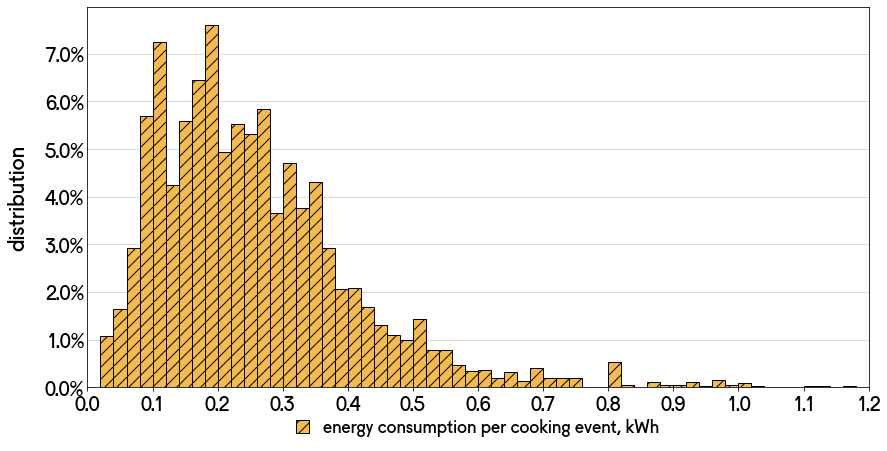

In [1894]:

plt.rcParams['figure.figsize'] = [14, 7]

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=22)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx() 

ax1.set_xlim(0.00,1.2)

#ax2.set_ylim(0.00,2)
#ax1.set_ylim(0.00,400)

ax1.grid(axis='y', which='both', color='lightgray')
#ax2.grid(False)

#ax2.bar(dt.date(2020, 4, 1), max_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=11)
#ax2.bar(dt.date(2020, 5, 1), max_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//", zorder=10)
cuts = [0,0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.2,\
        0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48,0.5,\
        0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7,0.72,0.74,\
        0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98,1,1.02,1.04,\
        1.06,1.08,1.1,1.12,1.14,1.16,1.18,1.2,2,10] 
df_overview = df_whole.groupby(pd.cut(df_whole['energy_gen'],\
                                                         cuts)).agg({'session_index':'nunique','cooking_time':'mean'})
#df_overview.sort_values(by='cooking_time',ascending=True,inplace=True)
df_overview.reset_index(inplace=True)
df_overview['xaxis'] = [0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.2,\
        0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48,0.5,\
        0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7,0.72,0.74,\
        0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96,0.98,1,1.02,1.04,\
        1.06,1.08,1.1,1.12,1.14,1.16,1.18,1.2,2,10]         
ax1.bar(df_overview.xaxis, df_overview.session_index/df_overview.session_index.sum()*100, alpha = 1, color='#F4BA52', hatch="//", edgecolor='black', linewidth=1, label='energy consumption per cooking event, kWh', zorder=1, align = 'edge', width=0.02)
#ax1.bar(df_overview.index, df_overview.cooking_time, alpha=1, color='#DF1995', label='time', zorder=3, linewidth=0, width=0.2)

#ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('distribution', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

fmt = '%.1f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(100))
#ax1.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
#ax2.tick_params(axis='y',length=0, zorder=2)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
#ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_energy_cleaner.png'); plt.show()

SpecificationError: Column(s) ['energy_gen', 'session_index'] do not exist

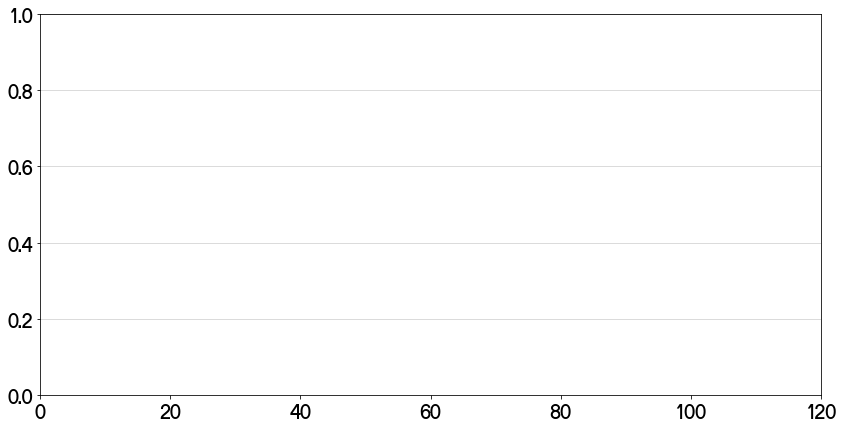

In [2168]:

plt.rcParams['figure.figsize'] = [14, 7]

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=22)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx() 

ax1.set_xlim(0.00,120)

#ax2.set_ylim(0.00,2)
#ax1.set_ylim(0.00,400)

ax1.grid(axis='y', which='both', color='lightgray')
#ax2.grid(False)

#ax2.bar(dt.date(2020, 4, 1), max_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=11)
#ax2.bar(dt.date(2020, 5, 1), max_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//", zorder=10)
cuts = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,\
        31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,\
        72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,
        111,112,113,114,115,116,117,118,119,120,140,160,180,200,400] 
df_overview = df_whole.groupby(pd.cut(df_whole['cooking_time'],\
                                                         cuts)).agg({'session_index':'nunique','energy_gen':'mean'})
#df_overview.sort_values(by='cooking_time',ascending=True,inplace=True)
df_overview.reset_index(inplace=True)
df_overview['xaxis'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,\
        31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,\
        72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,
        111,112,113,114,115,116,117,118,119,120,140,160,180,200,400]          
ax1.bar(df_overview.xaxis, df_overview.session_index/df_overview.session_index.sum()*100, alpha = 1, color='#DF1995', edgecolor='black', linewidth=1, label='cooking time, minutes', zorder=1, align = 'edge', width=2)
#ax1.bar(df_overview.index, df_overview.cooking_time, alpha=1, color='#DF1995', label='time', zorder=3, linewidth=0, width=0.2)

#ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('distribution', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')


fmt = '%.1f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(10)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(100))
#ax1.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=2) 
ax1.tick_params(which='minor', length=2, zorder=4)
#ax2.tick_params(axis='y',length=0, zorder=2)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
#ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_time.png'); plt.show()

In [2161]:
cuts = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,\
        31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,\
        72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,
        111,112,113,114,115,116,117,118,119,120,140,160,180,200,400] 

In [2162]:
df_whole_test = df_epc100.copy()
df_whole_test.drop(df_whole_test[(((df_whole_test.index < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_test.drop(df_whole_test[(((df_whole_test.index >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped = stellar_data.df_epc100_grouped(df_whole_test, max_cooking_duration, power_mean_min, TZS_per_kWh)
df_epc100_grouped_statistics = df_whole_grouped.copy()

In [2163]:
df_overview = df_whole_grouped.groupby(pd.cut(df_whole_grouped['cooking_time'],\
                                                         cuts)).agg({'session_index':'nunique','energy_gen':'mean'})

In [2167]:
df_whole_grouped.energy_gen.sum()/df_whole_grouped.cooking_session.nunique()

0.24341053850607985

In [2152]:
df_overview = df_whole.groupby(pd.cut(df_whole['cooking_time'],\
                                                         cuts)).agg({'session_index':'nunique','energy_gen':'mean'})

SpecificationError: Column(s) ['energy_gen', 'session_index'] do not exist

In [2150]:
df_overview

session_index  energy_gen
cooking_time                           
(0.0, 0.02]               0         NaN
(0.02, 0.04]              0         NaN
(0.04, 0.06]              0         NaN
(0.06, 0.08]              0         NaN
(0.08, 0.1]               0         NaN
(0.1, 0.12]               0         NaN
(0.12, 0.14]              0         NaN
(0.14, 0.16]              0         NaN
(0.16, 0.18]              0         NaN
(0.18, 0.2]               0         NaN
(0.2, 0.22]               0         NaN
(0.22, 0.24]              0         NaN
(0.24, 0.26]              0         NaN
(0.26, 0.28]              0         NaN
(0.28, 0.3]               0         NaN
(0.3, 0.32]               0         NaN
(0.32, 0.34]              0         NaN
(0.34, 0.36]              0         NaN
(0.36, 0.38]              0         NaN
(0.38, 0.4]               0         NaN
(0.4, 0.42]               0         NaN
(0.42, 0.44]              0         NaN
(0.44, 0.46]              0         NaN
(0.46, 0.48]              0         NaN
(0.48, 0.5]               0         NaN
(0.5, 0.52]               0         NaN
(0.52, 0.54]              0         NaN
(0.54, 0.56]              0         NaN
(0.56, 0.58]              0         NaN
(0.58, 0.6]               0         NaN
(0.6, 0.62]               0         NaN
(0.62, 0.64]              0         NaN
(0.64, 0.66]              0         NaN
(0.66, 0.68]              0         NaN
(0.68, 0.7]               0         NaN
(0.7, 0.72]               0         NaN
(0.72, 0.74]              0         NaN
(0.74, 0.8]               0         NaN
(0.8, 0.82]               0         NaN
(0.82, 0.84]              0         NaN
(0.84, 0.86]              0         NaN
(0.86, 0.88]              0         NaN
(0.88, 0.9]               0         NaN
(0.9, 0.92]               0         NaN
(0.92, 0.94]              0         NaN
(0.94, 0.96]              0         NaN
(0.96, 0.98]              0         NaN
(0.98, 1.0]               0         NaN
(1.0, 1.02]               0         NaN
(1.02, 1.04]              0         NaN
(1.04, 1.06]              0         NaN
(1.06, 1.08]              0         NaN
(1.08, 1.1]               0         NaN
(1.1, 1.12]               0         NaN
(1.12, 1.14]              0         NaN
(1.14, 1.16]              0         NaN
(1.16, 1.18]              0         NaN
(1.18, 1.2]               0         NaN
(1.2, 2.0]                0         NaN
(2.0, 10.0]             780    0.091808

In [ ]:

plt.rcParams['figure.figsize'] = [14, 7]

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=22)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx() 

ax1.set_xlim(0.00,1.2)

#ax2.set_ylim(0.00,2)
#ax1.set_ylim(0.00,400)

ax1.grid(axis='y', which='both', color='lightgray')
#ax2.grid(False)

#ax2.bar(dt.date(2020, 4, 1), max_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=11)
#ax2.bar(dt.date(2020, 5, 1), max_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//", zorder=10)
cuts = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,1.05,1.1,1.15,1.2,2,10] 
df_overview = df_whole.groupby(pd.cut(df_whole['energy_gen'],\
                                                         cuts)).agg({'session_index':'nunique','cooking_time':'mean'})
#df_overview.sort_values(by='cooking_time',ascending=True,inplace=True)
df_overview.reset_index(inplace=True)
df_overview['xaxis'] = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1,1.05,1.1,1.15,1.2,2,10]                               
                               
ax1.bar(df_overview.xaxis, df_overview.session_index, alpha = 1, color='#F4BA52', hatch="//", edgecolor='black', linewidth=1, label='energy', zorder=1, align = 'edge', width=0.05)
#ax1.bar(df_overview.index, df_overview.cooking_time, alpha=1, color='#DF1995', label='time', zorder=3, linewidth=0, width=0.2)

#ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=15)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

#ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1)) # date tickers: https://matplotlib.org/3.1.1/api/dates_api.html
#ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator()) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(100))
ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
#ax2.tick_params(axis='y',length=0, zorder=2)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))
#ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_energy.png'); plt.show()

In [1504]:
df_whole_statistics

level_0  index  meter_number  energy_gen  power_mean  cooking_session  \
0        11     89        546327        0.34    0.214737                1   
1        12     88        546299        0.01    0.120000                1   
2        13     87        546365        0.14    0.840000                1   
3        14     86        546379        0.62    0.407500                2   
4        15     84        546342        0.71    0.626667                3   
..      ...    ...           ...         ...         ...              ...   
85       96      4        546307       29.55    0.464234              133   
86       97      3        546302       32.61    0.489512              158   
87       98      2        546360       50.82    0.602950              172   
88       99      1        546336       45.59    0.487762              174   
89      100      0        546375       88.03    0.536846              319   

                                            timestamp  ntimestamp  \
0                     [2020-03-09T19:00:00.000000000]           1   
1                     [2020-04-24T15:05:00.000000000]           1   
2                     [2020-06-01T08:10:00.000000000]           1   
3   [2020-03-14T08:40:00.000000000, 2020-03-14T09:...           2   
4   [2020-03-12T16:35:00.000000000, 2020-03-12T22:...           3   
..                                                ...         ...   
85  [2020-03-10T19:10:00.000000000, 2020-03-14T14:...         133   
86  [2020-03-10T20:20:00.000000000, 2020-03-10T22:...         158   
87  [2020-03-14T23:05:00.000000000, 2020-03-17T17:...         172   
88  [2020-03-11T14:40:00.000000000, 2020-03-11T15:...         174   
89  [2020-03-10T22:25:00.000000000, 2020-03-10T23:...         319   

                                         cooking_time  usage_rank     site  
0                                              [95.0]           8     Bezi  
1                                               [5.0]          42    Sozia  
2                                              [10.0]          69     Yozu  
3                                        [30.0, 80.0]          19    Nemba  
4                                        [15.0, 35.0]          12    Nemba  
..                                                ...         ...      ...  
85  [30.0, 155.0, 55.0, 25.0, 10.0, 20.0, 40.0, 15...          97     Bezi  
86  [35.0, 40.0, 10.0, 65.0, 5.0, 50.0, 75.0, 20.0...          93  Kalenge  
87  [45.0, 15.0, 25.0, 35.0, 55.0, 50.0, 65.0, 40....          99   Mavota  
88  [50.0, 10.0, 30.0, 25.0, 20.0, 15.0, 35.0, 70....          96     Bezi  
89  [20.0, 10.0, 40.0, 25.0, 5.0, 45.0, 15.0, 35.0...         100     Bezi  

[90 rows x 11 columns]

In [1526]:
df_whole_statistics['quantiles'] = pd.qcut(df_whole_statistics.cooking_session, 18, labels=False)
df_whole_statistics_0 = df_whole_statistics.loc[df_whole_statistics['quantiles']==0]
df_whole_statistics_1 = df_whole_statistics.loc[df_whole_statistics['quantiles']==1]
df_whole_statistics_2 = df_whole_statistics.loc[df_whole_statistics['quantiles']==2]
df_whole_statistics_3 = df_whole_statistics.loc[df_whole_statistics['quantiles']==17]

In [1525]:
df_whole_statistics.tail(10)

level_0  index  meter_number  energy_gen  power_mean  cooking_session  \
80       91      9        546376       15.48    0.559336               90   
81       92      8        546281       18.25    0.663591               90   
82       93      7        546285       26.72    0.425960               94   
83       94      6        546309       23.83    0.223423              105   
84       95      5        546290       17.41    0.523122              121   
85       96      4        546307       29.55    0.464234              133   
86       97      3        546302       32.61    0.489512              158   
87       98      2        546360       50.82    0.602950              172   
88       99      1        546336       45.59    0.487762              174   
89      100      0        546375       88.03    0.536846              319   

                                            timestamp  ntimestamp  \
80  [2020-03-27T11:15:00.000000000, 2020-03-27T12:...          90   
81  [2020-03-10T21:50:00.000000000, 2020-03-11T08:...          90   
82  [2020-03-14T21:05:00.000000000, 2020-03-14T21:...          94   
83  [2020-03-09T12:30:00.000000000, 2020-03-10T11:...         105   
84  [2020-03-10T19:30:00.000000000, 2020-03-13T11:...         121   
85  [2020-03-10T19:10:00.000000000, 2020-03-14T14:...         133   
86  [2020-03-10T20:20:00.000000000, 2020-03-10T22:...         158   
87  [2020-03-14T23:05:00.000000000, 2020-03-17T17:...         172   
88  [2020-03-11T14:40:00.000000000, 2020-03-11T15:...         174   
89  [2020-03-10T22:25:00.000000000, 2020-03-10T23:...         319   

                                         cooking_time  usage_rank     site  \
80  [10.0, 40.0, 15.0, 20.0, 65.0, 35.0, 85.0, 30....          91     Yozu   
81  [10.0, 65.0, 20.0, 15.0, 40.0, 5.0, 30.0, 45.0...          78     Bezi   
82  [30.0, 50.0, 10.0, 5.0, 45.0, 80.0, 55.0, 25.0...          92   Mavota   
83  [75.0, 45.0, 90.0, 80.0, 25.0, 100.0, 50.0, 85...          80  Kalenge   
84  [70.0, 15.0, 10.0, 5.0, 35.0, 25.0, 20.0, 30.0...          81     Yozu   
85  [30.0, 155.0, 55.0, 25.0, 10.0, 20.0, 40.0, 15...          97     Bezi   
86  [35.0, 40.0, 10.0, 65.0, 5.0, 50.0, 75.0, 20.0...          93  Kalenge   
87  [45.0, 15.0, 25.0, 35.0, 55.0, 50.0, 65.0, 40....          99   Mavota   
88  [50.0, 10.0, 30.0, 25.0, 20.0, 15.0, 35.0, 70....          96     Bezi   
89  [20.0, 10.0, 40.0, 25.0, 5.0, 45.0, 15.0, 35.0...         100     Bezi   

    quantiles  
80         16  
81         16  
82         16  
83         16  
84         16  
85         17  
86         17  
87         17  
88         17  
89         17

In [1510]:
list = [0,0,0,0]
list[0] = df_whole_statistics_0.cooking_session.sum()
list[1] =df_whole_statistics_1.cooking_session.sum()
list[2] =df_whole_statistics_2.cooking_session.sum()
list[3] =df_whole_statistics_3.cooking_session.sum()
list

[123, 398, 853, 2450]

In [1512]:
df_whole_statistics.cooking_session.sum()

3824

In [1508]:
list = [0,0,0,0]
list[0] = df_whole_statistics_0.energy_gen.sum()
list[1] =df_whole_statistics_1.energy_gen.sum()
list[2] =df_whole_statistics_2.energy_gen.sum()
list[3] =df_whole_statistics_3.energy_gen.sum()
list

[31.449999999999996, 85.89999999999999, 195.72, 603.8899999999998]

In [1528]:
df_whole_statistics_3.energy_gen.sum()

246.5999999999998

In [1530]:
df_whole_statistics_3.cooking_session.sum()

956

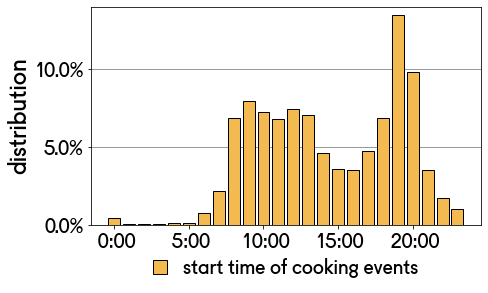

In [1577]:
plt.rcParams['figure.figsize'] = [7, 4]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart('hour', 0, 0)
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

'''df_cs_grouped_statistics['quantiles'] = pd.qcut(df_cs_grouped_statistics.timestamp, 4, labels=False)
df_cs_grouped_statistics_0 = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['quantiles']==0]
df_cs_grouped_statistics_1 = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['quantiles']==1]
df_cs_grouped_statistics_2 = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['quantiles']==2]
df_cs_grouped_statistics_3 = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['quantiles']==3]
'''
df_cs_grouped_statistics['cooking_pct'] = df_cs_grouped_statistics.cooking_session/df_cs_grouped_statistics.cooking_session.sum()

x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.cooking_pct *100

#x1 = df_cs_grouped_statistics_0.timestamp
#y1 = df_cs_grouped_statistics_0.cooking_session
#x2 = df_cs_grouped_statistics_1.timestamp
#y2 = df_cs_grouped_statistics_1.cooking_session
#x3 = df_cs_grouped_statistics_2.timestamp
#y3 = df_cs_grouped_statistics_2.cooking_session
#y4 = df_cs_grouped_statistics_3.cooking_session

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00')) 

fmt = '%.1f%%' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

plt.gca().set_ylim(0,14)

plt.bar(x1,y1, color='#F4BA52', label='start time of cooking events', zorder=2.52, linewidth=1, edgecolor='black')
#plt.bar(x1,y1, color='#F4BA52', label='1st quantile, 0-25%', zorder=2.52)
#plt.bar(x2,y2, color='#CA597D', label='2nd quantile, 25-50%', zorder=2.53)
#plt.bar(x3,y3, color='darkgray', label='3rd quantile, 50-75%', zorder=2.54)
#plt.bar(x4,y4, color='#DE1995', label='4th quantile, 75-100%', zorder=2.55)

plt.gca().grid(axis='y', which='both', color='gray')

lines, labels = plt.gca().get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.ylabel('distribution')

#plt.title('start time of cooking events', fontsize=24)

plt.savefig('visuals/cooking_sessions_day.png'); plt.show()

In [732]:
df_cs_grouped_statistics = all_meter_bar_chart('datehour', 546332)

In [734]:
df_cs_grouped_statistics.head(60)

timestamp_day  timestamp  energy_gen  cooking_session  cooking_cost  \
0     2020-05-23         14        0.25                1         500.0   
1     2020-05-25         18        0.25                1         500.0   
2     2020-05-28         19        0.15                1         300.0   
3     2020-05-30         17        0.14                1         280.0   
4     2020-06-18         16        0.27                1         540.0   
5     2020-06-21         15        0.22                1         440.0   
6     2020-07-08         18        0.09                1         180.0   
7     2020-07-10          8        0.13                1         260.0   
8     2020-09-01          9        0.08                1         160.0   
9     2020-09-02         10        0.13                1         260.0   
10    2020-09-04         12        0.06                1         120.0   
11    2020-09-05         10        0.13                1         260.0   
12    2020-09-15         10        0.08                1         160.0   
13    2020-09-15         17        0.02                1          40.0   
14    2020-09-18         10        0.25                1         500.0   
15    2020-09-21         19        0.08                1         160.0   
16    2020-09-22          8        0.42                1         840.0   
17    2020-09-23          9        0.12                1         240.0   
18    2020-09-24         11        0.18                1         360.0   
19    2020-09-25          9        0.12                1         240.0   
20    2020-09-25         19        0.19                1         380.0   
21    2020-09-25         20        0.10                1         200.0   
22    2020-09-29         20        0.16                1         320.0   
23    2020-09-30         11        0.08                1         160.0   
24    2020-10-02         19        0.10                1         200.0   
25    2020-10-03         13        0.41                1         820.0   
26    2020-10-04         10        0.15                1         300.0   
27    2020-10-05         15        0.08                1         160.0   
28    2020-10-05         19        0.09                1         180.0   
29    2020-10-06          9        0.17                1         340.0   
30    2020-10-07         17        0.13                1         260.0   
31    2020-10-08          8        0.19                1         380.0   
32    2020-10-09         19        0.14                1         280.0   
33    2020-10-10          9        0.18                1         360.0   
34    2020-10-10         18        0.18                1         360.0   
35    2020-10-11          9        0.05                1         100.0   
36    2020-10-12          9        0.19                1         380.0   
37    2020-10-12         19        0.16                1         320.0   
38    2020-10-13          9        0.17                1         340.0   
39    2020-10-16         19        0.05                1         100.0   
40    2020-10-19         10        0.14                1         280.0   
41    2020-10-19         20        0.25                1         500.0   
42    2020-10-20          7        0.23                1         460.0   
43    2020-10-20          8        0.51                1        1020.0   
44    2020-10-20         12        0.28                1         560.0   
45    2020-10-20         17        0.27                1         540.0   
46    2020-10-20         19        0.28                1         560.0   
47    2020-10-20         20        0.05                1         100.0   
48    2020-10-21          6        0.39                1         780.0   
49    2020-10-21         19        0.17                1         340.0   
50    2020-10-22         13        0.05                1         100.0   
51    2020-10-29         19        0.12                1         240.0   
52    2020-10-31         11        0.68                1        1360.0   
53    2

In [753]:
df_cs_grouped_statistics = all_meter_bar_chart('datehour', 546332)
#df_cs_grouped_statistics['quantiles'] = pd.qcut(df_cs_grouped_statistics.timestamp, 4, labels=False)
df_cs_grouped_statistics.sort_values(by =['timestamp_day'], ascending=[False], inplace=True)
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']>pd.to_datetime('2020-10-19')]
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']<pd.to_datetime('2020-10-21')]

In [754]:
df_cs_grouped_statistics

timestamp_day  timestamp  energy_gen  cooking_session  cooking_cost  \
46    2020-10-20         19        0.28                1         560.0   
47    2020-10-20         20        0.05                1         100.0   
45    2020-10-20         17        0.27                1         540.0   
44    2020-10-20         12        0.28                1         560.0   
43    2020-10-20          8        0.51                1        1020.0   
42    2020-10-20          7        0.23                1         460.0   

    cooking_time  power_mean  
46          25.0    0.672000  
47           5.0    0.600000  
45          20.0    0.810000  
44          20.0    0.840000  
43          55.0    0.556364  
42          20.0    0.690000

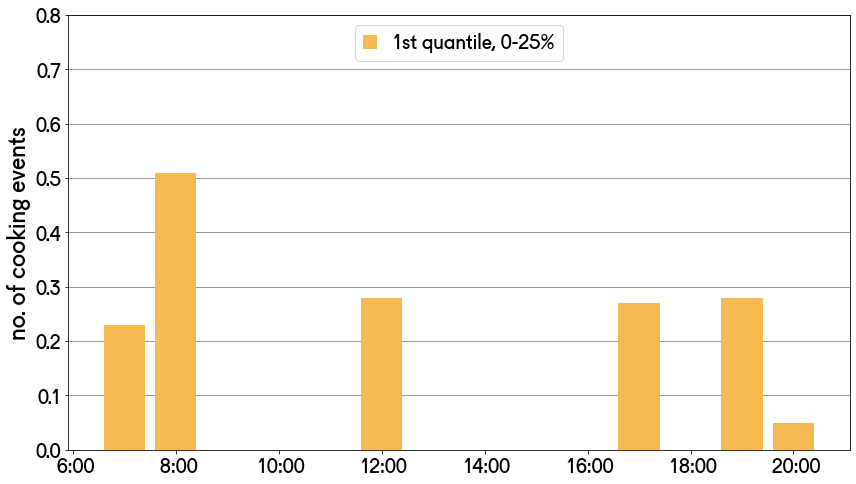

In [756]:
plt.rcParams['figure.figsize'] = [14, 8]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart('datehour', 546332)
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-10-20')]





plt.gca().set_ylim(0,0.8)

x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
plt.bar(x1,y1, color='#F4BA52', label='1st quantile, 0-25%', zorder=2.52)

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))
plt.gca().grid(axis='y', which='both', color='gray')

lines, labels = plt.gca().get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.ylabel('no. of cooking events')

#plt.title('start time of cooking events', fontsize=24)

plt.savefig('visuals/cooking_sessions_day.png'); plt.show()

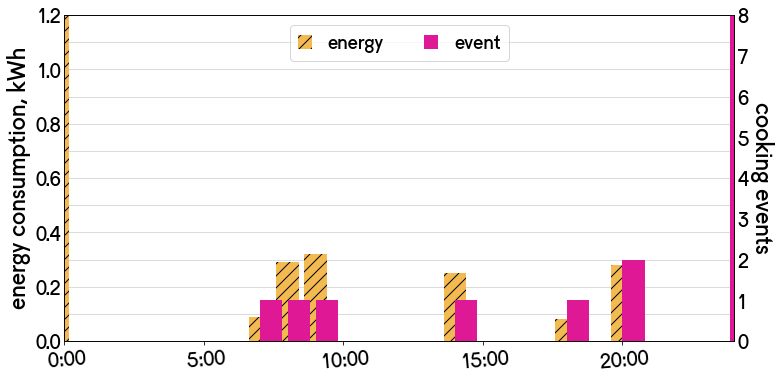

In [921]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0, 0)
df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-05-23')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_power = 1.2

ax1.set_xlim(0,24)
ax1.set_ylim(0,max_power)
ax2.set_ylim(0,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax1.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//")


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax2.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'edge')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(0, max_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.3, hatch="//")
ax1.bar(24, max_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = 'black')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = 'black')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=5)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_sessions_high_day_bezi.png', dpi=200)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0, 0)
df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-05-23')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_power = 1.2

ax1.set_xlim(0,24)
ax1.set_ylim(0,max_power)
ax2.set_ylim(0,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax1.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//")


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax2.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'edge')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(0, max_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.3, hatch="//") # hatch="-" "x"
ax1.bar(24, max_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = 'black')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = 'black')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=5)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_sessions_high_day_bezi.png', dpi=200)
plt.show()

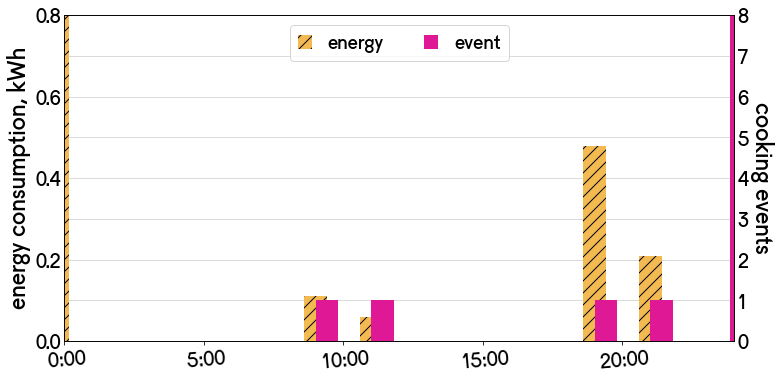

In [851]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0)
df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-07-09')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_xlim(0,24)
ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax1.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//")


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax2.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'edge')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(0, 1, color='#F4BA52', alpha = 1.0, label=None, width = 0.3, hatch="//")
ax1.bar(24, 1, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = 'black')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = 'black')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=5)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_sessions_medium_day_bezi.png', dpi=200)
plt.show()

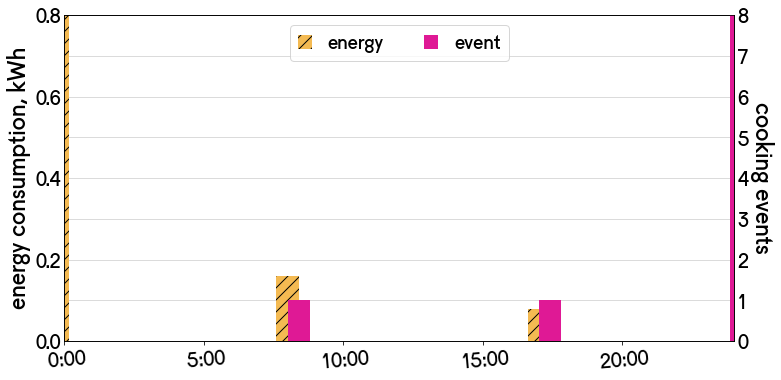

In [830]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0)
df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-06-09')]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_xlim(0,24)
ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax1.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//")


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax2.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'edge')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(0, 1, color='#F4BA52', alpha = 1.0, label=None, width = 0.3, hatch="//")
ax1.bar(24, 1, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = 'black')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = 'black')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=5)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_sessions_low_day_bezi.png', dpi=200)
plt.show()

In [1579]:
df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0, 0)
df_cs_grouped_statistics

timestamp_day  timestamp  meter_number  energy_gen  cooking_session  \
0       2020-03-05          9        546377        0.29                1   
1       2020-03-05         11        546282        0.50                1   
2       2020-03-05         12        546282        1.21                1   
3       2020-03-05         14        546377        0.39                1   
4       2020-03-05         14        546378        0.46                2   
...            ...        ...           ...         ...              ...   
4159    2020-12-02          7        546301        1.46                1   
4160    2020-12-02          7        546307        0.81                1   
4161    2020-12-02          8        546297        0.20                1   
4162    2020-12-02          8        546307        0.43                1   
4163    2020-12-02          8        546332        0.37                1   

      cooking_cost  cooking_time  power_mean     am_pm  
0            580.0          20.0    0.870000  09:00 AM  
1           1000.0         105.0    0.285714  11:00 AM  
2           2420.0         135.0    0.537778  12:00 PM  
3            780.0          60.0    0.390000  02:00 PM  
4            920.0          60.0    1.320000  02:00 PM  
...            ...           ...         ...       ...  
4159        2920.0         110.0    0.796364  07:00 AM  
4160        1620.0          55.0    0.883636  07:00 AM  
4161         400.0          60.0    0.200000  08:00 AM  
4162         860.0          40.0    0.645000  08:00 AM  
4163         740.0          60.0    0.370000  08:00 AM  

[4164 rows x 9 columns]

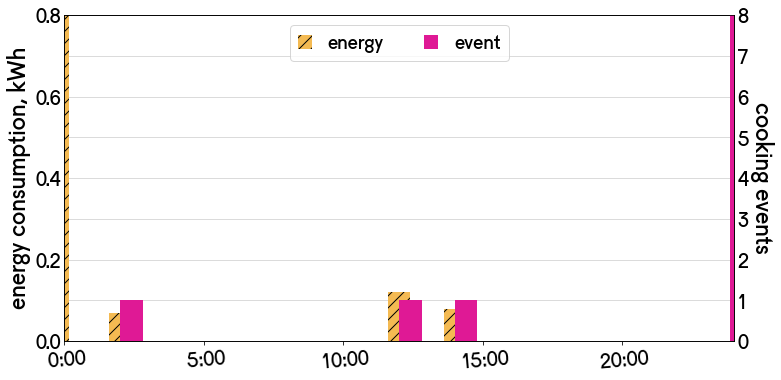

In [850]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0, 0)
df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-04-04')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_xlim(0,24)
ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax1.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//")


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax2.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'edge')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(0, 1, color='#F4BA52', alpha = 1.0, label=None, width = 0.3, hatch="//")
ax1.bar(24, 1, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = 'black')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = 'black')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=5)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_sessions_low_day_bezi_2.png', dpi=200)
plt.show()

In [1127]:
df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0, 0)
df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-05-13')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})

In [1164]:
df_cs_grouped_statistics

energy_gen  cooking_session  dict_pm_am
timestamp                                         
9                0.92                3         NaN
10               0.14                1         NaN
13               0.06                1         NaN
17               0.14                1         NaN

Index(['9:00 AM', '10:00 AM', '1:00 PM', '5:00 PM'], dtype='object', name='timestamp')

In [1166]:
dict_pm_am = {0 : '0:00 AM',1 : '1:00 AM',2 : '2:00 AM',3 : '3:00 AM',4 : '4:00 AM',5 : '5:00 AM',6 : '6:00 AM',7 : '7:00 AM',8 : '8:00 AM'\
             ,9 : '9:00 AM',10 : '10:00 AM',11 : '11:00 AM',12 : '12:00 PM',13 : '1:00 PM',14 : '2:00 PM',\
              15 : '3:00 PM',16: '4:00 PM',17: '5:00 PM'\
             ,18: '6:00 PM',19: '7:00 PM',20:'8:00 PM',21:'9:00 PM',22:'10:00 PM',23:'11:00 PM'}

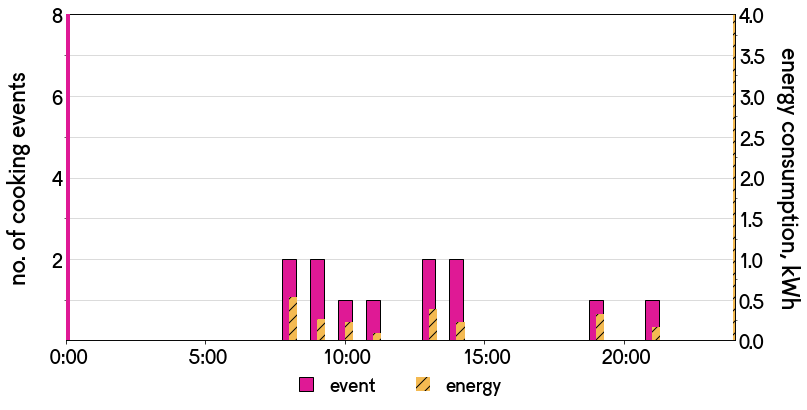

In [1746]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart(0, 'datehour', 0, 0)
#df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
#df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-04-21')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_day_power = 4

ax1.set_xlim(0,24)
ax2.set_ylim(0,max_day_power)
ax1.set_ylim(0.01,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax2.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//", align='edge', width=0.3)


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax1.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'center', linewidth=1, edgecolor='black', width=0.5)

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax2.bar(0, max_day_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)
ax2.bar(24, max_day_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//")

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=20)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
#ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/low_day_honeymoon.png', dpi=200)
plt.show()

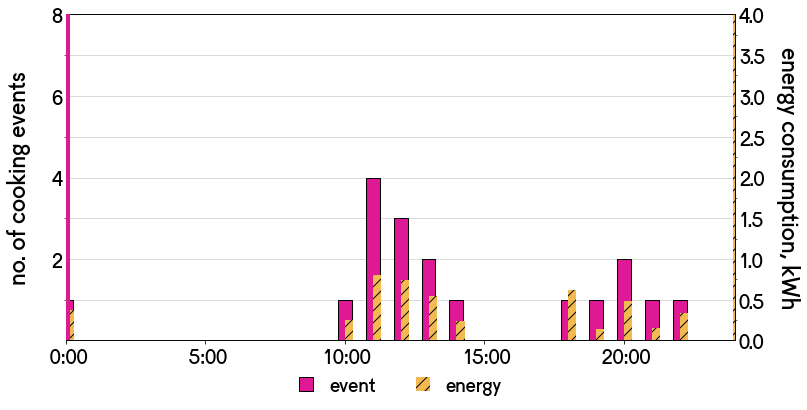

In [1747]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart(0, 'datehour', 0, 0)
#df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
#df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-03-30')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_day_power = 4

ax1.set_xlim(0,24)
ax2.set_ylim(0,max_day_power)
ax1.set_ylim(0.01,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax2.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//", align='edge', width=0.3)


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax1.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'center', linewidth=1, edgecolor='black', width=0.5)

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax2.bar(0, max_day_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)
ax2.bar(24, max_day_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//")

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=20)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
#ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/medium_day_honeymoon.png', dpi=200)
plt.show()

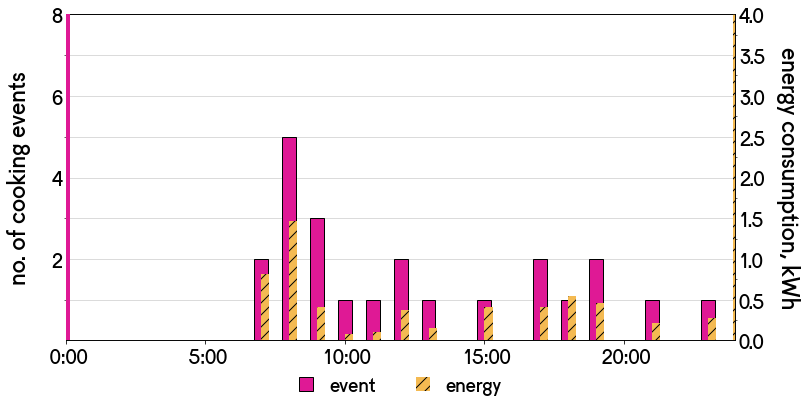

In [1748]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart(0, 'datehour', 0, 0)
#df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
#df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-05-09')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_day_power = 4

ax1.set_xlim(0,24)
ax2.set_ylim(0,max_day_power)
ax1.set_ylim(0.01,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax2.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//", align='edge', width=0.3)


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax1.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'center', linewidth=1, edgecolor='black', width=0.5)

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax2.bar(0, max_day_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)
ax2.bar(24, max_day_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//")

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=20)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
#ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/high_day_honeymoon.png', dpi=200)
plt.show()

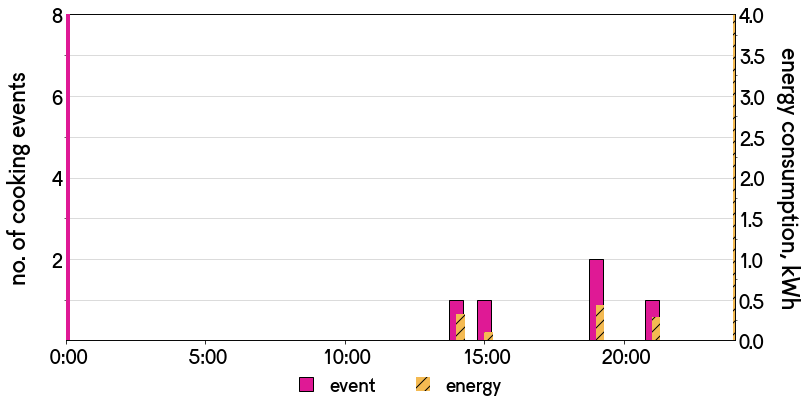

In [1749]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart(0, 'datehour', 0, 0)
#df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
#df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-08-13')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_day_power = 4

ax1.set_xlim(0,24)
ax2.set_ylim(0,max_day_power)
ax1.set_ylim(0.01,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax2.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//", align='edge', width=0.3)


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax1.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'center', linewidth=1, edgecolor='black', width=0.5)

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax2.bar(0, max_day_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)
ax2.bar(24, max_day_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//")

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=20)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
#ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/low_day_steady.png', dpi=200)
plt.show()

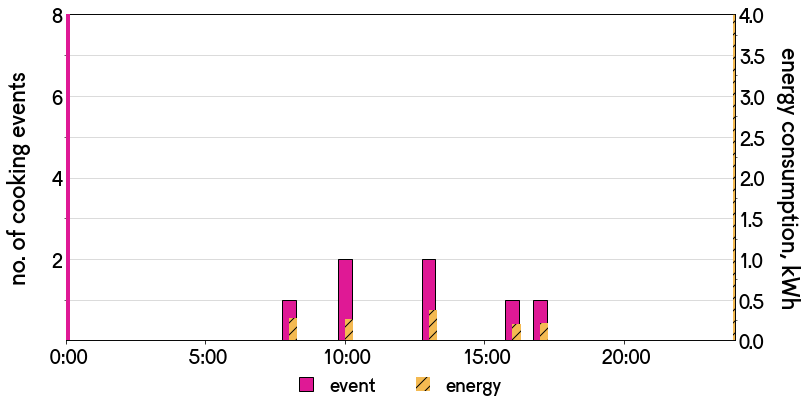

In [1763]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart(0, 'datehour', 0, 0)
#df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
#df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-06-12')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_day_power = 4

ax1.set_xlim(0,24)
ax2.set_ylim(0,max_day_power)
ax1.set_ylim(0.01,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax2.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//", align='edge', width=0.3)


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax1.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'center', linewidth=1, edgecolor='black', width=0.5)

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax2.bar(0, max_day_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)
ax2.bar(24, max_day_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//")

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=20)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
#ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/medium_day_steady.png', dpi=200)
plt.show()

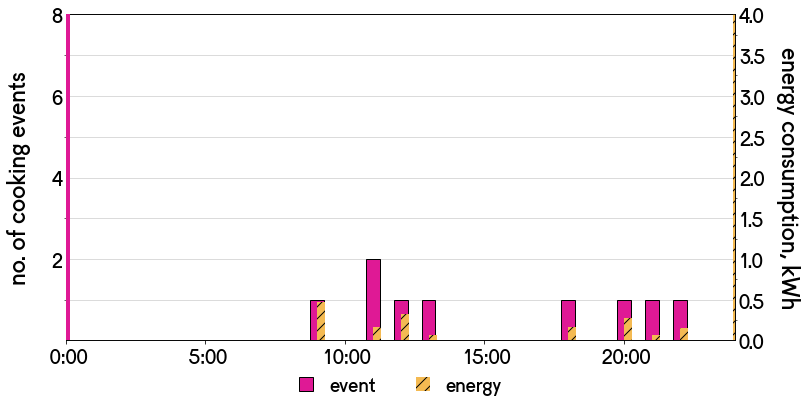

In [1751]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart(0, 'datehour', 0, 0)
#df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
#df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-06-23')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_day_power = 4

ax1.set_xlim(0,24)
ax2.set_ylim(0,max_day_power)
ax1.set_ylim(0.01,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax2.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//", align='edge', width=0.3)


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax1.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'center', linewidth=1, edgecolor='black', width=0.5)

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax2.bar(0, max_day_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)
ax2.bar(24, max_day_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//")

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=20)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
#ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/high_day_steady.png', dpi=200)
plt.show()

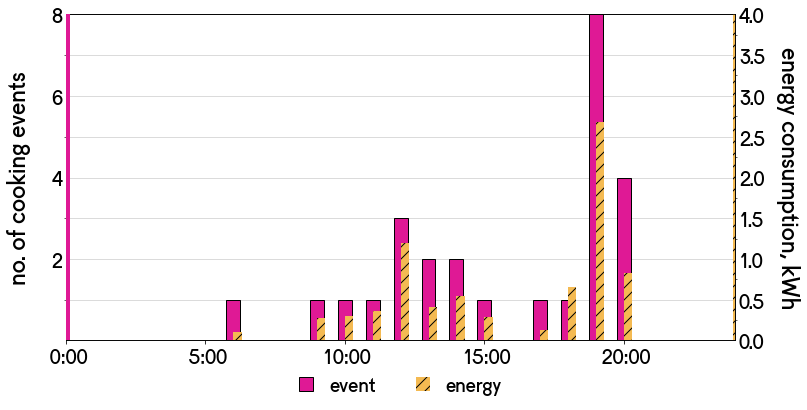

In [1757]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart(0, 'datehour', 0, 0)
#df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
#df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-10-22')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_day_power = 4

ax1.set_xlim(0,24)
ax2.set_ylim(0,max_day_power)
ax1.set_ylim(0.01,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax2.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//", align='edge', width=0.3)


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax1.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'center', linewidth=1, edgecolor='black', width=0.5)

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax2.bar(0, max_day_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)
ax2.bar(24, max_day_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//")

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=20)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
#ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/low_day_tariff.png', dpi=200)
plt.show()

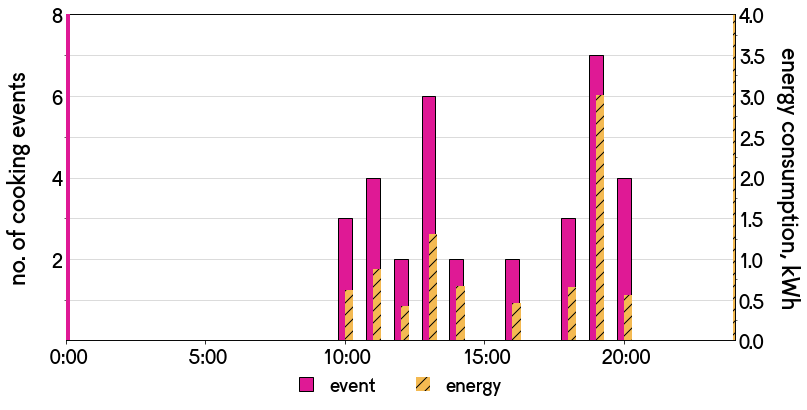

In [1758]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart(0, 'datehour', 0, 0)
#df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
#df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-10-26')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_day_power = 4

ax1.set_xlim(0,24)
ax2.set_ylim(0,max_day_power)
ax1.set_ylim(0.01,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax2.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//", align='edge', width=0.3)


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax1.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'center', linewidth=1, edgecolor='black', width=0.5)

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax2.bar(0, max_day_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)
ax2.bar(24, max_day_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//")

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=20)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
#ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/medium_day_tariff.png', dpi=200)
plt.show()

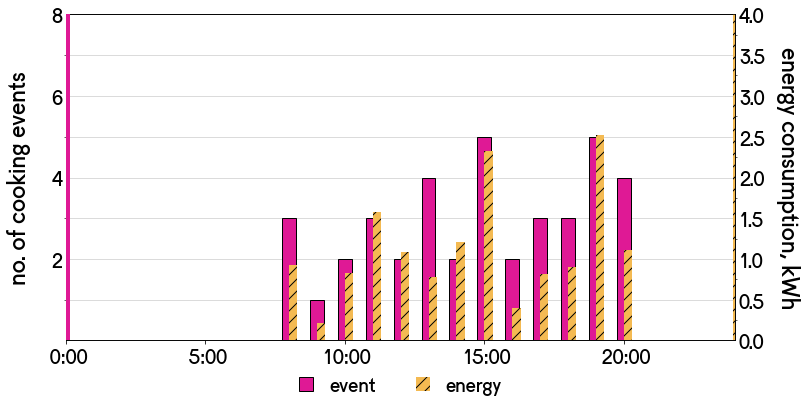

In [1744]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart(0, 'datehour', 0, 0)
#df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
#df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-11-10')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_day_power = 4

ax1.set_xlim(0,24)
ax2.set_ylim(0,max_day_power)
ax1.set_ylim(0.01,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax2.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//", align='edge', width=0.3)


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax1.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'center', linewidth=1, edgecolor='black', width=0.5)

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax2.bar(0, max_day_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)
ax2.bar(24, max_day_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//")

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=20)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
#ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/high_day_tariff.png', dpi=200)
plt.show()

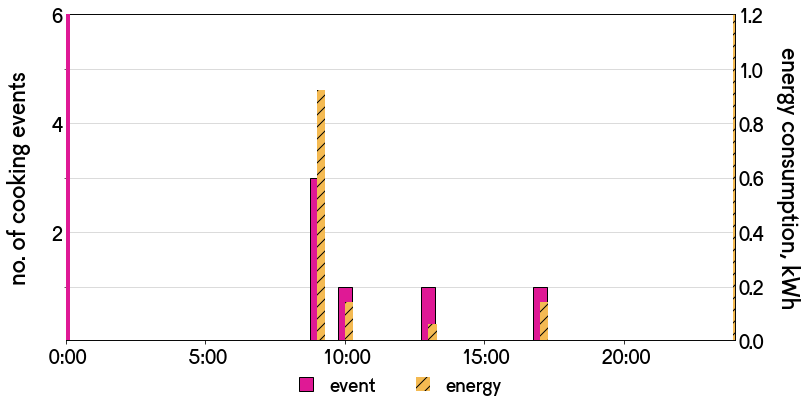

In [1214]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0, 0)
df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-05-13')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_day_power = 1.2

ax1.set_xlim(0,24)
ax2.set_ylim(0,max_day_power)
ax1.set_ylim(0.01,6)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax2.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//", align='edge', width=0.3)


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax1.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'center', linewidth=1, edgecolor='black', width=0.5)

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax2.bar(0, max_day_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)
ax2.bar(24, max_day_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.2, hatch="//")

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=35, color = 'black')
ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', color = 'black', labelpad=20)
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax1.tick_params(axis='x', bottom=True, rotation=0)
ax1.tick_params(axis='y',length=0) 
#ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_sessions_medium_day_bezi_2.png', dpi=200)
plt.show()

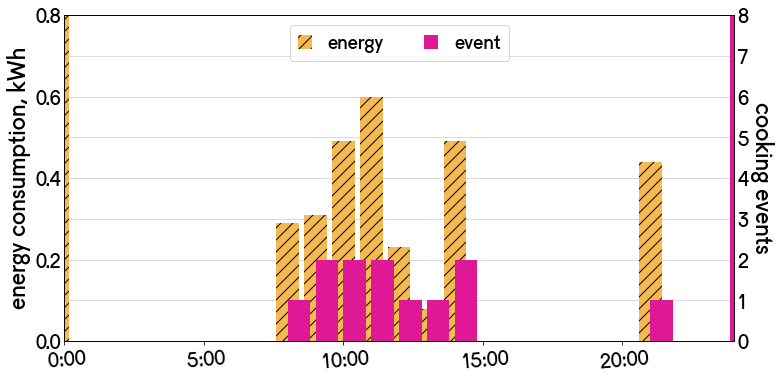

In [847]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0)
df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-04-25')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_xlim(0,24)
ax1.set_ylim(0,0.8)
ax2.set_ylim(0,8)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax1.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//")


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax2.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'edge')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(0, 1, color='#F4BA52', alpha = 1.0, label=None, width = 0.3, hatch="//")
ax1.bar(24, 1, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = 'black')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = 'black')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=5)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_sessions_high_day_bezi_2.png', dpi=200)
plt.show()

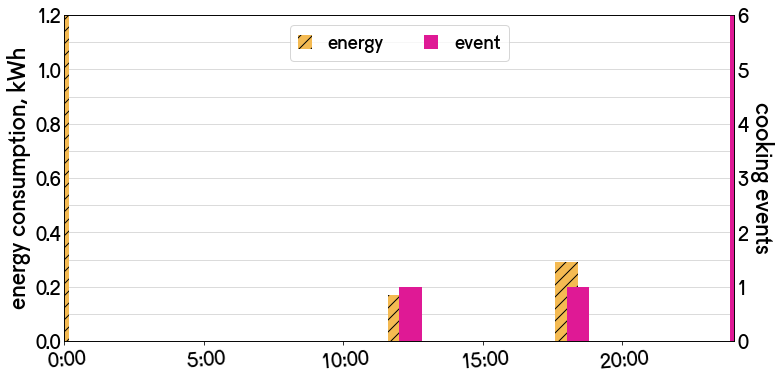

In [862]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0)
df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-07-19')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_day_power = 1.2

ax1.set_xlim(0,24)
ax1.set_ylim(0,max_day_power)
ax2.set_ylim(0,6)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax1.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//")


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax2.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'edge')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(0, max_day_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.3, hatch="//")
ax1.bar(24, max_day_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = 'black')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = 'black')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=5)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/steady_cooking_sessions_low_day_bezi_2.png', dpi=200)
plt.show()

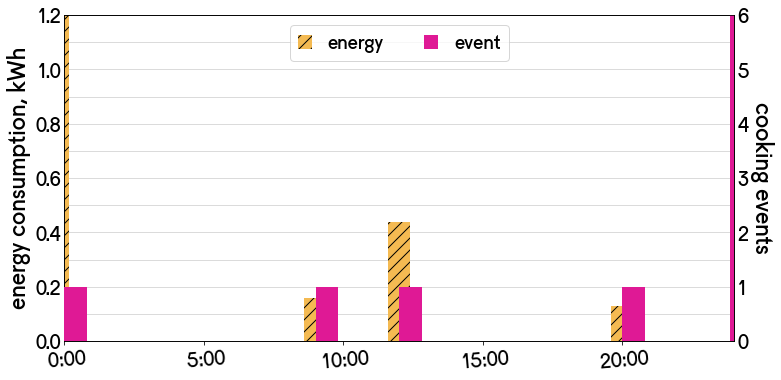

In [863]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0)
df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-08-08')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_day_power = 1.2

ax1.set_xlim(0,24)
ax1.set_ylim(0,max_day_power)
ax2.set_ylim(0,6)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax1.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//")


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax2.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'edge')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(0, max_day_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.3, hatch="//")
ax1.bar(24, max_day_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = 'black')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = 'black')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=5)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/steady_cooking_sessions_medium_day_bezi_2.png', dpi=200)
plt.show()

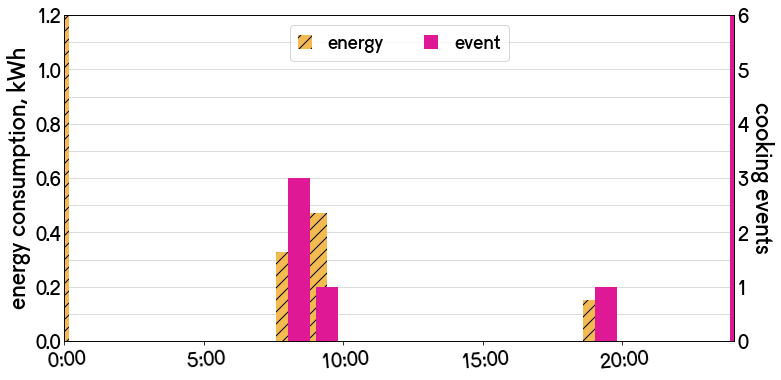

In [864]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0)
df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-08-06')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})
df_cs_grouped_statistics.reset_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

max_day_power = 1.2

ax1.set_xlim(0,24)
ax1.set_ylim(0,max_day_power)
ax2.set_ylim(0,6)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax1.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//")


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_session
ax2.bar(x2,y2, color='#DF1995', label='event', zorder=2.52, align = 'edge')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(0, max_day_power, color='#F4BA52', alpha = 1.0, label=None, width = 0.3, hatch="//")
ax1.bar(24, max_day_power, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking events', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = 'black')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = 'black')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=5)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/steady_cooking_sessions_high_day_bezi_2.png', dpi=200)
plt.show()

In [2881]:
df_release = df_epc100.copy()
df_release = df_release.drop(['id','timezone','region','fetch_index','time_gap','energy_gap','load_on','timeload_on',\
                             'time_gap_load_on','latest_energy','max_time','first_energy','min_time','group','usage_rank','cooking_start',\
                             'cooking_end','load_added_count', 'time_load_added','cooking_session','time_start','time_end','missing_data','timestamp_issue'],axis=1)

In [2882]:
dict_islands = {'Bezi':'Island','Sozia':'Island','Kalenge':'Mainland','Mavota':'Mainland','Yozu':'Island','Nemba':'Mainland'}
dict_tariff = {'Bezi':'2020-10-21','Sozia':'2020-10-26','Kalenge':'2020-10-07', 'Mavota':'2020-10-05',\
               'Yozu':'2020-11-18'}
dict_site = {'Bezi':'site_1','Sozia':'site_2','Kalenge':'site_3','Mavota':'site_4','Yozu':'site_5','Nemba':'site_6'}
df_release.loc[((df_release['cooking_event_id'].isna() == True)), 'cooking_time'] = np.nan
df_release.loc[((df_release['cooking_event_id'].isna() == True)), 'seq_time'] = np.nan
df_release['cooking_time2'] = df_release['cooking_time']
df_release = df_release.drop(['cooking_time'],axis=1)
df_release['cooking_time'] = df_release['cooking_time2']
df_release = df_release.drop(['cooking_time2'],axis=1)
df_release['cooking_seq_time'] = df_release['seq_time']

In [2883]:
df_release['environment'] = df_release.location.map(dict_islands)
df_release['tariff_reduction_date'] = df_release.location.map(dict_tariff)
df_release['site'] = df_release.location.map(dict_site)
df_release = df_release.drop(['location','seq_time'],axis=1)

In [2884]:
df_release.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94566 entries, 2020-03-10 21:50:00 to 2020-11-19 08:50:00
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   meter_number           94566 non-null  int64  
 1   energy                 94566 non-null  float64
 2   voltage                94566 non-null  float64
 3   current                94566 non-null  float64
 4   power                  94566 non-null  float64
 5   power_factor           94556 non-null  float64
 6   frequency              94561 non-null  float64
 7   cooking_event_id       38915 non-null  float64
 8   cooking_time           38915 non-null  float64
 9   cooking_seq_time       38915 non-null  float64
 10  environment            94566 non-null  object 
 11  tariff_reduction_date  86338 non-null  object 
 12  site                   94566 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 12.6+ MB


In [2885]:
df_release.index.max()

Timestamp('2020-12-09 18:40:00')

In [2886]:
df_release.to_csv('result/tz_cooking_pilot_2020-03-01_2020-12-09_with_event_definition.csv', index=True)

In [2841]:
#df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())

In [2842]:
df_release

meter_number  energy  voltage  current     power  \
timestamp                                                               
2020-03-10 21:50:00        546281    0.00   229.90   0.0000  0.000000   
2020-03-10 21:55:00        546281    0.07   228.20   4.3010  0.981488   
2020-03-10 22:00:00        546281    0.14   227.80   4.3090  0.981590   
2020-03-10 23:05:00        546281    0.21   229.90   0.0000  0.000000   
2020-03-11 08:50:00        546281    0.26   228.85   2.1535  0.492828   
...                           ...     ...      ...      ...       ...   
2020-11-19 08:30:00        546380    5.00   229.90   0.0280  0.006437   
2020-11-19 08:35:00        546380    5.00   221.10   0.0280  0.006191   
2020-11-19 08:40:00        546380    5.00   220.10   0.0310  0.006823   
2020-11-19 08:45:00        546380    5.00   220.20   0.0280  0.006166   
2020-11-19 08:50:00        546380    5.00   220.20   0.0290  0.006386   

                     power_factor  frequency  cooking_time  seq_time  \
timestamp                                                              
2020-03-10 21:50:00        1.0000      50.00          10.0       0.0   
2020-03-10 21:55:00        0.9990      50.01          10.0       5.0   
2020-03-10 22:00:00        0.9980      50.01          10.0      10.0   
2020-03-10 23:05:00        1.0000      50.01           NaN       0.0   
2020-03-11 08:50:00        0.9995      51.02          65.0       0.0   
...                           ...        ...           ...       ...   
2020-11-19 08:30:00        0.8280      50.01           NaN     780.0   
2020-11-19 08:35:00        0.8260      50.01           NaN     785.0   
2020-11-19 08:40:00        0.8380      50.01           NaN     790.0   
2020-11-19 08:45:00        0.8570      50.00           NaN     795.0   
2020-11-19 08:50:00        0.8250      50.01           NaN     800.0   

                     cooking_event_id environment tariff_reduction_date  \
timestamp                                                                 
2020-03-10 21:50:00               1.0      Island            2020-10-21   
2020-03-10 21:55:00               1.0      Island            2020-10-21   
2020-03-10 22:00:00               1.0      Island            2020-10-21   
2020-03-10 23:05:00               NaN      Island            2020-10-21   
2020-03-11 08:50:00               2.0      Island            2020-10-21   
...                               ...         ...                   ...   
2020-11-19 08:30:00               NaN      Island            2020-10-21   
2020-11-19 08:35:00               NaN      Island            2020-10-21   
2020-11-19 08:40:00               NaN      Island            2020-10-21   
2020-11-19 08:45:00               NaN      Island            2020-10-21   
2020-11-19 08:50:00               NaN      Island            2020-10-21   

                       site  
timestamp                    
2020-03-10 21:50:00  site_1  
2020-03-10 21:55:00  site_1  
2020-03-10 22:00:00  site_1  
2020-03-10 23:05:00  site_1  
2020-03-11 08:50:00  site_1  
...                     ...  
2020-11-19 08:30:00  site_1  
2020-11-19 08:35:00  site_1  
2020-11-19 08:40:00  site_1  
2020-11-19 08:45:00  site_1  
2020-11-19 08:50:00  site_1  

[94566 rows x 13 columns]

In [845]:
df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0)
df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-04-25')]
df_cs_grouped_statistics = df_cs_grouped_statistics.groupby('timestamp').agg({'energy_gen':'sum','cooking_session':'sum'})

In [846]:
df_cs_grouped_statistics

energy_gen  cooking_session
timestamp                             
8                0.29                1
9                0.31                2
10               0.49                2
11               0.60                2
12               0.23                1
13               0.08                1
14               0.49                2
21               0.44                1

In [843]:
df_cs_grouped_statistics2

energy_gen  cooking_session
timestamp                             
8                0.29                1
9                0.31                2
10               0.49                2
11               0.60                2
12               0.23                1
13               0.08                1
14               0.49                2
21               0.44                1

In [795]:
df_cs_grouped_statistics = all_meter_bar_chart('datehour', 0)
df_cs_grouped_statistics['site'] = df_cs_grouped_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-05-23')]

In [796]:
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['site']=='Bezi']

In [837]:
df_cs_grouped_statistics

timestamp_day  timestamp  meter_number  energy_gen  cooking_session  \
918    2020-04-25          8        546354        0.29                1   
919    2020-04-25          9        546354        0.31                2   
920    2020-04-25         10        546336        0.27                1   
921    2020-04-25         10        546347        0.22                1   
922    2020-04-25         11        546307        0.29                1   
923    2020-04-25         11        546347        0.31                1   
924    2020-04-25         12        546296        0.23                1   
926    2020-04-25         13        546321        0.08                1   
927    2020-04-25         14        546310        0.18                1   
928    2020-04-25         14        546371        0.31                1   
934    2020-04-25         21        546328        0.44                1   

     cooking_cost  cooking_time  power_mean  site  
918         580.0          20.0    0.870000  Bezi  
919         620.0          25.0    1.440000  Bezi  
920         540.0          55.0    0.294545  Bezi  
921         440.0          30.0    0.440000  Bezi  
922         580.0          20.0    0.870000  Bezi  
923         620.0          20.0    0.930000  Bezi  
924         460.0          15.0    0.920000  Bezi  
926         160.0           5.0    0.960000  Bezi  
927         360.0          30.0    0.360000  Bezi  
928         620.0          30.0    0.620000  Bezi  
934         880.0          40.0    0.660000  Bezi

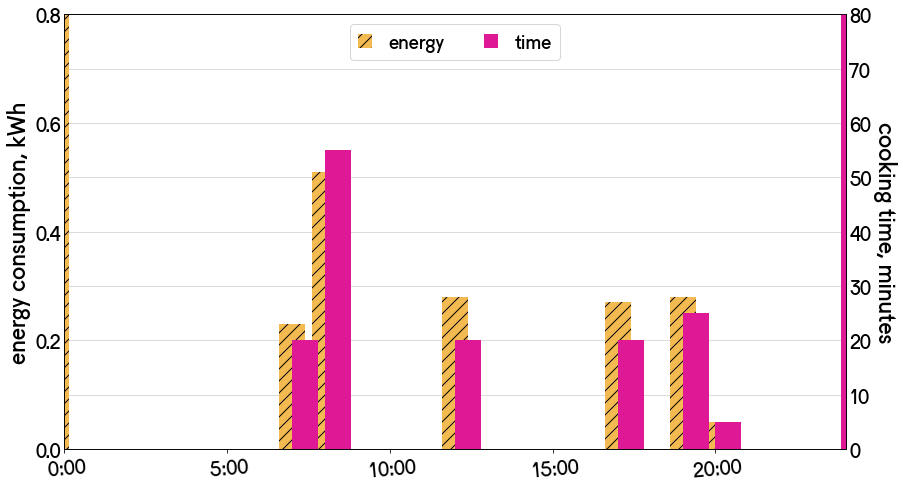

In [768]:
plt.rcParams['figure.figsize'] = [14, 8]
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=20)
rcParams['axes.facecolor'] = 'white'

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 


df_cs_grouped_statistics = all_meter_bar_chart('datehour', 546332)
df_cs_grouped_statistics = df_cs_grouped_statistics.loc[df_cs_grouped_statistics['timestamp_day']==pd.to_datetime('2020-10-20')]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

ax1.set_xlim(0,24)
ax1.set_ylim(0,0.8)
ax2.set_ylim(0,80)


x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
ax1.bar(x1,y1, color='#F4BA52', label='energy', zorder=2.52, hatch="//")


x2 = df_cs_grouped_statistics.timestamp
y2 = df_cs_grouped_statistics.cooking_time
ax2.bar(x2,y2, color='#DF1995', label='time', zorder=2.52, align = 'edge')

ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00'))

ax1.grid(axis='y', which='both', color='lightgray')
ax2.grid(False)

ax1.bar(0, 1, color='#F4BA52', alpha = 1.0, label=None, width = 0.3, hatch="//")
ax1.bar(24, 1, color='#DF1995', alpha = 1.0, label=None, width = 0.3, zorder=8)

#ax2.bar(df_epc100_grouped_statistics_user['timestamp'], (df_epc100_grouped_statistics_user['cooking_session']), alpha = 1, color='#DF1995', linewidth=0, edgecolor='none', label='events', zorder=1, align = 'edge')
#ax1.bar(df_epc100_grouped_statistics_user['timestamp'], df_epc100_grouped_statistics_user['energy_gen'], alpha=1, color='#F4BA52', label='energy', zorder=3, hatch="//", linewidth=1, edgecolor='black')

ax2.set_ylabel('cooking time, minutes', fontstyle='normal', fontweight='bold', rotation=-90, labelpad=25, color = 'black')
ax1.set_ylabel('energy consumption, kWh', fontstyle='normal', fontweight='bold', color = 'black')
ax1.set_xlabel(None, labelpad=6, fontstyle='normal', fontweight='bold')

ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax1.tick_params(axis='x', bottom=True, rotation=5)
ax1.tick_params(axis='y',length=0) 
ax1.tick_params(which='minor', length=0, zorder=4)
ax2.tick_params(axis='y',length=0, zorder=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines + lines2, labels + labels2, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=True) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/cooking_sessions_day.png', dpi=200)
plt.show()

In [31]:
df_cooking_duration = df_epc100_grouped.copy()
#df_cooking_duration.reset_index(inplace=True)

df_cooking_duration = df_cooking_duration.groupby(pd.cut(df_cooking_duration['cooking_time'],\
                                                         [0,5,10,15,20,30,40,50,60,80,100,175,200,300,400])).agg({'energy_gen':'sum', 'power_mean':'mean', 'cooking_session' : 'nunique', 'timestamp' : 'nunique', 'meter_number' :'nunique'})
df_cooking_duration

energy_gen  power_mean  cooking_session  timestamp  meter_number
cooking_time                                                                  
(0, 5]             21.67    0.726369              358        356            67
(5, 10]            54.08    0.693333              468        466            73
(10, 15]           66.30    0.648411              409        407            70
(15, 20]           78.87    0.599013              395        392            67
(20, 30]          180.54    0.537908              738        727            73
(30, 40]          139.22    0.444226              504        500            74
(40, 50]          119.97    0.386700              395        391            66
(50, 60]           78.11    0.368553              223        222            53
(60, 80]          108.61    0.316320              287        286            61
(80, 100]          92.44    0.259086              234        232            52
(100, 175]        114.43    0.262614              209        205            56
(175, 200]         11.62    0.287769               13         13            11
(200, 300]          8.77    0.195760               11         11             9
(300, 400]          5.71    0.172771                6          6             3

In [32]:
df_cooking_duration.to_csv('result/time_duration.csv', index=True)

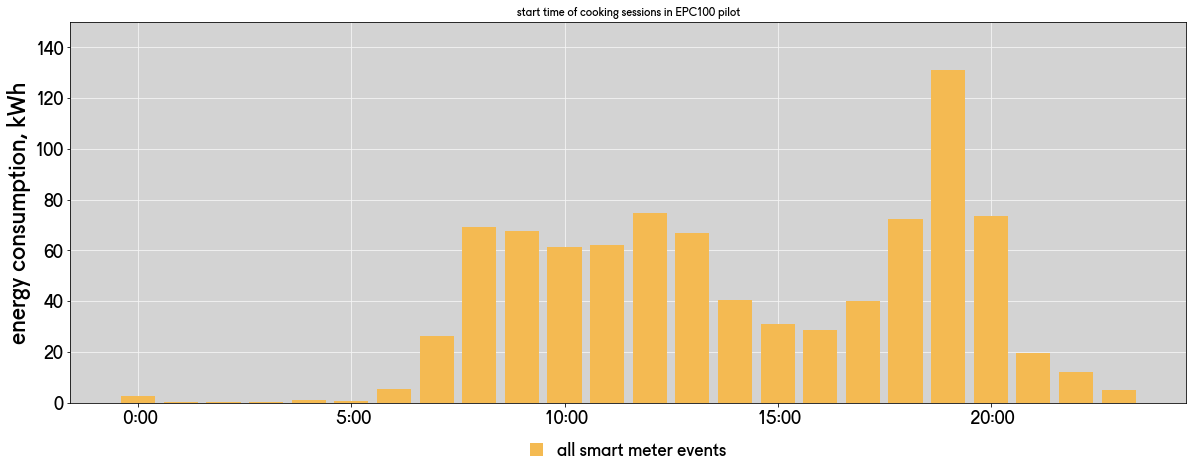

In [387]:
plt.rcParams['figure.figsize'] = [20, 7]

df_cs_grouped_statistics = all_meter_bar_chart('hour', 0)
#df_cs_grouped_statistics_hu = df_cs_grouped_statistics[df_cs_grouped_statistics['group'] == 1]

x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen


plt.gca().xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00')) 

plt.gca().set_ylim(0,150)
plt.bar(x1,y1, color='#F4BA52', label='all smart meter events', zorder=2.52)

plt.gca().grid(True, which='both', color='whitesmoke')

lines, labels = plt.gca().get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.06), ncol=3, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.ylabel('energy consumption, kWh')

plt.title('start time of cooking sessions in EPC100 pilot')

plt.savefig('visuals/energy_gen_day.png'); plt.show()

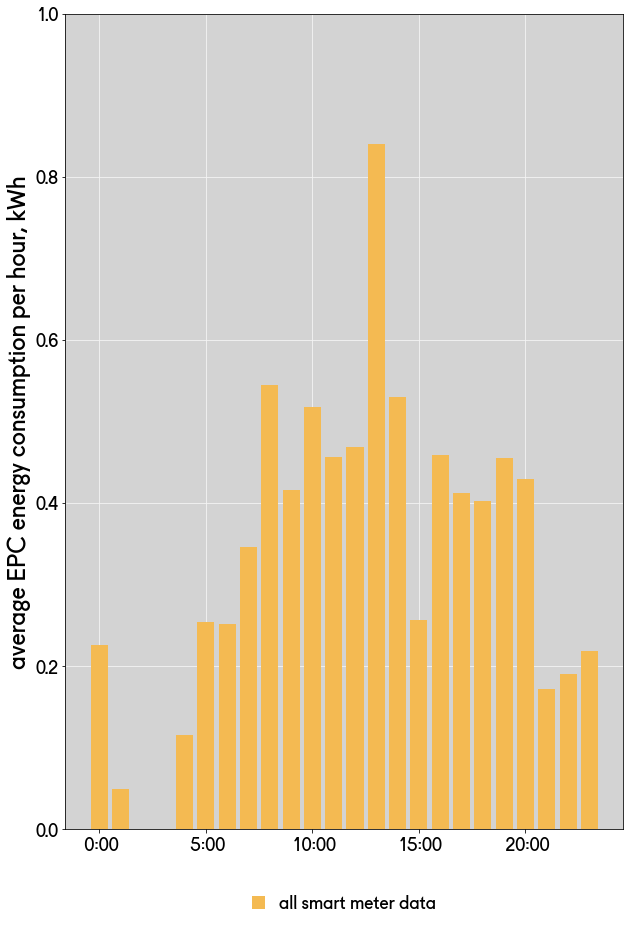

In [389]:
plt.rcParams['figure.figsize'] = [10, 15]

df_cs_grouped_statistics = all_meter_bar_chart('hour_hh_all', 0)
#df_cs_grouped_statistics_hu = df_cs_grouped_statistics[df_cs_grouped_statistics['usage_rank'] == 100]
#df_cs_grouped_statistics_mu = df_cs_grouped_statistics[df_cs_grouped_statistics['usage_rank'] == 50]
#df_cs_grouped_statistics_lu = df_cs_grouped_statistics[df_cs_grouped_statistics['usage_rank'] == 1]

x1 = df_cs_grouped_statistics.timestamp
y1 = df_cs_grouped_statistics.energy_gen
#x2 = df_cs_grouped_statistics_mu.timestamp
#y2 = df_cs_grouped_statistics_mu.energy_gen
#x3 = df_cs_grouped_statistics_lu.timestamp
#y3 = df_cs_grouped_statistics_lu.energy_gen


plt.gca().xaxis.set_major_formatter(FormatStrFormatter('% 1.0f:00')) 

plt.gca().set_ylim(0,1.0)
plt.bar(x1,y1, color='#F4BA52', label='all smart meter data', zorder=2.52)
#plt.bar(x2,y2, color='#CA597D', label='median user', zorder=2.53)
#plt.bar(x3,y3, color='darkgray', label='bottom user', zorder=2.54)

plt.gca().grid(True, which='both', color='whitesmoke')

lines, labels = plt.gca().get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.7, loc='upper center', bbox_to_anchor=(0.5, -0.06), ncol=3, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.ylabel('average EPC energy consumption per hour, kWh')

plt.savefig('visuals/user_consumption_day.png'); plt.show()

In [142]:
df_steady2 = df_epc100.copy()
df_steady2.reset_index(inplace=True)

In [143]:
df_steady2.drop(df_steady2[(((df_steady2.timestamp < pd.to_datetime('2020-06-01 00:00:00'))) == True)].index, inplace = True)
df_steady2.drop(df_steady2[(((df_steady2.timestamp >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)

In [144]:
df_steady2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28976 entries, 265 to 90134
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   timestamp         28976 non-null  datetime64[ns] 
 1   id                28976 non-null  int64          
 2   meter_number      28976 non-null  int64          
 3   timezone          28976 non-null  object         
 4   region            28976 non-null  object         
 5   fetch_index       28976 non-null  int64          
 6   energy            28976 non-null  float64        
 7   voltage           28976 non-null  float64        
 8   current           28976 non-null  float64        
 9   power             28976 non-null  float64        
 10  power_factor      28971 non-null  float64        
 11  frequency         28971 non-null  float64        
 12  time_gap          1868 non-null   timedelta64[ns]
 13  energy_gap        198 non-null    float64        
 14  load

In [2249]:
df_honeymoon_grouped = df_epc100_grouped.copy()
df_honeymoon_grouped.reset_index(inplace=True)
df_honeymoon_grouped.drop(df_honeymoon_grouped[(((df_honeymoon_grouped.timestamp < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_honeymoon_grouped.drop(df_honeymoon_grouped[(((df_honeymoon_grouped.timestamp >= pd.to_datetime('2020-06-01 00:00:00'))) == True)].index, inplace = True)
df_honeymoon_grouped['timestamp'] = df_honeymoon_grouped['timestamp'].dt.hour

df_steady_grouped = df_epc100_grouped.copy()
df_steady_grouped.reset_index(inplace=True)
df_steady_grouped.drop(df_steady_grouped[(((df_steady_grouped.timestamp < pd.to_datetime('2020-06-01 00:00:00'))) == True)].index, inplace = True)
df_steady_grouped.drop(df_steady_grouped[(((df_steady_grouped.timestamp >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
weekNumber_steady_grouped = pd.to_datetime(df_steady_grouped.timestamp, errors ='coerce')
weekNumber_steady_grouped = weekNumber_steady_grouped.dt.isocalendar().week
df_steady_grouped['timestamp'] = df_steady_grouped['timestamp'].dt.hour

df_tariff_grouped = df_epc100_grouped.copy()
df_tariff_grouped.reset_index(inplace=True)
df_tariff_grouped.drop(df_tariff_grouped[(((df_tariff_grouped.timestamp < pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)
df_tariff_grouped.drop(df_tariff_grouped[(((df_tariff_grouped.timestamp >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)
df_tariff_grouped['timestamp'] = df_tariff_grouped['timestamp'].dt.hour

df_whole_grouped = df_epc100_grouped.copy()
df_whole_grouped.reset_index(inplace=True)
df_whole_grouped.drop(df_whole_grouped[(((df_whole_grouped.timestamp < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_whole_grouped.drop(df_whole_grouped[(((df_whole_grouped.timestamp >= pd.to_datetime('2020-11-15 00:00:00'))) == True)].index, inplace = True)

df_until_low_tariff_grouped = df_epc100_grouped.copy()
df_until_low_tariff_grouped.reset_index(inplace=True)
df_until_low_tariff_grouped.drop(df_until_low_tariff_grouped[(((df_until_low_tariff_grouped.timestamp < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_until_low_tariff_grouped.drop(df_until_low_tariff_grouped[(((df_until_low_tariff_grouped.timestamp >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)

In [1313]:
list2 = [0,0,0,0]
list2[0] = df_whole.energy_gen.sum()
list2[1] = df_honeymoon.energy_gen.sum()
list2[2] = df_steady.energy_gen.sum()
list2[3] = df_tariff.energy_gen.sum()

list = [0,0,0,0]
list[0] = df_whole.session_index.nunique()
list[1] = df_honeymoon.session_index.nunique()
list[2] = df_steady.session_index.nunique()
list[3] = df_tariff.session_index.nunique()
list

[3824, 1561, 857, 1406]

In [1314]:
list2

[916.9599999999998, 334.33000000000004, 186.70999999999992, 395.9199999999999]

In [1307]:
df_whole

index  meter_number  cooking_session location  energy  energy_start  \
0         0        546281              1.0   [Bezi]    0.14          0.00   
1         1        546281              3.0   [Bezi]    0.48          0.26   
2         2        546281              5.0   [Bezi]    0.64          0.55   
3         3        546281              7.0   [Bezi]    0.90          0.69   
4         4        546281              9.0   [Bezi]    1.09          0.96   
...     ...           ...              ...      ...     ...           ...   
4245   5082        546379           5924.0  [Nemba]    2.04          1.70   
4246   5085        546380           5927.0   [Bezi]    0.53          0.49   
4247   5086        546380           5928.0   [Bezi]    0.92          0.58   
4248   5087        546380           5929.0   [Bezi]    1.49          0.95   
4249   5088        546380           5930.0   [Bezi]    3.39          1.58   

      energy_gen     power  cooking_time           timestamp  ...   current  \
0           0.14  0.654359          10.0 2020-03-10 21:50:00  ...  2.870000   
1           0.22  0.404363          65.0 2020-03-11 08:50:00  ...  1.767778   
2           0.09  0.388817          20.0 2020-03-11 19:40:00  ...  1.710400   
3           0.21  0.853257          15.0 2020-03-12 09:05:00  ...  3.757417   
4           0.13  0.981175          10.0 2020-03-12 19:50:00  ...  4.310333   
...          ...       ...           ...                 ...  ...       ...   
4245        0.34  0.280446          80.0 2020-03-14 09:40:00  ...  1.244118   
4246        0.04  0.323970          10.0 2020-03-13 13:55:00  ...  1.430333   
4247        0.34  0.162565         155.0 2020-04-01 11:45:00  ...  0.716400   
4248        0.54  0.531858          50.0 2020-04-01 14:25:00  ...  2.344364   
4249        1.81  0.343748         250.0 2020-04-01 15:20:00  ...  1.515824   

      group  usage_rank  latest_energy  no_recordings   id  power_mean  \
0       1.0          78          28.40              3  311    0.840000   
1       1.0          78          28.40             12  311    0.203077   
2       1.0          78          28.40              5  311    0.270000   
3       1.0          78          28.40              4  311    0.840000   
4       1.0          78          28.40              3  311    0.780000   
...     ...         ...            ...            ...  ...         ...   
4245    3.0          19           2.35             17  216    0.255000   
4246    2.0          30           5.00              3  219    0.240000   
4247    2.0          30           5.00             30  219    0.131613   
4248    2.0          30           5.00             11  219    0.648000   
4249    2.0          30           5.00             51  219    0.434400   

      cooking_cost  session_index  energy_gen_std  
0            280.0              1            0.14  
1            440.0              2            0.22  
2            180.0              3            0.09  
3            420.0              4            0.21  
4            260.0              5            0.13  
...            ...            ...             ...  
4245         680.0           4246            0.34  
4246          80.0           4247            0.04  
4247         680.0           4248            0.34  
4248        1080.0           4249            0.54  
4249        3620.0           4250            1.81  

[3824 rows x 21 columns]

In [347]:
df_steady.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 29 to 4191
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             857 non-null    int64         
 1   meter_number      857 non-null    int64         
 2   cooking_session   857 non-null    float64       
 3   location          857 non-null    object        
 4   energy            857 non-null    float64       
 5   energy_start      857 non-null    float64       
 6   energy_gen        857 non-null    float64       
 7   power             857 non-null    float64       
 8   cooking_time      857 non-null    float64       
 9   timestamp         857 non-null    int64         
 10  cooking_time_end  857 non-null    datetime64[ns]
 11  current           857 non-null    float64       
 12  group             857 non-null    float64       
 13  usage_rank        857 non-null    int64         
 14  latest_energy     857 no

In [348]:
weekNumber_steady

29      25
30      26
31      27
32      27
33      27
        ..
4187    38
4188    38
4189    39
4190    39
4191    40
Name: week, Length: 857, dtype: UInt32

In [349]:
cooking_sessions_top_user

energy_gen  power_mean  cooking_session       cooking_time  \
timestamp                                                                
2020-03-10        0.25      0.4500                2       [20.0, 10.0]   
2020-03-11        0.41      0.4900                3       [10.0, 20.0]   
2020-03-12        0.38      0.4590                3  [40.0, 25.0, 5.0]   
2020-03-13        0.30      0.4500                2             [20.0]   
2020-03-14        0.15      0.9000                1             [10.0]   
...                ...         ...              ...                ...   
2020-11-10        0.39      0.6975                2       [40.0, 10.0]   
2020-11-11        0.28      0.8400                2             [10.0]   
2020-11-12        0.34      0.4080                1             [50.0]   
2020-11-13        0.07      0.2800                1             [15.0]   
2020-11-14        0.09      0.5400                1             [10.0]   

            usage_rank  
timestamp               
2020-03-10         100  
2020-03-11         100  
2020-03-12         100  
2020-03-13         100  
2020-03-14         100  
...                ...  
2020-11-10         100  
2020-11-11         100  
2020-11-12         100  
2020-11-13         100  
2020-11-14         100  

[132 rows x 5 columns]

In [1603]:
#cooking_546308_low_user = df_whole.loc [ df_whole [ 'meter_number' ] == 546308]

In [1617]:
cooking_546375_top_user_steady = df_steady.loc [ df_steady [ 'meter_number' ] == 546375 ]
cooking_546375_top_user_steady.energy_gen.sum()

46.449999999999925

In [1618]:
cooking_546375_top_user_steady.cooking_session.nunique()

152

In [1615]:
cooking_546375_top_user_honeymoon = df_honeymoon.loc [ df_honeymoon [ 'meter_number' ] == 546375 ]
cooking_546375_top_user_honeymoon.energy_gen.sum()

8.61

In [1616]:
cooking_546375_top_user_honeymoon.cooking_session.nunique()

54

In [1613]:
cooking_546375_top_user = df_until_low_tariff.loc [ df_until_low_tariff [ 'meter_number' ] == 546375 ]
cooking_546375_top_user.energy_gen.sum()

55.059999999999924

In [1614]:
cooking_546375_top_user.cooking_session.nunique()

206

In [1611]:
cooking_546316_high_user = df_until_low_tariff.loc [ df_until_low_tariff [ 'meter_number' ] == 546316]
cooking_546316_high_user.energy_gen.sum()

5.669999999999999

In [1612]:
cooking_546316_high_user.cooking_session.nunique()

33

In [1696]:
cooking_546375_top_user_whole = df_whole.loc [ df_whole [ 'meter_number' ] == 546375]
print(cooking_546375_top_user_whole.energy_gen.sum())
print(cooking_546375_top_user_whole.cooking_session.nunique())

88.02999999999977
319


In [1697]:
cooking_546375_top_user_tariff = df_tariff.loc [ df_tariff [ 'meter_number' ] == 546375]
print(cooking_546375_top_user_tariff.energy_gen.sum())
print(cooking_546375_top_user_tariff.cooking_session.nunique())

32.96999999999986
113


In [1694]:
cooking_546316_high_user_whole = df_whole.loc [ df_whole [ 'meter_number' ] == 546316]
print(cooking_546316_high_user_whole.energy_gen.sum())
print(cooking_546316_high_user_whole.cooking_session.nunique())

10.59
55


In [1695]:
cooking_546316_high_user_tariff = df_tariff.loc [ df_tariff [ 'meter_number' ] == 546316]
print(cooking_546316_high_user_tariff.energy_gen.sum())
print(cooking_546316_high_user_tariff.cooking_session.nunique())

4.92
22


In [1608]:
cooking_546333_medium_user = df_until_low_tariff.loc [ df_until_low_tariff [ 'meter_number' ] == 546333]
cooking_546333_medium_user.energy_gen.sum()

2.19

In [1610]:
cooking_546333_medium_user.cooking_session.nunique()

14

In [1692]:
cooking_546333_medium_user_whole = df_whole.loc [ df_whole [ 'meter_number' ] == 546333]
print(cooking_546333_medium_user_whole.energy_gen.sum())
print(cooking_546333_medium_user_whole.cooking_session.nunique())

14.22
53


In [1693]:
cooking_546333_medium_user_tariff = df_tariff.loc [ df_tariff [ 'meter_number' ] == 546333]
print(cooking_546333_medium_user_tariff.energy_gen.sum())
print(cooking_546333_medium_user_tariff.cooking_session.nunique())

12.030000000000001
39


In [1691]:
cooking_546308_low_user_whole = df_whole.loc [ df_whole [ 'meter_number' ] == 546308]
print(cooking_546308_low_user_whole.energy_gen.sum())
print(cooking_546308_low_user_whole.cooking_session.nunique())

5.220000000000001
21


In [1690]:
cooking_546308_low_user_tariff = df_tariff.loc [ df_tariff [ 'meter_number' ] == 546308]
print(cooking_546308_low_user_tariff.energy_gen.sum())
print(cooking_546308_low_user_tariff.cooking_session.nunique())

4.0
14


In [1604]:
cooking_546308_low_user = df_until_low_tariff.loc [ df_until_low_tariff [ 'meter_number' ] == 546308]

In [1607]:
cooking_546308_low_user.energy_gen.sum()

1.22

In [350]:
cooking_sessions_top_user = df_whole.loc [ df_whole [ 'meter_number' ] == 546375 ] # <- look at info of specific meter # top: 546375 # median: 546281

In [351]:
cooking_sessions_median_user = df_whole.loc [ df_whole [ 'meter_number' ] == 546281 ] # <- look at info of specific meter # top: 546375 # median: 546281

In [352]:
cooking_sessions_top_user = cooking_sessions_top_user.groupby([cooking_sessions_top_user['timestamp'].dt.date])\
.agg({'energy_gen':'sum', 'power_mean':'mean', 'cooking_session' : 'nunique', 'cooking_time' :'unique', 'usage_rank' : 'mean'})

In [353]:
cooking_sessions_median_user = cooking_sessions_median_user.groupby([cooking_sessions_median_user['timestamp'].dt.date])\
.agg({'energy_gen':'sum', 'power_mean':'mean', 'cooking_session' : 'nunique', 'cooking_time' :'unique', 'usage_rank' : 'mean'})

In [354]:
cooking_sessions_top_user.to_csv('result/cooking_sessions_top_user.csv', index=True)
cooking_sessions_median_user.to_csv('result/cooking_sessions_median_user.csv', index=True)

In [355]:
cooking_sessions_median_user

energy_gen  power_mean  cooking_session  \
timestamp                                             
2020-03-10        0.14    0.840000                1   
2020-03-11        0.31    0.236538                2   
2020-03-12        0.48    0.726667                3   
2020-03-13        0.15    0.900000                1   
2020-03-15        0.32    0.480000                1   
...                ...         ...              ...   
2020-11-05        1.17    0.691733                3   
2020-11-07        0.24    0.180000                1   
2020-11-08        0.68    0.534510                3   
2020-11-09        0.84    0.689524                3   
2020-11-10        0.53    0.428000                5   

                             cooking_time  usage_rank  
timestamp                                              
2020-03-10                         [10.0]          78  
2020-03-11                   [65.0, 20.0]          78  
2020-03-12                   [15.0, 10.0]          78  
2020-03-13                         [10.0]          78  
2020-03-15                         [40.0]          78  
...                                   ...         ...  
2020-11-05                  [15.0, 125.0]          78  
2020-11-07                         [80.0]          78  
2020-11-08             [85.0, 15.0, 20.0]          78  
2020-11-09             [10.0, 70.0, 30.0]          78  
2020-11-10  [15.0, 10.0, 25.0, 20.0, 5.0]          78  

[62 rows x 5 columns]

In [356]:
cooking_sessions_top_user

energy_gen  power_mean  cooking_session       cooking_time  \
timestamp                                                                
2020-03-10        0.25      0.4500                2       [20.0, 10.0]   
2020-03-11        0.41      0.4900                3       [10.0, 20.0]   
2020-03-12        0.38      0.4590                3  [40.0, 25.0, 5.0]   
2020-03-13        0.30      0.4500                2             [20.0]   
2020-03-14        0.15      0.9000                1             [10.0]   
...                ...         ...              ...                ...   
2020-11-10        0.39      0.6975                2       [40.0, 10.0]   
2020-11-11        0.28      0.8400                2             [10.0]   
2020-11-12        0.34      0.4080                1             [50.0]   
2020-11-13        0.07      0.2800                1             [15.0]   
2020-11-14        0.09      0.5400                1             [10.0]   

            usage_rank  
timestamp               
2020-03-10         100  
2020-03-11         100  
2020-03-12         100  
2020-03-13         100  
2020-03-14         100  
...                ...  
2020-11-10         100  
2020-11-11         100  
2020-11-12         100  
2020-11-13         100  
2020-11-14         100  

[132 rows x 5 columns]

In [1315]:
d0 = pd.to_datetime('2020-03-09 00:00:00')
d1 = pd.to_datetime('2020-06-01 00:00:00')
delta = d1 - d0
print('no. of days: '+str(delta.days))
print('no. of weeks: '+str(delta.days/7))
print('kWh per day: '+str(df_honeymoon_statistics.energy_gen.sum()/delta.days))
print('events per day: '+str(df_honeymoon_statistics.cooking_session.sum()/delta.days))
df_honeymoon_statistics.cooking_session.sum()

no. of days: 84
no. of weeks: 12.0
kWh per day: 4.06642857142857
events per day: 18.86904761904762


1585

In [358]:
df_inventory = pd.read_csv('startkit_csvs/epc-pilot-list.csv', sep = ',') # Complete EPC Pilot Information list

In [1699]:
d0 = pd.to_datetime('2020-03-09 00:00:00')
d1 = pd.to_datetime('2020-11-15 00:00:00')
delta = d1 - d0
print(delta.days)
print(delta.days/7)
print('no. of days: '+str(delta.days))
print('no. of weeks: '+str(delta.days/7))
print('kWh per day: '+str(df_whole_statistics.energy_gen.sum()/delta.days))
print('events per day: '+str(df_whole_statistics.cooking_session.sum()/delta.days))

251
35.857142857142854
no. of days: 251
no. of weeks: 35.857142857142854
kWh per day: 3.6532270916334655
events per day: 15.235059760956176


In [954]:
d0 = pd.to_datetime('2020-06-01 00:00:00')
d1 = pd.to_datetime('2020-10-01 00:00:00')
delta = d1 - d0
print('no. of days: '+str(delta.days))
print('no. of weeks: '+str(delta.days/7))
print('kWh per day: '+str(df_steady_statistics.energy_gen.sum()/delta.days))
print('events per day: '+str(df_steady_statistics.cooking_session.sum()/delta.days))
df_steady_statistics.cooking_session.sum()

no. of days: 122
no. of weeks: 17.428571428571427
kWh per day: 1.5304098360655731
events per day: 7.024590163934426


857

In [1698]:
d0 = pd.to_datetime('2020-03-09 00:00:00')
d1 = pd.to_datetime('2020-10-01 00:00:00')
delta = d1 - d0

print('no. of days: '+str(delta.days))
print('no. of weeks: '+str(delta.days/7))
print('kWh per day: '+str(df_until_low_tariff_statistics.energy_gen.sum()/delta.days))
print('events per day: '+str(df_until_low_tariff_statistics.cooking_session.sum()/delta.days))

no. of days: 206
no. of weeks: 29.428571428571427
kWh per day: 2.5293203883495137
events per day: 11.737864077669903


In [956]:
d0 = pd.to_datetime('2020-10-01 00:00:00')
d1 = pd.to_datetime('2020-11-15 00:00:00')
delta = d1 - d0

print('no. of days: '+str(delta.days))
print('no. of weeks: '+str(delta.days/7))
print('kWh per day: '+str(df_tariff_statistics.energy_gen.sum()/delta.days))
print('events per day: '+str(df_tariff_statistics.cooking_session.sum()/delta.days))
df_tariff_statistics.cooking_session.sum()

45
6.428571428571429
8.79822222222222
31.244444444444444
no. of days: 45
no. of weeks: 6.428571428571429
kWh per day: 8.79822222222222
events per day: 31.244444444444444


1406

In [950]:
31.2/11.4

2.736842105263158

In [951]:
8.80/2.47

3.562753036437247

In [1367]:
df_honeymoon['ntimestamp'] = df_honeymoon['timestamp']
df_honeymoon_statistics = df_honeymoon.groupby(df_honeymoon.meter_number).agg({'energy_gen':'sum', 'power_mean':'mean', 'cooking_session' : 'nunique', 'timestamp' : 'unique', 'ntimestamp' : 'nunique', 'cooking_time' :'unique', 'usage_rank' : 'mean'})
df_honeymoon_statistics.sort_values(by =['cooking_session'], ascending=[False], inplace=True)
df_honeymoon_statistics.head(50)
df_honeymoon_statistics.reset_index(inplace=True)
df_honeymoon_statistics['quantiles'] = pd.qcut(df_honeymoon_statistics.cooking_session, 4, labels=None)
df_honeymoon_statistics['site'] = df_honeymoon_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_honeymoon_statistics.to_csv('result/honeymoon.csv', index=False)

In [1368]:
df_whole['ntimestamp'] = df_whole['timestamp']
df_whole_statistics = df_whole.groupby(df_whole.meter_number).agg({'energy_gen':'sum', 'power_mean':'mean', 'cooking_session' : 'nunique', 'timestamp' : 'unique', 'ntimestamp' : 'nunique', 'cooking_time' :'unique', 'usage_rank' : 'mean'})
df_whole_statistics.sort_values(by =['cooking_session'], ascending=[False], inplace=True)
df_whole_statistics.head(50)
df_whole_statistics.reset_index(inplace=True)
df_whole_statistics['site'] = df_whole_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_whole_statistics.to_csv('result/whole.csv', index=False)

In [1369]:
df_honeymoon_statistics.head(60)

meter_number  energy_gen  power_mean  cooking_session  \
0         546336       28.83    0.480017              110   
1         546290       13.37    0.496233               85   
2         546309       17.58    0.228995               80   
3         546307       14.81    0.475364               66   
4         546376       12.08    0.531850               64   
5         546354       10.28    0.423528               57   
6         546375        8.61    0.441648               54   
7         546296       14.49    0.565355               48   
8         546311       11.51    0.456683               46   
9         546295       13.37    0.607456               44   
10        546301        9.66    0.410563               42   
11        546373        9.64    0.726360               39   
12        546323        7.10    0.660503               36   
13        546361        6.82    0.589576               35   
14        546360        6.70    0.489693               34   
15        546281        5.16    0.619164               29   
16        546321        2.98    0.539372               28   
17        546340        5.87    0.616769               27   
18        546282        7.68    0.415116               26   
19        546319        4.63    0.505285               26   
20        546328        8.13    0.438129               25   
21        546378        4.68    0.734030               24   
22        546302        3.31    0.585993               23   
23        546331        3.39    0.383971               23   
24        546377        5.57    0.248806               23   
25        546363        4.47    0.497259               22   
26        546329        2.66    0.494650               20   
27        546314        2.64    0.508870               18   
28        546316        2.49    0.719074               18   
29        546347        3.99    0.613966               17   
30        546344        4.11    0.525662               16   
31        546313        3.92    0.625295               15   
32        546322        3.46    0.769905               15   
33        546371        3.14    0.506886               14   
34        546352        3.26    0.234065               14   
35        546326        2.83    0.593381               13   
36        546294        2.54    0.483441               13   
37        546284        2.45    0.286649               12   
38        546310        1.71    0.216725               12   
39        546351        3.12    0.496000               12   
40        546325        1.90    0.578364               11   
41        546320        1.85    0.311309               10   
42        546338        1.62    0.286697               10   
43        546356        2.19    0.523986               10   
44        546355        1.51    0.602800               10   
45        546303        1.56    0.411857               10   
46        546333        1.33    0.625704                9   
47        546343        2.01    0.609045                9   
48        546353        2.73    0.466623                9   
49        546349        1.47    0.546222                9   
50        546341        1.52    0.490741                9   
51        546298        1.33    0.732500                8   
52        546358        1.35    0.667810                7   
53        546308        1.22    0.512000                7   
54        546337        1.66    0.609414                7   
55        546292        2.02    0.432609                7   
56        546359        1.45    0.480342                6   
57        546289        1.66    0.733035                6   
58        546324        0.97    0.573889                6   
59        546334        1.38    0.608396                5   

                                            timestamp  ntimestamp  \
0   [14, 15, 16, 23, 10, 1, 13, 0, 12, 20, 22, 9, ...          18   
1   [19, 11, 20, 16, 17, 9, 13, 10, 14, 12, 21, 18...          15   
2         [12, 11, 13, 18, 19, 16, 17, 10, 15, 14, 9]          11   
3   [1

In [1370]:
df_honeymoon_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   meter_number     83 non-null     int64   
 1   energy_gen       83 non-null     float64 
 2   power_mean       83 non-null     float64 
 3   cooking_session  83 non-null     int64   
 4   timestamp        83 non-null     object  
 5   ntimestamp       83 non-null     int64   
 6   cooking_time     83 non-null     object  
 7   usage_rank       83 non-null     int64   
 8   quantiles        83 non-null     category
 9   site             83 non-null     object  
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 6.3+ KB


In [1371]:
13.142857142857142

13.142857142857142

In [1372]:
15/13.142857142857142

1.141304347826087

In [1373]:
df_honeymoon_statistics.tail(60)

meter_number  energy_gen  power_mean  cooking_session  \
23        546331        3.39    0.383971               23   
24        546377        5.57    0.248806               23   
25        546363        4.47    0.497259               22   
26        546329        2.66    0.494650               20   
27        546314        2.64    0.508870               18   
28        546316        2.49    0.719074               18   
29        546347        3.99    0.613966               17   
30        546344        4.11    0.525662               16   
31        546313        3.92    0.625295               15   
32        546322        3.46    0.769905               15   
33        546371        3.14    0.506886               14   
34        546352        3.26    0.234065               14   
35        546326        2.83    0.593381               13   
36        546294        2.54    0.483441               13   
37        546284        2.45    0.286649               12   
38        546310        1.71    0.216725               12   
39        546351        3.12    0.496000               12   
40        546325        1.90    0.578364               11   
41        546320        1.85    0.311309               10   
42        546338        1.62    0.286697               10   
43        546356        2.19    0.523986               10   
44        546355        1.51    0.602800               10   
45        546303        1.56    0.411857               10   
46        546333        1.33    0.625704                9   
47        546343        2.01    0.609045                9   
48        546353        2.73    0.466623                9   
49        546349        1.47    0.546222                9   
50        546341        1.52    0.490741                9   
51        546298        1.33    0.732500                8   
52        546358        1.35    0.667810                7   
53        546308        1.22    0.512000                7   
54        546337        1.66    0.609414                7   
55        546292        2.02    0.432609                7   
56        546359        1.45    0.480342                6   
57        546289        1.66    0.733035                6   
58        546324        0.97    0.573889                6   
59        546334        1.38    0.608396                5   
60        546345        1.45    0.799371                5   
61        546339        1.27    0.406636                5   
62        546287        0.93    0.528429                5   
63        546372        0.99    0.631200                5   
64        546297        1.31    0.444808                5   
65        546305        0.92    0.491522                5   
66        546380        2.73    0.363503                4   
67        546350        0.84    0.722000                4   
68        546315        1.56    0.536104                4   
69        546332        0.79    0.292110                4   
70        546357        1.02    0.402198                3   
71        546348        0.59    0.404000                3   
72        546342        0.71    0.626667                3   
73        546312        0.34    0.345000                3   
74        546285        0.44    0.300000                2   
75        546283        0.80    0.229876                2   
76        546379        0.62    0.407500                2   
77        546318        0.26    0.588000                2   
78        546291        0.16    0.384000                1   
79        546368        0.34    0.816000                1   
80        546299        0.01    0.120000                1   
81        546330        0.14    0.840000                1   
82        546327        0.34    0.214737                1   

                                       timestamp  ntimestamp  \
23           [13, 14, 15, 21, 11, 19, 10, 9, 20]           9   
24       [14, 16, 21, 22, 9, 13, 15, 17, 19, 12]          10   
25  [23, 19, 0, 12, 8, 7, 14, 17, 20, 13, 9, 18]          12   
26                   [18, 

In [1374]:
df_steady_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   meter_number     64 non-null     int64   
 1   energy_gen       64 non-null     float64 
 2   power_mean       64 non-null     float64 
 3   cooking_session  64 non-null     int64   
 4   timestamp        64 non-null     object  
 5   ntimestamp       64 non-null     int64   
 6   cooking_time     64 non-null     object  
 7   usage_rank       64 non-null     int64   
 8   site             64 non-null     object  
 9   quantiles        64 non-null     category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 4.9+ KB


In [1375]:
df_tariff_statistics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 53 to 4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   meter_number     56 non-null     int64   
 1   energy_gen       56 non-null     float64 
 2   power_mean       56 non-null     float64 
 3   cooking_session  56 non-null     int64   
 4   timestamp        56 non-null     object  
 5   ntimestamp       56 non-null     int64   
 6   cooking_time     56 non-null     object  
 7   usage_rank       56 non-null     int64   
 8   site             56 non-null     object  
 9   quantiles        56 non-null     category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 4.6+ KB


In [1376]:
32/17.42

1.8369690011481055

In [1377]:
17.42

17.42

In [1378]:
df_steady['ntimestamp'] = df_steady['timestamp']
df_steady_statistics = df_steady.groupby(df_steady.meter_number).agg({'energy_gen':'sum', 'power_mean':'mean', 'cooking_session' : 'nunique', 'timestamp' : 'unique', 'ntimestamp' : 'nunique', 'cooking_time' :'unique', 'usage_rank':'mean'})
df_steady_statistics.sort_values(by =['cooking_session'], ascending=[False], inplace=True)
df_steady_statistics.reset_index(inplace=True)
df_steady_statistics['site'] = df_steady_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
#df_steady_statistics = df_steady_statistics[df_steady_statistics.cooking_session < 100]
#df_steady_statistics = df_steady_statistics[df_steady_statistics.energy_gen > 0.3]
df_steady_statistics['quantiles'] = pd.qcut(df_steady_statistics.cooking_session, 4, labels=None)
df_steady_statistics.to_csv('result/steady.csv', index=False)
df_steady_statistics.tail(60)

meter_number  energy_gen  power_mean  cooking_session  \
4         546360        9.17    0.708834               41   
5         546377        9.74    0.243423               38   
6         546290        4.04    0.586611               36   
7         546281        5.61    0.714741               32   
8         546302        4.76    0.519740               29   
9         546362        5.34    0.479239               27   
10        546301        5.01    0.746159               27   
11        546309        6.25    0.205593               25   
12        546311        4.25    0.419274               20   
13        546332        2.91    0.676381               20   
14        546363        3.20    0.448167               18   
15        546323        3.03    0.780250               16   
16        546316        3.18    0.790400               15   
17        546355        3.53    0.777556               15   
18        546291        1.53    0.561648               13   
19        546318        1.91    0.796212               12   
20        546303        1.64    0.470063                9   
21        546361        2.07    0.484067                9   
22        546368        2.82    0.796350                9   
23        546296        2.62    0.747968                9   
24        546313        1.17    0.833500                8   
25        546356        1.79    0.479932                8   
26        546340        0.76    0.732500                8   
27        546286        2.77    0.276825                8   
28        546294        2.45    0.374048                7   
29        546326        1.39    0.528929                7   
30        546325        0.62    0.760000                6   
31        546376        0.99    0.573651                6   
32        546297        1.46    0.803667                6   
33        546283        1.35    0.833667                6   
34        546310        0.78    0.158235                5   
35        546333        0.86    0.708000                5   
36        546358        0.90    0.924000                5   
37        546287        1.13    0.499714                5   
38        546373        1.25    0.802857                4   
39        546335        1.11    0.384880                4   
40        546319        1.03    0.495833                4   
41        546330        0.24    0.960000                3   
42        546295        0.81    0.766667                3   
43        546320        0.58    0.331429                3   
44        546322        0.68    0.578095                3   
45        546328        0.73    0.740000                3   
46        546329        0.34    0.680000                3   
47        546331        0.43    0.246667                3   
48        546338        0.32    0.163333                3   
49        546334        0.44    0.720000                2   
50        546282        0.58    0.216713                2   
51        546285        0.16    0.510000                2   
52        546347        0.55    0.470000                2   
53        546306        0.67    0.773571                2   
54        546359        0.14    0.840000                1   
55        546344        0.08    0.960000                1   
56        546354        0.20    0.480000                1   
57        546353        0.16    0.960000                1   
58        546365        0.14    0.840000                1   
59        546351        0.40    0.436364                1   
60        546369        0.11    0.165000                1   
61        546371        0.15    0.900000                1   
62        546345        0.07    0.840000                1   
63        546343        0.22    0.660000                1   

                                            timestamp  ntimestamp  \
4          [18, 12, 10, 9, 8, 17, 11, 19, 20, 14, 16]          11   
5                      [11, 12, 16, 8, 9, 15, 14, 13]           8   
6   [9, 18, 10, 13, 14, 16, 15, 22, 12, 21, 20, 7,...          13   
7     

In [1379]:
27/6.428571428571429

4.2

In [1380]:
df_tariff['ntimestamp'] = df_tariff['timestamp']
df_tariff_statistics = df_tariff.groupby(df_tariff.meter_number).agg({'energy_gen':'sum', 'power_mean':'mean', 'cooking_session' : 'nunique', 'timestamp' : 'unique', 'ntimestamp' : 'nunique', 'cooking_time' :'unique', 'usage_rank':'mean'})
df_tariff_statistics.reset_index(inplace=True)
df_tariff_statistics.sort_values(by =['cooking_session'], ascending=[False], inplace=True)
df_tariff_statistics['site'] = df_tariff_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_tariff_statistics['quantiles'] = pd.qcut(df_tariff_statistics.cooking_session, 4, labels=None)
df_tariff_statistics.to_csv('result/tariff.csv', index=False)
df_tariff_statistics.head(60)

meter_number  energy_gen  power_mean  cooking_session  \
53        546375       32.97    0.568761              113   
12        546302       24.54    0.460307              106   
46        546360       34.95    0.597894               97   
2         546285       26.12    0.426891               90   
41        546350       22.25    0.621543               85   
45        546358       18.64    0.373429               66   
10        546297       21.68    0.512479               58   
38        546341       10.01    0.387988               57   
42        546355       19.06    0.517277               54   
30        546332       11.45    0.604041               50   
19        546313       10.77    0.423823               48   
43        546356       17.23    0.563563               44   
40        546344       14.32    0.425025               41   
31        546333       12.03    0.521147               39   
25        546323        8.08    0.424393               36   
0         546281        7.48    0.651575               29   
47        546361        6.56    0.332306               28   
29        546329        6.83    0.473107               28   
24        546322        7.30    0.342977               27   
9         546296        8.48    0.316215               22   
20        546316        4.92    0.417767               22   
34        546336        5.94    0.631502               21   
54        546376        2.41    0.643000               20   
27        546325        4.47    0.310847               19   
26        546324        3.54    0.485970               19   
55        546377        6.56    0.380099               18   
15        546307        4.05    0.450029               16   
16        546308        4.00    0.376268               14   
48        546362        3.12    0.457800               13   
36        546339        3.92    0.201843               13   
11        546301        8.60    0.653430               13   
14        546306        2.64    0.371125               12   
23        546320        3.84    0.559611                9   
32        546334        2.38    0.548010                9   
21        546318        1.80    0.405550                8   
50        546366        1.20    0.327810                7   
17        546310        0.83    0.132943                7   
35        546337        2.38    0.382968                7   
8         546295        0.56    0.833571                4   
22        546319        1.14    0.493247                4   
13        546303        0.98    0.328071                4   
28        546326        0.38    0.363750                4   
37        546340        1.16    0.356923                3   
52        546369        0.65    0.441667                3   
39        546343        0.24    0.321000                2   
44        546357        0.53    0.660000                2   
7         546294        0.28    0.534545                2   
6         546292        0.22    0.900000                2   
18        546311        0.38    0.685000                2   
49        546363        0.34    0.318333                2   
3         546286        0.94    0.384561                2   
33        546335        0.14    0.560000                1   
5         546291        0.08    0.960000                1   
1         546284        0.35    0.221053                1   
51        546368        0.07    0.840000                1   
4         546287        0.13    0.780000                1   

                                            timestamp  ntimestamp  \
53  [15, 22, 8, 13, 17, 11, 12, 19, 20, 21, 9, 7, ...          18   
12  [8, 12, 20, 21, 10, 14, 16, 11, 13, 19, 15, 17...          15   
46  [18, 11, 13, 12, 10, 19, 16, 20, 9, 15, 8, 14,...          14   
2   [18, 19, 12, 20, 10, 11, 14, 13, 21, 15, 16, 1...          13   
41        [11, 12, 13, 19, 10, 20, 18, 21, 8, 14, 16]          11   
45  [14, 15, 18, 11, 12, 13, 16, 19, 17, 9, 10, 20...          14   
10  [7, 8, 10, 13, 14, 16, 17, 18, 9, 11, 2

In [1406]:
df_until_low_tariff['ntimestamp'] = df_until_low_tariff['timestamp']
df_until_low_tariff_statistics = df_until_low_tariff.groupby(df_until_low_tariff.meter_number).agg({'energy_gen':'sum', 'power_mean':'mean',\
                                                                    'cooking_session' : 'nunique', 'timestamp' : 'unique', 'ntimestamp' : 'nunique', 'cooking_time' :'unique', 'usage_rank':'mean', 'energy':'max'})
df_until_low_tariff_statistics.reset_index(inplace=True)
df_until_low_tariff_statistics.sort_values(by =['cooking_session'], ascending=[True], inplace=True)
df_until_low_tariff_statistics['site'] = df_until_low_tariff_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_until_low_tariff_statistics['quantiles'] = pd.qcut(df_until_low_tariff_statistics.cooking_session, 4, labels=None)
df_until_low_tariff_statistics.to_csv('result/until_low_tariff.csv', index=False)
df_until_low_tariff_statistics.sort_values(by='cooking_session',ascending=True,inplace=True)
df_until_low_tariff_statistics.reset_index(inplace=True)
df_until_low_tariff_statistics.reset_index(inplace=True)
df_until_low_tariff_statistics['level_0'] = df_until_low_tariff_statistics['level_0'] + 11

In [1407]:
df_until_low_tariff_statistics.tail(60)

level_0  index  meter_number  energy_gen  power_mean  cooking_session  \
30       41     62        546349        1.47    0.546222                9   
31       42     55        546341        1.52    0.490741                9   
32       43     66        546353        2.89    0.515961               10   
33       44     57        546343        2.23    0.614141               10   
34       45      6        546287        2.06    0.514071               10   
35       46     79        546368        3.16    0.798315               10   
36       47     14        546297        2.77    0.640549               11   
37       48      3        546284        2.45    0.286649               12   
38       49     71        546358        2.25    0.774556               12   
39       50     52        546338        1.94    0.258228               13   
40       51     34        546320        2.43    0.315952               13   
41       52     64        546351        3.52    0.491413               13   
42       53     65        546352        3.26    0.234065               14   
43       54     47        546333        2.19    0.655095               14   
44       55     32        546318        2.17    0.766468               14   
45       56      9        546291        1.69    0.548959               14   
46       57     81        546371        3.29    0.533093               15   
47       58     39        546325        2.52    0.642471               17   
48       59     25        546310        2.49    0.199522               17   
49       60     58        546344        4.19    0.551212               17   
50       61     69        546356        3.98    0.504406               18   
51       62     36        546322        4.14    0.737937               18   
52       63     29        546314        2.64    0.508870               18   
53       64     60        546347        4.54    0.598812               19   
54       65     19        546303        3.20    0.439429               19   
55       66     40        546326        4.22    0.570822               20   
56       67     11        546294        4.99    0.445154               20   
57       68     28        546313        5.09    0.697714               23   
58       69     43        546329        3.00    0.518826               23   
59       70     46        546332        3.70    0.612336               24   
60       71     87        546378        4.68    0.734030               24   
61       72     68        546355        5.04    0.707653               25   
62       73     45        546331        3.82    0.368128               26   
63       74     75        546362        5.34    0.479239               27   
64       75     35        546321        2.98    0.539372               28   
65       76     42        546328        8.86    0.470473               28   
66       77      1        546282        8.26    0.400944               28   
67       78     33        546319        5.66    0.504025               30   
68       79     31        546316        5.67    0.751495               33   
69       80     54        546340        6.63    0.643222               35   
70       81     76        546363        7.67    0.475168               40   
71       82     83        546373       10.89    0.733476               43   
72       83     74        546361        8.89    0.567994               44   
73       84     78        546366        6.13    0.530851               45   
74       85     12        546295       14.18    0.617618               47   
75       86     18        546302        8.07    0.549044               52   
76       87     37        546323       10.13    0.697348               52   
77       88     13        546296       17.11    0.594188               57   
78       89     67        546354       10.48    0.424502               58   
79       90     86        546377       15.31    0.245453               61   
80       91      0        546281       10.77    0.669303               61   


In [1383]:
#546362
df_until_low_tariff_statistics.loc[df_until_low_tariff_statistics['meter_number'] == 546316] # <- look at info of specific meter # top: 546375 # median: 546281

level_0  index  meter_number  energy_gen  power_mean  cooking_session  \
68       79     31        546316        5.67    0.751495               33   

                                            timestamp  ntimestamp  \
68  [2020-03-17T18:25:00.000000000, 2020-03-18T16:...          33   

                                         cooking_time  usage_rank  energy  \
68  [5.0, 10.0, 20.0, 15.0, 30.0, 90.0, 45.0, 25.0...          62    8.89   

       site      quantiles  
68  Kalenge  (29.5, 206.0]

In [1384]:
df_epc100_max['meter_number2'] = df_epc100_max.latest_energy.map(df_epc100.set_index('latest_energy')['meter_number'].to_dict())

In [1385]:
df_epc100_max['no_cooking_events'] = df_epc100_max.meter_number.map(df_until_low_tariff_statistics.set_index('meter_number')['cooking_session'].to_dict())

In [1386]:
df_epc100_max['quantiles'] = df_epc100_max.meter_number.map(df_until_low_tariff_statistics.set_index('meter_number')['quantiles'].to_dict())

In [1387]:
df_epc100_max.loc[((df_epc100_max.session_index.isnull() == True)), 'no_cooking_events'] = 0

In [1388]:
#df_epc100_max.loc [ df_whole [ 'meter_number' ] == 546281 ] # <- look at info of specific meter # top: 546375 # median: 546281

In [1389]:
df_epc100_max.sort_values('no_cooking_events', ascending=[True], inplace=True)

In [1390]:
df_epc100_max.level_0 = df_epc100_max.level_0 - 1

In [1391]:
#df_epc100_max.reset_index(inplace=True)
#df_epc100_max.reset_index(inplace=True)

In [1392]:
df_epc100_max.level_0 = df_epc100_max.level_0 + 1

In [1393]:
# total events here are only until tariff change

In [1394]:
df_epc100_max.tail(50)

level_0  index  usage_rank  latest_energy            max_time  \
50       51     47          48           9.15 2020-11-20 14:55:00   
51       52     56          57          14.26 2020-11-22 06:00:00   
52       53     74          75          27.05 2020-11-22 16:50:00   
53       54     51          52          12.29 2020-12-01 20:40:00   
54       55     78          79          28.77 2020-11-27 18:15:00   
55       56     32          33           5.39 2020-11-22 06:15:00   
56       57     28          29           4.89 2020-11-17 14:35:00   
57       58     58          59          14.82 2020-11-29 18:45:00   
58       59     40          41           7.81 2020-11-17 12:40:00   
59       60     93          94          43.89 2020-12-01 18:45:00   
61       62     25          26           4.36 2020-11-17 18:25:00   
62       63     69          70          21.19 2020-11-29 14:05:00   
60       61     83          84          31.22 2020-11-19 08:00:00   
63       64     34          35           6.39 2020-11-17 18:20:00   
64       65     39          40           7.55 2020-11-17 18:15:00   
65       66     37          38           7.12 2020-11-20 11:50:00   
66       67     38          39           7.25 2020-11-20 11:50:00   
67       68     55          56          14.07 2020-11-19 08:15:00   
68       69     70          71          21.87 2020-11-19 07:55:00   
69       70     84          85          31.64 2020-12-02 09:05:00   
76       77     42          43           8.49 2020-11-15 21:45:00   
70       71     87          88          37.34 2020-11-19 08:25:00   
71       72     26          27           4.73 2020-11-20 11:50:00   
72       73     73          74          26.85 2020-11-16 09:30:00   
73       74     72          73          25.04 2020-11-17 16:35:00   
74       75     57          58          14.63 2020-11-24 12:35:00   
79       80     65          66          19.88 2020-11-16 01:15:00   
75       76     48          49           9.26 2020-11-26 12:35:00   
77       78     61          62          15.58 2020-11-20 22:35:00   
78       79     50          51          11.97 2020-11-24 18:45:00   
80       81     54          55          13.97 2020-11-17 17:20:00   
81       82     59          60          15.06 2020-11-16 01:15:00   
82       83     66          67          20.84 2020-11-20 11:40:00   
83       84     76          77          28.23 2020-11-20 19:10:00   
84       85     64          65          18.39 2020-11-20 11:25:00   
86       87     92          93          43.44 2020-11-20 15:25:00   
85       86     81          82          30.84 2020-12-01 14:05:00   
87       88     86          87          35.58 2020-11-24 20:15:00   
88       89     89          90          42.36 2020-11-17 19:05:00   
89       90     77          78          28.40 2020-11-29 14:25:00   
90       91     88          89          38.23 2020-11-24 17:45:00   
91       92     67          68          20.86 2020-11-16 01:15:00   
92       93     97          98          63.88 2020-12-02 09:05:00   
93       94     90          91          42.46 2020-11-14 22:25:00   
94       95     98          99          77.28 2020-12-01 19:15:00   
95       96     79          80          29.81 2020-11-20 11:40:00   
96       97     96          97          62.27 2020-12-02 09:05:00   
97       98     80          81          30.08 2020-11-15 21:15:00   
98       99     95          96          59.76 2020-11-18 22:20:00   
99      100     99         100         148.35 2020-11-14 12:45:00   

              min_time  group  meter_number  session_index  energy_gen  \
50 2020-03-07 12:10:00    2.0      546320.0           22.0        6.27   
51 2020-03-07 15:05:00    2.0      546338.0           13.0        1.94   
52 2020-05-21 08:55:00    1.0      546318.0           26.0        5.07   
53 2020-04-12 19:25:00    2.0      546291.0           28.0        6.08   
54 2020-03-14 20:35:00    1.0      546333.0           71.0       21.14   
55 2020-03-10 19:00:00    2.0      54635

In [1395]:
df_until_low_tariff_statistics.level_0.loc[df_until_low_tariff_statistics['meter_number'] == 546316]

68    79
Name: level_0, dtype: int64

In [1396]:
df_until_low_tariff_statistics.usage_rank.loc[df_until_low_tariff_statistics['meter_number'] == 546316]

68    62
Name: usage_rank, dtype: int64

In [1397]:
df_epc100_grouped.session_index.nunique()

4250

In [1398]:
df_whole_statistics.sort_values(by='cooking_session',ascending=True,inplace=True)
df_whole_statistics.reset_index(inplace=True)
df_whole_statistics.reset_index(inplace=True)
df_whole_statistics['level_0'] = df_whole_statistics['level_0'] + 11

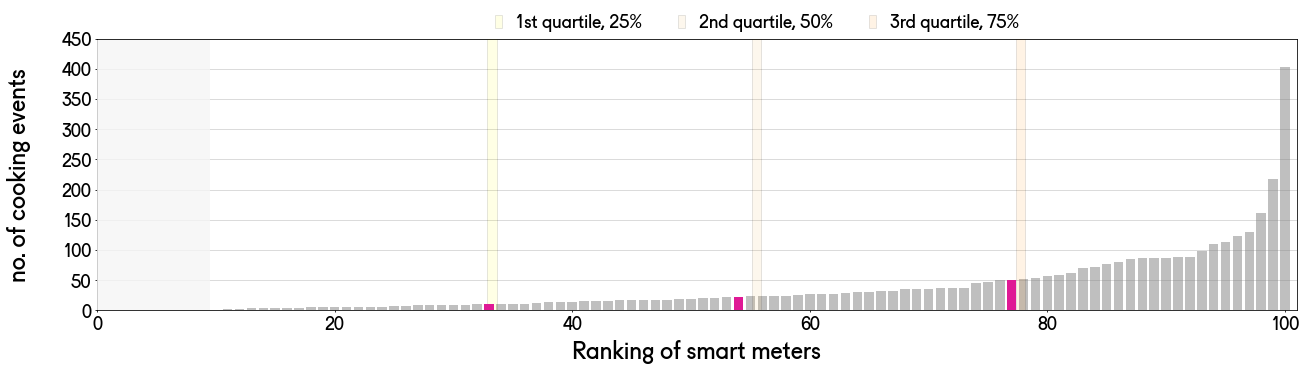

In [2570]:
plt.rcParams['figure.figsize'] = [21.5, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'


df_until_low_tariff_grouped = df_epc100_grouped.copy()
df_until_low_tariff_grouped.reset_index(inplace=True)
df_until_low_tariff_grouped.drop(df_until_low_tariff_grouped[(((df_until_low_tariff_grouped.timestamp < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_until_low_tariff_grouped.drop(df_until_low_tariff_grouped[(((df_until_low_tariff_grouped.timestamp >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)

df_until_low_tariff_grouped['ntimestamp'] = df_until_low_tariff_grouped['timestamp']
df_until_low_tariff_statistics = df_until_low_tariff_grouped.groupby(df_until_low_tariff_grouped.meter_number).agg({'energy':'max','energy_gen':'sum', 'power_mean':'mean',\
                                                                    'cooking_session' : 'nunique', 'timestamp' : 'unique', 'ntimestamp' : 'nunique', 'cooking_time' :'unique', 'usage_rank':'mean', 'energy':'max'})
df_until_low_tariff_statistics.reset_index(inplace=True)
df_until_low_tariff_statistics.sort_values(by =['energy'], ascending=[True], inplace=True)
df_until_low_tariff_statistics['site'] = df_until_low_tariff_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_until_low_tariff_statistics['quantiles'] = pd.qcut(df_until_low_tariff_statistics.energy, 4, labels=None)
df_until_low_tariff_statistics.to_csv('result/until_low_tariff.csv', index=False)
df_until_low_tariff_statistics.sort_values(by='energy',ascending=True,inplace=True)
df_until_low_tariff_statistics.reset_index(inplace=True)
df_until_low_tariff_statistics.reset_index(inplace=True)
df_until_low_tariff_statistics['level_0'] = df_until_low_tariff_statistics['level_0'] + 11


#XYZ
average_cooking_event = (df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum())

#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.set_ylim(0.0,450)
#ax2.set_ylim(0.0,60)
ax1.set_xlim([0, 101])

ax1.grid(axis='y', which='major', color='lightgray')
#ax2.grid(False)

ax1.bar(df_until_low_tariff_statistics.level_0, df_until_low_tariff_statistics.energy/average_cooking_event, color='gray', alpha = 0.5, label=None, zorder=2.52, width = 0.8) # #F4BA52 gelb, #DF1995 a2ei pink



x_constant=np.empty(10)
x_constant.fill(448)
ax1.bar(range(10), x_constant, color='whitesmoke', alpha = 0.8, label=None, zorder=2.53, width = 1)
#ax1.bar(10, 300, color='black', alpha = 1.0, label=None, zorder=2.54, width = 0.5)

ax1.bar(df_until_low_tariff_statistics.level_0.quantile(.25), 450, color='yellow', alpha = 0.1, label='1st quartile, 25%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_until_low_tariff_statistics.level_0.quantile(.50), 450, color='#F4BA52', alpha = 0.1, label='2nd quartile, 50%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_until_low_tariff_statistics.level_0.quantile(.75), 450, color='darkorange', alpha = 0.1, label='3rd quartile, 75%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_until_low_tariff_statistics.level_0.loc[df_until_low_tariff_statistics['meter_number'] == 546361],\
        df_until_low_tariff_statistics.energy.loc[df_until_low_tariff_statistics['meter_number']==546361]\
        /average_cooking_event, color='#DF1995', alpha = 1.0, label=None, zorder=2.54, width = 0.8)
ax1.bar(df_until_low_tariff_statistics.level_0.loc[df_until_low_tariff_statistics['meter_number'] == 546322],\
        df_until_low_tariff_statistics.energy.loc[df_until_low_tariff_statistics['meter_number'] == 546322]\
        /average_cooking_event, color='#DF1995', alpha = 1.0, label=None, zorder=2.54, width = 0.8)
ax1.bar(df_until_low_tariff_statistics.level_0.loc[df_until_low_tariff_statistics['meter_number'] == 546341],\
        df_until_low_tariff_statistics.energy.loc[df_until_low_tariff_statistics['meter_number'] == 546341]\
        /average_cooking_event, color='#DF1995', alpha = 1.0, label=None, zorder=2.54, width = 0.8)

ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad = 30)
ax1.set_xlabel('Ranking of smart meters', labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(10)) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(25))
#ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=90)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='major', length=2)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax1.tick_params(axis='x',length=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(400))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.39, loc='upper center', bbox_to_anchor=(0.55, 1.15), ncol=4, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/until_low_tariff_and_total_cooking_sessions.png', dpi=200)
plt.show()

In [2725]:
df_epc100

id  meter_number timezone            region  \
timestamp                                                           
2020-03-10 21:50:00  311        546281      UTC  TZ cooking pilot   
2020-03-10 21:55:00  311        546281      UTC  TZ cooking pilot   
2020-03-10 22:00:00  311        546281      UTC  TZ cooking pilot   
2020-03-10 23:05:00  311        546281      UTC  TZ cooking pilot   
2020-03-11 08:50:00  311        546281      UTC  TZ cooking pilot   
...                  ...           ...      ...               ...   
2020-11-19 08:30:00  219        546380      UTC  TZ cooking pilot   
2020-11-19 08:35:00  219        546380      UTC  TZ cooking pilot   
2020-11-19 08:40:00  219        546380      UTC  TZ cooking pilot   
2020-11-19 08:45:00  219        546380      UTC  TZ cooking pilot   
2020-11-19 08:50:00  219        546380      UTC  TZ cooking pilot   

                     fetch_index  energy  voltage  current     power  \
timestamp                                                              
2020-03-10 21:50:00           97    0.00   229.90   0.0000  0.000000   
2020-03-10 21:55:00           97    0.07   228.20   4.3010  0.981488   
2020-03-10 22:00:00           97    0.14   227.80   4.3090  0.981590   
2020-03-10 23:05:00           97    0.21   229.90   0.0000  0.000000   
2020-03-11 08:50:00           97    0.26   228.85   2.1535  0.492828   
...                          ...     ...      ...      ...       ...   
2020-11-19 08:30:00            5    5.00   229.90   0.0280  0.006437   
2020-11-19 08:35:00            5    5.00   221.10   0.0280  0.006191   
2020-11-19 08:40:00            5    5.00   220.10   0.0310  0.006823   
2020-11-19 08:45:00            5    5.00   220.20   0.0280  0.006166   
2020-11-19 08:50:00            5    5.00   220.20   0.0290  0.006386   

                     power_factor  ...  load_added_count     time_load_added  \
timestamp                          ...                                         
2020-03-10 21:50:00        1.0000  ...                 0 2020-03-10 21:50:00   
2020-03-10 21:55:00        0.9990  ...                 1 2020-03-10 21:55:00   
2020-03-10 22:00:00        0.9980  ...                 2 2020-03-10 22:00:00   
2020-03-10 23:05:00        1.0000  ...                 3 2020-03-10 23:05:00   
2020-03-11 08:50:00        0.9995  ...                 4 2020-03-11 08:50:00   
...                           ...  ...               ...                 ...   
2020-11-19 08:30:00        0.8280  ...             29229 2020-11-18 19:30:00   
2020-11-19 08:35:00        0.8260  ...             29229 2020-11-18 19:30:00   
2020-11-19 08:40:00        0.8380  ...             29229 2020-11-18 19:30:00   
2020-11-19 08:45:00        0.8570  ...             29229 2020-11-18 19:30:00   
2020-11-19 08:50:00        0.8250  ...             29229 2020-11-18 19:30:00   

                     cooking_session          time_start            time_end  \
timestamp                                                                      
2020-03-10 21:50:00              1.0 2020-03-10 21:50:00 2020-03-10 22:00:00   
2020-03-10 21:55:00              1.0 2020-03-10 21:50:00 2020-03-10 22:00:00   
2020-03-10 22:00:00              1.0 2020-03-10 21:50:00 2020-03-10 22:00:00   
2020-03-10 23:05:00              NaN 2020-03-10 23:05:00 2020-03-10 23:05:00   
2020-03-11 08:50:00              3.0 2020-03-11 08:50:00 2020-03-11 09:55:00   
...                              ...                 ...                 ...   
2020-11-19 08:30:00           6152.0 2020-11-18 19:30:00 2020-11-19 08:50:00   
2020-11-19 08:35:00           6152.0 2020-11-18 19:30:00 2020-11-19 08:50:00   
2020-11-19 08:40:00           6152.0 2020-11-18 19:30:00 2020-11-19 08:50:00   
2020-11-19 08:45:00           6152.0 2020-11-18 19:30:00 2020-11-19 08:50:00   
2020-11-19 08:50:00           6152.0 2020-11-18 19:30:00 2020-11-19 08:50:00   

                    cooking_time seq_time  missing_data timestamp_issue  \
timestamp                     

In [2724]:
plt.rcParams['figure.figsize'] = [21.5, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'


df_until_low_tariff_grouped = df_epc100.copy()
df_until_low_tariff_grouped.reset_index(inplace=True)
df_until_low_tariff_grouped.drop(df_until_low_tariff_grouped[(((df_until_low_tariff_grouped.timestamp < pd.to_datetime('2020-03-09 00:00:00'))) == True)].index, inplace = True)
df_until_low_tariff_grouped.drop(df_until_low_tariff_grouped[(((df_until_low_tariff_grouped.timestamp >= pd.to_datetime('2020-10-01 00:00:00'))) == True)].index, inplace = True)

df_until_low_tariff_grouped['ntimestamp'] = df_until_low_tariff_grouped['timestamp']
df_until_low_tariff_statistics = df_until_low_tariff_grouped.groupby(df_until_low_tariff_grouped.meter_number).agg({'energy':'max','energy_gen':'sum', 'power_mean':'mean',\
                                                                    'cooking_session' : 'nunique', 'timestamp' : 'unique', 'ntimestamp' : 'nunique', 'cooking_time' :'unique', 'usage_rank':'mean', 'energy':'max'})
df_until_low_tariff_statistics.reset_index(inplace=True)
df_until_low_tariff_statistics.sort_values(by =['energy'], ascending=[True], inplace=True)
df_until_low_tariff_statistics['site'] = df_until_low_tariff_statistics.meter_number.map(df_inventory.set_index('meter_number')['location'].to_dict())
df_until_low_tariff_statistics['quantiles'] = pd.qcut(df_until_low_tariff_statistics.energy, 4, labels=None)
df_until_low_tariff_statistics.to_csv('result/until_low_tariff.csv', index=False)
df_until_low_tariff_statistics.sort_values(by='energy',ascending=True,inplace=True)
df_until_low_tariff_statistics.reset_index(inplace=True)
df_until_low_tariff_statistics.reset_index(inplace=True)
df_until_low_tariff_statistics['level_0'] = df_until_low_tariff_statistics['level_0'] + 11


#XYZ
average_cooking_event = (df_day_statistics_plot.energy_gen.sum()/df_day_statistics_plot.cooking_session.sum())

#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.set_ylim(0.0,450)
#ax2.set_ylim(0.0,60)
ax1.set_xlim([0, 101])

ax1.grid(axis='y', which='major', color='lightgray')
#ax2.grid(False)

ax1.bar(df_until_low_tariff_statistics.level_0, df_until_low_tariff_statistics.energy/average_cooking_event, color='gray', alpha = 0.5, label=None, zorder=2.52, width = 0.8) # #F4BA52 gelb, #DF1995 a2ei pink



x_constant=np.empty(10)
x_constant.fill(448)
ax1.bar(range(10), x_constant, color='whitesmoke', alpha = 0.8, label=None, zorder=2.53, width = 1)
#ax1.bar(10, 300, color='black', alpha = 1.0, label=None, zorder=2.54, width = 0.5)

ax1.bar(df_until_low_tariff_statistics.level_0.quantile(.25), 450, color='yellow', alpha = 0.1, label='1st quartile, 25%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_until_low_tariff_statistics.level_0.quantile(.50), 450, color='#F4BA52', alpha = 0.1, label='2nd quartile, 50%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_until_low_tariff_statistics.level_0.quantile(.75), 450, color='darkorange', alpha = 0.1, label='3rd quartile, 75%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_until_low_tariff_statistics.level_0.loc[df_until_low_tariff_statistics['meter_number'] == 546361],\
        df_until_low_tariff_statistics.energy.loc[df_until_low_tariff_statistics['meter_number']==546361]\
        /average_cooking_event, color='#DF1995', alpha = 1.0, label=None, zorder=2.54, width = 0.8)
ax1.bar(df_until_low_tariff_statistics.level_0.loc[df_until_low_tariff_statistics['meter_number'] == 546322],\
        df_until_low_tariff_statistics.energy.loc[df_until_low_tariff_statistics['meter_number'] == 546322]\
        /average_cooking_event, color='#DF1995', alpha = 1.0, label=None, zorder=2.54, width = 0.8)
ax1.bar(df_until_low_tariff_statistics.level_0.loc[df_until_low_tariff_statistics['meter_number'] == 546341],\
        df_until_low_tariff_statistics.energy.loc[df_until_low_tariff_statistics['meter_number'] == 546341]\
        /average_cooking_event, color='#DF1995', alpha = 1.0, label=None, zorder=2.54, width = 0.8)

ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad = 30)
ax1.set_xlabel('Ranking of smart meters', labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(10)) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(25))
#ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=90)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='major', length=2)
ax1.tick_params(which='minor', length=0)
ax2.tick_params(axis='y',length=0)
ax1.tick_params(axis='x',length=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(400))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.39, loc='upper center', bbox_to_anchor=(0.55, 1.15), ncol=4, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/until_low_tariff_and_total_cooking_sessions.png', dpi=200)
plt.show()

SpecificationError: Column(s) ['energy_gen', 'power_mean'] do not exist

In [2507]:
df_until_low_tariff_statistics.tail(60)

level_0  index  meter_number  energy  energy_gen  power_mean  \
30       41     52        546338    3.53        1.94    0.258228   
31       42     71        546358    3.57        2.25    0.774556   
32       43     34        546320    3.71        2.43    0.315952   
33       44     29        546314    4.04        2.64    0.508870   
34       45      6        546287    4.04        2.06    0.514071   
35       46     64        546351    4.06        3.52    0.491413   
36       47     47        546333    4.17        2.19    0.655095   
37       48     43        546329    4.20        3.00    0.518826   
38       49     81        546371    4.48        3.29    0.533093   
39       50     45        546331    4.53        3.82    0.368128   
40       51     19        546303    4.93        3.20    0.439429   
41       52     69        546356    5.02        3.98    0.504406   
42       53     65        546352    5.29        3.26    0.234065   
43       54     36        546322    5.37        4.14    0.737937   
44       55     16        546299    5.57        0.01    0.120000   
45       56     66        546353    5.57        2.89    0.515961   
46       57     25        546310    5.75        2.49    0.199522   
47       58     58        546344    5.85        4.19    0.551212   
48       59     40        546326    6.06        4.22    0.570822   
49       60     11        546294    6.39        4.99    0.445154   
50       61      9        546291    6.49        1.69    0.548959   
51       62     49        546335    6.65        1.11    0.384880   
52       63     28        546313    6.83        5.09    0.697714   
53       64     33        546319    7.22        5.66    0.504025   
54       65     60        546347    7.28        4.54    0.598812   
55       66      2        546283    7.84        2.15    0.682719   
56       67     14        546297    7.85        2.77    0.640549   
57       68     68        546355    8.27        5.04    0.707653   
58       69     87        546378    8.29        4.68    0.734030   
59       70     54        546340    8.38        6.63    0.643222   
60       71     79        546368    8.72        3.16    0.798315   
61       72     31        546316    8.89        5.67    0.751495   
62       73     35        546321    8.95        2.98    0.539372   
63       74     46        546332   10.93        3.70    0.612336   
64       75     18        546302   11.32        8.07    0.549044   
65       76      5        546286   11.84        2.77    0.276825   
66       77     74        546361   12.10        8.89    0.567994   
67       78     76        546363   12.28        7.67    0.475168   
68       79     42        546328   12.77        8.86    0.470473   
69       80     37        546323   13.80       10.13    0.697348   
70       81     67        546354   13.90       10.48    0.424502   
71       82     83        546373   14.80       10.89    0.733476   
72       83     12        546295   16.96       14.18    0.617618   
73       84      0        546281   17.10       10.77    0.669303   
74       85      1        546282   18.28        8.26    0.400944   
75       86     17        546301   19.06       14.67    0.541883   
76       87     26        546311   20.40       15.76    0.445347   
77       88     73        546360   20.66       15.87    0.609490   
78       89     75        546362   20.73        5.34    0.479239   
79       90     13        546296   20.75       17.11    0.594188   
80       91     77        546365   21.08        0.14    0.840000   
81       92     86        546377   21.20       15.31    0.245453   
82       93     32        546318   23.62        2.17    0.766468   
83       94     78        546366   26.46        6.13    0.530851   
84       95      8        546290   27.06       17.41    0.523122   
85       96     24        546309   29.58       23.83    0.223423   
86       97     22        546307   31.21       25.50    0.466176   
87       98     85        546376   38.45       13.07    0.53

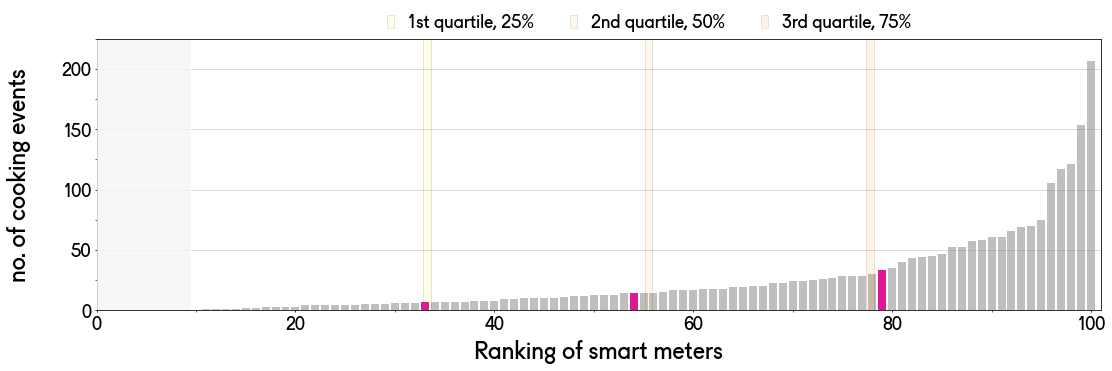

In [1413]:
plt.rcParams['figure.figsize'] = [18, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.set_ylim(0.0,225)
#ax2.set_ylim(0.0,60)
ax1.set_xlim([0, 101])

ax1.grid(axis='y', which='major', color='lightgray')
#ax2.grid(False)

ax1.bar(df_until_low_tariff_statistics.level_0, df_until_low_tariff_statistics.cooking_session, color='gray', alpha = 0.5, label=None, zorder=2.52, width = 0.8) # #F4BA52 gelb, #DF1995 a2ei pink



x_constant=np.empty(10)
x_constant.fill(224)
ax1.bar(range(10), x_constant, color='whitesmoke', alpha = 0.8, label=None, zorder=2.53, width = 1)
#ax1.bar(10, 300, color='black', alpha = 1.0, label=None, zorder=2.54, width = 0.5)

ax1.bar(df_until_low_tariff_statistics.level_0.quantile(.25), 225, color='yellow', alpha = 0.1, label='1st quartile, 25%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_until_low_tariff_statistics.level_0.quantile(.50), 225, color='#F4BA52', alpha = 0.1, label='2nd quartile, 50%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_until_low_tariff_statistics.level_0.quantile(.75), 225, color='darkorange', alpha = 0.1, label='3rd quartile, 75%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_until_low_tariff_statistics.level_0.loc[df_until_low_tariff_statistics['meter_number'] == 546316],\
        df_until_low_tariff_statistics.cooking_session.loc[df_until_low_tariff_statistics['meter_number'] == 546316 ], color='#DF1995', alpha = 1.0, label=None, zorder=2.54, width = 0.8)
ax1.bar(df_until_low_tariff_statistics.level_0.loc[df_until_low_tariff_statistics['meter_number'] == 546333],\
        df_until_low_tariff_statistics.cooking_session.loc[df_until_low_tariff_statistics['meter_number'] == 546333 ], color='#DF1995', alpha = 1.0, label=None, zorder=2.54, width = 0.8)
ax1.bar(df_until_low_tariff_statistics.level_0.loc[df_until_low_tariff_statistics['meter_number'] == 546334],\
        df_until_low_tariff_statistics.cooking_session.loc[df_until_low_tariff_statistics['meter_number'] == 546334 ], color='#DF1995', alpha = 1.0, label=None, zorder=2.54, width = 0.8)

ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad = 30)
ax1.set_xlabel('Ranking of smart meters', labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(10)) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(25))
#ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=90)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='major', length=2)
ax2.tick_params(axis='y',length=0)
ax1.tick_params(axis='x',length=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(400))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.39, loc='upper center', bbox_to_anchor=(0.55, 1.15), ncol=4, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/until_low_tariff_and_total_cooking_sessions.png', dpi=200)
plt.show()

In [1347]:
df_until_low_tariff_statistics.level_0.quantile(1)

100.0

In [1348]:
df_until_low_tariff_statistics.level_0.quantile(.25)

33.25

In [1349]:
df_until_low_tariff_statistics.level_0.quantile(0)

11.0

In [1101]:
df_until_low_tariff_statistics.cooking_session.quantile(1)

206.0

In [1093]:
df_until_low_tariff_statistics.level_0.quantile(.50)

55.5

In [1092]:
df_until_low_tariff_statistics.level_0.quantile(.75)

77.75

In [1094]:
df_until_low_tariff_statistics.head(60)

level_0  index  meter_number  energy_gen  power_mean  cooking_session  \
0        11     80        546369        0.11    0.165000                1   
1        12     77        546365        0.14    0.840000                1   
2        13     41        546327        0.34    0.214737                1   
3        14     16        546299        0.01    0.120000                1   
4        15     88        546379        0.62    0.407500                2   
5        16     21        546306        0.67    0.773571                2   
6        17     70        546357        1.02    0.402198                3   
7        18     61        546348        0.59    0.404000                3   
8        19     56        546342        0.71    0.626667                3   
9        20     27        546312        0.34    0.345000                3   
10       21     44        546330        0.38    0.930000                4   
11       22     63        546350        0.84    0.722000                4   
12       23     49        546335        1.11    0.384880                4   
13       24     30        546315        1.56    0.536104                4   
14       25     89        546380        2.73    0.363503                4   
15       26      4        546285        0.60    0.405000                4   
16       27     82        546372        0.99    0.631200                5   
17       28     20        546305        0.92    0.491522                5   
18       29     53        546339        1.27    0.406636                5   
19       30      7        546289        1.66    0.733035                6   
20       31     59        546345        1.52    0.806143                6   
21       32     38        546324        0.97    0.573889                6   
22       33     48        546334        1.82    0.640283                7   
23       34     51        546337        1.66    0.609414                7   
24       35     72        546359        1.59    0.531722                7   
25       36     10        546292        2.02    0.432609                7   
26       37     23        546308        1.22    0.512000                7   
27       38      5        546286        2.77    0.276825                8   
28       39     15        546298        1.33    0.732500                8   
29       40      2        546283        2.15    0.682719                8   
30       41     55        546341        1.52    0.490741                9   
31       42     62        546349        1.47    0.546222                9   
32       43     66        546353        2.89    0.515961               10   
33       44     57        546343        2.23    0.614141               10   
34       45      6        546287        2.06    0.514071               10   
35       46     79        546368        3.16    0.798315               10   
36       47     14        546297        2.77    0.640549               11   
37       48      3        546284        2.45    0.286649               12   
38       49     71        546358        2.25    0.774556               12   
39       50     64        546351        3.52    0.491413               13   
40       51     52        546338        1.94    0.258228               13   
41       52     34        546320        2.43    0.315952               13   
42       53      9        546291        1.69    0.548959               14   
43       54     32        546318        2.17    0.766468               14   
44       55     47        546333        2.19    0.655095               14   
45       56     65        546352        3.26    0.234065               14   
46       57     81        546371        3.29    0.533093               15   
47       58     39        546325        2.52    0.642471               17   
48       59     25        546310        2.49    0.199522               17   
49       60     58        546344        4.19    0.551212               17   
50       61     69        546356        3.98    0.504406               18   


In [1043]:
df_until_low_tariff_statistics['lost_energy'] = df_until_low_tariff_statistics['energy'] - df_until_low_tariff_statistics['energy_gen']

In [1135]:
df_until_low_tariff_statistics.to_csv('result/honeysteady_table.csv', index=False)

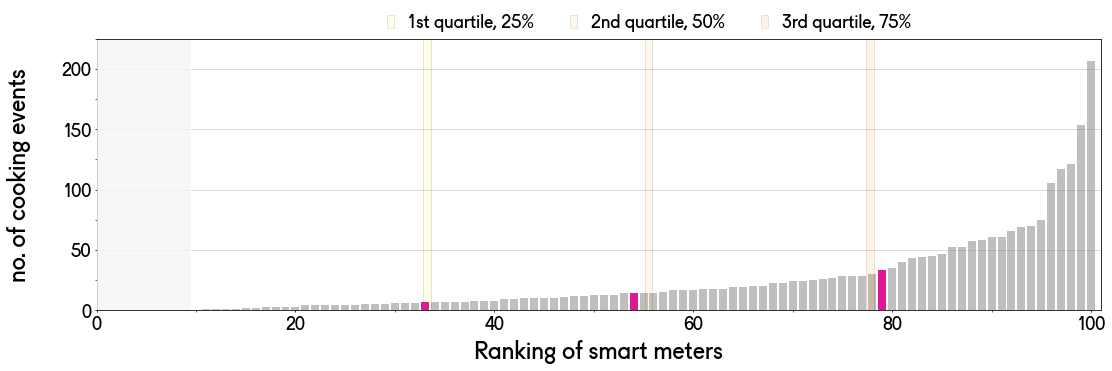

In [1411]:
plt.rcParams['figure.figsize'] = [18, 5]

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18) 
plt.rc('axes', axisbelow=True, labelsize=24)
plt.rc('legend', fontsize=18)
rcParams['axes.facecolor'] = 'white'

#plotting

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

ax1.set_ylim(0.0,225)
#ax2.set_ylim(0.0,60)
ax1.set_xlim([0, 101])

ax1.grid(axis='y', which='major', color='lightgray')
#ax2.grid(False)

#ax1.bar(df_until_low_tariff_statistics.level_0, df_until_low_tariff_statistics.energy color='black', alpha = 0.5, label=None, zorder=2.51, width = 0.8) # #F4BA52 gelb, #DF1995 a2ei pink
ax1.bar(df_until_low_tariff_statistics.level_0, df_until_low_tariff_statistics.cooking_session, color='gray', alpha = 0.5, label=None, zorder=2.52, width = 0.8) # #F4BA52 gelb, #DF1995 a2ei pink


x_constant=np.empty(10)
x_constant.fill(224)
ax1.bar(range(10), x_constant, color='whitesmoke', alpha = 0.8, label=None, zorder=2.53, width = 1)
#ax1.bar(10, 300, color='black', alpha = 1.0, label=None, zorder=2.54, width = 0.5)

ax1.bar(df_until_low_tariff_statistics.level_0.quantile(.25), 225, color='yellow', alpha = 0.1, label='1st quartile, 25%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_until_low_tariff_statistics.level_0.quantile(.50), 225, color='#F4BA52', alpha = 0.1, label='2nd quartile, 50%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_until_low_tariff_statistics.level_0.quantile(.75), 225, color='darkorange', alpha = 0.1, label='3rd quartile, 75%', zorder=2.53, width = 0.8, linewidth=1, edgecolor='black')
ax1.bar(df_until_low_tariff_statistics.level_0.loc[df_until_low_tariff_statistics['meter_number'] == 546316],\
        df_until_low_tariff_statistics.cooking_session.loc[df_until_low_tariff_statistics['meter_number'] == 546316 ], color='#DF1995', alpha = 1.0, label=None, zorder=2.54, width = 0.8)
ax1.bar(df_until_low_tariff_statistics.level_0.loc[df_until_low_tariff_statistics['meter_number'] == 546333],\
        df_until_low_tariff_statistics.cooking_session.loc[df_until_low_tariff_statistics['meter_number'] == 546333 ], color='#DF1995', alpha = 1.0, label=None, zorder=2.54, width = 0.8)
ax1.bar(df_until_low_tariff_statistics.level_0.loc[df_until_low_tariff_statistics['meter_number'] == 546334],\
        df_until_low_tariff_statistics.cooking_session.loc[df_until_low_tariff_statistics['meter_number'] == 546334 ], color='#DF1995', alpha = 1.0, label=None, zorder=2.54, width = 0.8)

ax1.set_ylabel('no. of cooking events', fontstyle='normal', fontweight='bold', labelpad = 30)
ax1.set_xlabel('Ranking of smart meters', labelpad=6, fontstyle='normal', fontweight='bold')

#formatter = mdates.DateFormatter("%b %d") # date formats: https://strftime.org/
#ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(10)) 
ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(25))
#ax1.tick_params(axis='x', bottom=True, zorder=1, rotation=90)
ax1.tick_params(axis='y',length=0)
ax1.tick_params(which='major', length=2)
ax2.tick_params(axis='y',length=0)
ax1.tick_params(axis='x',length=2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(400))

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()

plt.legend(lines, labels, handlelength=0.39, loc='upper center', bbox_to_anchor=(0.55, 1.15), ncol=4, frameon=False) # Position of legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

plt.savefig('visuals/until_low_tariff_and_total_cooking_sessions.png', dpi=200)
plt.show()

In [533]:
df_epc100_max.loc [ df_epc100_max [ 'meter_number' ] == 546316 ]

level_0  index  usage_rank  latest_energy            max_time  \
77       78     61          62          15.58 2020-11-20 22:35:00   

              min_time  group  meter_number  session_index  energy_gen  \
77 2020-03-07 12:00:00    1.0      546316.0           55.0       10.59   

    lost_energy  lost_energy_pct  lost_cooking_events  total_cooking_events  \
77         4.99         0.320282                 9.98                 64.98   

    meter_number2  no_cooking_events       quantiles  
77         546316               33.0  (32.25, 206.0]

In [385]:
df_whole_statistics

meter_number  energy_gen  power_mean  cooking_session  \
0         546375       88.03    0.536846              319   
1         546336       45.59    0.487762              174   
2         546360       50.82    0.602950              172   
3         546302       32.61    0.489512              158   
4         546307       29.55    0.464234              133   
..           ...         ...         ...              ...   
85        546342        0.71    0.626667                3   
86        546379        0.62    0.407500                2   
87        546365        0.14    0.840000                1   
88        546299        0.01    0.120000                1   
89        546327        0.34    0.214737                1   

                                            timestamp  ntimestamp  \
0   [2020-03-10T22:25:00.000000000, 2020-03-10T23:...         319   
1   [2020-03-11T14:40:00.000000000, 2020-03-11T15:...         174   
2   [2020-03-14T23:05:00.000000000, 2020-03-17T17:...         172   
3   [2020-03-10T20:20:00.000000000, 2020-03-10T22:...         158   
4   [2020-03-10T19:10:00.000000000, 2020-03-14T14:...         133   
..                                                ...         ...   
85  [2020-03-12T16:35:00.000000000, 2020-03-12T22:...           3   
86  [2020-03-14T08:40:00.000000000, 2020-03-14T09:...           2   
87                    [2020-06-01T08:10:00.000000000]           1   
88                    [2020-04-24T15:05:00.000000000]           1   
89                    [2020-03-09T19:00:00.000000000]           1   

                                         cooking_time  usage_rank     site  
0   [20.0, 10.0, 40.0, 25.0, 5.0, 45.0, 15.0, 35.0...         100     Bezi  
1   [50.0, 10.0, 30.0, 25.0, 20.0, 15.0, 35.0, 70....          96     Bezi  
2   [45.0, 15.0, 25.0, 35.0, 55.0, 50.0, 65.0, 40....          99   Mavota  
3   [35.0, 40.0, 10.0, 65.0, 5.0, 50.0, 75.0, 20.0...          93  Kalenge  
4   [30.0, 155.0, 55.0, 25.0, 10.0, 20.0, 40.0, 15...          97     Bezi  
..                                                ...         ...      ...  
85                                       [15.0, 35.0]          12    Nemba  
86                                       [30.0, 80.0]          19    Nemba  
87                                             [10.0]          69     Yozu  
88                                              [5.0]          42    Sozia  
89                                             [95.0]           8     Bezi  

[90 rows x 9 columns]

In [433]:
df_honeymoon

index  meter_number  cooking_session location  energy  energy_start  \
0         0        546281              1.0   [Bezi]    0.14          0.00   
1         1        546281              3.0   [Bezi]    0.41          0.26   
2         4        546281              8.0   [Bezi]    0.90          0.69   
3         5        546281              9.0   [Bezi]    0.88          0.65   
4         6        546281             10.0   [Bezi]    1.09          0.96   
...     ...           ...              ...      ...     ...           ...   
4634   5800        546380           6501.0   [Bezi]    0.90          0.58   
4635   5802        546380           6503.0   [Bezi]    1.49          0.95   
4636   5803        546380           6504.0   [Bezi]    1.65          1.58   
4637   5804        546380           6505.0   [Bezi]    2.64          1.70   
4638   5805        546380           6506.0   [Bezi]    3.39          2.80   

      energy_gen     power  cooking_time           timestamp  ...   current  \
0           0.14  0.654359          10.0 2020-03-10 21:50:00  ...  2.870000   
1           0.15  0.441123          50.0 2020-03-11 08:50:00  ...  1.928485   
2           0.21  0.853257          15.0 2020-03-12 09:05:00  ...  3.757417   
3           0.23  0.975777          15.0 2020-03-12 12:05:00  ...  4.295250   
4           0.13  0.981175          10.0 2020-03-12 19:50:00  ...  4.310333   
...          ...       ...           ...                 ...  ...       ...   
4634        0.32  0.354695          50.0 2020-04-01 11:45:00  ...  1.562364   
4635        0.54  0.531858          50.0 2020-04-01 14:25:00  ...  2.344364   
4636        0.07  0.217934          40.0 2020-04-01 15:20:00  ...  0.959000   
4637        0.94  0.376300         150.0 2020-04-01 16:05:00  ...  1.661000   
4638        0.59  0.354949          50.0 2020-04-01 18:40:00  ...  1.562273   

      group  usage_rank  latest_energy  no_recordings   id  power_mean  \
0       1.0          79           28.4              3  311       0.840   
1       1.0          79           28.4             11  311       0.180   
2       1.0          79           28.4              4  311       0.840   
3       1.0          79           28.4              4  311       0.920   
4       1.0          79           28.4              3  311       0.780   
...     ...         ...            ...            ...  ...         ...   
4634    2.0          30            5.0             11  219       0.384   
4635    2.0          30            5.0             11  219       0.648   
4636    2.0          30            5.0              9  219       0.105   
4637    2.0          30            5.0             31  219       0.376   
4638    2.0          30            5.0             11  219       0.708   

      cooking_cost  session_index  energy_gen_std  
0            280.0              1            0.14  
1            300.0              2            0.15  
2            420.0              3            0.21  
3            460.0              4            0.23  
4            260.0              5            0.13  
...            ...            ...             ...  
4634         640.0           4634            0.32  
4635        1080.0           4635            0.54  
4636         140.0           4636            0.07  
4637        1880.0           4637            0.94  
4638        1180.0           4638            0.59  

[1789 rows x 21 columns]

In [145]:
df_fieldtripcheck_alldata = df_epc100.copy()

df_fieldtripcheck_alldata.reset_index(inplace=True)


df_fieldtripcheck_alldata.drop(df_fieldtripcheck_alldata[(((df_fieldtripcheck_alldata.timestamp >= pd.to_datetime('2020-06-28 00:00:00')) &\
                                      (df_fieldtripcheck_alldata.timestamp < pd.to_datetime('2020-07-14 00:00:00'))) == True)].index, inplace = True)

df_fieldtripcheck_alldata.drop(df_fieldtripcheck_alldata[(((df_fieldtripcheck_alldata.timestamp >= pd.to_datetime('2020-11-15 00:00:00')) &\
                                      (df_fieldtripcheck_alldata.timestamp < pd.to_datetime('2020-11-18 00:00:00'))) == True)].index, inplace = True)

#noUUID = meter_list.drop(meter_list[(meter_list['meterId'].isin(master_list['meterId']) == True)].index, inplace=False)

#df_fieldtripcheck = df_epc100_grouped_statistics[(df_epc100_grouped_statistics.timestamp <= pd.to_datetime('2020-11-15 00:00:00'))]
df_fieldtripcheck_alldata.to_csv('result/alldatawithoutfieldtrips.csv', index=False)
df_fieldtripcheck_alldata

timestamp   id  meter_number timezone            region  \
0     2020-03-10 21:50:00  311        546281      UTC  TZ cooking pilot   
1     2020-03-10 21:55:00  311        546281      UTC  TZ cooking pilot   
2     2020-03-10 22:00:00  311        546281      UTC  TZ cooking pilot   
3     2020-03-10 23:05:00  311        546281      UTC  TZ cooking pilot   
4     2020-03-11 08:50:00  311        546281      UTC  TZ cooking pilot   
...                   ...  ...           ...      ...               ...   
92911 2020-11-19 08:30:00  219        546380      UTC  TZ cooking pilot   
92912 2020-11-19 08:35:00  219        546380      UTC  TZ cooking pilot   
92913 2020-11-19 08:40:00  219        546380      UTC  TZ cooking pilot   
92914 2020-11-19 08:45:00  219        546380      UTC  TZ cooking pilot   
92915 2020-11-19 08:50:00  219        546380      UTC  TZ cooking pilot   

       fetch_index  energy  voltage  current     power  ...  cooking_end  \
0               97    0.00   229.90   0.0000  0.000000  ...        False   
1               97    0.07   228.20   4.3010  0.981488  ...        False   
2               97    0.14   227.80   4.3090  0.981590  ...         True   
3               97    0.21   229.90   0.0000  0.000000  ...         True   
4               97    0.26   228.85   2.1535  0.492828  ...        False   
...            ...     ...      ...      ...       ...  ...          ...   
92911            5    5.00   229.90   0.0280  0.006437  ...        False   
92912            5    5.00   221.10   0.0280  0.006191  ...        False   
92913            5    5.00   220.10   0.0310  0.006823  ...        False   
92914            5    5.00   220.20   0.0280  0.006166  ...        False   
92915            5    5.00   220.20   0.0290  0.006386  ...         True   

       load_added_count     time_load_added  cooking_session  \
0                     0 2020-03-10 21:50:00              1.0   
1                     1 2020-03-10 21:55:00              1.0   
2                     2 2020-03-10 22:00:00              1.0   
3                     3 2020-03-10 23:05:00              NaN   
4                     4 2020-03-11 08:50:00              3.0   
...                 ...                 ...              ...   
92911             24007 2020-11-18 19:30:00           6510.0   
92912             24007 2020-11-18 19:30:00           6510.0   
92913             24007 2020-11-18 19:30:00           6510.0   
92914             24007 2020-11-18 19:30:00           6510.0   
92915             24007 2020-11-18 19:30:00           6510.0   

               time_start            time_end cooking_time seq_time  \
0     2020-03-10 21:50:00 2020-03-10 22:00:00         10.0      0.0   
1     2020-03-10 21:50:00 2020-03-10 22:00:00         10.0      5.0   
2     2020-03-10 21:50:00 2020-03-10 22:00:00         10.0     10.0   
3     2020-03-10 23:05:00 2020-03-10 23:05:00          0.0      0.0   
4     2020-03-11 08:50:00 2020-03-11 09:40:00         50.0      0.0   
...                   ...                 ...          ...      ...   
92911 2020-11-18 19:30:00 2020-11-19 08:50:00        800.0    780.0   
92912 2020-11-18 19:30:00 2020-11-19 08:50:00        800.0    785.0   
92913 2020-11-18 19:30:00 2020-11-19 08:50:00        800.0    790.0   
92914 2020-11-18 19:30:00 2020-11-19 08:50:00        800.0    795.0   
92915 2020-11-18 19:30:00 2020-11-19 08:50:00        800.0    800.0   

       missing_data cooking_event_id  
0               NaN              1.0  
1               NaN              1.0  
2               NaN              1.0  
3               NaN              NaN  
4               NaN              2.0  
...             ...              ...  
92911           NaN              NaN  
92912           NaN              NaN  
92913           NaN              NaN  
92914           NaN              NaN  
92915           NaN              NaN  

[70877 rows x 35 columns]

### A2EI F#3 - S3 <a class="anchor" id="function3"></a>
<br>

**See logs here with node numbers:**

http://skgswebsite.s3-website.eu-west-3.amazonaws.com/

**Function syntax:** 

download(node)

plot(node)

In [ ]:
import plot_and_download as pld

In [ ]:
import matplotlib
matplotlib.use('Agg')

In [ ]:
# Example: Download node 6 data from S3.
pld.download(6)

In [ ]:
# Example: Once downloaded, plot node 8 data.
pld.plot(8)
plt.savefig('visuals/flm_consumption_node-8.png', dpi=200)